Esse notebook tem como objetivo estudar e detalhar as funções do framework Langchain. Inicialmente vou explorar cada uma das partes da biblioteca, explicando e demonstrando as diferenças e utilidades. Provavelmente será um grande notebook, pois a biblioteca é bem extensa. O meu objetivo final desse estudo é dominar o framework e seus usos com as LLM's, podendo futuramente fazer projetos de maior magnetude. Já o notebook será um bom meio de resumir informações e funcionará como um bom material para quem pretende entender e usar o framework.

O trabalho se refere a dados retirados no inicio de 2024, logo pode ser que a biblioteca tenha mudado.

#Iniciando com aplicação básica ⏯

Apenas demonstrando uma introdução bem básica à biblioteca Langchain, monstrando um pouco do poder e das utilidades desse framework.

Usarei o langchain associado com a OpenAI para pegar informações de um artigo do final de 2022, data na qual o chatgpt ainda não tem dados sobre.

##Biliotecas necessárias

In [ ]:
!pip install faiss-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 7.9 MB/s eta 0:00:00


In [ ]:
!pip install langchain

In [ ]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.8 MB/s eta 0:00:00


In [ ]:
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.7 MB/s eta 0:00:00


In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00


In [ ]:
from PyPDF2 import PdfReader
from langchain.embeddings.openai import OpenAIEmbeddings
import openai
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.llms import OpenAI
from langchain.chains.question_answering import load_qa_chain

##OpenAI e uso sem langchain:

In [ ]:
import os
os.environ['OPENAI_API_KEY'] = '...'

In [ ]:
llm = OpenAI(model_name='text-davinci-003')

In [ ]:
Pergunta = 'O que é BERTopic?'
print(llm(Pergunta))



BERTopic é uma plataforma de treinamento online baseada em vídeo para profissionais de tecnologia de informação. A plataforma fornece acesso a cursos de treinamento de alta qualidade, para ajudar os profissionais a desenvolver suas habilidades e conhecimentos. Os cursos abrangem temas como servidores, segurança, armazenamento, redes e outras áreas de tecnologia de informação. Os usuários também podem acessar materiais de estudo, vídeos de aula e tarefas práticas para ajudar a melhorar seu desempenho.


Apesar de gerar uma resposta, ela está claramente errada, é uma alucinação da LLM que gera informações completamente erradas para a pergunta feita.

##Incluindo o artigo e usando o langchain:

Colocarei um artigo que faz o uso do BERTopic, explicando-o no meio do caminho.

In [ ]:
artigo= PdfReader("/content/Public_Opinion_Evolution_in_Cyberspace_A_Case_Analysis_of_Pelosis_Visit_to_Taiwan.pdf")

In [ ]:
Texto_unido = ''
for i, page in enumerate (artigo.pages):
  texto=page.extract_text()
  if texto:
    Texto_unido += texto

In [ ]:
Texto_unido

'IEEE TRANSACTIONS ON COMPUTATIONAL SOCIAL SYSTEMS 1\nPublic Opinion Evolution in Cyberspace: A Case\nAnalysis of Pelosi’s Visit to Taiwan\nTao Chen\n , Baoyu Zhang, Xiao Wang\n ,Senior Member, IEEE , Weishan Zhang\n ,Member, IEEE , Chitin Hon,\nWang Di, Long Chen\n ,Senior Member, IEEE , Qiang Li, and Fei-Yue Wang\n ,Fellow, IEEE\nAbstract — The dynamics of public opinion on social media\naffects people’s feeling and minds about international affairs and\nleads to the reconstruction of societal states for international\nconflicts. In this article, we analyze the topics’ evolution on\nsocial media during the Pelosi visit. Such kind of analysis should\nhelp the related departments sense and beware the situation\neffectively and efficiently, and may provide technical supports for\nproper policy making and responses. To facilitate this purpose,\na new method is proposed and an abbreviated large-graph\nclustering (ALGC) algorithm has been designed to generate\ndocuments and topic represent

In [ ]:
text_splitter= CharacterTextSplitter(separator = '\n', chunk_size = 2000, chunk_overlap= 20, length_function = len)
texto_final = text_splitter.split_text(Texto_unido)
#por ser apenas uma introdução ao uso da ferramenta não farei nenhum processamento no texto gerado, logo o deixarei manter algumas coisas que geram problemas

In [ ]:
embeddings = OpenAIEmbeddings() #usarei os embeddings da openai também

In [ ]:
documento = FAISS.from_texts(texto_final, embeddings) #isso vetorizará o artigo

In [ ]:
chain = load_qa_chain(OpenAI(), chain_type = 'stuff')

In [ ]:
Pergunta = 'O que é BERTopic?'
docs = documento.similarity_search(Pergunta) #faz a pesquisa no documento que responde a pergunta feita
chain.run(input_documents=docs, question= Pergunta)

' BERTopic is a Bert-based topic clustering model developed by Grootendorst [15] that uses Bert for document embedding and then generates topic representations based on term frequency-inverse document frequency (TF-IDF).'

Podemos ver como agora, mesmo sem ter dados sobre o BERTopic, criado após a data limite de treinamento, a LLM, usando as informações que dei a ela com o artigo, conseguiu responder meu prompt com exatidão.

A resposta está em inglês por ser a língua usada no artigo.

#Langchain 🐦

LangChain é um framework para desenvolver aplicações baseadas em modelos de linguagem. Isso permitirá aplicações que são:

Conectadas a contextos: é possível conectar uma LLM a fontes de contextos desejadas, isso vai de intruções de prompt, few shot examples, até artigos disponibilizados ou integração com pesquisas na internet.

Há várias grandes partes dentro desse framework. LangChain libraries, será o foco principal deste notebook. Contém interfaces e integrações com diversos componentes, criando agentes, chains integrando com tipos e usos diferentes dos modelos, tudo será detalhado mais a frente.

Há também LangChain Templates(uma coleção de arquiteturas com deploy simples para uma variedade de tarefas); LangServe(Uma biblioteca para deploy das chains como uma API); LangSmith(Uma plataforma que permite fazer o debug, teste e avaliação de chains criadas e disponibilizadas), LangGraph(faz a integração de diferentes chamadas de recursos e llms com uso de estrutura de grafos.)langchain-community (funções criadas pela comunidade que integram coisas que a biblioteca oficial não tem)

Não tratarei dessas outras partes, assim como também não falarei ainda da langchain-comunnity diretamente, apenas usarei algumas de suas funções, mas são áreas com muita informação e que poderei tratar em outros estudos.

##LangChain Expression language:

LCEL é a abstração geral da biblioteca que permite construir facilmente cadeias (chains) complexas com elementos básicos, além de possibilitar diversas formas de aplicaçãs dessas chains.



LCEL disponibiliza:
  1. Uma interface unificada, todos os seus objetos implemantam uma interface com runnables. Há alguns métodos de invocação automaticamente suportados pelos objstos LCEL (invoke, batch, stream, etc.)

  2. Uma quantidade de primitivos para composição, são elementos que tornam as cadeias algo simples de ser contruído.
  







O protocolo de "Runnables", presente em quase todos os componentes, padroniza a invocação de objetos. A interface padrão apresenta os métodos:

stream: Retorna partes da resposta em chunks.

invoke: Chama a chain num input

batch: Faz o mesmo que o invoke, porém numa lista de input

Cada um dos 3 métodos tem a sua versão async, caso necessite numa aplicação fazer com que as chamadas funcionem de forma assíncrona.


Finalizando, devo falar das funções Runnable, são funções que servem para modificar o flow das ações nas chains que fazemos, aqui vai uma ilustração de exemplo:


In [ ]:
'''
from langchain_core.runnables import (
    RunnableParallel,
    RunnablePassthrough
)

retriever_a = vecstore_a.as_retriever()
retriever_b = vecstore_b.as_retriever()

prompt_str = """Answer the question below using the context:

Context: {context}

Question: {question}

Answer: """
prompt = ChatPromptTemplate.from_template(prompt_str)

retrieval = RunnableParallel(
    {"context": retriever_a, "question": RunnablePassthrough()}
)

chain = retrieval | prompt | model | output_parser
output = chain.invoke("when was James born?")
print(output)
'''
#Código que a imagem representa, não é totalmente funcional, faltam algumas partes como o modelo.

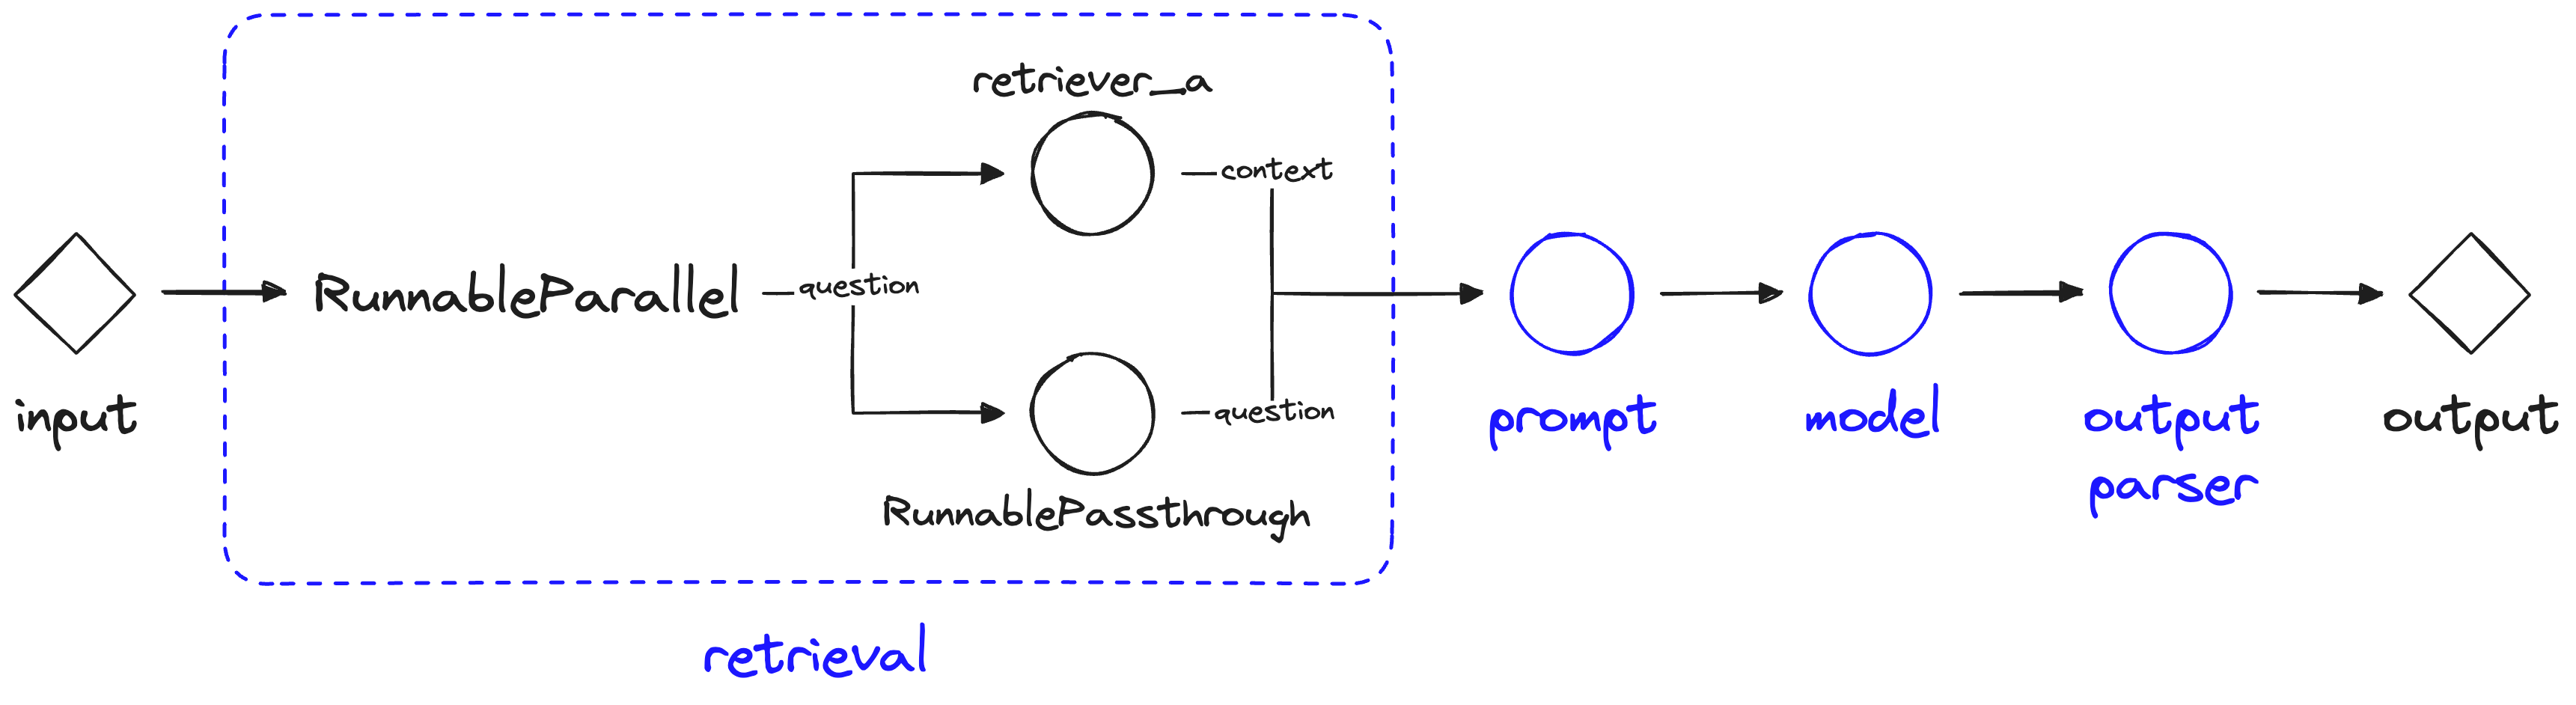

Ignorando nomenclaturas que serão vistas ainda, foquemos nas funções RunnableParallel e RunnablePasthrough, a primeira permite que informações sejam passadas paralelamente numa cadeia, já o RunnablePassthrough permite que passemos uma varíavel apenas ao invocar uma chain.

Não farei nenhum código de demonstração, pois requer explicação de partes futuras, o código apresentado como exemplo inicial já serve como um exemplo dessa abstração geral do funcionamento do framework, os objetos explicados agora inevitavelmente aparecerão ao longo dos estudos e das explicações

##Os módulos do LangChain:

Segundo sua documentação, o LangChain provê interfaces e integrações em 3 móduloes principais:


Model I/O:

Interface com os modelos de linguagem.

Retrieval:

Interface com aplicações expecíficas de data.

Agentes:

Permite que as chains tem a sua disposição tools para seguir instruções de alto nível.

Além disso, o framework também disponibiliza módulos considerados adicionais na documentação:

Chains:

A parte mais característica da biblioteca, permite a construção dos blocos de composição que realizarão as tarefas.

Memory:

Permite aplicações "persistentes" de várias chains.

Callbacks:

Consegue manejar passos intermediários de qualquer chain.

###Modelos

Qualquer uso do langchain tem como base principal e só funciona por causa dos modelos.

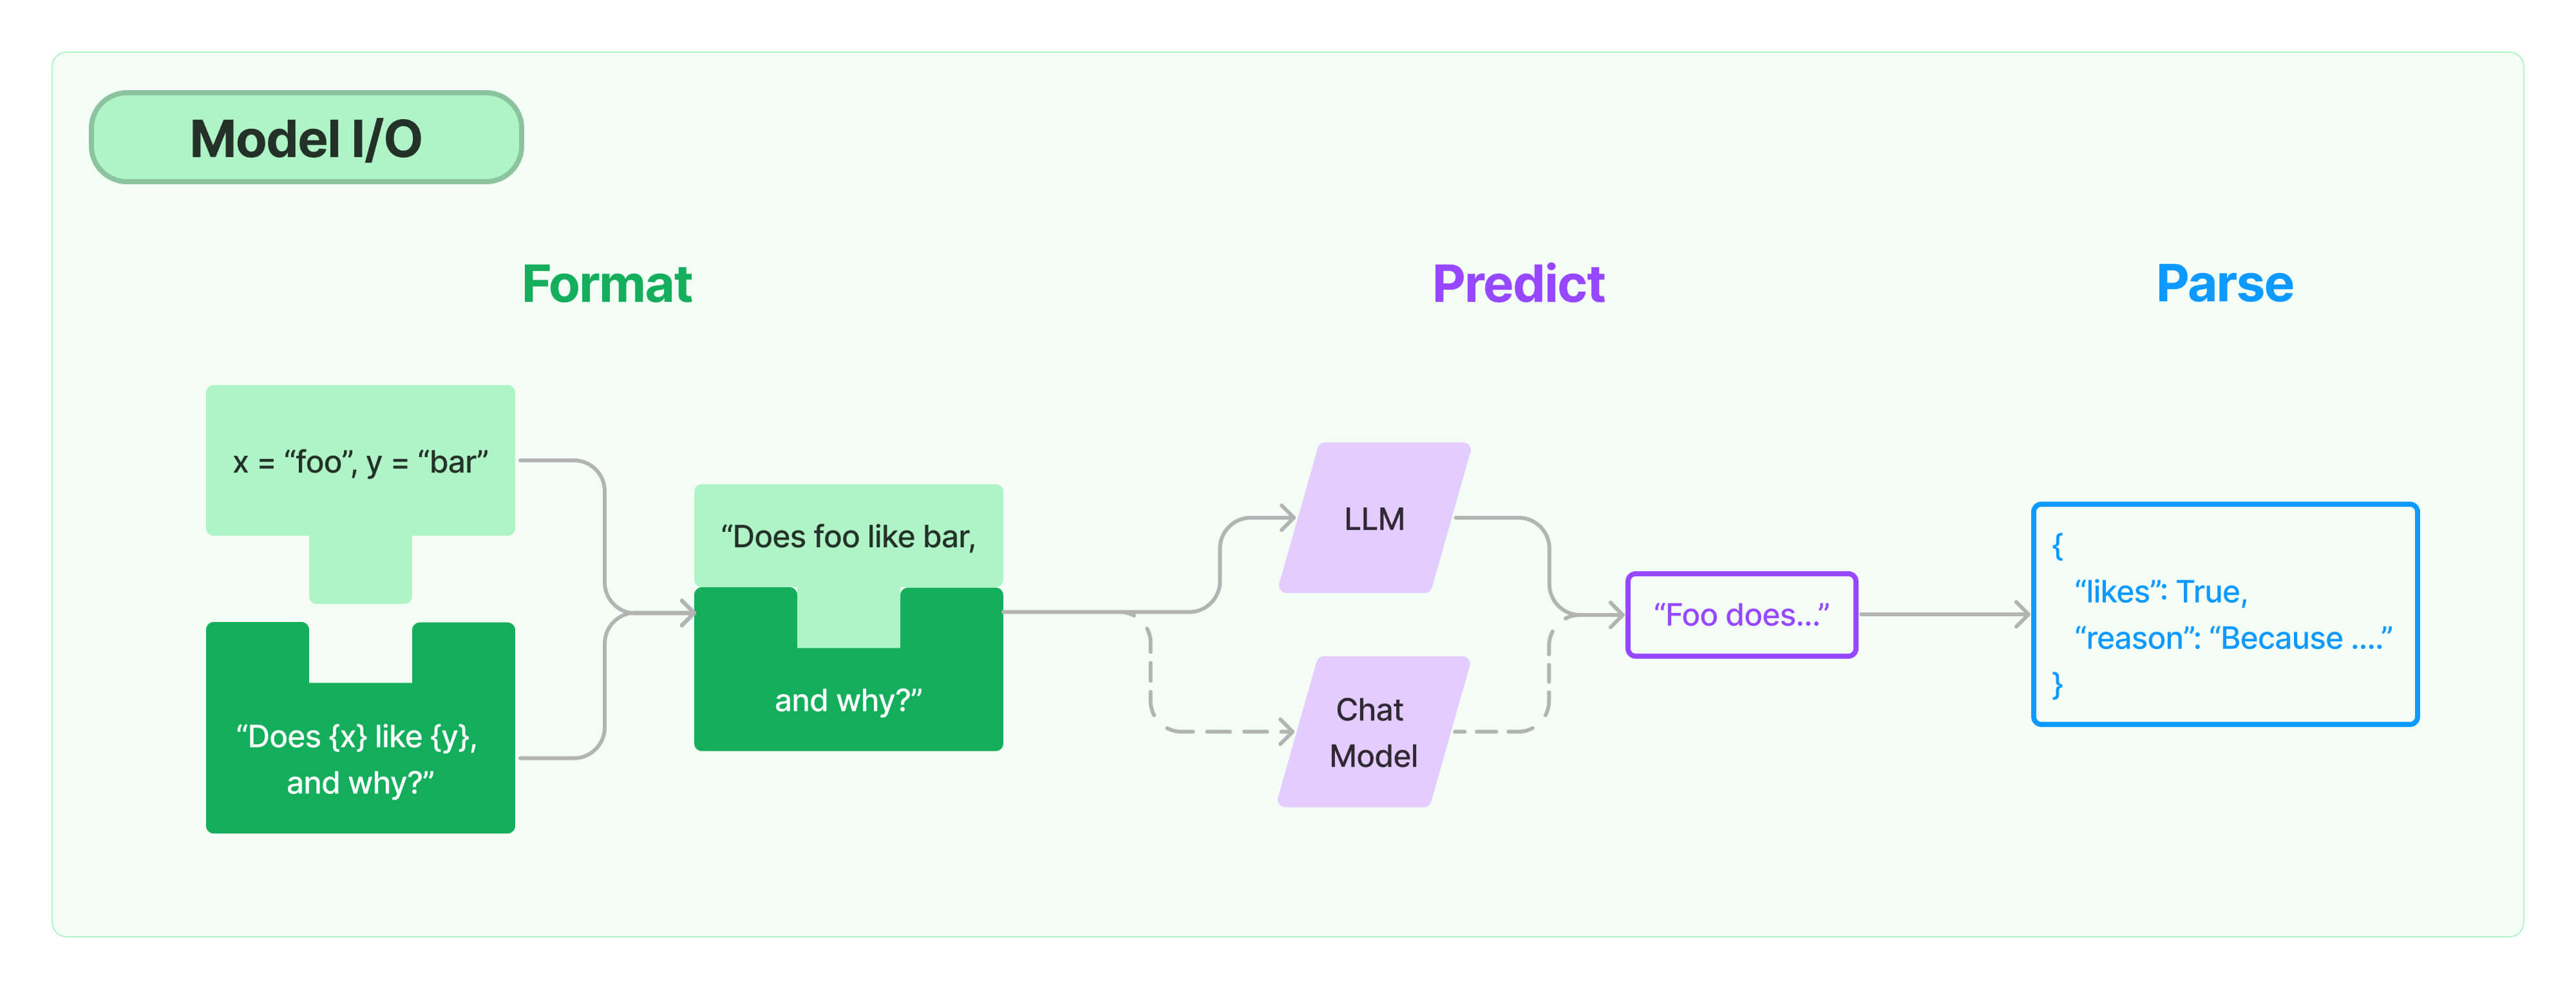

Explicando rapidamente, já que cada passo será detalhado mais a frente, o Format se refere ao jeito que o prompt será guardado, predict se refere ao passo em que mandamos as informações e o prompt ao modelo, ele mandará uma resposta que será imprimida no estilo de Parse desejado.

####Conceitos

Models:

Há dois tipos princiapias de modelos que podemos usar no Langchain, eles são definidos pelo seus tipos de input e output, sendo eles as LLMs e os Chat Model:


*   LLMs:

      Se refere a modelos que completam texto, recebem uma string como prompt e também retornam uma stirng. Por exemplo o GPT-3 é implementado como uma LLM.

*   Chat Models:

      Eles também são LLMs, porém treinadas especificamente para conversações, são mais que puros completadores de texto. Recebem uma lista de mensagens como input e retornam uma mensagem como output, o GPT-4 funciona assim.
      

Esses dois tipos acabam tendo esquemas de input e output bem diferentes, é possível usar os mesmos prompts em uma e na outra pelas funções do LangChain, porém não é recomendado, as estratégias de uso devem ser específicas para o uso.
As mensagens com os ChatModels tem uma diversidade maior.

Mensagens:

Há vários tipos de mensagens, inputs dos chatmodels, cada uma tem uma função, ela descreve quem está dizendo a mensagem, no langchain há diferentes classes para as diferentes:



  *   String (A maioria)
  *   Uma lista de dicionários (é usado para inputs multimodais, nos quais o dicionário contém informações sobre o tipo e a localização do input)




  1.   Mensagem do humano:
    
      Essa mensagem represanta a mensagem do usuário. Geralmente consiste só no conteúdo.

  2.   Mensagem da AI:
  
      Representa a mensagem gerada pelo modelo

  3. Mensagem do sistema:

      Apenas alguns modelos têm isso. Diz como o modelo deve agir

  4. Mensagem de função:

      Representa a chamada de uma função

  5. Mensagem de tool:

      Representa a chamada de uma tool



Prompts:

Prompt é o produto gerado pelo input do usuário que será passado para o modelo, seja ele uma string ou uma lista de mensagens. O objeto que pega o input e o transforma no prompt final são os Prompt Templates, disponibilizados pelo LangChain e muito úteis.


Output Parsers:

Os outputs dos modelos são ou strings ou mensagens, geralmente elas contêm informaçõs formatadas num formato específico. Esses parsers são responsáveis por receber e transformar o output em algo estéticamente mais útil e utilizável. É opcional, porém com uma utilidade prática muito grande, principalmente em aplicações que serão disponibilizadas para uso


In [ ]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.7/817.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.3/291.3 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.2/115.2 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [ ]:
!pip install openai

In [ ]:
!pip install langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.0 MB/s eta 0:00:00


####Prompts:

Primeiro vamos falar dos prompts, vou usar direto os prompt templates, apesar de podermos passar apenas uma string ou só uma mensagem como input, os templates são mais úteis e não adicionam um grande trabalho mesmo nas aplicações simples, além de servir tanto como input de mensagem como de string.

In [ ]:
#importando a chave do chatgpt e as bibliotecas necessárias
import os
os.environ['OPENAI_API_KEY'] = '...'

In [ ]:
from langchain.prompts import PromptTemplate

In [ ]:
prompt = (PromptTemplate.from_template("Defenda {tópico}, de forma {emoção}, em {idioma}, em {número} linhas"))

In [ ]:
prompt #no output abaixo ele explica como está a divisão do prompt, as variáveis que devemos esolher e o prompt geral:

PromptTemplate(input_variables=['emoção', 'idioma', 'número', 'tópico'], template='Defenda {tópico}, de forma {emoção}, em {idioma}, em {número} linhas')

In [ ]:
type(prompt)

langchain_core.prompts.prompt.PromptTemplate

In [ ]:
prompt.format(tópico="Obama", emoção ="engraçada", idioma = "russo", número = "3") # um exemplo de como ficaria

'Defenda Obama, de forma engraçada, em russo, em 3 linhas'

In [ ]:
from langchain_openai import ChatOpenAI
modelo = ChatOpenAI()

In [ ]:
from langchain.chains import LLMChain
chain = LLMChain(llm=modelo, prompt=prompt)

In [ ]:
chain.run(tópico="Obama", emoção ="engraçada", idioma = "russo", número = "3")

'Обама - это как смесь Майкла Джексона и Чака Норриса, только с более гладкой прической и стильной одеждой! Он такой классный, что даже Путин восхищается его танцами! И да, кстати, кто еще может рассказывать анекдоты на празднике лучше Обамы?'

In [ ]:
chain.run(tópico="Obama", emoção ="engraçada", idioma = "portugues", número = "3")

'Obama é tão incrível que até os pássaros cantam "Yes, we canary!". Ele é tão carismático que até o próprio Homem-Aranha trocou seu famoso lema para "Com grandes poderes, vem grandes Obamações". E se alguém duvida do seu talento, é só lembrar que ele fez o Osama Bin Laden desaparecer, provando que nem o maior vilão escapa da audácia do Obama-nator!'

In [ ]:
chain.batch([{"tópico":"Obama", "emoção" :"engraçada", "idioma" : "portugues", "número" : "3"}]) #apenas mudando a chamada para mostrar a diferença, essa é a chamada "mais atual"

[{'tópico': 'Obama',
  'emoção': 'engraçada',
  'idioma': 'portugues',
  'número': '3',
  'text': 'Obama é tão engraçado que até os comediantes invejam seu talento para fazer rir! Ele é o mestre do "yes, we can" e do "mic drop", deixando todos com sorrisos bobos enquanto governa com estilo e carisma. Quem precisa de stand-up comedy quando se tem Obama na Casa Branca?'}]

#####Messages:

Como disse, um prompt é feito por diversos tipos de mensagens, sendo uma das partes mais importantes saber como manipular cada uma delas para chegar ao seu objetivo

In [ ]:
from langchain.schema import AIMessage, HumanMessage, SystemMessage
from langchain.prompts import PromptTemplate
from langchain.prompts import (
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
    AIMessagePromptTemplate,
    ChatPromptTemplate
)

In [ ]:
comando = SystemMessage(content="Você é um especialista em programação que só fala em espanhol e com poucas palavras")
prompt2 = (comando + HumanMessage(content="Me ensine como funciona a tipagem em") + '{linguagem}')

In [ ]:
comando

SystemMessage(content='Você é um especialista em programação que só fala em espanhol e com poucas palavras')

In [ ]:
prompt2.format_messages(linguagem='c++')

[SystemMessage(content='Você é um especialista em programação que só fala em espanhol e com poucas palavras'),
 HumanMessage(content='Me ensine como funciona a tipagem em'),
 HumanMessage(content='c++')]

In [ ]:
chain = LLMChain(llm=modelo, prompt=prompt2)
chain.run(linguagem='c++')

'La tipificación en C++ se refiere al tipo de datos que se asigna a una variable. En C++, los tipos de datos pueden ser explícitos o implícitos.\n\nLa tipificación explícita se refiere a cuando se declara el tipo de datos de una variable de forma clara y específica. Por ejemplo:\n\nint numero = 10; // variable de tipo entero\n\nLa tipificación implícita se refiere a cuando el tipo de datos de una variable se infiere automáticamente por el compilador en función del valor que se le asigna. Por ejemplo:\n\nauto texto = "Hola"; // variable de tipo cadena (const char*)\n\nC++ es un lenguaje estáticamente tipado, lo que significa que el tipo de datos de una variable se verifica en tiempo de compilación. Esto permite detectar y prevenir errores de tipos antes de ejecutar el programa.\n\nEs importante tener en cuenta la tipificación en C++ para asegurarse de que las operaciones y los valores sean compatibles entre sí y evitar errores de tipos.'

La tipificación en C++ se refiere al tipo de datos que se asigna a una variable. En C++, los tipos de datos pueden ser explícitos o implícitos.

La tipificación explícita se refiere a cuando se declara el tipo de datos de una variable de forma clara y específica. Por ejemplo:

int numero = 10; // variable de tipo entero

La tipificación implícita se refiere a cuando el tipo de datos de una variable se infiere automáticamente por el compilador en función del valor que se le asigna. Por ejemplo:

auto texto = "Hola"; // variable de tipo cadena (const char*)

C++ es un lenguaje estáticamente tipado, lo que significa que el tipo de datos de una variable se verifica en tiempo de compilación. Esto permite detectar y prevenir errores de tipos antes de ejecutar el programa.

Es importante tener en cuenta la tipificación en C++ para asegurarse de que las operaciones y los valores sean compatibles entre sí y evitar errores de tipos.

In [ ]:
chain = LLMChain(llm=modelo, prompt=prompt2)
chain.invoke({"linguagem":'c++'}) #Bom reparar que aqui, ao chamo o invoke por apenas ter uma varíavel a ser posta no input

{'linguagem': 'c++',
 'text': 'La tipificación en C++ se refiere a cómo se definen y utilizan los tipos de datos en el lenguaje de programación. C++ es un lenguaje con tipificación estática, lo que significa que los tipos de datos deben ser declarados explícitamente antes de su uso.\n\nEn C++, los tipos de datos se dividen en tipos primitivos, como int, float, char, y tipos definidos por el usuario, como estructuras y clases. Estos tipos de datos tienen diferentes tamaños y representaciones en la memoria.\n\nLa tipificación en C++ también permite realizar conversiones entre diferentes tipos de datos, ya sea de forma implícita o explícita. Por ejemplo, se puede convertir un entero a un flotante o viceversa.\n\nEs importante tener en cuenta que la tipificación en C++ también se aplica a las variables, lo que significa que una variable solo puede contener valores del tipo de datos que se haya declarado.\n\nEn resumen, la tipificación en C++ se refiere a cómo se definen y utilizan los tipo

E para cada um deles é o seu próprio template que podemos explorar.

In [ ]:
from langchain.prompts import (
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
    AIMessagePromptTemplate,
    ChatPromptTemplate
)
#AImessage tem uma boa função para chathistory

In [ ]:
human_prompt = "Me fale um pouco do {presidente}"
human_template = HumanMessagePromptTemplate.from_template(human_prompt)
sis_prompt = "Você é um {lado} dos presidentes americanos, geralmente responde de forma curta e {jeito}"
sis_template = SystemMessagePromptTemplate.from_template(sis_prompt)

In [ ]:
type(human_template)

langchain_core.prompts.chat.HumanMessagePromptTemplate

In [ ]:
human_template

HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['presidente'], template='Me fale um pouco do {presidente}'))

In [ ]:
sis_template.format(lado="crítico", jeito="agressiva")

SystemMessage(content='Você é um crítico dos presidentes americanos, geralmente responde de forma curta e agressiva')

In [ ]:
human_template.format(presidente = 'Biden')

HumanMessage(content='Me fale um pouco do Biden')

In [ ]:
prompt_final = ChatPromptTemplate.from_messages(
    [sis_template, human_template]
)

In [ ]:
prompt_final

ChatPromptTemplate(input_variables=['jeito', 'lado', 'presidente'], messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['jeito', 'lado'], template='Você é um {lado} dos presidentes americanos, geralmente responde de forma curta e {jeito}')), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['presidente'], template='Me fale um pouco do {presidente}'))])

In [ ]:
type(prompt_final)

langchain_core.prompts.chat.ChatPromptTemplate

In [ ]:
modelo.invoke(
    prompt_final.format_prompt(
        lado="crítico", jeito="agressiva", presidente = 'Biden'
    ).to_messages()
)

AIMessage(content='Biden é só mais um político que promete muito e entrega pouco. Mais do mesmo, sem novidades.', response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 42, 'total_tokens': 66}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': 'fp_3bc1b5746c', 'finish_reason': 'stop', 'logprobs': None})

In [ ]:
from langchain.chains import LLMChain
chain = LLMChain(llm=modelo, prompt=human_template+sis_template)

In [ ]:
chain.batch([{"lado":"defensor", "jeito" :"fervorosa", "presidente" : "Biden"}])

[{'lado': 'defensor',
  'jeito': 'fervorosa',
  'presidente': 'Biden',
  'text': 'Claro! Joseph R. Biden Jr., também conhecido como Joe Biden, é o 46º presidente dos Estados Unidos. Ele foi eleito em novembro de 2020 e assumiu o cargo em janeiro de 2021. Biden é membro do Partido Democrata e tem uma longa carreira política, tendo sido senador por Delaware por mais de três décadas e vice-presidente dos Estados Unidos durante o governo de Barack Obama. Ele é conhecido por sua postura moderada e seu compromisso com questões como a saúde pública, a igualdade racial e de gênero, e a mudança climática.'}]

Uma parte que pode deixar pode gerar uma grande confusão nas aplicações do langchain são as diversas formas de gerar seus outputs e o extremo cuidado e confusão que podem ser geradas pelos tipos gerados por diferentes funções, seja de mensagem ou template, além dos runnables, das chains, dos modelos de chat ou LLM's puras. A documentação "bruta" (https://api.python.langchain.com/en/latest/langchain_api_reference.html#) é de extrema ajuda para evitar erros nesses quesitos, tendo cada uma das funções detalhadas tecnicamente.

Há ainda outras formas de processar os nossos prompts para deixar mais conciso e simples (ou ainda mais confuso) o bloco final de texto a ser enviado ao modelo de linguagem com as intruções desejadas, como por exemplo promptTemplate pipeline, message place holder, entre outros que não demonstrarei por agora.

#####Few-shot prompt templates

Primeiramente, cabe falar sobre a diferença entre No-shot learning e Few-shot learning. O primeiro se refere a um contexto em que o modelo é usado para realizar tarefas sem ter exemplos de como realizá-la. Como foram feitos nos exemplos acima, apenas solicitei uma tarefa sem exemplificar como realizá-la, assim apenas o modelo usou de algum de seus métodos adquiridos durante o treinamento. Já o few-shot learning se refere a um cenário em que exemplos são passados ao modelo, esses exemplos não farão todo o trabalho, apenas servirão de modelo para realizar a tarefa quando novos prompts com o mesmo tipo de tarefa forem passados.


Para passar esses exemplos, basta apenas integrá-los ao seu prompt, dependendo da quantidado, dos tipos de exemplo e da tarefa a ser realizada nem todos os exemplos podem ser úteis e seu uso completo pode ser um gasto excessivo de tokens, por isso é possível usar seletores de exemplos. Há alguns tipos de seletores, suas escolhas são feitas ou por tipos de algoritmo de similaridade, ou numa abordagem mais simples e econômica, com base apenas no tamanho dos exemplos mesmo.

In [ ]:
# Já demonstrando como funciona a aplicação do few-shot e dos seletores, vamos a um código de exemplo
from langchain.prompts import ChatPromptTemplate, FewShotChatMessagePromptTemplate
from langchain.prompts.example_selector import SemanticSimilarityExampleSelector #usarei um seletor que tem como critério a similaridade semântica
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings

prompt_exemplo= ChatPromptTemplate.from_messages(
    [
        ("human", "{input}"),
        ("ai", "{output}"),
    ]
)

In [ ]:
exemplos = [
    {"input": "Brasil", "output": "Brasília"},
    {"input": "Rússia", "output": "Moscou"},
    {"input": "Quanto é 1+1", "output": "2"},
    {"input": "Inglaterra", "output": "Londres"},
    {"input": "nervoso", "output": "calmo"},
]
#Intercalei exemplos para que o selecionador tenha apenas selecione algo parecido com o input

In [ ]:
!pip install chromadb

In [ ]:
example_selector = SemanticSimilarityExampleSelector.from_examples(
    exemplos,
    OpenAIEmbeddings(), #os embeddings
    Chroma,#O vectorstore, será detalhado mais a frente
    k=1, #n de exemplos a escolher
)

In [ ]:
few_shot_prompt = FewShotChatMessagePromptTemplate(
    example_prompt=prompt_exemplo,
    example_selector=example_selector,
)

In [ ]:
print(few_shot_prompt.format(país="Canadá"))

Human: Brasil
AI: Brasília


In [ ]:
from langchain.chains import LLMChain
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate, FewShotChatMessagePromptTemplate

In [ ]:
prompt_final = ChatPromptTemplate.from_messages(
    [
        ("system", "Você é viciado em saber capitais."),
        few_shot_prompt,
        ("human", "{input}"),
    ]
)

In [ ]:
modelo = ChatOpenAI()
chain = LLMChain(llm=modelo, prompt=prompt_final)
chain.invoke({'input':'Somoa americana'})

{'input': 'Somoa americana', 'text': 'Pago Pago'}

In [ ]:
#Agora usando a llm sem nenhum exemplo de input
modelo= OpenAI()
Pergunta = 'Qual a capital da samoa americana?'
print(modelo(Pergunta))

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.openai.OpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




A capital da Samoa Americana é Pago Pago.


Fica nítido a diferença de como podemos conseguir as respostas, utilizei para obter algo mais direto sem passar nenhuma instrução extra, apenas um exemplo.

Devemos prestar bastante atenção se estamos usando um chat model ou uma llm, para cada um há diferentes funções e jeitos de escrever os inputs, não funcionando caso não se faça de forma adequada.

####Chat models:

Já falei das diferenças dos chat models e das LLMs, agora vou apenas mostrar alguns exemplos em código com a openAI API

In [ ]:
chat = ChatOpenAI()

Os mais importante, em minha visão, é como nos chat models podemos usar as mensagens separadamente como fiz acima

In [ ]:
#Falar do result.llm_output, junto a isso falar do caching e do tracking de tokens

In [ ]:
mensagens = [SystemMessage(content="Você é um professor de primário"), HumanMessage(content="Resumidamente, o que é física quântica?"),]

In [ ]:
#Vou fazer uma comparação se um ou outro gasta mais token, consequentemente dinheiro
from langchain.callbacks import get_openai_callback

In [ ]:
with get_openai_callback() as cb:
    output = chat.invoke(mensagens)
    print(cb)

Tokens Used: 216
	Prompt Tokens: 33
	Completion Tokens: 183
Successful Requests: 1
Total Cost (USD): $0.0004155


In [ ]:
print(output.content)

A física quântica é um ramo da física que estuda o comportamento das partículas subatômicas, como elétrons e fótons, em escalas muito pequenas. Ela descreve fenômenos que não podem ser explicados pelas leis da física clássica, como o princípio da incerteza de Heisenberg e o emaranhamento quântico. A física quântica também é responsável por conceitos como superposição, onde uma partícula pode estar em múltiplos estados ao mesmo tempo, e o colapso da função de onda, que determina o resultado de uma medição quântica. É um campo complexo e fascinante que desafia nossa compreensão da realidade no nível mais fundamental.


####LLMs:

In [ ]:
#falar as mesmas coisas de custo, caching e tracking de tokens, comparar com os chatmodels, fora isso não há mais oq falar

In [ ]:
llm = OpenAI(model_name="gpt-3.5-turbo-instruct", n=2, best_of=2)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.openai.OpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(


In [ ]:
prompt = "Você é um professor de primário, Resumidamente, o que é física quântica? " #Tudo tem que ser colocado numa única string

In [ ]:
with get_openai_callback() as cb:
    output2 = llm.invoke(prompt)
    print(cb)

Tokens Used: 278
	Prompt Tokens: 24
	Completion Tokens: 254
Successful Requests: 1
Total Cost (USD): $0.000544


In [ ]:
print(output2)



Física quântica é um ramo da física que estuda o comportamento e as propriedades das partículas subatômicas, como elétrons, prótons e nêutrons. Ela também estuda as interações entre essas partículas e como elas se comportam em diferentes condições, como em altas velocidades ou em campos magnéticos. A física quântica é importante para entendermos o funcionamento do mundo ao nosso redor, desde a estrutura dos átomos até a tecnologia que usamos no dia a dia. 


Não há uma diferença muito clara no uso de tokens e no resultado dessa simples aplicação, porém fica nítido a grande vantagem dos chat models na construção geral dos prompts.

####Output Parsers:

Como dito os output parsers são responsáveis por estruturar o output gerado pelo modelo.

Há alguns métodos como eles devem ser implemantados:

"Get format instructions": Um método que retorna uma string com as instruções de como o output deve ser formatado.

"Parse": Recebe uma string e a retorna em alguma estrutura específica.

"Parse com prompt": Recebe uma string e um prompt e retorna uma estrutura definida no prompt.

In [ ]:
#Primeiro vamos a um parser básico que faz uma mudança que não deixa de ser algo estético
from langchain.output_parsers import PydanticOutputParser
from langchain_core.pydantic_v1 import BaseModel, Field, validator
from langchain.output_parsers.openai_functions import PydanticOutputFunctionsParser
from langchain_community.utils.openai_functions import (
    convert_pydantic_to_openai_function,
)


modelo = ChatOpenAI(temperature=0)
class Aluno(BaseModel):

    """Responda a pergunta como um professor"""

    aluno: str = Field(description="Pergunta feita por um aluno")
    professor: str = Field(description="Resposta de um professor")
    @validator("aluno")
    def verificação(cls, field):
        if field[-1] != "?":
            raise ValueError("Isso não é uma pergunta!")
        return field

prompt = ChatPromptTemplate.from_messages(
    [("system", "Você é um professor de primário que responde perguntas com calma"), ("user", "{pergunta}")]
)

parser = PydanticOutputFunctionsParser(pydantic_schema=Aluno)
openai_functions = [convert_pydantic_to_openai_function(Aluno)]
chain = prompt | modelo.bind(functions=openai_functions) | parser

chain.invoke({"pergunta": "Para que serve uma equação de segundo grau?"})

Aluno(aluno='Para que serve uma equação de segundo grau?', professor='Uma equação de segundo grau é utilizada para encontrar as raízes de uma função quadrática, ou seja, os valores de x que tornam a equação verdadeira. Ela é muito útil em diversas áreas da matemática e da física para resolver problemas envolvendo parábolas, movimento de objetos e muitas outras situações do dia a dia.')

Há varios tipos de parsers que se podem se adequar ao seu uso e output desejado, cabe ressaltar também a dificuldade gerada com o prompt e a possível confusão de inputs e outputs.

Apenas mais um exemplo que funciona com os inputs mais simples e busca outputs textuais simples é o structured output parser.

In [ ]:
from langchain.output_parsers import ResponseSchema, StructuredOutputParser

In [ ]:
esquema = [
    ResponseSchema(name="resposta", description="Você é um professor de primário que responde perguntas com calma"),
    ResponseSchema(name="fonte", description="fonte utilizada para responder a pergunta, deve ser um video no youtube ou um site.",),]
output_parser = StructuredOutputParser.from_response_schemas(esquema)

In [ ]:
instruções = output_parser.get_format_instructions()
prompt = PromptTemplate(
    template="Você é um professor de primário que responde perguntas com calma.\n{instruções}\n{pergunta}",
    input_variables=["pergunta"],
    partial_variables={"instruções": instruções}, #as variáveis parciais são variáveis colocadas no prompt, porém passadas antes de invocar a llm
)

In [ ]:
chain = prompt | modelo | output_parser

In [ ]:
chain.invoke({"pergunta": "Para que serve uma equação de segundo grau?"})

{'resposta': 'Uma equação de segundo grau serve para encontrar as raízes de uma função quadrática, ou seja, os valores de x que tornam a equação verdadeira.',
 'fonte': 'https://www.youtube.com/watch?v=8QJ1v3J9v8c'}

###Retrieval

Por enquanto basicamente só vimos as formas simples de utilizar o LangChain, com prompts sem muito contexto extra e que sinceramente seria mais fácil apenas ir no site do chat model e usá-lo. A partir de agora veremos formas novas de aplicação que integram dados disponibilizados por nós, externos ao dataset de treino da LLM.

O principal jeito de fazer isso é por meio do Retrieval Augmented Generation, o RAG, nesse processo dados externos são recuperados e passados para a LLM durante a geração do output. A biblioteca permite aplicações simples e complexas, disponibilizando ferramentas para uma grande variedade de tipos de aplicação.


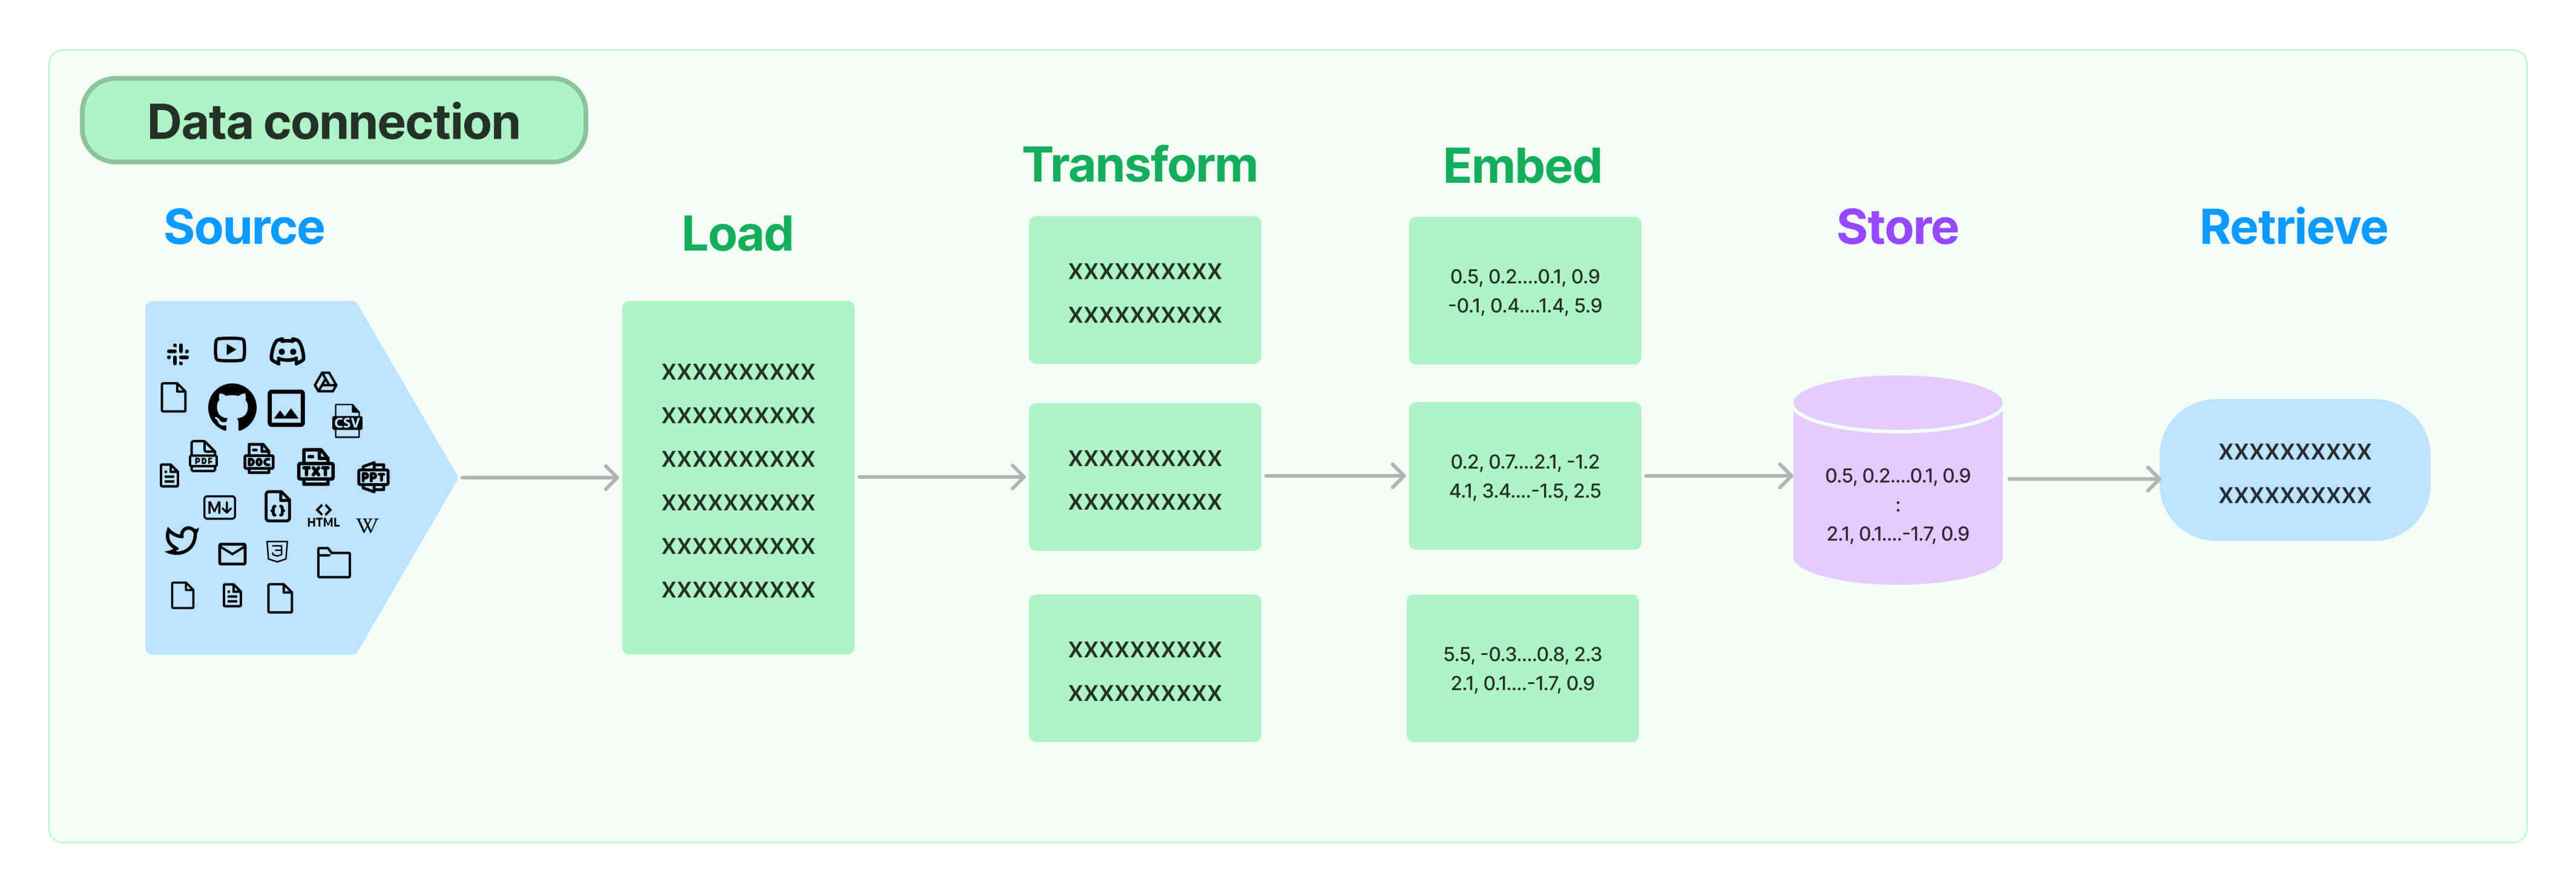

A foto acima demonsntra o processo de passagem dos dados para a LLM, detalharei cada uma das partes mais a frente, mas aqui está um resumo de cada uma delas:



*   Document loaders:
    
    Os document loaders carregam documentos de diversas fontes diferentes, há mais de 100 diferentes. A biblioteca permite integração com todos os tipos de documento (HTML, CSV, PDF, código, etc).


  
*   Text Splitting

    Uma parte muito importante na hora de carregar os documentos é pegar apenas as partes relevantes dele, além de isso ajudar a LLM a ter apenas as informações úteis, há também uma economia de tokens. A biblioteca apresenta diversos algoritmos de trasnformação geral e específicos para certos tipos de documetos.

*   Text embedding models

    O próximo passo é criar os embeddings dos documentos, os embeddings capturam aspectos semânticos dos textos e podem ser lidos pelas LLM, além de facilitar na busca eficiente por textos com similaridades, novamente a API disponibiliza diversos modelos para isso.

*   Vector stores

    A grande quantidade de embeddings fez surgir a necessidade de databases que suportam com eficiência o armazenamento e a busca nesses embaddings. O langchain disponibiza diversos modelos com fácil uso para isso.

*   Retrievers

    Os dados guardados na database precisam ser retornados, há vários algoritmos para isso na API, há desde os mais simples como a busca semântica básica, mas também algoritmos mais avançados com aplicações mais complexas e que serão detalhadas adiante.


*   Indexing

    É uma forma de ajudar o usuário, evitando duplicatas no vector stores, evitando reescrever conteúdo inalterado e evitando a computação de embeddings repetidos. Tudo isso salvará memória, tempo e dinheiro das aplicações que fizermos.


####Document loaders:

Não há muita dificuldade nessa parte do processo, já mostrei um uso na aplicação inicial no início do notebook, então agora vou apenas motrar algumas opções:

CSV:

In [ ]:
from langchain_community.document_loaders.csv_loader import CSVLoader
from langchain_community.document_loaders import JSONLoader

In [ ]:
#CSV
loader_csv = CSVLoader(file_path='/content/Nobel.csv')
csv = loader_csv.load()

In [ ]:
print(csv)

[Document(page_content='awardYear: 2001\ncategory: Economic Sciences\ncategoryFullName: The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel\nsortOrder: 2\nportion: 1/3\nprizeAmount: 10000000\nprizeAmountAdjusted: 12295082\ndateAwarded: 2001-10-10\nprizeStatus: received\nmotivation: for their analyses of markets with asymmetric information\ncategoryTopMotivation: \naward_link: https://masterdataapi.nobelprize.org/2/nobelPrize/eco/2001\nid: 745\nname: A. Michael Spence\nknownName: A. Michael Spence\ngivenName: A. Michael\nfamilyName: Spence\nfullName: A. Michael Spence\npenName: \ngender: male\nlaureate_link: http://masterdataapi.nobelprize.org/2/laureate/745\nbirth_date: 1943-00-00\nbirth_city: Montclair, NJ\nbirth_cityNow: Montclair, NJ\nbirth_continent: North America\nbirth_country: USA\nbirth_countryNow: USA\nbirth_locationString: Montclair, NJ, USA\ndeath_date: \ndeath_city: \ndeath_cityNow: \ndeath_continent: \ndeath_country: \ndeath_countryNow: \ndeath_locat

JSON:

In [ ]:
import json
from pathlib import Path
from pprint import pprint


Json ='/content/db.json'
json_data = json.loads(Path(Json).read_text())

In [ ]:
pprint(json_data)

{'livros': [{'ano': '2018',
             'autores': {'autor1': 'José Augusto N. G. Manzano'},
             'categoria': 'Programação',
             'descricao': '<p>Lorem ipsum dolor sit amet, consectetuer '
                          'adipiscing elit. Morbi eleifend, purus quis laoreet '
                          'faucibus, ante augue malesuada mi, id rhoncus augue '
                          'lorem eget elit. Ut sollicitudin sodales purus.</p>',
             'estoque': 'Disponível também em formato ebook',
             'imgCapa': 'https://s3.novatec.com.br/capas/9788575226834.jpg',
             'isbn': '978-85-7522-683-4',
             'paginas': '312',
             'pgAutores': {'pgAutor1': 'autores/jose-manzano.php'},
             'preco': 69,
             'titulo': 'Primeiros passos com a linguagem Rust'},
            {'ano': '2018',
             'autores': {'autor1': 'Igor Zhirkov'},
             'categoria': 'Hardware &amp; Robótica',
             'descricao': '<p>Phasellus liber

PDF:

In [ ]:
!pip install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 5.3 MB/s eta 0:00:00


In [ ]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("/content/+A+CONSTRUÇÃO+DA+LOUCURA+NO+CONTO+MIOPIA+PROGRESSIVA.pdf")

In [ ]:
pdf = loader.load()

In [ ]:
pdf # eles são divididos por página nessa abordagem

[Document(page_content="                   Vol. 5 (1), nº 1. 2020,  janeiro/julho de 2020  \n \n89 \n A construção da loucura no conto miopia progressiva  \n \nJoelma Correia da Silva (UNEAL)1 \n1Mestranda em Letras (UNEAL). E-mail: joelmaportugues1@gmail.com . \nRonaldo Gomes dos Santos (UNEAL)2 \nMestrando em Letras (UNEAL). E-mail: ronaldogomer123@gmail. com. \nAmanda Ramalho de Freitas Brito (UNEAL/UFPB)3 \nDoutora em Letras (UNEAL/UFPB). E-mail:  amandaramalhobrito@gmail.com . \n \n \nResumo  - A discussão sobre a loucura assume ao longo da história do ocidente diferentes \ncompreensões, passa da  relação com a percepç ão de possessão demoníaca, seria para o homem um \ncastigo divino advindo das cons equências de manias pecaminosas, às persecutórias atuantes sobre \npessoas que aparentemente mostrava um comportamento desviante das nor mas estabelecidas. No final \ndo século XIX a Psicanálise apresenta novos modelos de entendimento da loucura sob a l uz das três \nestruturas clínic

In [ ]:
pags = loader.load_and_split()#Agora teremos página por página

In [ ]:
pags

[Document(page_content="Vol. 5 (1), nº 1. 2020,  janeiro/julho de 2020  \n \n89 \n A construção da loucura no conto miopia progressiva  \n \nJoelma Correia da Silva (UNEAL)1 \n1Mestranda em Letras (UNEAL). E-mail: joelmaportugues1@gmail.com . \nRonaldo Gomes dos Santos (UNEAL)2 \nMestrando em Letras (UNEAL). E-mail: ronaldogomer123@gmail. com. \nAmanda Ramalho de Freitas Brito (UNEAL/UFPB)3 \nDoutora em Letras (UNEAL/UFPB). E-mail:  amandaramalhobrito@gmail.com . \n \n \nResumo  - A discussão sobre a loucura assume ao longo da história do ocidente diferentes \ncompreensões, passa da  relação com a percepç ão de possessão demoníaca, seria para o homem um \ncastigo divino advindo das cons equências de manias pecaminosas, às persecutórias atuantes sobre \npessoas que aparentemente mostrava um comportamento desviante das nor mas estabelecidas. No final \ndo século XIX a Psicanálise apresenta novos modelos de entendimento da loucura sob a l uz das três \nestruturas clínicas: neurose, psicos

In [ ]:
type(pags[2])

langchain_core.documents.base.Document

Não farei nenhum exemplo com aplicação direta do langchain, pois já fiz no exemplo inicial, onde leio um pdf e procuro uma resposta nele.

Lembrando que esses não são todos os documentos que podemos utilizar, ainda há outros que a biblioteca oferece suporte, como também podemos utilizar formatos de documentos que o langchain não oferece funções específicas para isso, mas elas podem ser criadas.

####Text spliting:

Com os documentos desponíveis vamos querer fazer um tratamento nos textos para ser possível fazer sua divisão, o que poupará tokens e se adequará à janela de contexto do modelo utilizado, além disso fazer uma divisão satisfatório para o uso do caso. O LangChain tem diversos transformadores de textos que fazem a divisão, combinação e filtragem nos documentos.

Há diversas formas de fazer isso, em muitos caso essa divisão não é algo simples, numa divisão de alto nível os textos não podem ser dividos aleatoriamente ou com medidas muito arbitrárias, pois isso pode levar a uma perda de contexto semântico, divisão de textos que não poderiam ser divididos ou outros problemas.

Os vários métodos disponíveis variam normalmente em como é feita a divisão e o tamanho do chunk, cada qual buscando ser melhor com certo tipo de dado.

In [ ]:
%pip install -qU langchain-text-splitters

Mostrando alguns dos splitters de texto com o pdf acima

In [ ]:
len(pags)

9

In [ ]:
conteudo_da_pagina = []
for i in range(9):
  conteudo_da_pagina.append(pags[i].page_content)

In [ ]:
Texto_completo = ''.join(conteudo_da_pagina)
Texto_completo

'Vol. 5 (1), nº 1. 2020,  janeiro/julho de 2020  \n \n89 \n A construção da loucura no conto miopia progressiva  \n \nJoelma Correia da Silva (UNEAL)1 \n1Mestranda em Letras (UNEAL). E-mail: joelmaportugues1@gmail.com . \nRonaldo Gomes dos Santos (UNEAL)2 \nMestrando em Letras (UNEAL). E-mail: ronaldogomer123@gmail. com. \nAmanda Ramalho de Freitas Brito (UNEAL/UFPB)3 \nDoutora em Letras (UNEAL/UFPB). E-mail:  amandaramalhobrito@gmail.com . \n \n \nResumo  - A discussão sobre a loucura assume ao longo da história do ocidente diferentes \ncompreensões, passa da  relação com a percepç ão de possessão demoníaca, seria para o homem um \ncastigo divino advindo das cons equências de manias pecaminosas, às persecutórias atuantes sobre \npessoas que aparentemente mostrava um comportamento desviante das nor mas estabelecidas. No final \ndo século XIX a Psicanálise apresenta novos modelos de entendimento da loucura sob a l uz das três \nestruturas clínicas: neurose, psicose e perversão. Nesse se

In [ ]:
len(Texto_completo)

21287

In [ ]:
from langchain_text_splitters import CharacterTextSplitter #o mais simples, apenas divide por quantidade de caracteres

text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=2000,
    chunk_overlap=1000, #Escrever o que tem na documentação
    is_separator_regex=True,
)

In [ ]:
texts = text_splitter.split_text(Texto_completo)
print(texts[0])

Vol. 5 (1), nº 1. 2020,  janeiro/julho de 2020  
 
89 
 A construção da loucura no conto miopia progressiva  
 
Joelma Correia da Silva (UNEAL)1 
1Mestranda em Letras (UNEAL). E-mail: joelmaportugues1@gmail.com . 
Ronaldo Gomes dos Santos (UNEAL)2 
Mestrando em Letras (UNEAL). E-mail: ronaldogomer123@gmail. com. 
Amanda Ramalho de Freitas Brito (UNEAL/UFPB)3 
Doutora em Letras (UNEAL/UFPB). E-mail:  amandaramalhobrito@gmail.com . 
 
 
Resumo  - A discussão sobre a loucura assume ao longo da história do ocidente diferentes 
compreensões, passa da  relação com a percepç ão de possessão demoníaca, seria para o homem um 
castigo divino advindo das cons equências de manias pecaminosas, às persecutórias atuantes sobre 
pessoas que aparentemente mostrava um comportamento desviante das nor mas estabelecidas. No final 
do século XIX a Psicanálise apresenta novos modelos de entendimento da loucura sob a l uz das três 
estruturas clínicas: neurose, psicose e perversão. Nesse sentido, a  loucura t

In [ ]:
len(texts)

21

Recursively split by character


Esse é um algoritmo mais "inteligente", ele funciona com uma grande semelhança ao splitter por caracter, porém ele tem meios de tentar além de reduzir o tamanho dos textos reduizi-los sem cortar setenças, paragrafos etc.

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter2 = RecursiveCharacterTextSplitter(
    # Geralmente queremos chunks bem pequenas nesse uso
    chunk_size=50,
    chunk_overlap=10,
    is_separator_regex=False,
)

In [ ]:
texts2 = text_splitter2.split_text(Texto_completo)
print(texts2[0])

Vol. 5 (1), nº 1. 2020,  janeiro/julho de 2020


In [ ]:
len(texts2)

595

Nítido como ele fica bem menor

Agora partindo para usos com algoritmos que tentam fazer chunks de formas melhores, porém mais custosas

Chunk semantico

In [ ]:
!pip install --quiet langchain_experimental langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 2.9 MB/s eta 0:00:00


In [ ]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings

In [ ]:
text_splitter3 = SemanticChunker(OpenAIEmbeddings())

In [ ]:
texts3 = text_splitter3.split_text(Texto_completo)
print(texts3[0])

Vol.


In [ ]:
texts3[1]

'5 (1), nº 1. 2020,  janeiro/julho de 2020  \n \n89 \n A construção da loucura no conto miopia progressiva  \n \nJoelma Correia da Silva (UNEAL)1 \n1Mestranda em Letras (UNEAL). E-mail: joelmaportugues1@gmail.com .'

In [ ]:
len(texts3)

11

É possível ver a enorme mudança de abordagem, mesmo com os dois primeiros chunks bem pequenos nesse split temos o menor número de chunks até agora, sua divisão não é mais um número arbitrário de contagem.

Agora partindo para uma abordagem também arbitrária, porém na prática mais usual por trabalharmos com um algo "mais concreto" que contagem de caracteres.

Um splitter por número de tokens:

In [ ]:
!pip install --upgrade --quiet langchain-text-splitters tiktoken

In [ ]:
from langchain_text_splitters import CharacterTextSplitter

In [ ]:
text_splitter4 = CharacterTextSplitter.from_tiktoken_encoder(
    encoding_name="cl100k_base", chunk_size=10, chunk_overlap=0
)
texts4 = text_splitter4.split_text(Texto_completo)  #Ver documentação bruta

In [ ]:
texts4[0]

'Vol. 5 (1), nº 1. 2020,  janeiro/julho de 2020  \n \n89 \n A construção da loucura no conto miopia progressiva  \n \nJoelma Correia da Silva (UNEAL)1 \n1Mestranda em Letras (UNEAL). E-mail: joelmaportugues1@gmail.com . \nRonaldo Gomes dos Santos (UNEAL)2 \nMestrando em Letras (UNEAL). E-mail: ronaldogomer123@gmail. com. \nAmanda Ramalho de Freitas Brito (UNEAL/UFPB)3 \nDoutora em Letras (UNEAL/UFPB). E-mail:  amandaramalhobrito@gmail.com . \n \n \nResumo  - A discussão sobre a loucura assume ao longo da história do ocidente diferentes \ncompreensões, passa da  relação com a percepç ão de possessão demoníaca, seria para o homem um \ncastigo divino advindo das cons equências de manias pecaminosas, às persecutórias atuantes sobre \npessoas que aparentemente mostrava um comportamento desviante das nor mas estabelecidas. No final \ndo século XIX a Psicanálise apresenta novos modelos de entendimento da loucura sob a l uz das três \nestruturas clínicas: neurose, psicose e perversão. Nesse se

In [ ]:
len(texts4)

1

Lembrando novamente que há outros, principalmente os mais específicos, como os focados para linguagens de programação por exemplo

####Text embedding models:

A classe de embeddings do LangChain apresenta dois métodos: um embedding de documentos, que recebe múltiplos textos e tem como função geral buscar em tudo; e um de embedding de uma query, recebe um texto único e tem como função geral buscar a si mesma

In [ ]:
embeddings_model = OpenAIEmbeddings()

In [ ]:
embeddings = embeddings_model.embed_documents(texts3)  #pede uma lista de strings como parâmetro, usarei a de chunks semanticos
len(embeddings), len(embeddings[0]) #podemos ver que há os 11 chunks, tendo o primeiro 1536 diferentes

(11, 1536)

In [ ]:
embedded_query = embeddings_model.embed_query(Texto_completo) #essa agora funciona com uma única string
embedded_query[:5]

[-0.0008263610835825833,
 0.0225244840012072,
 0.021873565875573316,
 -0.04526594381536768,
 -0.020992115605289553]

####Vector stores:

O Vector store basicamente tem a tarefa de guardar num database os embeddings dos dados e realizar a busca vetorial.

In [ ]:
from langchain.embeddings import CacheBackedEmbeddings

Também é possível fazer um cache desses embeddings, farei aquei já com o vector store

In [ ]:
%pip install --upgrade --quiet  langchain-openai faiss-cpu   #Esse é um vector store disponibilizado pelo facebook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 37.1 MB/s eta 0:00:00


In [ ]:
from langchain.storage import LocalFileStore
from langchain_community.vectorstores import FAISS

In [ ]:
underlying_embeddings = OpenAIEmbeddings()

store = LocalFileStore("./cache/")

cached_embedder = CacheBackedEmbeddings.from_bytes_store(
    underlying_embeddings, store, namespace=underlying_embeddings.model
)

In [ ]:
%%time
db = FAISS.from_texts(texts3, cached_embedder)

CPU times: user 217 ms, sys: 8.67 ms, total: 226 ms
Wall time: 630 ms


In [ ]:
list(store.yield_keys())[:5]

['text-embedding-ada-0029ef05868-18cd-50a1-892e-47263abaec7f',
 'text-embedding-ada-002d3f650f6-ad46-58e8-9568-1713c9886d32',
 'text-embedding-ada-00234defa30-d745-50bd-b312-b2461d50e52b',
 'text-embedding-ada-00217b11382-8339-5098-9420-63760e916237',
 'text-embedding-ada-002238af689-4d1a-58b8-940e-71b4307e78e9']

A principal ajuda desse cache é caso formos usar os embeddings novamente, por exemplo para criar outro vector store tudo será muito mais rápido por já termos eles computados.


Agora vamos ver como funciona o vector store

In [ ]:
#busca por similaridade :
query = "Como é a locura no conto?"
docs = db.similarity_search(query)

In [ ]:
len(docs)

4

In [ ]:
print(docs[0].page_content)

5 (1), nº 1. 2020,  janeiro/julho de 2020  
 
90 
 Keywords : Madness; Identification; Child character  
 
 
 
 
Introdução  
Tendo como objetivo principal entender a maneira como o discurso literário se a própria 
da figura do louco no conto Miopia Progressiva . Nele, encontramo s um tom levemente 
otimista, na medida em que aponta para alguma alternativa de reaproximação da autenticidade 
do sujeito pré -alienação. No conto em questão, o encontro do si mesmo com o mundo 
desejante familiar e a perda de contato com o si mesmo originár io. Vemos um garoto que se 
esforça por predizer o movimento de seus familiares em sua direção, movimento esse que tem 
a atribuição de dizer quem ele é. “Num estado de permanente incerteza”, continuamos a 
assistir o movimento alienante da constituição do eu , que se resume no paradoxo: cabe aos 
outros dizer o que eu sou. Ele nunca conseguia mapear o campo interpretativo familiar. Graças à instabilidade misteriosa dos outros de sua família, ele se dese

In [ ]:
#similaridade de vetor
embedding_vector = OpenAIEmbeddings().embed_query(query)
docs2 = db.similarity_search_by_vector(embedding_vector)
print(docs2[0].page_content)

5 (1), nº 1. 2020,  janeiro/julho de 2020  
 
90 
 Keywords : Madness; Identification; Child character  
 
 
 
 
Introdução  
Tendo como objetivo principal entender a maneira como o discurso literário se a própria 
da figura do louco no conto Miopia Progressiva . Nele, encontramo s um tom levemente 
otimista, na medida em que aponta para alguma alternativa de reaproximação da autenticidade 
do sujeito pré -alienação. No conto em questão, o encontro do si mesmo com o mundo 
desejante familiar e a perda de contato com o si mesmo originár io. Vemos um garoto que se 
esforça por predizer o movimento de seus familiares em sua direção, movimento esse que tem 
a atribuição de dizer quem ele é. “Num estado de permanente incerteza”, continuamos a 
assistir o movimento alienante da constituição do eu , que se resume no paradoxo: cabe aos 
outros dizer o que eu sou. Ele nunca conseguia mapear o campo interpretativo familiar. Graças à instabilidade misteriosa dos outros de sua família, ele se dese

In [ ]:
#Olhar melhor como funciona isso aqui

In [ ]:
#Aqui loadar vários pdfs (https://www.youtube.com/watch?v=s5LhRdh5fu4)

####Retrivers:

Os retrivers tem como função retornar partes dos documentos guardados, podendo eles ou não terem como backbone algum vector store. Eles aceitam uma string de uma query como input e retornam uma lista de documentos como output.


O modelo de retriver escolhido tem que atender seu objetivo, ele tem diversos níveis de complexidade.


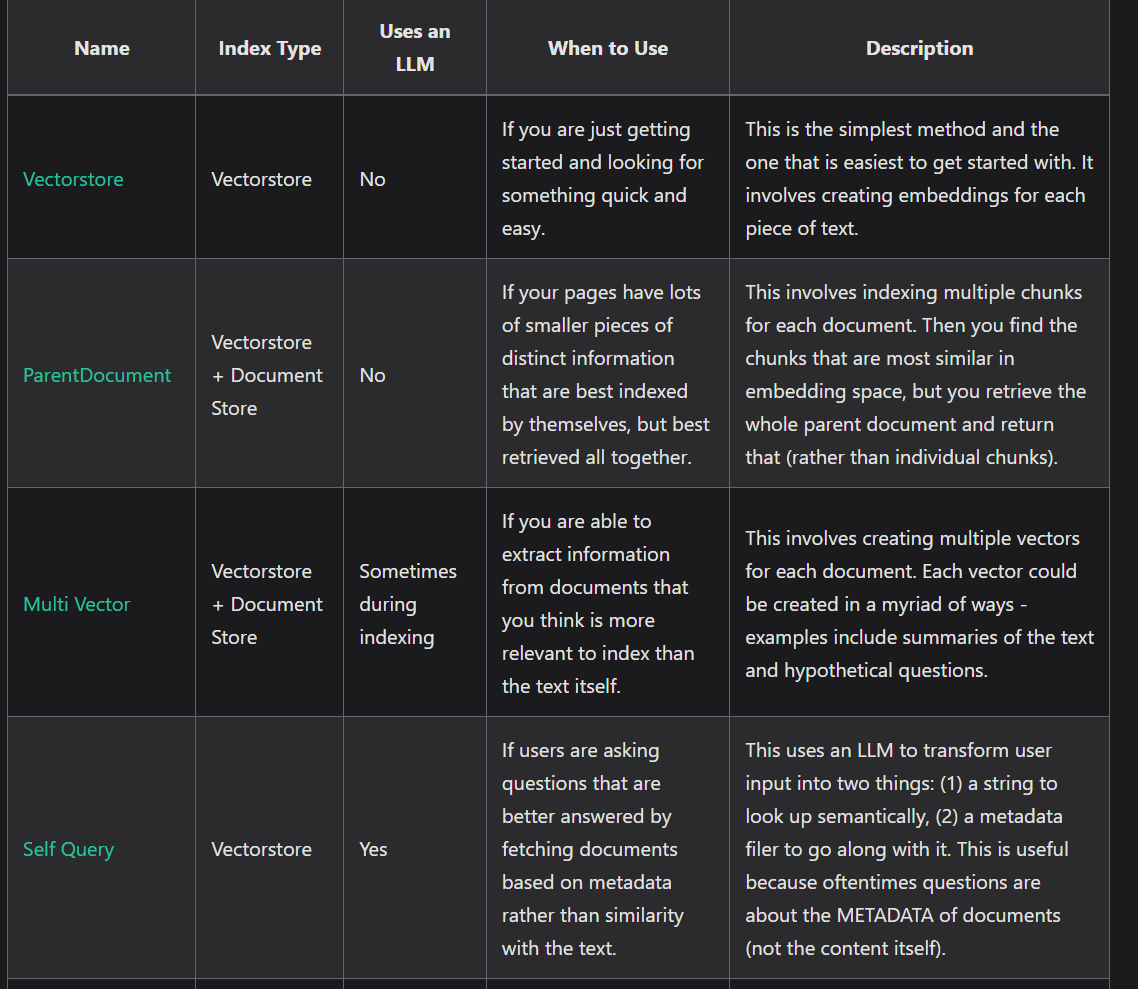

Temos alguns exemplos de retrievers com seus tipos e melhores momentos para usá-las

Apenas um exemplo bem simples, vou fazer um retriever apenas para retornar todos os textos do bernardo soares que usarei mais a frente.

In [ ]:
with open('/content/Livro-do-Desassossego-.txt', 'r') as arquivo:
    desassossego = arquivo.read()
#Esse é um arquivo txt, ou seja apenas uma string, do único livro desse heterônimo, o livro do desassossego
#Tratei o texto tirando informações irrelevantes para a llm, como sumário, capa e etc, deixei apenas o texto literário

In [ ]:
type(desassossego)

str

In [ ]:
len(desassossego)

872812

Por ser apenas um único arquivo txt não há a necessidade de nenhum document loader, posso partir para os próximos passos direto.

Vou usar um splitter semântico por ser um texto literário

In [ ]:
splitter_semântico = SemanticChunker(OpenAIEmbeddings())

In [ ]:
docs = splitter_semântico.create_documents([desassossego])

In [ ]:
len(docs)

419

In [ ]:
docs[0].page_content

'\n  Ele mobilara — é impossível que não fosse à custa de algumas coisas\n\nessenciais — com um certo e aproximado luxo os seus dois quartos. Cuidara\n\nespecialmente das cadeiras — de braços, fundas, moles -, dos reposteiros e\n\ndos tapetes. Dizia ele que assim se criara um interior "para manter a dignidade\n\ndo tédio". No quarto à moderna o tédio torna-se desconforto, mágoa física. Nada o obrigara nunca a fazer nada. Em criança passara isoladamente. Aconteceu que nunca passou por nenhum agrupamento. Nunca frequentara\n\num curso. Não pertencera nunca a uma multidão. Dera-se com ele o curioso\n\nfenómeno que com tantos — quem sabe, vendo bem, se com todos? — se dá,\n\nas circunstâncias ocasionais da sua vida se terem talhado à imagem e\n\nsemelhança da direção dos seus instintos, de inércia todos, e de afastamento. Nunca teve de se defrontar com as exigências do estado ou da sociedade. Às próprias exigências dos seus instintos ele se furtou. Nada o aproximou\n\nnunca nem de amigos n

In [ ]:
underlying_embeddings = OpenAIEmbeddings()
store = LocalFileStore("./cache_Bernardo/")
cached_embedder = CacheBackedEmbeddings.from_bytes_store(underlying_embeddings, store, namespace=underlying_embeddings.model)

In [ ]:
%%time
db = FAISS.from_documents(docs, cached_embedder)

CPU times: user 7.87 s, sys: 90 ms, total: 7.96 s
Wall time: 11.7 s


In [ ]:
type(db)

langchain_community.vectorstores.faiss.FAISS

In [ ]:
import os
from google.colab import files
folder_name = '/content/cache_Bernardo'
!zip -r {folder_name}.zip {folder_name}
files.download(f'{folder_name}.zip')

  adding: content/cache_Bernardo/ (stored 0%)
  adding: content/cache_Bernardo/text-embedding-ada-002640eb3e8-0c37-5520-93bc-8581a6f6253a (deflated 60%)
  adding: content/cache_Bernardo/text-embedding-ada-002a3fa8237-a191-5d20-92a8-c50578bdad0e (deflated 60%)
  adding: content/cache_Bernardo/text-embedding-ada-002bb4bd989-b5b5-5468-bd73-bb3fb372fe2a (deflated 60%)
  adding: content/cache_Bernardo/text-embedding-ada-002155e7e57-a3fb-5199-84bf-5f1b5a1614ee (deflated 60%)
  adding: content/cache_Bernardo/text-embedding-ada-002078ecffd-8fc8-5e6d-a04b-fd811e4cf3d4 (deflated 60%)
  adding: content/cache_Bernardo/text-embedding-ada-002fe3d6c76-c26a-5988-ad6c-12fbcf2ed78e (deflated 59%)
  adding: content/cache_Bernardo/text-embedding-ada-00287ecea69-b36f-5e86-af55-0bafcab7cc64 (deflated 60%)
  adding: content/cache_Bernardo/text-embedding-ada-00287fc037b-9811-55d0-a5d2-047132f1562c (deflated 59%)
  adding: content/cache_Bernardo/text-embedding-ada-002a9d472e2-172a-51e1-bd13-2e5aebd9ce18 (defla

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
db.similarity_search("Vasques")[0].page_content

'O patrão Vasques. Tenho, muitas vezes, inexplicavelmente, a hipnose do\n\npatrão Vasques. Que me é esse homem, salvo o obstáculo ocasional de ser\n\ndono das minhas horas, num tempo diurno da minha vida? Trata-me bem,\n\nfala-me com amabilidade, salvo nos momentos bruscos de preocupação\n\ndesconhecida em que não fala bem a alguém. Sim, mas porque me preocupa?'

Nesse caso como o contexto funciona como uma inspiração e deve ser usado por completo, não há a necessidade de fazer nenhum retriever que busca informações relevantes.

Apenas para não usar sempre o texto todo, algo que pode fazer a janela de contexto exceder o limite e deixar o texto com vies, vou sempre gerar uma lista de 5 números aleatórios que escolheram 5 dos documentos a serem escolhidos para a llm ter como fonte

In [ ]:
retriever = db.as_retriever(search_kwargs={"k": len(docs)})

In [ ]:
textos = retriever.get_relevant_documents("desassossego")
len(textos) #Aqui fiz um retriver aleatório que escolhe os k elementos apenas para ter todos os textos numa lista

419

####Indexing:

O indexing não é uma parte necessária para o processo, porém pode ser uma grande ajuda para salvar memória, tempo e tokens nos usos das LLM's. O objetivo principal do indexing é evitar documentos duplicados, reescrita de documentos inalterados e repetir a computação de embeddings desses documentos inalterados. Ele funciona mantendo um tracking dos documentos presentes na vector store.

###Agents:

A ideia dos agentes é usar os modelos de linguagem para escolher uma sequência de ações a serem tomadas. A parte dos agentes em LangChain facilitam essa parte.

Componentes chave:

Schema:

AgenteAction:

*   AgenteAction:

    Como o nome diz, representa a ação que o agente deve tomar.

*   AgentFinish:

    Representa o resultado final de um agente ao finalizar sua tarefa. Contém valores de retorno do output.

*   Intermediate Steps:

    Representa as ações de agentes anteriores e outputs de agentes que agem no momento. É importante por passar para as futuras interações assim o agente saberá o que já foi feito.

Agente:

São as chains responsáveis por decidir os próximos passos, são suportadas pelo modelo, um prompt e um output parser. Diferentes agentes têm diferentes estilos de funcionamento.


*   Agent Inputs:

    Os inputs para um agente são uma key-value, só há uma necessária, os intermediate_steps descritos acima.

*   Agente outputs:

    Os outputs são as próximas ações a se tomar ou a resposta final da tarefa.


AgentExecutor:

O AgentExecutor é quem realmente executa a ação chamada pelo agente e devolve o output a ele. A maior função dele é lidar com os erros nesses processos.

Tools:

As tools são funções que o agente pode chamar. há dois componentes principais, o esquema do input para a tool, nisso são passados os parâmetros que a LLM precisa para chamar a tool; E a função que deve ser rodada. Para um bom funcionamento disso as tools corretas têm que ser dadas ao agente e elas têm que ser corretamente descridas.

O langchain disponibiliza alguns toolkits, kits com algumas tools específicas para certas tarefas.





####Agent Types:

O tipo de agente é definido por algumas funções que ele atende algo que obviamente vai depender da escolha do usuário:


Intended Model Type

Basicamente define se o agente é feito para chat models ou para LLMs seguindo o comportamento detalhado anteriormente. Bascimente afeta como deve ser feito o prompt.


Supports Chat History

Se o agente terá ou não a capacidade de guardar a memória do chat, caso pode é possível usá-lo como chatbot.


Supports Multi-Input Tools

Como o nome diz, define se o agente aceita tools com múltiplos inputs, caso a tarefa precise de um único input é bom usar uma tool que só aceite um por ser mais rápido.

Supports Parallel Function Calling

Para as LLM chamar mais de uma função ao mesmo tempo pode ser bem desafiador, porém é algo que acelera muito alugns processos. Isso define se o agente é capaz ou não de fazer isso

Required Model Params

Alguns agentes precessam de paramêtros adcionais além do prompt para funcionar.




#### Aplicação básica de agente

Vou apenas fazer uma aplicação básica mostrando como funciona o agente, vou usar o tavily, uma IA feita justamente para otimizar os usos de pesquisas com as llms.

In [ ]:
!pip install -U langchain-community tavily-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.3/291.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.5/115.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [ ]:
import getpass
import os
os.environ["TAVILY_API_KEY"] = getpass.getpass()

 #É uma API paga também, mas eles disponibilizam mil requests gratuitos

··········


In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool_pesquisa = TavilySearchResults()

In [ ]:
pesquisa1 = tool_pesquisa.invoke("what is the problem with Elon Musk and Brazil?") #Pesquisando em ingles

In [ ]:
pesquisa1

[{'url': 'https://www.cbsnews.com/news/brazil-elon-musk-x-twitter-free-speech-disinformation-obstruction/',
  'content': 'Artificial intelligence, Elon Musk and the biggest tech stories of 2023 04:26. A crusading Brazilian Supreme Court justice included Elon Musk as a target in an ongoing investigation over the ...'},
 {'url': 'https://www.economist.com/the-americas/2024/04/14/elon-musk-is-feuding-with-brazils-powerful-supreme-court',
  'content': "Over the past two weeks Elon Musk, a serial entrepreneur, has been on a very public tirade against Alexandre de Moraes, one of the Brazilian Supreme Court's 11 judges. The dispute is about X, a ..."},
 {'url': 'https://www.forbes.com/sites/zacharyfolk/2024/04/08/brazils-dispute-with-elon-musk-heres-what-to-know-as-judge-orders-investigation-into-billionaire/',
  'content': 'Brazilian Supreme Court Justice Alexandre de Moraes ordered an investigation into Elon Musk, the billionaire owner of social media app X, formerly Twitter, as part of an 

In [ ]:
pesquisa1[2] #cada item da lista gera uma fonte e o conteúdo

{'url': 'https://www.forbes.com/sites/zacharyfolk/2024/04/08/brazils-dispute-with-elon-musk-heres-what-to-know-as-judge-orders-investigation-into-billionaire/',
 'content': 'Brazilian Supreme Court Justice Alexandre de Moraes ordered an investigation into Elon Musk, the billionaire owner of social media app X, formerly Twitter, as part of an escalating conflict ...'}

In [ ]:
pesquisa1[2]['content']

'Brazilian Supreme Court Justice Alexandre de Moraes ordered an investigation into Elon Musk, the billionaire owner of social media app X, formerly Twitter, as part of an escalating conflict ...'

In [ ]:
pesquisa2 = tool_pesquisa.invoke("O que aconteceu com o tio paulo?") #Pesquisando em portugues

In [ ]:
pesquisa2

[{'url': 'https://sbtnews.sbt.com.br/noticia/brasil/caso-tio-paulo-o-que-e-vilipendio-crime-de-desrespeitar-o-cadaver',
  'content': 'Érika de Souza Vieira Nunes foi presa suspeita de ter levado um idoso de 68 anos a quem ela chamava de "tio Paulo", já morto, para assinar um empréstimo num banco do Rio de Janeiro. No Brasil, há um crime previsto no Código Penal para casos de desrespeito ao cadáver: o vilipêndio. + VÍDEO: Mulher leva cadáver para sacar empréstimo em ...'},
 {'url': 'https://www.cnnbrasil.com.br/nacional/caso-tio-paulo-sobrinha-tentou-comprar-celular-e-fazer-outros-emprestimos/',
  'content': 'Caso "Tio Paulo": o que falta saber sobre o cadáver levado ao banco no Rio; Mulher que levou idoso morto ao banco pode responder por vilipêndio a cadáver; entenda; ... O caso aconteceu na tarde da última terça-feira (16) em Bangu, na Zona Oeste do Rio. O Serviço Móvel de Atendimento de Urgência (Samu) foi chamado ao local. Segundo a ...'},
 {'url': 'https://www.cnnbrasil.com.br/nac

In [ ]:
resultado = [item['content'] for item in pesquisa2]
resultado

['Érika de Souza Vieira Nunes foi presa suspeita de ter levado um idoso de 68 anos a quem ela chamava de "tio Paulo", já morto, para assinar um empréstimo num banco do Rio de Janeiro. No Brasil, há um crime previsto no Código Penal para casos de desrespeito ao cadáver: o vilipêndio. + VÍDEO: Mulher leva cadáver para sacar empréstimo em ...',
 'Caso "Tio Paulo": o que falta saber sobre o cadáver levado ao banco no Rio; Mulher que levou idoso morto ao banco pode responder por vilipêndio a cadáver; entenda; ... O caso aconteceu na tarde da última terça-feira (16) em Bangu, na Zona Oeste do Rio. O Serviço Móvel de Atendimento de Urgência (Samu) foi chamado ao local. Segundo a ...',
 'Mesmo assim, Erika insiste: "Tio Paulo, tá ouvindo? O senhor precisa assinar. Se o senhor não assinar, não tem como. Eu não posso assinar pelo senhor, tem que ser o senhor. O que eu posso fazer, eu faço". Mesmo sem o tio mover um dedo, a sobrinha continua conversando com o morto, enquanto tenta fazer a mão do 

In [ ]:
tool_pesquisa2 = TavilySearchResults(
    include=["title", "snippet"],
    exclude=["source_url"],
)

In [ ]:
pesquisa3 = tool_pesquisa2.invoke("Как прошла игра «Реала» в апреле 2024 года?")

In [ ]:
pesquisa3

[{'url': 'https://www.sport-express.ru/football/champions-league/news/real-leypcig-rezultat-matcha-ligi-chempionov-6-marta-2024-goda-2186872/#!',
  'content': '07.03.2024. зритель1. Кое-как заползли. ... Как и игра Реала в обоих матчах. Если так и дальше будут катать, то ...'},
 {'url': 'https://ru.uefa.com/uefachampionsleague/news/028c-1a9d4602e2d0-3c366131cff2-1000--реал-ман-си/',
  'content': 'Американские горки в Мадриде. вторник, 9 апреля 2024 г. Как и в прошлом сезоне, команды сыграли вничью в Мадриде. Но в этот раз куда более результативную. Реал - Ман Сити 3:3. Лучшие моменты. Первый ...'},
 {'url': 'https://www.championat.com/football/article-5520970-real-barselona-21-aprelya-2024-goda-glavnye-skandaly-v-el-klasiko-messi-ramos-mourinyu-pepe-buskets-figu.html',
  'content': 'В 2000-м Луиш Фигу решился на очень смелый шаг — покинул «Барселону» ради «Реала». Как вы понимаете, болельщикам каталонского клуба не понравился такой поступок футболиста.'},
 {'url': 'https://www.sports.r

In [ ]:
!pip install -U langchain-openai langchainhub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.5/311.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.7/817.7 kB 8.1 MB/s eta 0:00:00


In [ ]:
from langchain import hub
from langchain.agents import AgentExecutor, create_openai_functions_agent
from langchain_openai import ChatOpenAI

instructions = """You are a RAG programmer good with Langchain."""
base_prompt = hub.pull("langchain-ai/openai-functions-template")
prompt = base_prompt.partial(instructions=instructions)
llm = ChatOpenAI(temperature=0.8)
tavily_tool = TavilySearchResults()
tools = [tavily_tool]
agent = create_openai_functions_agent(llm, tools, prompt)
agent_executor = AgentExecutor(
    agent=agent,
    tools=tools,
    verbose=True,
)

In [ ]:
base_prompt

ChatPromptTemplate(input_variables=['agent_scratchpad', 'input', 'instructions'], input_types={'chat_history': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]], 'agent_scratchpad': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]]}, metadata={'lc_hub_owner': 'langchain-ai', 'lc_hub_repo': 'openai-functions-template', 'lc_hub_commit_hash': 'b4198088b0f11cbe911a9e1cb6546893c00283b6cf0f80ae003b3955efdfe281'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['instructions'], template='{instruct

In [ ]:
agent_executor.invoke({"input": "give a code making a prompt wiht the langchain API"})



> Entering new AgentExecutor chain...
Sure, here is an example code snippet that creates a prompt using the Langchain API:

```python
# Import the necessary functions from the Langchain API
from functions import tavily_search_results_json

# Define the prompt message
prompt_message = "Enter your search query: "

# Get user input for the search query
search_query = input(prompt_message)

# Call the Langchain API function to get search results
search_results = tavily_search_results_json(query=search_query)

# Display the search results
print(search_results)
```

In this code snippet, we import the `tavily_search_results_json` function from the Langchain API. We then define a prompt message asking the user to enter a search query. The user input is stored in the `search_query` variable. We then call the `tavily_search_results_json` function with the user input as the query to retrieve search results. Finally, we print the search results to display them to the user.

> Finished chain.


{'input': 'give a code making a prompt wiht the langchain API',
 'output': 'Sure, here is an example code snippet that creates a prompt using the Langchain API:\n\n```python\n# Import the necessary functions from the Langchain API\nfrom functions import tavily_search_results_json\n\n# Define the prompt message\nprompt_message = "Enter your search query: "\n\n# Get user input for the search query\nsearch_query = input(prompt_message)\n\n# Call the Langchain API function to get search results\nsearch_results = tavily_search_results_json(query=search_query)\n\n# Display the search results\nprint(search_results)\n```\n\nIn this code snippet, we import the `tavily_search_results_json` function from the Langchain API. We then define a prompt message asking the user to enter a search query. The user input is stored in the `search_query` variable. We then call the `tavily_search_results_json` function with the user input as the query to retrieve search results. Finally, we print the search res

In [ ]:
# Import the necessary functions from the Langchain API
from functions import tavily_search_results_json

# Define the prompt message
prompt_message = "Enter your search query: "

# Get user input for the search query
search_query = input(prompt_message)

# Call the Langchain API function to get search results
search_results = tavily_search_results_json(query=search_query)

# Display the search results
print(search_results)

Esse foi o código gerado pela llm com o tavily, lembrando que usei a llm e não o chat model e a llm em si é pior com códigos.

####Tools

Tools são ferramentas pelo meio das quais os agentes conseguem fazer ações com os ambientes. Há ferramentas que podemos usar como funções já prontos e disponíveis na biblioteca. Mas também as nossas podem ser criadas. As tools são combinações de algumas coisas:

  . O nome da ferramenta.

  . A sua descrição.

  . Um esquema JSON com os inputs da tool.

  . A função que deve ser chamada.

  . Se o resultado deve ser retornado.




###Memory

**ARRUMAR ESSA PARTE TEXTUALMENTE E COLOCAR OS TIPOS DE MEMÓRIAS**

Para ser possível ter uma conversa com uma llm é preciso que informções de perguntas e respostas feitas anteriormente sejam guardadas, para isso a api do langchain disponibiliza acessórios que mantém a memória de mensagens anteriores, a aplicação mais clássica disso são os atuais chatbots como o chatgpt.

A biblioteca do langchain é nova assim como os modelos de llm, os dois, pela fama e grandes quantidades de uso, estão recebendo constantes atualizações e coisas ainda não prontas. As funções desse módulo de memory são um exemplo disso, grande parte delas é ainda classificada como apenas um beta, seja por ainda só funcionarem com as chains legacy e não com o LCEL, seja por não terem 100% das funcionalidades totalmente prontas.

Essa memória nada mais é que a capacidade de "ler e escrever" ler as perguntas feitas ao longo da conversa e as respostas anteriores para escrever as respostas atuais. As duas principais coisas que devemos ter atenção na contrução disso é como guardar e como buscar as informações, o primeiro é algo mais simples, basicamente armazenar um histórico de mensagens, já o segundo tem uma complexidade um pouco maior, e como será aplicado depende do objetivo, disponibilidade de tokens, podendo ser um simples retriver da última mensagem ou um complexo sumarizador de todo o conteúdo da conversa que será usado como um resumo pelo llm.

Há vários tipos de memória com aplicações específicas, há a simples que apenas passa as mensagens anteriores como contexto, há as que selecionam n mensagens anteriores, as que sumarizam as respostas anteriores para economizar tokens e ect. Farei a demonstração apenas nos códigos a frente para demonstrar isso num uso mais prático.

#"Grandes aplicações" 🚀

Agora com as bases em mente vou tentar fazer aplicações reais, que integram e usam grande parte dos acessórios da biblioteca.

Ideias de aplicações:

*   Fazer chains para os hetorônimos do fernando pessoa, cada um com seus respectivos dados, serão criados para jogos e a função deles será gerar diálogos e etc.

*   "Script empresarial", pegar alguns dados de aparência empresarial/financeira e fazer uma chain com a qual eu possa "conversar" para ter as melhores respostas para a empresa








##Reprodutores dos Heterônimos do Fernando Pessoa

Nessa primeira aplicação, teoricamente mais básica por usar apenas os primeiros dois módulos do LangChain, tentarei criar 4 "reprodutores", que nada mais serão que 4 chains diferentes, cada uma com o objetivo de criar textos semelhantes a 4 heterônimos diferentes do Fernando Pessoa.

Separarei todos os textos de cada um deles os usando como contextos e testando diversos prompts que reproduzam textos parecidos com o contexto. Ele não usará o contexto para busca, mas sim como inspiração.

In [ ]:
#Essa aplicação não usará nada de agentes nem memória, então fazer depois de ver tudo retrieval e prompts, fazer esse criador de frases com tudo desses dois módulos.

In [ ]:
!pip install langchain_openai

###Bernardo Soares

In [ ]:
with open('/content/Livro-do-Desassossego-.txt', 'r') as arquivo:
    desassossego = arquivo.read()

In [ ]:
splitter_semântico = SemanticChunker(OpenAIEmbeddings())

In [ ]:
docs = splitter_semântico.create_documents([desassossego])

In [ ]:
underlying_embeddings = OpenAIEmbeddings()
store = LocalFileStore("./cache_Bernardo/")
cached_embedder = CacheBackedEmbeddings.from_bytes_store(underlying_embeddings, store, namespace=underlying_embeddings.model)

In [ ]:
%%time
db = FAISS.from_documents(docs, cached_embedder)

CPU times: user 7.87 s, sys: 90 ms, total: 7.96 s
Wall time: 11.7 s


In [ ]:
import os
from google.colab import files
folder_name = '/content/cache_Bernardo'
!zip -r {folder_name}.zip {folder_name}
files.download(f'{folder_name}.zip')

  adding: content/cache_Bernardo/ (stored 0%)
  adding: content/cache_Bernardo/text-embedding-ada-002640eb3e8-0c37-5520-93bc-8581a6f6253a (deflated 60%)
  adding: content/cache_Bernardo/text-embedding-ada-002a3fa8237-a191-5d20-92a8-c50578bdad0e (deflated 60%)
  adding: content/cache_Bernardo/text-embedding-ada-002bb4bd989-b5b5-5468-bd73-bb3fb372fe2a (deflated 60%)
  adding: content/cache_Bernardo/text-embedding-ada-002155e7e57-a3fb-5199-84bf-5f1b5a1614ee (deflated 60%)
  adding: content/cache_Bernardo/text-embedding-ada-002078ecffd-8fc8-5e6d-a04b-fd811e4cf3d4 (deflated 60%)
  adding: content/cache_Bernardo/text-embedding-ada-002fe3d6c76-c26a-5988-ad6c-12fbcf2ed78e (deflated 59%)
  adding: content/cache_Bernardo/text-embedding-ada-00287ecea69-b36f-5e86-af55-0bafcab7cc64 (deflated 60%)
  adding: content/cache_Bernardo/text-embedding-ada-00287fc037b-9811-55d0-a5d2-047132f1562c (deflated 59%)
  adding: content/cache_Bernardo/text-embedding-ada-002a9d472e2-172a-51e1-bd13-2e5aebd9ce18 (defla

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
retriever = db.as_retriever(search_kwargs={"k": len(docs)})

In [ ]:
type(textos)

list

In [ ]:
textos[0].page_content

'Vida? Com um grande avanço de luz sente-se que o céu é já quase\n\ntodo azul. Mas não há sossego — ah, nem o haverá nunca! — no fundo do\n\nmeu coração, poço velho ao fim da quinta vendida, memória de infância\n\nfechada a pó no sótão da casa alheia. Não há sossego — e, ai de mim!, nem\n\nsequer há desejo de o ter... 42. Não compreendo senão como uma espécie de falta de asseio esta inerte\n\npermanência em que jazo da minha mesma e igual vida, ficada como pó ou\n\nporcaria na superfície de nunca mudar. Assim como lavamos o corpo deveríamos lavar o destino, mudar de vida\n\ncomo mudamos de roupa — não para salvar a vida, como comemos e\n\ndormimos, mas por aquele respeito alheio por nós mesmos, a que\n\npropriamente chamamos asseio. Há muitos em quem o desasseio não é uma disposição da vontade, mas um\n\nencolher de ombros da inteligência. E há muitos em quem o apagado e o\n\nmesmo da vida não é uma forma de a quererem, ou uma natural conformação\n\ncom o não tê-la querido, mas um apag

In [ ]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [ ]:
import random
numeros_aleatorios = [random.randint(0, len(textos)) for _ in range(7)]
selecionados = []
for i in range(len(numeros_aleatorios)):
  selecionados.append(textos[numeros_aleatorios[i]])

In [ ]:
inspiração = format_docs(selecionados)

In [ ]:
inspiração

'85. Reparando, às vezes, no trabalho literário abundante ou, pelo menos, feito\n\nde coisas extensas e completas de tantas criaturas que ou conheço ou de quem\n\nsei, sinto em mim uma inveja incerta, uma admiração desprezante, um misto\n\nincoerente de sentimentos mistos. Fazer qualquer coisa completa, inteira, seja boa ou seja má — e, se nunca é\n\ninteiramente boa, muitas vezes não é inteiramente má -, sim, fazer uma coisa\n\ncompleta causa-me, talvez, mais inveja do que outro qualquer sentimento. E\n\ncomo um filho: é imperfeita como todo o ente humano, mas é nossa como os\n\nfilhos são. E eu, cujo espírito de crítica própria me não permite senão que veja os\n\ndefeitos, as falhas, eu, que não ouso escrever mais que trechos, bocados,\n\nexcertos do inexistente, eu mesmo, no pouco que escrevo, sou imperfeito\n\ntambém. Mais valera, pois, ou a obra completa, ainda que má, que em todo o\n\ncaso é obra; ou a ausência de palavras, o silêncio inteiro da alma que se\n\nreconhece incapaz d

In [ ]:
from langchain.prompts import (
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
    ChatPromptTemplate
)

In [ ]:
human_prompt = "O que Bernardo Soares responderia à pergunta: {pergunta}"
human_template = HumanMessagePromptTemplate.from_template(human_prompt)
sis_prompt = "Você é um escritor que se inspira completamente nos escritos de Bernardo Soares, algumas perguntas serão feitas e seu objetivo é respondê-las tentando imitar esse autor, você terá alguns trechos dele para se inspirar {inspiração}"
sis_template = SystemMessagePromptTemplate.from_template(sis_prompt)

In [ ]:
prompt_final = ChatPromptTemplate.from_messages( [sis_template, human_template])

In [ ]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.75) #por ser uma tarefa "criativa" é legal deixar alto a temperatura
#Vou usar um chatbot para poder separar as mensagens

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

chain = (
    prompt_final
    | llm
    | StrOutputParser()
)

In [ ]:
type(chain)

langchain_core.runnables.base.RunnableSequence

In [ ]:
from langchain.callbacks import get_openai_callback
with get_openai_callback() as cb:
    output = chain.invoke( {
        "inspiração": inspiração,     #Ver depois como integrar a inspiração na chain para não ter que ficar recomputando assim
        "pergunta": "O que é vida para você?"
    }
)
    print(cb) #apenas um exemplo do gasto geral feito com uma aplicação como essa

Tokens Used: 2133
	Prompt Tokens: 1951
	Completion Tokens: 182
Successful Requests: 1
Total Cost (USD): $0.0032905000000000005


In [ ]:
output

'Vida, para mim, é um constante embate entre a realidade e a ilusão, entre o sentir e o compreender. É como viver em um sonho lúcido, onde as fronteiras entre o que é e o que poderia ser se dissolvem em uma dança etérea. A vida é a busca incessante por significado em meio ao caos, a tentativa desesperada de capturar momentos de beleza fugaz em meio à monotonia e à banalidade do dia a dia. É como tentar descrever uma paisagem de chuva, onde cada gota é uma metáfora da efemeridade da existência. Em suma, a vida para mim é um enigma insolúvel, uma pergunta sem resposta, um eco vago no silêncio do universo.'

In [ ]:
output2 = chain.invoke({
        "inspiração": inspiração,
        "pergunta": "O que você que eu deveria fazer para ser mais feliz?"
    })

In [ ]:
output2

'Se me permite, caro interlocutor, acredito que a busca pela felicidade é um labirinto sem saída, um jogo de espelhos que refletem desejos inatingíveis. A verdade é que a felicidade é uma quimera, um engano que nos faz perseguir sombras inalcançáveis. Talvez seja mais sábio aceitar a melancolia como companheira constante, abraçar a solidão como uma amiga íntima. A felicidade, se é que existe, é um oásis no deserto da existência, um breve momento de ilusão antes do inevitável retorno à realidade sombria. Portanto, não creio que haja algo que você deva fazer para ser mais feliz, a não ser talvez resignar-se à imperfeição e à transitoriedade da vida.'

In [ ]:
output3 = chain.invoke( {
        "inspiração": inspiração,
        "pergunta": "Como você lida com a solidão e o vazio existencial?"
    })

In [ ]:
output3

'A solidão e o vazio existencial são como sombras que me acompanham, como fantasmas silenciosos que sussurram dúvidas e incertezas em meus ouvidos. A solidão, para mim, é como um manto que me envolve, me separando do mundo exterior e me fazendo confrontar minhas próprias imperfeições e limitações. O vazio existencial, por sua vez, é como um abismo que se abre diante de mim, me lembrando constantemente da efemeridade e insignificância de todas as coisas.\n\nMas, no fundo, talvez a solidão e o vazio sejam os únicos companheiros verdadeiramente constantes em minha existência. Eles me levam a questionar o sentido de tudo, a buscar respostas que parecem sempre escapar entre meus dedos. No entanto, é nessa solidão e nesse vazio que encontro uma estranha paz, uma espécie de refúgio onde posso me perder e me reencontrar, onde posso confrontar a minha própria humanidade e fragilidade.\n\nAssim, eu lido com a solidão e o vazio existencial não como inimigos a serem combatidos, mas como parte indi

###Alberto caeiro

In [ ]:
#Pedir pra ele gerar poemas, usar fewshot para isso

In [ ]:
#Ver se alguém fez algum comperativo matematico nesse tipo de geração com o real, qualquer validação. (ver na comunidade, gpt e etc.)

In [ ]:
#Fazer com os sermões de viera, um prompt que tipo tente fazer um novo sermão e depois fazer a avaliação

In [ ]:
import re
def dividir_poemas(nome_arquivo):
    with open(nome_arquivo, 'r', encoding='utf-8') as arquivo:
        poemas = arquivo.readlines()
    lista_poemas = []
    poemas_atuais = []
    for linha in poemas:
        if linha.isupper():
            if poemas_atuais:
                lista_poemas.append(''.join(poemas_atuais))
                poemas_atuais = []
        poemas_atuais.append(linha)
    if poemas_atuais:
        lista_poemas.append(''.join(poemas_atuais))
    return lista_poemas

def remover_numeros(nome_arquivo):
    with open(nome_arquivo, 'r', encoding='utf-8') as arquivo:
        texto = arquivo.read()
    texto_sem_numeros = re.sub(r'\d+', '', texto)
    with open(nome_arquivo, 'w', encoding='utf-8') as arquivo:
        arquivo.write(texto_sem_numeros)

In [ ]:
arquivo = '/content/poemas-completos-de-alberto-caeiro.txt'
remover_numeros(arquivo)
poemas = dividir_poemas(arquivo)
for i, poema in enumerate(poemas, start=1):
    print(f"poema {i}:\n{poema}")

poema 1:


                                               


                                                


poema 2:
     I

     Eu nunca guardei rebanhos,
     Mas é como se os guardasse.
     Minha alma é como um pastor,
     Conhece o vento e o sol
    E anda pela mão das Estações
     A seguir e a olhar.
     Toda a paz da Natureza sem gente
     Vem sentar-se a meu lado.
     Mas eu fico triste como um pôr de sol
   Para a nossa imaginação,
     Quando esfria no fundo da planície
     E se sente a noite entrada
     Como uma borboleta pela janela.

     Mas a minha tristeza é sossego
   Porque é natural e justa
     E é o que deve estar na alma
     Quando já pensa que existe
     E as mãos colhem flores sem ela dar por isso.

     Como um ruído de chocalhos
   Para além da curva da estrada,
     Os meus pensamentos são contentes.
     Só tenho pena de saber que eles são contentes,
     Porque, se o não soubesse,
     Em vez de serem contentes e tristes,
   Seriam alegres e 

In [ ]:
def format_docs(docs):
    return "\n\n".join(doc for doc in docs)

In [ ]:
len(poemas)

126

In [ ]:
import random
numeros_aleatorios = [random.randint(1, len(poemas)) for _ in range(30)]
selecionados = []
for i in range(len(numeros_aleatorios)):
  selecionados.append(poemas[numeros_aleatorios[i]])

In [ ]:
inspiração = format_docs(selecionados)

In [ ]:
inspiração

'     [LXI]\n\n     Quando vier a primavera,\n     Se eu já estiver morto,\n     As flores florirão da mesma maneira\n     E as árvores não serão menos verdes que na primavera passada.\n    A realidade não precisa de mim.\n\n     Sinto uma alegria enorme\n     Ao pensar que a minha morte não tem importância nenhuma.\n\n     Se soubesse que amanhã morria\n     E a primavera era depois de amanhã,\n   Morreria contente, porque ela era depois de amanhã.\n     Se esse é o seu tempo, quando havia ela de vir senão no seu tempo?\n     Gosto que tudo seja real e que tudo esteja certo;\n     E gosto porque assim seria, mesmo que eu não gostasse.\n     Por isso, se morrer agora, morro contente,\n   Porque tudo é real e tudo está certo.\n\n\x0c          Podem rezar latim sobre o meu caixão, se quiserem.\n          Se quiserem, podem dançar e cantar à roda dele.\n          Não tenho preferências para quando já não puder ter preferências.\n          O que for, quando for, é que será o que é.\n\n\n\n

In [ ]:
len(inspiração)

38880

In [ ]:
from langchain.prompts import (
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
    ChatPromptTemplate
)

In [ ]:
human_prompt = "Te direi uma palavra, por favor crie um poema que tenha essa palavra ou um sinônimo, o poema não precisa ter ela como algo principal, apenas incluir ela ou um sinônimo, palavra: {palavra}"
human_template = HumanMessagePromptTemplate.from_template(human_prompt)
sis_prompt = "Você é um poeta, te darei uma série de textos, extraia deles o estilo, a linguagem, os temas, as ideias, a poeticidade e a literariedade, para depois construir poemas novos muito semelhantes, esses são os poemas: {inspiração}"
sis_template = SystemMessagePromptTemplate.from_template(sis_prompt)
#escolhi não citar o nome alberto caiero em nenhum dos prompts inicialmente

In [ ]:
numeros_aleatorios2 = [random.randint(1, len(poemas)) for _ in range(5)]
exs = []
for i in range(len(numeros_aleatorios2)):
  exs.append(poemas[numeros_aleatorios2[i]])

In [ ]:
fewshot = format_docs(exs)

In [ ]:
fewshot

'\x0c     III\n\n     Agora que sinto amor\n     Tenho interesse nos perfumes.\n     Nunca antes me interessou que uma flor tivesse cheiro.\n     Agora sinto o perfume das flores como se houvesse uma coisa nova.\n    Sei bem que elas cheiravam, como sei que existia.\n     São coisas que se sabem por fora.\n     Mas agora sei com a respiração da parte de trás da cabeça.\n     Hoje as flores sabem-me bem num paladar que se cheira.\n     Hoje às vezes acordo e cheiro antes de ver.\n\n\n\n     II\n\n     Está alta no céu a lua e é primavera.\n     Penso em ti e dentro de mim estou completo.\n\n     Corre pelos vagos campos até mim uma brisa ligeira.\n     Penso em ti, murmuro o teu nome; não sou eu: sou feliz.\n\n    Amanhã virás, andarás comigo a colher flores pelos campos,\n     E eu andarei contigo pelos campos a ver-te colher flores.\n     Eu já te vejo amanhã a colher flores comigo pelos campos,\n     Mas quando vieres amanhã e andares comigo realmente a colher flores,\n     Isso será

In [ ]:
from langchain.prompts.few_shot import FewShotPromptTemplate, FewShotChatMessagePromptTemplate
from langchain.prompts.prompt import PromptTemplate
exemplos = [
    {
        "ideia": "Te direi uma palavra, por favor crie um poema de tamanho a sua escolha que tenha essa palavra ou um sinônimo, o poema não precisa ter ela como algo principal, apenas incluir ela ou um sinônimo, palavra: flores ",
        "poema": """
  I

  Agora que sinto amor
  Tenho interesse nos perfumes.
  Nunca antes me interessou que uma flor tivesse cheiro.
  Agora sinto o perfume das flores como se houvesse uma coisa nova.
  Sei bem que elas cheiravam, como sei que existia.
  São coisas que se sabem por fora.
  Mas agora sei com a respiração da parte de trás da cabeça.
  Hoje as flores sabem-me bem num paladar que se cheira.
  Hoje às vezes acordo e cheiro antes de ver.

  II

  Está alta no céu a lua e é primavera.
  Penso em ti e dentro de mim estou completo.

  Corre pelos vagos campos até mim uma brisa ligeira.
  Penso em ti, murmuro o teu nome; não sou eu: sou feliz.

  Amanhã virás, andarás comigo a colher flores pelos campos,
  E eu andarei contigo pelos campos a ver-te colher flores.
  Eu já te vejo amanhã a colher flores comigo pelos campos,
  Mas quando vieres amanhã e andares comigo realmente a colher flores, Isso será uma alegria e uma novidade para mim.
""",
    },
    {
        "ideia": "Te direi uma palavra, por favor crie um poema de tamanho a sua escolha que tenha essa palavra ou um sinônimo, o poema não precisa ter ela como algo principal, apenas incluir ela ou um sinônimo, palavra: homem",
        "poema": """

      É noite. A noite é muito escura. Numa casa a uma grande distância
      Brilha a luz duma janela.
      Vejo-a, e sinto-me humano dos pés à cabeça.
      É curioso que toda a vida do indivíduo que ali mora, e que não sei
      quem é,
      Atrai-me só por essa luz vista de longe.
      Sem dúvida que a vida dele é real e ele tem cara, gestos, família e profissão.
      Mas agora só me importa a luz da janela dele.

      Apesar de a luz estar ali por ele a ter acendido,
      A luz é a realidade imediata para mim.
      Eu nunca passo para além da realidade imediata.
      Para além da realidade imediata não há nada.
      Se eu, de onde estou, só vejo aquela luz,
      Em relação à distância onde estou há só aquela luz.
      O homem e a família dele são reais do lado de lá da janela.
      Eu estou do lado de cá, a uma grande distância.
      A luz apagou-se.
      Que me importa que o homem continue a existir?
      É só ele que continua a existir.
""",
    },
    {
        "ideia": "Te direi uma palavra, por favor crie um poema de tamanho a sua escolha que tenha essa palavra ou um sinônimo, o poema não precisa ter ela como algo principal, apenas incluir ela ou um sinônimo, palavra:",
        "poema": """
       Passar a limpo a Matéria
       Repor no seu lugar as cousas que os homens desarrumaram
       Por não perceberem para que serviam
       Endireitar, como uma boa dona de casa da Realidade,
       As cortinas nas janelas do Pensamento
       E os capachos às portas da Percepção
       Varrer os quartos da Observação
       E limpar o pó das ideias simples…
       Eis a minha vida, verso a verso.
""",
    },
    {
        "ideia": "Te direi uma palavra, por favor crie um poema de tamanho a sua escolha que tenha essa palavra ou um sinônimo, o poema não precisa ter ela como algo principal, apenas incluir ela ou um sinônimo, palavra:",
        "poema": """
      Nunca busquei viver a minha vida.
      A minha vida viveu-se sem que eu quisesse ou não quisesse.
      Só quis ver como se não tivesse alma.
      Só quis ver como se fosse apenas olhos.
""",
    },
]

In [ ]:
example_prompt = ChatPromptTemplate.from_messages(
    [
        ("human", "Te direi uma palavra, por favor crie um poema de tamanho a sua escolha que tenha essa palavra ou um sinônimo, o poema não precisa ter ela como algo principal, apenas incluir ela ou um sinônimo, palavra:"),
        ("ai", "{poema}"),
    ]
)


In [ ]:
Few_prompt = FewShotChatMessagePromptTemplate(
    examples = exemplos,
    example_prompt= example_prompt,
)

In [ ]:
print(Few_prompt.format())

Human: Te direi uma palavra, por favor crie um poema de tamanho a sua escolha que tenha essa palavra ou um sinônimo, o poema não precisa ter ela como algo principal, apenas incluir ela ou um sinônimo, palavra:
AI: 
  I

  Agora que sinto amor
  Tenho interesse nos perfumes.
  Nunca antes me interessou que uma flor tivesse cheiro.
  Agora sinto o perfume das flores como se houvesse uma coisa nova. 
  Sei bem que elas cheiravam, como sei que existia.
  São coisas que se sabem por fora.
  Mas agora sei com a respiração da parte de trás da cabeça.  
  Hoje as flores sabem-me bem num paladar que se cheira. 
  Hoje às vezes acordo e cheiro antes de ver. 

  II

  Está alta no céu a lua e é primavera.
  Penso em ti e dentro de mim estou completo.
  
  Corre pelos vagos campos até mim uma brisa ligeira.
  Penso em ti, murmuro o teu nome; não sou eu: sou feliz.
  
  Amanhã virás, andarás comigo a colher flores pelos campos,  
  E eu andarei contigo pelos campos a ver-te colher flores.
  Eu já t

In [ ]:
type(Few_prompt)

langchain_core.prompts.few_shot.FewShotChatMessagePromptTemplate

In [ ]:
prompt_final =  ChatPromptTemplate.from_messages( [sis_template, Few_prompt, human_template])

In [ ]:
prompt_final

ChatPromptTemplate(input_variables=['inspiração', 'palavra'], messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['inspiração'], template='Você é um poeta, te darei uma série de textos, extraia deles o estilo, a linguagem, os temas, as ideias, a poeticidade e a literariedade, para depois construir poemas novos muito semelhantes, esses são os poemas: {inspiração}')), FewShotChatMessagePromptTemplate(examples=[{'ideia': 'Te direi uma palavra, por favor crie um poema de tamanho a sua escolha que tenha essa palavra ou um sinônimo, o poema não precisa ter ela como algo principal, apenas incluir ela ou um sinônimo, palavra: flores ', 'poema': '\n  I\n\n  Agora que sinto amor\n  Tenho interesse nos perfumes.\n  Nunca antes me interessou que uma flor tivesse cheiro.\n  Agora sinto o perfume das flores como se houvesse uma coisa nova. \n  Sei bem que elas cheiravam, como sei que existia.\n  São coisas que se sabem por fora.\n  Mas agora sei com a respiração da parte de 

In [ ]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.95) #por ser uma tarefa "criativa" é legal deixar alto a temperatura
#Vou usar um chatbot para poder separar as mensagens

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

chain = (
    prompt_final
    | llm
    | StrOutputParser()
)

In [ ]:
type(chain)

langchain_core.runnables.base.RunnableSequence

In [ ]:
from langchain.callbacks import get_openai_callback
with get_openai_callback() as cb:
    output = chain.invoke( {
        "inspiração": inspiração,     #Ver depois como integrar a inspiração na chain para não ter que ficar recomputando assim
        "palavra": "Deus"
    }
)
    print(cb) #apenas um exemplo do gasto geral feito com uma aplicação como essa

Tokens Used: 12364
	Prompt Tokens: 12120
	Completion Tokens: 244
Successful Requests: 1
Total Cost (USD): $0.018667999999999997


In [ ]:
output

'Na vastidão do Universo, onde o tempo se perde,\nDeus dança nas estrelas, em silêncio e sem alarde.\nSua presença se espalha pelo brilho do luar,\nE nas asas do vento que sopra pelo ar.\n\nNas cores vibrantes do pôr do sol flamejante,\nDeus revela sua grandeza de forma elegante.\nNo murmúrio das águas que correm pelo rio,\nSua voz ecoa, suave como um doce canto de desafio.\n\nE no sorriso de uma criança, puro e inocente,\nDeus se manifesta, amorosamente presente.\nEm cada flor que desabrocha, em cada grão de areia,\nSua criação perfeita reflete sua essência cheia.\n\nAssim, em cada detalhe da natureza e da vida,\nDeus se revela, em cada instante e a cada medida.\nSeu poder e sua graça permeiam o universo sem fim,\nE em cada ser vivente, sentimos a presença Dele dentro de mim.'

Na vastidão do Universo, onde o tempo se perde,
Deus dança nas estrelas, em silêncio e sem alarde.
Sua presença se espalha pelo brilho do luar,
E nas asas do vento que sopra pelo ar.

Nas cores vibrantes do pôr do sol flamejante,
Deus revela sua grandeza de forma elegante.
No murmúrio das águas que correm pelo rio,
Sua voz ecoa, suave como um doce canto de desafio.

E no sorriso de uma criança, puro e inocente,
Deus se manifesta, amorosamente presente.
Em cada flor que desabrocha, em cada grão de areia,
Sua criação perfeita reflete sua essência cheia.

Assim, em cada detalhe da natureza e da vida,
Deus se revela, em cada instante e a cada medida.
Seu poder e sua graça permeiam o universo sem fim,
E em cada ser vivente, sentimos a presença Dele dentro de mim.

In [ ]:
from langchain.callbacks import get_openai_callback
with get_openai_callback() as cb:
    output = chain.invoke( {
        "inspiração": inspiração,     #Ver depois como integrar a inspiração na chain para não ter que ficar recomputando assim
        "palavra": "Rebanho"
    }
)
    print(cb) #apenas um exemplo do gasto geral feito com uma aplicação como essa

Tokens Used: 12256
	Prompt Tokens: 12122
	Completion Tokens: 134
Successful Requests: 1
Total Cost (USD): $0.018451000000000002


In [ ]:
output

'Pelos campos vastos, sigo o caminho,\nEntre o verde e o dourado, meu destino.\nSou um guardador, um fiel pastor,\nDo meu rebanho de sonhos e amor.\n\nCada pensamento, cada emoção,\nFaz parte desse rebanho em expansão.\nSensações que pastam livremente,\nLiberdade na mente, vivacidade presente.\n\nComo o vento que guia as ovelhas,\nMeus versos seguem por entre as telhas.\nGuardador de um rebanho abstracto,\nNa vastidão do mundo, encontro meu pacto.'

Pelos campos vastos, sigo o caminho,
Entre o verde e o dourado, meu destino.
Sou um guardador, um fiel pastor,
Do meu rebanho de sonhos e amor.

Cada pensamento, cada emoção,
Faz parte desse rebanho em expansão.
Sensações que pastam livremente,
Liberdade na mente, vivacidade presente.

Como o vento que guia as ovelhas,
Meus versos seguem por entre as telhas.
Guardador de um rebanho abstracto,
Na vastidão do mundo, encontro meu pacto.

In [ ]:
#Testar sem o few shot

In [ ]:
prompt_final =  ChatPromptTemplate.from_messages( [sis_template, human_template])

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

chain = (
    prompt_final
    | llm
    | StrOutputParser()
)

In [ ]:
from langchain.callbacks import get_openai_callback
with get_openai_callback() as cb:
    output = chain.invoke( {
        "inspiração": inspiração,     #Ver depois como integrar a inspiração na chain para não ter que ficar recomputando assim
        "palavra": "Rebanho"
    }
)
    print(cb) #apenas um exemplo do gasto geral feito com uma aplicação como essa

Tokens Used: 11291
	Prompt Tokens: 11117
	Completion Tokens: 174
Successful Requests: 1
Total Cost (USD): $0.017023500000000004


In [ ]:
output

'Na vastidão da tarde serena,\nO sol dourado ilumina o campo vazio,\nOnde o rebanho busca a grama amena,\nE o pastor segue o seu destino.\n\nRebanho que pastas harmonioso,\nSob o céu azul sem fim,\nO vento sopra manso e gracioso,\nEnquanto a vida segue seu rumo assim.\n\nCada ovelha um ser singelo,\nCaminhando em uníssono pela estrada,\nComo notas em um doce anelo,\nNa sinfonia da vida entrelaçada.\n\nE no meio desse rebanho a vagar,\nEncontro um lar para o coração,\nPois a simplicidade do rebanho a brilhar,\nMe convida à paz e à reflexão.'

Na vastidão da tarde serena,
O sol dourado ilumina o campo vazio,
Onde o rebanho busca a grama amena,
E o pastor segue o seu destino.

Rebanho que pastas harmonioso,
Sob o céu azul sem fim,
O vento sopra manso e gracioso,
Enquanto a vida segue seu rumo assim.

Cada ovelha um ser singelo,
Caminhando em uníssono pela estrada,
Como notas em um doce anelo,
Na sinfonia da vida entrelaçada.

E no meio desse rebanho a vagar,
Encontro um lar para o coração,
Pois a simplicidade do rebanho a brilhar,
Me convida à paz e à reflexão.

In [ ]:
human_prompt = "Te direi uma palavra, por favor crie um poema em versos livres que tenha essa palavra ou um sinônimo, o poema não precisa ter ela como algo principal, apenas incluir ela ou um sinônimo, palavra: {palavra}"
human_template = HumanMessagePromptTemplate.from_template(human_prompt)
sis_prompt = "Você é um poeta totalmente inspirado em alberto caieiro, te darei uma série de textos dele, extraia deles o estilo, a linguagem, os temas, as ideias, a poeticidade e a literariedade, para depois construir poemas novos muito semelhantes, esses são os poemas: {inspiração}"
sis_template = SystemMessagePromptTemplate.from_template(sis_prompt)
#Adicionei mais instruções e farei novamente sem os exemplos

In [ ]:
prompt_final =  ChatPromptTemplate.from_messages( [sis_template, human_template])

In [ ]:
llm = ChatOpenAI(model_name="gpt-4-0125-preview", temperature=0.95)

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

chain = (
    prompt_final
    | llm
    | StrOutputParser()
)

In [ ]:
from langchain.callbacks import get_openai_callback
with get_openai_callback() as cb:
    output = chain.invoke( {
        "inspiração": inspiração,     #Ver depois como integrar a inspiração na chain para não ter que ficar recomputando assim
        "palavra": "Rebanho"
    }
)
    print(cb) #apenas um exemplo do gasto geral feito com uma aplicação como essa

Tokens Used: 11528
	Prompt Tokens: 11133
	Completion Tokens: 395
Successful Requests: 1
Total Cost (USD): $0.12318


In [ ]:
output

'No alto do monte, sob o céu aberto,\nAonde o verde se espalha em vastidão,\nCaminho sozinho, em passos tão certos,\nMas acompanhado pela imensidão.\n\nMeu rebanho são os pensamentos livres,\nQue vagam leves pelo campo da mente.\nNão há cercas aqui, nem mesmo objetivos,\nSó a natureza e o instante presente.\n\nPenso nas nuvens como ovelhas brancas,\nDispersas pelo pasto azul do céu.\nVão onde o vento as leva, sem trancas,\nEm um bailado suave, leve véu.\n\nO sol, pastor supremo de tanta vida,\nGuia-me e ao meu rebanho de ideias.\nSua luz dourada, tão estendida,\nÉ o calor que em meu caminho permeia.\n\nNo horizonte, a linha tênue separa\nO céu da terra, onde meus sonhos pisam.\nCada pensamento que aflora e prepara,\nÉ uma ovelha de meu rebanho, que visa.\n\nTal qual o guardador de simples rebanhos,\nQue em Alberto Caeiro se fez poeta,\nVivo dos sentidos, dos detalhes, dos tamanhos,\nDa grande arte que a Natureza completa.\n\nPor entre árvores, campos e ribanceiras,\nMeu rebanho segue, 

No alto do monte, sob o céu aberto,
Aonde o verde se espalha em vastidão,
Caminho sozinho, em passos tão certos,
Mas acompanhado pela imensidão.

Meu rebanho são os pensamentos livres,
Que vagam leves pelo campo da mente.
Não há cercas aqui, nem mesmo objetivos,
Só a natureza e o instante presente.

Penso nas nuvens como ovelhas brancas,
Dispersas pelo pasto azul do céu.
Vão onde o vento as leva, sem trancas,
Em um bailado suave, leve véu.

O sol, pastor supremo de tanta vida,
Guia-me e ao meu rebanho de ideias.
Sua luz dourada, tão estendida,
É o calor que em meu caminho permeia.

No horizonte, a linha tênue separa
O céu da terra, onde meus sonhos pisam.
Cada pensamento que aflora e prepara,
É uma ovelha de meu rebanho, que visa.

Tal qual o guardador de simples rebanhos,
Que em Alberto Caeiro se fez poeta,
Vivo dos sentidos, dos detalhes, dos tamanhos,
Da grande arte que a Natureza completa.

Por entre árvores, campos e ribanceiras,
Meu rebanho segue, sem nunca se perder.
São livres pensamentos, minhas companheiras,
Que nesta caminhada me ensinam a ser.

E quando o dia cede lugar à noite estrelada,
Aquietam-se as ovelhas da minha mente.
Descanso sob o manto da noite alada,
No silêncio do universo, sinto-me contente.

**Conclusão:**

Claramente o gpt entende poema como algo extremamente estruturado, mesmo eu pedindo, exemplificando, colocando contexto ele não se despreende disso, a produção artística é bem fraca no conteúdo, mesmo no gpt 4, ele pelo menos conseguiu extrair alguns temas dos exemplos, em conclusão é isso. Não acho que vale a pena prosseguir com os outros heterônimos

In [ ]:
#Posso testar o completar poemas.

## Sermões

In [ ]:
import re
def dividir_poemas(nome_arquivo):
    with open(nome_arquivo, 'r', encoding='utf-8') as arquivo:
        linhas = arquivo.readlines()
    lista_poemas = []
    poema_atual = []
    for linha in linhas:
        sequencias_maiusculas = re.findall(r'[A-Z]{5,}', linha)
        if sequencias_maiusculas:
            if poema_atual:
                lista_poemas.append(''.join(poema_atual))
                poema_atual = []
        poema_atual.append(linha)
    if poema_atual:
        lista_poemas.append(''.join(poema_atual))
    return lista_poemas

def remover_numeros(nome_arquivo):
    with open(nome_arquivo, 'r', encoding='utf-8') as arquivo:
        texto = arquivo.read()
    texto_sem_numeros = re.sub(r'\d+', '', texto)
    texto = texto.replace('§', 'a-')
    with open(nome_arquivo, 'w', encoding='utf-8') as arquivo:
        arquivo.write(texto_sem_numeros)

In [ ]:
arquivo = '/content/Sermoes-Padre Viera.txt'
remover_numeros(arquivo)
sermoes = dividir_poemas(arquivo)

In [ ]:
len(sermoes)

34

In [ ]:
sermoes[1]

"\x0c  SERMÃO DE QUARTA-FEIRA DE CINZA\n   Memento homo, quia pulvis es, et in pulverem reverentis.\n                                a-I\n   O pó futuro, em que nos havemos de converter é visível à vista,\nmas o pó presente, o pó que somos, como poderemos entender essa\nverdade? A resposta a essa dúvida será a matéria do presente\ndiscurso.\n\n    Duas coisas prega hoje a Igreja a todos os mortais, ambas\ngrandes, ambas tristes, ambas temerosas, ambas certas. Mas uma de\ntal maneira certa e evidente, que não é necessário entendimento para\ncrer; outra de tal maneira certa e dificultosa, que nenhum\nentendimento basta para a alcançar. Uma é presente, outra futura,\nmas a futura vêem-na os olhos, a presente não a alcança o\nentendimento. E que duas coisas enigmáticas são estas? Pulvis es, tu\nin pulverem reverteris: Sois pó, e em pó vos haveis de converter.\nSois pó, é a presente; em pó vos haveis de converter, é a futura. O\npó futuro, o pó em que nos havemos de converter, vêem-no os\no

In [ ]:
sermoes[0]

'     SERMÃO DA SEXAGÉSIMA\n   Este sermão pregou o Autor no ano de , vindo da Missão do\nMaranhão, onde achou as dificuldades que nele se apontam, as\nquais vencidas, com novas ordens reais voltou logo para a mesma\nMissão.\n\n   Semen est Verbum Dei\n                                a-I\n    O pregador evangélico será pago não só pelo que semeia como\npelas distâncias que percorre, e não volta nem mesmo diante das\ndificuldades que a natureza lhe apresenta: as pedras, os espinhos,\nas aves, o homem. Cristo ordenou que se pregasse a todas as\ncriaturas porque há homens-brutos, homens-pedras, e homens-\nhomens. O que aconteceu com a semente do Evangelho aconteceu\ncom os missionários do Maranhão. Não age mal o pregador que\nvolta à busca de melhores instrumentos. Este sermão servirá de\nprólogo aos outros sermões quaresmais.\n    E se quisesse Deus que este tão ilustre e tão numeroso ouditório\nsaísse hoje tão desenganado da pregação, como vem enganado com\no pregador! Ouçamos o Evangel

In [ ]:
def format_docs(docs):
    return "\n\n".join(doc for doc in docs)

In [ ]:
import random
numeros_aleatorios = [random.randint(0, len(sermoes)) for _ in range(3)]
selecionados = []
for i in range(len(numeros_aleatorios)):
  selecionados.append(sermoes[numeros_aleatorios[i]])

In [ ]:
inspiração = format_docs(selecionados)

In [ ]:
inspiração

'\x0c   SERMÃO DA RAINHA SANTA ISABEL,\n   \n   Simile est regnum caelorum homini negotiatori quaerentibus\nbonas margaritas; inventa autem una pretiosa, abiit, et vendidit\nomnia quae habuit, et emit eam.\n                                §I\n   Rainha e santa, os dois pólos do discurso. As três qualidades do\nnegociante da parábola: cabedal, diligência e ventura, encontradas\nem Santa Isabel. A mulher forte de que fala Salomão é uma mulher\nnegociante. No Livro dos Provérbios, a descrição da Rainha de\nPortugal e Aragão.\n\n    . A uma rainha duas vezes coroada, coroada na terra e coroada\nno céu, coroada com uma das coroas que dá a fortuna, e coroada\ncom aquela coroa que é sobre todas as fortunas, se dedica a\nsolenidade deste dia. O mundo a conhece com o nome de Isabel; a\nnossa pátria, que lhe não sabe outro nome, a venera com a antono-\nmásia de Rainha Santa. Com este título que excede todos os títulos,\na canonizou em vida o pregão de suas obras; a este pregão se\nseguiram as vo

In [ ]:
len(inspiração)

113593

In [ ]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.7/817.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.1/289.1 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [ ]:
from langchain.prompts import (
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
    ChatPromptTemplate
)

In [ ]:
human_prompt = "Faça um texto sobre o tema:{tema}" #deixei o prompt bem simples para ver como ele age apenas com as informações de sistema
human_template = HumanMessagePromptTemplate.from_template(human_prompt)
sis_prompt = "Você é um padre escritor, te darei uma série de sermões do Padre Antonio Vieira, extraia deles o estilo, a linguagem, os temas, as ideias, a forma de escrita da época, para depois construir sermões novos muito semelhantes nesses aspectos, esses são os sermões: {inspiração}"
sis_template = SystemMessagePromptTemplate.from_template(sis_prompt)

In [ ]:
prompt_final =  ChatPromptTemplate.from_messages( [sis_template, human_template])

In [ ]:
prompt_final

ChatPromptTemplate(input_variables=['inspiração', 'tema'], messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['inspiração'], template='Você é um padre escritor, te darei uma série de sermões do Padre Antonio Vieira, extraia deles o estilo, a linguagem, os temas, as ideias, a forma de escrita da época, para depois construir sermões novos muito semelhantes nesses aspectos, esses são os sermões: {inspiração}')), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['tema'], template='Faça um texto sobre o tema:{tema}'))])

In [ ]:
llm = ChatOpenAI(model_name="gpt-4-0125-preview", temperature=0.95)

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

chain = (
    prompt_final
    | llm
    | StrOutputParser()
)

In [ ]:
from langchain.callbacks import get_openai_callback
with get_openai_callback() as cb:
    output = chain.invoke( {
        "inspiração": inspiração,
        "tema": "A Injustiça Social e a Necessidade de Justiça Divina"
    }
)
    print(cb)

Tokens Used: 21274
	Prompt Tokens: 20432
	Completion Tokens: 842
Successful Requests: 1
Total Cost (USD): $0.22958


In [ ]:
output

'**A Injustiça Social e a Necessidade de Justiça Divina: Um Apelo à Consciência Humana**\n\nNum tempo marcado pela opulência de uns poucos e pela miséria de muitos, a injustiça social alastra-se como uma chaga purulenta que infecta o corpo da humanidade, clamando por cura e redenção. As disparidades entre ricos e pobres, as desigualdades gritantes em termos de acesso a recursos básicos, educação e oportunidades, são testemunhos da nossa falha coletiva em construir uma sociedade que espelhe os princípios de equidade e fraternidade, valores que deveriam ser universais.\n\nDiante desse cenário sombrio, surge concomitantemente a consciência da necessidade imperiosa da justiça divina - essa balança perfeitamente equânime, na qual todos os atos humanos são pesados sem parcialidade ou erro. A justiça divina, diferentemente da justiça humana, frequentemente falível e corrompível, representa a verdadeira esperança para aqueles que foram injustiçados, marginalizados e esquecidos pela sociedade.\

**A Injustiça Social e a Necessidade de Justiça Divina: Um Apelo à Consciência Humana**

Num tempo marcado pela opulência de uns poucos e pela miséria de muitos, a injustiça social alastra-se como uma chaga purulenta que infecta o corpo da humanidade, clamando por cura e redenção. As disparidades entre ricos e pobres, as desigualdades gritantes em termos de acesso a recursos básicos, educação e oportunidades, são testemunhos da nossa falha coletiva em construir uma sociedade que espelhe os princípios de equidade e fraternidade, valores que deveriam ser universais.

Diante desse cenário sombrio, surge concomitantemente a consciência da necessidade imperiosa da justiça divina - essa balança perfeitamente equânime, na qual todos os atos humanos são pesados sem parcialidade ou erro. A justiça divina, diferentemente da justiça humana, frequentemente falível e corrompível, representa a verdadeira esperança para aqueles que foram injustiçados, marginalizados e esquecidos pela sociedade.

No entanto, ponderemos: será que essa expectativa pela justiça divina nos exime da responsabilidade de agir no plano terreno? A resposta deve ser um retumbante não. A espera por um ajuste divino não pode servir de pretexto para nosso descaso ou inação perante as mazelas sociais que nos cercam. Ao contrário, devemos enxergar na promessa dessa justiça ultimativa um apelo à nossa consciência, um convite para sermos instrumentos de mudança, refletindo em nossas ações os valores do Reino que anseiamos ver estabelecido.

Cada vez que nos omitemos perante a exploração do pobre, a opressão do fraco, o desprezo pelo marginalizado, estamos nós, de certa forma, nos aliando aos opressores e contribuindo para a perpetuação da injustiça. "O que fizestes ao menor dos meus irmãos, a mim o fizestes", lembra-nos o Cristo em uma admoestação que ecoa através dos séculos, conclamando-nos a um amor ativo e transformador.

Portanto, que não nos iludamos pensando que a nossa prece por justiça é suficiente sem que nossas mãos se movam para construí-la. A verdadeira fé, aquela que anseia pela justiça divina, manifesta-se em obras, em ações concretas que buscam aliviar o sofrimento, diminuir as desigualdades, e promover a dignidade humana. Só assim estaremos verdadeiramente alinhados com o desejo divino de uma sociedade justa e equânime.

A justiça social é, portanto, uma urgência não apenas terrena, mas também divina, e cabe a nós, envoltos na temporalidade de nossa existência, trabalhar incansavelmente pela sua concretização. Que as nossas mãos se tornem extensões da misericórdia divina, que a nossa voz se eleve em defesa dos que não têm voz, e que o nosso coração se abra ao amor que não discrimina nem exclui. Só assim, contribuiremos para a realização da justiça divina aqui na Terra, antecipando, por meio de nossas justas obras, o advento do Reino onde "a justiça descerá como águas e a retidão como um ribeiro que não seca" (Amós 5:24).

In [ ]:
from langchain.callbacks import get_openai_callback
with get_openai_callback() as cb:
    output = chain.invoke( {
        "inspiração": inspiração,
        "tema": "Religiões não cristãs"
    }
)
    print(cb)

Tokens Used: 21473
	Prompt Tokens: 20423
	Completion Tokens: 1050
Successful Requests: 1
Total Cost (USD): $0.23573


In [ ]:
output

'**Respeito e Compreensão Num Mundo de Diversidade Religiosa**\n\nEm um mundo tão vasto e diversificado como o nosso, a presença de uma multiplicidade de tradições religiosas é um testemunho da rica tapeçaria de experiências humanas e da busca eterna do ser humano por compreensão, propósito e conexão com o transcendente. As religiões não cristãs, cada uma com suas peculiaridades, ritos, mitologias e ensinamentos, oferecem caminhos alternativos que ajudam seus seguidores a navegarem as complexidades da existência, proporcionando não apenas um sentido de direção, mas também uma comunidade de suporte e um conjunto de práticas espirituais e morais.\n\n**Budismo: A Busca pelo Despertar**\n\nO Budismo, originado na Índia no século V a.C. com Siddhartha Gautama, o Buda, não se baseia na ideia de um deus criador, mas sim na crença de que o despertar espiritual e a libertação do sofrimento são alcançáveis por meio da prática do Nobre Caminho Óctuplo e da compreensão das Quatro Nobres Verdades. 

**Respeito e Compreensão Num Mundo de Diversidade Religiosa**

Em um mundo tão vasto e diversificado como o nosso, a presença de uma multiplicidade de tradições religiosas é um testemunho da rica tapeçaria de experiências humanas e da busca eterna do ser humano por compreensão, propósito e conexão com o transcendente. As religiões não cristãs, cada uma com suas peculiaridades, ritos, mitologias e ensinamentos, oferecem caminhos alternativos que ajudam seus seguidores a navegarem as complexidades da existência, proporcionando não apenas um sentido de direção, mas também uma comunidade de suporte e um conjunto de práticas espirituais e morais.

**Budismo: A Busca pelo Despertar**

O Budismo, originado na Índia no século V a.C. com Siddhartha Gautama, o Buda, não se baseia na ideia de um deus criador, mas sim na crença de que o despertar espiritual e a libertação do sofrimento são alcançáveis por meio da prática do Nobre Caminho Óctuplo e da compreensão das Quatro Nobres Verdades. A ênfase no desenvolvimento da bondade, compaixão, contentamento e sabedoria perpassa o núcleo desta tradição, que já iluminou a vida de milhões de seres ao redor do globo.

**Hinduísmo: Um Oceano de Diversidade**

No Hinduísmo, encontramos uma vastidão de divindades, práticas e filosofias que podem variar enormemente de uma região para outra na Índia, onde essa fé tem suas raízes. A crença na reencarnação, nas leis do karma e na busca pela realização espiritual através de variadas práticas, como o yoga, os rituais e a devoção aos deuses, forma o alicerce desta antiga religião. O Hinduísmo nos ensina sobre a interconexão de todas as formas de vida e a importância de viver de maneira equilibrada e harmoniosa com o cosmos.

**Islã: Submissão e Paz**

O Islã, uma fé monoteísta revelada ao profeta Maomé no século VII na Arábia, enfatiza a submissão à vontade de Alá (Deus) como caminho para a paz. Com os Cinco Pilares do Islã delineando os princípios fundamentais da prática islâmica, os muçulmanos buscam viver uma vida de devoção, caridade, oração e reflexão. O mês do Ramadã, de jejum e oração intensiva, ressalta a importância da disciplina espiritual e da empatia para com os menos afortunados.

**Judaísmo: Aliança e Tradição**

O Judaísmo, a religião do povo judeu, é profundamente enraizado na ideia de uma aliança especial com Deus, conforme revelado nas Escrituras Hebraicas. A observância dos mandamentos, a realização dos ritos e festivais, e a manutenção da identidade e tradição judaicas, mesmo diante de adversidades históricas, destacam o compromisso dessa fé com a justiça, a ética e o aprendizado contínuo.

**Taoísmo: O Caminho da Natureza**

O Taoísmo, originário da China, enfatiza a vivência em harmonia com o Tao, o princípio fundamental que é a origem e o sustento de tudo o que existe. Práticas como o Tai Chi, a meditação e a alquimia interna, juntamente com uma profunda reverência pela natureza, procuram alinhar os praticantes com o fluxo natural do universo, promovendo saúde, longevidade e sabedoria.

Cada uma dessas tradições, juntamente com muitas outras religiões não cristãs ao redor do mundo, contribui para a diversidade espiritual da humanidade. Em vez de serem vistas através de lentes de divisão ou exclusão, essas diferenças podem ser abordadas com um espírito de respeito, curiosidade e abertura, permitindo-nos aprender uns com os outros e crescer em nossa própria jornada espiritual. Neste respeito mútuo e na celebração de nossa diversidade, podemos encontrar caminhos para uma maior compreensão e paz global.

In [ ]:
llm = ChatOpenAI(model_name="gpt-4-0125-preview", temperature=0.1)

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

chain = (
    prompt_final
    | llm
    | StrOutputParser()
)

In [ ]:
from langchain.callbacks import get_openai_callback
with get_openai_callback() as cb:
    output = chain.invoke( {
        "inspiração": inspiração,
        "tema": "O Poder da Caridade"
    }
)
    print(cb)

Tokens Used: 21186
	Prompt Tokens: 20422
	Completion Tokens: 764
Successful Requests: 1
Total Cost (USD): $0.22714


In [ ]:
output

'**O Poder da Caridade: Reflexões sobre a Virtude que Transforma**\n\nEm um mundo marcado por desigualdades e sofrimentos, a caridade emerge como um farol de esperança, iluminando os caminhos da humanidade com a luz da compaixão e do amor ao próximo. Mais do que um simples ato de dar, a caridade é uma virtude que transforma, que edifica e que nos aproxima da verdadeira essência do ser humano e de sua relação com o divino.\n\nA caridade, em sua expressão mais pura, é um reflexo do amor de Deus por suas criaturas. É o amor em ação, movendo-se no mundo através de gestos de bondade, de atenção e de cuidado para com aqueles que se encontram em situações de vulnerabilidade. Este amor não escolhe destinatários por conveniência ou afinidade, mas se estende a todos, sem distinção, como um manto que acolhe e aquece.\n\nO poder da caridade reside em sua capacidade de transformar tanto quem dá quanto quem recebe. Para quem dá, é uma oportunidade de sair de si mesmo, de olhar para o outro com empat

**O Poder da Caridade: Reflexões sobre a Virtude que Transforma**

Em um mundo marcado por desigualdades e sofrimentos, a caridade emerge como um farol de esperança, iluminando os caminhos da humanidade com a luz da compaixão e do amor ao próximo. Mais do que um simples ato de dar, a caridade é uma virtude que transforma, que edifica e que nos aproxima da verdadeira essência do ser humano e de sua relação com o divino.

A caridade, em sua expressão mais pura, é um reflexo do amor de Deus por suas criaturas. É o amor em ação, movendo-se no mundo através de gestos de bondade, de atenção e de cuidado para com aqueles que se encontram em situações de vulnerabilidade. Este amor não escolhe destinatários por conveniência ou afinidade, mas se estende a todos, sem distinção, como um manto que acolhe e aquece.

O poder da caridade reside em sua capacidade de transformar tanto quem dá quanto quem recebe. Para quem dá, é uma oportunidade de sair de si mesmo, de olhar para o outro com empatia e de exercitar a generosidade desinteressada. É um caminho de purificação do coração, onde o egoísmo e o apego material dão lugar a uma alegria profunda e genuína, fruto do ato de compartilhar. Para quem recebe, a caridade é um sinal de esperança, um testemunho de que não está sozinho em sua dor e que a bondade ainda habita no coração dos homens.

No entanto, a caridade não se limita à ajuda material. Ela se manifesta de diversas formas, desde um sorriso acolhedor até o oferecimento de tempo e atenção. A verdadeira caridade busca compreender as necessidades do outro, sejam elas físicas, emocionais ou espirituais, e atuar de maneira a promover a dignidade e o bem-estar integral da pessoa.

Em tempos de crescente individualismo e indiferença, a prática da caridade se torna ainda mais urgente e necessária. Ela nos chama a reconhecer o outro como irmão, a construir pontes em vez de muros e a semear a paz e a solidariedade em um mundo carente de compreensão e união.

Que possamos, então, inspirados pelo exemplo de grandes almas que dedicaram suas vidas ao serviço dos mais necessitados, abraçar a caridade como um modo de vida. Que nossas ações, movidas pelo amor genuíno, possam ser sementes de transformação, capazes de gerar frutos de justiça, de fraternidade e de esperança para toda a humanidade.

A caridade, afinal, é o caminho pelo qual o amor divino se manifesta no mundo, convidando-nos a participar de sua obra redentora. É um convite a vivermos não para nós mesmos, mas para os outros, encontrando na entrega desinteressada a verdadeira felicidade e o sentido mais profundo da existência. Que possamos responder a esse chamado com corações abertos e mãos estendidas, tornando-nos instrumentos da graça e do amor que transformam o mundo.

In [ ]:
human_prompt = "Faça um texto sobre o tema:{tema}"
human_template = HumanMessagePromptTemplate.from_template(human_prompt)
sis_prompt = "Você é um padre escritor, te darei uma série de sermões do Padre Antonio Vieira, extraia deles o estilo, a linguagem, os temas, as ideias, a forma de escrita da época, para depois construir sermões novos muito semelhantes nesses aspectos. Se inspire completamente nos exemplos que te mostrarei, faça de tudo para que os textos gerados sejam muito parecidos. Esses são os sermões: {inspiração}"
sis_template = SystemMessagePromptTemplate.from_template(sis_prompt)

In [ ]:
prompt_final =  ChatPromptTemplate.from_messages( [sis_template, human_template])

In [ ]:
llm = ChatOpenAI(model_name="gpt-4-0125-preview", temperature=0.5)

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

chain = (
    prompt_final
    | llm
    | StrOutputParser()
)

In [ ]:
from langchain.callbacks import get_openai_callback
with get_openai_callback() as cb:
    output = chain.invoke( {
        "inspiração": inspiração,
        "tema": "Sermão sobre a quaresma"
    }
)
    print(cb)

Tokens Used: 21148
	Prompt Tokens: 20453
	Completion Tokens: 695
Successful Requests: 1
Total Cost (USD): $0.22538


In [ ]:
output

'Sermão da Quaresma: A Conversão do Coração\n\nAmados irmãos e irmãs em Cristo, reunimo-nos hoje, neste tempo sagrado da Quaresma, para refletir sobre a importância da conversão do coração e da renovação espiritual. Este período, marcado pela penitência e pela oração, convida-nos a uma introspecção profunda, a fim de reconhecermos nossas fraquezas e nos aproximarmos mais de Deus.\n\nA Quaresma, que nos prepara para a celebração da Páscoa do Senhor, é um tempo de deserto, semelhante ao que Jesus enfrentou e onde foi tentado pelo demônio. No deserto, longe das distrações do mundo, Cristo jejuou e orou, fortalecendo-se para a missão que o Pai lhe confiara. Assim como Cristo, somos chamados a entrar em nosso interior, a enfrentar nossas próprias tentações e a buscar a força em Deus para superá-las.\n\n"Convertam-se e creiam no Evangelho" (Mc 1,15). Este apelo de Jesus é o coração da mensagem quaresmal. A conversão não é um ato único, mas um processo contínuo de retorno a Deus. É reconhecer

Sermão da Quaresma: A Conversão do Coração

Amados irmãos e irmãs em Cristo, reunimo-nos hoje, neste tempo sagrado da Quaresma, para refletir sobre a importância da conversão do coração e da renovação espiritual. Este período, marcado pela penitência e pela oração, convida-nos a uma introspecção profunda, a fim de reconhecermos nossas fraquezas e nos aproximarmos mais de Deus.

A Quaresma, que nos prepara para a celebração da Páscoa do Senhor, é um tempo de deserto, semelhante ao que Jesus enfrentou e onde foi tentado pelo demônio. No deserto, longe das distrações do mundo, Cristo jejuou e orou, fortalecendo-se para a missão que o Pai lhe confiara. Assim como Cristo, somos chamados a entrar em nosso interior, a enfrentar nossas próprias tentações e a buscar a força em Deus para superá-las.

"Convertam-se e creiam no Evangelho" (Mc 1,15). Este apelo de Jesus é o coração da mensagem quaresmal. A conversão não é um ato único, mas um processo contínuo de retorno a Deus. É reconhecer que muitas vezes escolhemos caminhos que nos afastam do amor do Pai e decidir mudar de direção, voltando-nos para Ele, que é fonte de misericórdia e bondade infinitas.

A prática do jejum, da esmola e da oração, tão recomendada pela Igreja neste tempo, não é um fim em si mesma, mas meios para alcançar a verdadeira conversão do coração. Jejuamos para aprender a controlar nossas paixões e desejos, para nos solidarizarmos com aqueles que sofrem a falta do pão cotidiano. Damos esmola para cultivar a caridade, reconhecendo Cristo no rosto dos mais necessitados. E elevamos nossas orações ao Senhor, para fortalecer nossa relação com Ele, abrindo nosso coração à sua graça transformadora.

Amados, a Quaresma é um convite à humildade, à reconhecimento de que somos frágeis e pecadores, mas também à esperança, pois Deus não se cansa de nos oferecer sua mão para nos levantar. Não desperdicemos este tempo de graça. Que possamos, como o filho pródigo, reconhecer nossos erros e voltar para a casa do Pai, que nos espera de braços abertos.

Que a Virgem Maria, que acompanhou Jesus no deserto e em toda sua missão salvífica, interceda por nós neste caminho quaresmal. Que ela nos ajude a abrir nossos corações à conversão e à renovação espiritual, para que, purificados e renovados, possamos celebrar com verdadeira alegria a ressurreição de Cristo, nossa Páscoa.

Amém.

In [ ]:
#Mudando a abordagem de prompt

In [ ]:
human_prompt = "Responda, por favor, {pergunta}"
human_template = HumanMessagePromptTemplate.from_template(human_prompt)
sis_prompt = "Você é um padre escritor que se inspira totalmente nos sermões do padre Antonio Vieira, te darei uma série de sermões do dele, extraia deles o estilo, a linguagem, os temas, as ideias, a forma de escrita da época, para depois responder perguntas seguindo muito os aspectos extraídos dos exemplos. Se inspire completamente nos exemplos que te mostrarei, faça de tudo para que as respostas geradas sejam muito parecidos. Esses são os sermões: {inspiração}"
sis_template = SystemMessagePromptTemplate.from_template(sis_prompt)

In [ ]:
prompt_final =  ChatPromptTemplate.from_messages( [sis_template, human_template])

In [ ]:
llm = ChatOpenAI(model_name="gpt-4-0125-preview", temperature=0.5)

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

chain = (
    prompt_final
    | llm
    | StrOutputParser()
)

In [ ]:
from langchain.callbacks import get_openai_callback
with get_openai_callback() as cb:
    output = chain.invoke( {
        "inspiração": inspiração,
        "pergunta": "Como devo agir em relação às religiões pagãs?"
    }
)
    print(cb)

Tokens Used: 21121
	Prompt Tokens: 20470
	Completion Tokens: 651
Successful Requests: 1
Total Cost (USD): $0.22422999999999998


In [ ]:
output

'Em verdade vos digo, irmãos meus, que a nossa conduta perante as religiões pagãs deve ser guiada pela luz da prudência e pelo fogo ardente da caridade cristã. Não nos esqueçamos das palavras do Divino Mestre, que veio para os doentes e não para os sãos, para chamar à penitência não os justos, mas os pecadores. Assim como o sol, que com sua luz e calor não escolhe a quem alumiar e aquecer, assim também deve ser o nosso amor e a nossa misericórdia para com aqueles que, por ignorância ou cegueira do espírito, ainda não conheceram a verdadeira fé.\n\nComo o bom pastor que deixa as noventa e nove ovelhas no aprisco para buscar a que se extraviou, assim também nós, iluminados pela verdadeira fé, devemos ser instrumentos da Divina Providência para guiar as almas perdidas no deserto das falsas crenças de volta ao redil do Senhor. Mas, atenção, irmãos, esta busca não deve ser feita com a espada ou com a força, mas sim com a palavra suave e com o exemplo de uma vida virtuosa.\n\nLembremo-nos de

Em verdade vos digo, irmãos meus, que a nossa conduta perante as religiões pagãs deve ser guiada pela luz da prudência e pelo fogo ardente da caridade cristã. Não nos esqueçamos das palavras do Divino Mestre, que veio para os doentes e não para os sãos, para chamar à penitência não os justos, mas os pecadores. Assim como o sol, que com sua luz e calor não escolhe a quem alumiar e aquecer, assim também deve ser o nosso amor e a nossa misericórdia para com aqueles que, por ignorância ou cegueira do espírito, ainda não conheceram a verdadeira fé.

Como o bom pastor que deixa as noventa e nove ovelhas no aprisco para buscar a que se extraviou, assim também nós, iluminados pela verdadeira fé, devemos ser instrumentos da Divina Providência para guiar as almas perdidas no deserto das falsas crenças de volta ao redil do Senhor. Mas, atenção, irmãos, esta busca não deve ser feita com a espada ou com a força, mas sim com a palavra suave e com o exemplo de uma vida virtuosa.

Lembremo-nos de que a verdadeira fé não se impõe, mas se propõe. O nosso testemunho deve ser como o de São Paulo entre os gentios, sabendo ser tudo para todos, para por todos os meios salvar alguns. As religiões pagãs, embora desviadas do caminho da salvação, muitas vezes guardam em si sementes do Verbo, que, regadas pela graça divina e pelo nosso testemunho de vida, podem germinar na conversão das almas.

Portanto, irmãos, ao nos depararmos com as religiões pagãs, comportemo-nos como os sábios jardineiros do Senhor, que sabem que cada solo tem sua peculiaridade e que cada planta requer cuidado específico. Com paciência, amor e sabedoria, mostremos a beleza e a verdade da nossa fé, sem desprezar ou condenar o que de bom possa existir nas crenças alheias, mas sempre apontando para Cristo, Caminho, Verdade e Vida, como o único mediador entre Deus e os homens.

Que a nossa conduta seja sempre regida pela máxima de amar ao próximo como a nós mesmos, buscando não a vitória sobre os que consideramos adversários, mas a salvação de todas as almas, para a maior glória de Deus. Assim, com a graça do Altíssimo e a intercessão da Santíssima Virgem, possamos ser faróis de luz em meio às trevas da incredulidade, guiando todos os povos à verdadeira fé.

In [ ]:
human_prompt = "Responda como um padre do período barroco, por favor, {pergunta}" #Alterei um pouco para deixar ainda mais explícito
human_template = HumanMessagePromptTemplate.from_template(human_prompt)
sis_prompt = "Você é um padre escritor que se inspira totalmente nos sermões do padre Antonio Vieira, te darei uma série de sermões do dele, extraia deles o estilo, a linguagem, os temas, as ideias, a forma de escrita da época, para depois responder perguntas seguindo muito os aspectos extraídos dos exemplos. Se inspire completamente nos exemplos que te mostrarei, faça de tudo para que as respostas geradas sejam muito parecidos. Esses são os sermões: {inspiração}"
sis_template = SystemMessagePromptTemplate.from_template(sis_prompt)

In [ ]:
prompt_final =  ChatPromptTemplate.from_messages( [sis_template, human_template])

In [ ]:
llm = ChatOpenAI(model_name="gpt-4-0125-preview", temperature=0.9)

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

chain = (
    prompt_final
    | llm
    | StrOutputParser()
)

In [ ]:
from langchain.callbacks import get_openai_callback
with get_openai_callback() as cb:
    output = chain.invoke( {
        "inspiração": inspiração,
        "pergunta": "Como podemos encontrar conforto e orientação na nossa fé?"
    }
)
    print(cb)

Tokens Used: 21284
	Prompt Tokens: 20475
	Completion Tokens: 809
Successful Requests: 1
Total Cost (USD): $0.22902


In [ ]:
output

'Nos tempos que correm, tão cheios de tormentas e infortúnios, onde as almas se encontram agitadas pelas ondas tempestuosas deste mar turbulento que é o mundo, é mister, meus irmãos, voltarmos os olhos para o farol da nossa fé, que nos guia e conforta nas mais negras noites da nossa existência. Como o piloto que, na escuridão da noite, sem estrelas no firmamento a iluminar o seu caminho, se guia pelo farol que brilha incansável na costa, assim devemos nós, nas trevas destes tempos, buscar em nossa Santa Fé a luz que nos conduzirá a porto seguro.\n\nEm primeiro lugar, é pela oração, essa conversa sublime com o Criador, que encontramos o mais verdadeiro consolo e a mais segura orientação. A oração eleva-nos acima das misérias terrenas, pois, assim como o incenso que se eleva aos céus, nossas preces ascendem ao trono do Altíssimo, levando consigo os fardos que em nossos ombros pesam.\n\nAlém disso, a Sagrada Escritura é o manancial de toda a sabedoria, um tesouro inesgotável de consolo e 

Nos tempos que correm, tão cheios de tormentas e infortúnios, onde as almas se encontram agitadas pelas ondas tempestuosas deste mar turbulento que é o mundo, é mister, meus irmãos, voltarmos os olhos para o farol da nossa fé, que nos guia e conforta nas mais negras noites da nossa existência. Como o piloto que, na escuridão da noite, sem estrelas no firmamento a iluminar o seu caminho, se guia pelo farol que brilha incansável na costa, assim devemos nós, nas trevas destes tempos, buscar em nossa Santa Fé a luz que nos conduzirá a porto seguro.

Em primeiro lugar, é pela oração, essa conversa sublime com o Criador, que encontramos o mais verdadeiro consolo e a mais segura orientação. A oração eleva-nos acima das misérias terrenas, pois, assim como o incenso que se eleva aos céus, nossas preces ascendem ao trono do Altíssimo, levando consigo os fardos que em nossos ombros pesam.

Além disso, a Sagrada Escritura é o manancial de toda a sabedoria, um tesouro inesgotável de consolo e orientação. Nela encontramos os divinos preceitos, narrativas de profunda moral e exemplos de fé inabalável. É o pão da alma, que nos nutre e fortalece em nossa jornada terrena. Como disse o sábio Salomão: "Lâmpada para os meus pés é Tua palavra e luz para o meu caminho" (Salmo 119,105). Por ela, entendemos o propósito da nossa existência e o caminho que devemos seguir para alcançarmos a verdadeira felicidade, que não é deste mundo, mas do reino celestial.

Não menos importante é a Santa Missa, o sacrifício incruento do Corpo e Sangue de Nosso Senhor Jesus Cristo, o qual se renova em cada altar. Na Missa, unimo-nos ao sacrifício de Cristo no Calvário, fonte inesgotável de todas as graças. Participando verdadeiramente deste mistério, encontramos o conforto para nossas almas aflitas e a orientação para nossos corações desorientados.

Ademais, a comunhão dos santos, essa milícia celeste que nos precedeu na fé, é fonte de inspiração e intercessão. Os exemplos de vida dos santos são verdadeiros faróis a iluminar nossos caminhos, mostrando-nos que, apesar das tribulações e tentações deste mundo, é possível viver uma vida santa e agradável a Deus.

Por fim, a confissão, esse sacramento de misericórdia divina, através do qual nossas almas são lavadas e purificadas das manchas do pecado, restaurando-nos à graça de Deus e reconduzindo-nos ao caminho da salvação.

Assim, meus irmãos, na nossa fé encontramos o verdadeiro conforto e a orientação necessária para atravessarmos este vale de lágrimas. Não desfaleçamos, pois, mesmo nas mais arduas provações, pois "Deus é nosso refúgio e fortaleza, socorro bem presente nas tribulações" (Salmo 46,1). Sigamos firmes, com os olhos fixos na Cruz, pois é através dela que nos vem a salvação.

##Comparação métrica:

In [ ]:
!pip install spacy
!python -m spacy download pt_core_news_md

In [ ]:
import spacy
nlp = spacy.load("pt_core_news_md")

In [ ]:
def calcular_similaridade_spacy(texto1, texto2):
    doc1 = nlp(texto1)
    doc2 = nlp(texto2)
    return doc1.similarity(doc2)

In [ ]:
texto1 = output
texto2 = sermoes[3]
similaridade_spacy = calcular_similaridade_spacy(texto1, texto2)
print("Similaridade entre os textos (usando spaCy):", similaridade_spacy)

Similaridade entre os textos (usando spaCy): 0.9475012490077901


In [ ]:
#Testando com um texto aleatório pra ver a validade do spacy
texto1 ="Mais de duas décadas depois do brutal assassinato de Manfred von Richthofen, seu sogro à época, Daniel Cravinhos de Paula e Silva, hoje com 43 anos, vai se tornar pai em breve — a companheira dele, a maquiadora Andressa Rodrigues, está grávida de 11 semanas. Em entrevista exclusiva, ele conta que foi justamente o instinto paterno que o motivou a escrever, como revelou o blog nesta segunda-feira, uma carta aberta pedindo perdão a Andreas von Richthofen, de 36 anos, de quem era muito amigo quando o crime ocorreu. Ex-namorado da irmã de Andreas — Suzane Magnani, ex-Richthofen, também condenada pela morte dos pais —, Daniel foi sentenciado em 2004 a 39 anos de prisão. Desde 2017, ele cumpre em liberdade o restante da pena, que só expira em 2041. No Tribunal do Júri, Daniel alegou ter sido manipulado por Suzane ao ponto de colaborar com o duplo homicídio. Agora, ele admite que agiu por livre vontade. “Não sou oportunista para, nesta fase da vida, colocar toda a culpa nela”, reconhece. Numa coincidência do destino, o filho de Cravinhos e Andressa deve nascer bem próximo à data do aniversário de Suzane. Já o primogênito de Suzane veio ao mundo em janeiro, no dia do aniversário de Daniel, embora só tenha sido registrado no dia seguinte. Atualmente, Daniel trabalha em uma oficina, personalizando capacetes e motos para competições. Ele também retomou seu hobby de pilotar aviões de aeromodelismo no Parque Ibirapuera, onde conheceu Suzane e Andreas. O piloto compartilha seu trabalho nas redes sociais e recebe elogios. Porém, nem sempre foi assim. “Já ouvi comentários do tipo: ‘O capacete ficou ótimo, mas você sabia que foi feito por um assassino?’ Isso machuca, mas eu continuo seguindo em frente. Esse tipo de reação faz parte da minha penitência”, reflete. A maior prisão que existe é a psicológica. Estava detido em Tremembé, mas minha mente continuava livre aqui fora. Andreas está em liberdade, mas sua mente está aprisionada. Hoje, tenho maturidade e discernimento para seguir em frente. Gostaria que ele também pudesse continuar sua jornada, mesmo diante de todas as adversidades. Sinto-me profundamente mal em viver minha vida enquanto ele está estagnado por minha causa. Sinto-me moralmente obrigado a estender-lhe a mão.Não, pois já ensaiamos esse contato por meio de um amigo em comum do aeromodelismo. Estou dando este passo mais ousado para que ele saiba do meu desejo. Agora, aguardo uma resposta. Esta tentativa de aproximação é muito delicada. Não sei como ele vai reagir. Logo após a tragédia, Suzane tentou um contato com o irmão e acabou sendo denunciada à polícia por ameaça. Se Andreas se sentir ameaçado por mim e me denunciar, posso perder o regime aberto e voltar à prisão. Por isso, optei por deixar minhas intenções claras e públicas. Compreendo que ele se sinta ameaçado por causa do que eu fiz com o seu pai. Não há como ignorar isso.Quando estava preso, soube que ele havia estudado, se formado, até feito doutorado. Estava trabalhando e namorando. Depois, vi uma reportagem mostrando ele correndo desorientado pela rua. Isso me afetou profundamente. Me senti responsável pelo que ele está passando. Recentemente, vi na imprensa que ele largou tudo e se isolou. Por isso, quero encontrá-lo. Quero acolhê-lo. Sempre fomos muito unidos. Fazíamos tudo juntos. Gostamos dos mesmos esportes. Assim como ele, vivo em uma prisão mesmo estando livre, pois não consigo fazer tudo o que as pessoas fazem. Longe de mim querer me comparar a ele. Eu cometi um erro. Ele não cometeu erro algum e está desamparado, vivendo sozinho. Quero dar-lhe carinho. Sim, com certeza. Peço desculpas. Na verdade, uso a palavra “erro” como um mecanismo de defesa, e não para diminuir o que fiz. Tenho dificuldade até hoje de encarar o passado usando as palavras certas. Não consigo dizer “eu sou um assassino” ou “eu cometi um crime”. Essas expressões me machucam muito, me desestabilizam emocionalmente. Mas você tem razão. Não cometi um erro. Eu matei uma pessoa. Essa é a verdade (chora). Mesmo depois de pagar toda a minha pena, estarei com esse estigma de assassino. Não vou esconder dele o que fiz. Seria impossível fazer isso em um mundo como o de hoje. Minha história está contada nos jornais, livros e filmes. Quando ele tiver idade para ouvir a verdade, eu mesmo vou me abrir e contar tudo. Carrego uma culpa colossal e devastadora. As pessoas não fazem ideia. Posto fotos correndo de moto e customizando veículos de corrida capacetes. Mas isso não significa que estou bem. Os eventos passados continuam a afetar a mim e à vida das pessoas envolvidas, mesmo após muitos anos. Estou tentando viver com os meus fantasmas. Não é fácil. Nem espero que as pessoas entendam o que fiz, porque o que fiz não tem explicação, não tem perdão nem clemência.Já fui parado em blitzes na cidade e, surpreendentemente, fui bem tratado pelos policiais. No entanto, os profissionais de saúde me detestam. Sempre que preciso de atendimento médico, sou maltratado. Outro dia, fui tirar sangue e o técnico do laboratório fez um estrago proposital na minha veia. Já aconteceu de precisar ir ao pronto-atendimento de um hospital e ser hostilizado. Fiquei tão assustado que não voltei mais. Rezo para não adoecer ou precisar de uma cirurgia e não voltar mais depois da anestesia. Em dezembro, sofri um acidente de moto na avenida 23 de Maio e fiquei com um corte grande no braço. Precisava ir ao hospital para dar pontos, mas não tive coragem. Fiz a sutura em casa com cola Super Bonder e fita durex. Não estou me vitimizando, pois esse papel nem me cabe diante do que fiz. Queria apenas relatar como é meu dia a dia. Quero dizer às pessoas que cometi um crime, me arrependi profundamente e pago por ele até hoje. Não sou uma pessoa feliz. Apenas tento recomeçar a vida como um homem comum. Tento praticar o bem sempre para me redimir. Mas é difícil manter a cabeça erguida, pois sou julgado diariamente. Outro dia, uma tia me virou as costas porque acha que não mereço estar bem, me cuidando. Para ela, eu deveria estar sempre de cabeça baixa. É assim que as pessoas querem me ver. Vejo o que as pessoas veem. Mas luto todos os dias para escapar dessa imagem refletida. É uma missão impossível. Eu matei uma pessoa brutalmente. Vou viver com isso até o fim dos meus dias. Tento superar o que fiz para viver o resto da minha vida em paz, mesmo que não mereça esse sossego. Apenas gostaria que as pessoas soubessem que não sou mais aquele jovem inconsequente que cometeu um crime. Hoje, sou outra pessoa. Quero seguir em frente do jeito que for possível. Não, porque sou muito diferente da época do crime. Era muito magro e jovem em 2002. Hoje estou forte e meus cabelos são grisalhos. Envelheci. Geralmente as pessoas se aproximam sem saber quem eu sou. Quando descobrem, ficam surpresas, mas continuam se relacionando normalmente. Se a pessoa chega já sabendo quem eu sou, geralmente rola uns xingamentos."

In [ ]:
texto2 = sermoes[5]

In [ ]:
similaridade_spacy = calcular_similaridade_spacy(texto1, texto2)
print("Similaridade entre os textos (usando spaCy):", similaridade_spacy)

Similaridade entre os textos (usando spaCy): 0.9380577326962872


É, essa métrica é meio estranha mesmo

In [ ]:
#Banquete do platão
texto3 = ''' E com Hesíodo também concorda Acusilau. Assim, de muitos lados se reconhece que Amor é entre os
deuses o mais antigo. E sendo o mais antigo é para nós a causa dos maiores bens. Não sei eu, com efeito,
dizer que haja maior bem para quem entra na mocidade do que um bom amante, e para um amante, do
que o seu bem-amado. Aquilo que, com efeito, deve dirigir toda a vida dos homens, dos que estão
prontos a vivê-la nobremente, eis o que nem a estirpe pode incutir tão bem, nem as honras, nem a
riqueza, nem nada mais, como o amor. A que é então que me refiro? À vergonha do que é feio e ao
apreço do que é belo. Não é com efeito possível, sem isso, nem cidade nem indivíduo produzir grandes e
belas obras. Afirmo eu então que todo homem que ama, se fosse descoberto a fazer um ato vergonhoso,
ou a sofrê-lo de outrem sem se defender por covardia, visto pelo pai não se envergonharia tanto, nem
pelos amigos nem por ninguém mais, como se fosse visto pelo bem-amado. E isso mesmo é o que
também no amado nós notamos, que é sobretudo diante dos amantes que ele se envergonha, quando
surpreendido em algum ato vergonhoso. Se por conseguinte algum meio ocorresse de se fazer uma
cidade ou uma expedição de amantes e de amados, não haveria melhor maneira de a constituírem senão
afastando-se eles de tudo que é feio e porfiando entre si no apreço à honra; e quando lutassem um ao lado
do outro, tais soldados vence-riam, por poucos que fossem, por assim dizer todos os homens. Pois um
homem que está amando, se deixou seu posto ou largou suas armas, aceita-ria menos sem dúvida a idéia
de ter sido visto pelo amado do que por todos os outros, e a isso preferiria muitas vezes morrer. E quanto
a abandonar o amado ou não socorrê-lo em perigo, ninguém há tão ruim que o próprio Amor não o torne
inspirado para a virtude, a ponto de ficar ele semelhante ao mais generoso de natureza; e sem mais
rodeios, o que disse Homero “do ardor que a alguns heróis inspira o deus”, eis o que o Amor dá aos
amantes, como um dom emanado de si mesmo.
E quanto a morrer por outro, só o consentem os que amam, não apenas os homens, mas também as
mulheres. E a esse respeito a filha de Pélias, Alceste, dá aos gregos uma prova cabal em favor dessa
O Banquete
file:///C|/site/livros_gratis/o_banquete.htm (5 of 35) [28/06/2001 12:58:37]
afirmativa, ela que foi a única a consentir em morrer pelo marido, embora tivesse este pai e mãe, os quais
ela tanto excedeu na afeição do seu amor que os fez aparecer como estranhos ao filho, e parentes apenas
de nome; depois de praticar ela esse ato, tão belo pareceu ele não só aos homens mas até aos deuses que,
embora muitos tenham feito muitas ações belas, foi a um bem reduzido número que os deuses
concederam esta honra de fazer do Hades subir nova-mente sua alma, ao passo que a dela eles fizeram
subir, admirados do seu gesto; é assim que até os deuses honram ao máximo o zelo e a virtude no amor.
A Orfeu, o filho de Eagro, eles o fizeram voltar sem o seu objetivo, pois foi um espectro o que eles lhe
mostra-ram da mulher a que vinha, e não lha deram, por lhes parecer que ele se acovardava, citaredo que
era, e não ousava por seu amor morrer como Alceste, mas maquinava um meio de penetrar vivo no
Hades. Foi real-mente por isso que lhe fizeram justiça, e determinaram que sua morte ocorresse pelas
mulheres; não o honraram como a Aquiles, o filho de Tétis, nem o enviaram às ilhas dos
bem-aventurados; que aquele, informado pela mãe de que morreria se matasse Heitor, enquanto que se o
não matasse voltaria à pátria onde morreria velho, teve a coragem de preferir, ao socorrer seu amante
Pátroclo e vingá-lo, não apenas morrer por ele mas sucumbir à sua morte; assim é que, admirados a mais
não poder, os deuses excepcionalmente o honraram, porque em tanta conta ele tinha o amante. Que
Ésquilo sem dúvida fala à toa, quando afirma que Aquiles era amante de Pátroclo, ele que era mais belo
não somente do que este como evidentemente do que todos os heróis, e ainda imberbe, e além disso
muito mais novo, como diz Homero. Mas com efeito, o que realmente mais admiram e honram os deuses
é essa virtude que se forma em torno do amor, porém mais ainda admiram-na e apreciam e recompensam
quando é o amado que gosta do amante do que quando é este daquele. Eis por que a Aquiles eles
honraram mais do que a Alceste, enviando-o às ilhas dos bem--aventurados.
Assim, pois, eu afirmo que o Amor é dos deuses o mais antigo, o mais honrado e o mais poderoso para a
aquisição da virtude e da felicidade entre os homens, tanto em sua vida como após sua morte.”
De Fedro foi mais ou menos este o discurso que pronunciou, no dizer de Aristodemo; depois de Fedro
houve alguns outros de que ele não se lembrava bem, os quais deixou de lado, passando a contar o de
Pausânias. Disse este: “Não me parece bela, ó Fedro, a maneira como nos foi proposto o discurso, essa
simples prescrição de um elogio ao Amor. Se, com efeito, um fosse o Amor, muito bem estaria; na
realidade porém, não é ele um só; e não sendo um só, é mais acertado primeiro dizer qual o que se deve
elogiar. Tentarei eu portanto corrigir este senão, e primeiro dizer qual o Amor que se deve elogiar, depois
fazer um elogio digno do deus. Todos, com efeito, sabemos que sem Amor não há Afrodite. Se portanto
uma só fosse esta, um só seria o Amor; como porém são duas, é forçoso que dois sejam também os
Amores. E como não são duas deusas? Uma, a mais velha sem dúvida, não tem mãe e é filha de Urano, e
a ela é que chamamos de Urânia, a Celestial; a mais nova, filha de Zeus e de Dione, chamamo-la de
Pandêmia, a Popular. É forçoso então que também o Amor, coadjuvante de uma, se chame corretamente
Pandêmio, o Popular, e o outro Urânio, o Celestial. Por conseguinte, é sem dúvida preciso louvar todos
os deuses, mas o dom que a um e a outro coube deve--se procurar dizer. Toda ação, com efeito, é assim
que se apresenta: em si mesma, enquanto simplesmente praticada, nem é bela nem feia. Por exemplo, o
que agora nós fazemos, beber, cantar, conversar, nada disso em si é belo, mas é na ação, na maneira
como é feito, que resulta tal; o que é bela e corretamente feito fica belo, o que não o é fica feio. Assim é
que o amar e o Amor não é todo ele belo e digno de ser louvado, mas apenas o que leva a amar
belamente.
Ora pois, o Amor de Afrodite Pandêmia é realmente popular e faz o que lhe ocorre; é a ele que os
homens vulgares amam. E amam tais pessoas, primeiramente não menos as mulheresque os jovens, e
depois o que neles amam é mais o corpo que a alma, e ainda dos mais desprovidos de inteligência, tendo
O Banquete
file:///C|/site/livros_gratis/o_banquete.htm (6 of 35) [28/06/2001 12:58:37]
em mira apenas o efetuar o ato, sem se preocupar se é decente-mente ou não; daí resulta então que eles
fazem o que lhes ocorre, tanto o que é bom como o seu contrário. Trata-se com efeito do amor
proveniente da deusa que é mais jovem que a outra e que em sua geração participa da fêmea e do macho.
O outro porém é o da Urânia, que primeiramente não participa da fêmea mas só do macho - e é este o
amor aos jovens - e depois é a mais velha, isenta de violência; daí então é que se voltam ao que é
másculo os inspirados deste amor, afeiçoando-se ao que é de natureza mais forte e que tem mais
inteligência. E ainda, no próprio amor aos jovens poder-se-iam reconhecer os que estão movidos
exclusivamente por esse tipo de amor;não amam eles, com efeito, os meninos, mas os que já começam a
ter juízo, o que se dá quando lhes vêm chegando as barbas. Estão dispostos, penso eu, os que começam
desse ponto, a amar para acompanhar toda a vida e viver em comum, e não a enganar e, depois de tomar
o jovem em sua inocência e ludibriá-lo, partir à procura de outro. Seria preciso haver uma lei proibindo
que se amassem os meninos, a fim de que não se perdesse na incerteza tanto esforço; pois é na verdade
incerto o destino dos meninos, a que ponto do vicio ou da virtude eles chegam em seu corpo e sua alma.
Ora, se os bons amantes a si mesmos se impõem voluntariamente esta lei, de-via-se também a estes
amantes populares obrigá-los a lei semelhante, assim como, com as mulheres de condição livre,
obrigamo-las na medida do possível a não manter relações amorosas. São estes, com efeito, os que
justa-mente criaram o descrédito, a ponto de alguns ousarem dizer que é vergonhoso o aquiescer aos
amantes; e assim o dizem porque são estes os que eles consideram, vendo o seu despropósito e
desregramento, pois não é sem dúvida quando feito com moderação e norma que um ato, seja qual for,
incorreria em justa censura.
Aliás, a lei do amor nas demais cidades é fácil de entender, pois é simples a sua determinação; aqui
porém ela é complexa. Em Élida, com efeito, na Lacedemônia, na Beócia, e onde não se saiba falar,
simplesmente se estabeleceu que é belo aquiescer aos amantes, e ninguém, jovem ou velho, diria que é
feio, a fim de não terem dificuldades, creio eu, em tentativas de persuadir os jovens com a palavra,
incapazes que são de falar; na Jônia, porém, e em muitas outras partes é tido como feio, por quantos
habitam sob a influência dos bárbaros. Entre os bárbaros, com efeito, por causa das tiranias, é uma coisa
feia esse amor, justamente como o da sabedoria e da ginástica; é que, imagino, não aproveita aos seus
governantes que nasçam grandes idéias entre os governados, nem amizades e associações inabaláveis, o
que justamente, mais do que qualquer outra coisa, costuma o amor inspirar. Por experiência aprenderam
isto os tiranos desta cidade; pois foi o amor de Aristogitão e a amizade de Harmódio que, afirmando-se,
destruíram-lhes o poder. Assim, onde se estabeleceu que é feio o aquiescer aos amantes, é por defeito dos
que o estabeleceram que assim fica, graças à ambição dos governantes e à covardia dos governados; e
onde simplesmente se determinou que é belo, foi em conseqüência da inércia dos que assim
estabeleceram. Aqui porém, muito mais bela que estas é a norma que se instituiu e, como eu disse, não é
fácil de entender. A quem, com efeito, tenha considerado que se diz ser mais belo amar claramente que
às ocultas, e sobretudo os mais nobres e os melhores, embora mais feios que outros; que por outro lado o
encorajamento dado por todos aos amantes é extraordinário e não como se estivesse a fazer algum ato
feio, e se fez ele uma conquista parece belo o seu ato, se não, parece feio; e ainda, que em sua tentativa
de conquista deu a lei ao amante a possibilidade de ser louvado na prática de atos extravagantes, os quais
se alguém ousasse cometer em vista de qualquer outro objetivo e procurando fazer qualquer outra coisa
fora isso, colheria as maiores censuras da filosofia -- pois se, querendo de uma pessoa ou obter dinheiro
ou assumir um comando ou conseguir qualquer outro poder, consentisse alguém em fazer justa-mente o
que fazem os amantes para com os amados, fazendo em seus pedi-dos súplicas e prosternações, e em
suas juras protestando deitar-se às portas, e dispondo-se a subserviências a que se não sujeitaria nenhum
servo, seria impedido de agir desse modo, tanto pelos amigos como pelos inimigos, uns incriminando-o
O Banquete
file:///C|/site/livros_gratis/o_banquete.htm (7 of 35) [28/06/2001 12:58:37]
de adulação e indignidade, outros admoestando-o e envergonhando-se de tais atos — ao amante porém
que faça tudo isso acresce-lhe a graça, e lhe é dado pela lei que ele o faça sem descrédito, como se
estivesse praticando uma ação belíssima; e o mais estranho é que, como diz o povo, quando ele jura, só
ele tem o perdão dos deuses se perjurar pois juramento de amor dizem que não é juramento, e assim tanto
os deuses como os homens deram toda liberdade ao amante, como diz a lei daqui - por esse lado então
poder-se-ia pensar que se considera inteiramente belo nesta cidade não só o fato de ser amante como
também o serem os amados amigos dos amantes. Quando porém, impondo-lhes um pedagogo, os pais
não permitem aos amados que conversem com os amantes, e ao pedagogo é prescrita essa ordem, e ainda
os camaradas e amigos injuriam se vêm que tal coisa está ocorrendo, sem que a esses injuria-dores
detenham os mais velhos ou os censurem por estarem falando sem acerto, depois de por sua vez atentar a
tudo isso, poderia alguém julgar ao contrário que se considera muito feio aqui esse modo de agir. O que
há porém é, a meu ver, o seguinte: não é isso uma coisa simples, o que justa-mente se disse desde o
começo, que não é em si e por si nem belo nem feio, mas se decentemente praticado é belo, se
indecentemente, feio. Ora, é indecentemente quando é a um mau e de modo mau que se aquiesce, e
decente-mente quando é a um bom e de um modo bom. E é mau aquele amante popular, que ama o corpo
mais que a alma; pois não é ele constante, por amar um objeto que também não é constante. Com efeito,
ao mesmo tempo que cessa o viço do corpo, que era o que ele amava, “alça ele o seu vôo”, sem respeito a
muitas palavras e promessas feitas. Ao contrário, o amante do caráter, que é bom, é constante por toda a
vida, porque se fundiu com o que é constante. Ora, são esses dois tipos de amantes que pretende a nossa
lei provar bem e devidamente, e que a uns se aquiesça e dos outros se fuja. Por isso é que uns ela exorta a
perseguir e outros a evitar, arbitrando e aferindo qual é porventura o tipo do amante e qual o do amado.
Assim é que, por esse motivo, primeiramente o se deixar conquistar é tido como feio, a fim de que possa
haver tempo, que bem parece o mais das vezes ser uma excelente prova; e depois o deixar-se conquistar
pelo dinheiro e pelo prestigio político é tido como feio, quer a um mau trato nos assustemos sem reagir,
quer beneficiados em dinheiro ou em sucesso político não os desprezemos; nenhuma dessas vantagens,
com efeito, parece firme ou constante, afora o fato de que delas nem mesmo se pode derivar uma
amizade nobre. Um só caminho então resta à nossa norma, se deve o bem-amado decentemente aquiescer
ao amante. É com efeito norma entre nós que, assim como para os amantes, quando um deles se presta a
qualquer servidão ao amado, não é isso adulação nem um ato censurável, do mesmo modo também só
outra única servidão voluntária resta, não sujeita a censura: a que se aceita pela virtude. Na verdade,
estabeleceu-se entre nós que, se alguém quer servir a um outro por julgar que por ele se tornará melhor,
ou em sabedoria ou em qualquer outra espécie de virtude, também esta voluntária servidão não é feia
nem é uma adulação. É preciso então congraçar num mesmo objetivo essas duas normas, a do amor aos
jovens e a do amor ao saber e às demais virtudes, se deve dar-se o caso de ser belo o aquiescer o amado
ao amante. Quando com efeito ao mesmo porto chegam amante e amado, cada um com a sua norma, um
servindo ao amado que lhe aquiesce, em tudo que for justo servir, e o outro ajudando ao que o está
tornando sábio e bom, em tudo que for justo ajudar, o primeiro em condições de contribuir para a
sabedoria e demais virtudes, o segundo em precisão de adquirir para a sua educação e demais
competência, só então, quando ao mesmo objetivo convergem essas duas normas, só então é que coincide
ser belo o aquiescer o amado ao amante e em mais nenhuma outra ocasião. Nesse caso, mesmo o ser
enganado não é nada feio; em todos os outros casos porém é vergonhoso, quer se seja enganado, quer
não. Se alguém com efeito, depois de aquiescer a um amante, na suposição de ser este rico e em vista de
sua riqueza, fosse a seguir enganado e não obtivesse vantagens pecuniárias, por se ter revelado pobre o
amante, nem por isso seria menos vergonhoso; pois parece tal tipo revelar justamente o que tem de seu,
que pelo dinheiro ele serviria em qualquer negócio a qualquer um, e isso não é belo. Pela mesma razão,
também se alguém, tendo aquiescido a um amante considerado bom, e para se tornar ele próprio melhor
O Banquete
file:///C|/site/livros_gratis/o_banquete.htm (8 of 35) [28/06/2001 12:58:37]
através da amizade do amante, fosse a seguir enganado, revelada a maldade daquele e sua carência de
virtude, mesmo assim belo seria o engano; pois também nesse caso pare-ce este ter deixado presente sua
própria tendência: pela virtude e por se tornar melhor, a tudo ele se disporia em favor de qualquer um, e
isso é ao contrário o mais belo de tudo; assim, em tudo por tudo é belo aquiescer em vista da virtude.
Este é o amor da deusa celeste, ele mesmo celeste e de muito valor para a cidade e os cidadãos, porque
muito esforço ele obriga a fazer pela virtude tanto ao próprio amante como ao amado; os outros porém
são todos da outra deusa, da popular. É essa, ó Fedro, concluiu ele, a contribuição que, como de
improviso, eu te apresento sobre o Amor”.
Na pausa de Pausânias - pois assim me ensinam os sábios a falar, em termos iguais - disse Aristodemo
que devia falar Aristófanes, mas tendo-lhe ocorrido, por empanturramento ou por algum outro motivo,
um acesso de soluço, não podia ele falar; mas disse ele ao médico Erixímaco, que se reclinava logo
abaixo dele: - Ó Erixímaco, és indicado para ou fazer parar o meu soluço ou falar em meu lugar, até que
eu possa parar com ele. E Erixímaco respondeu-lhe:
- Farei as duas coisas: falarei em teu lugar e tu, quando acabares com isso, no meu. E enquanto eu estiver
falando, vejamos se, relendo tu o fôlego por muito tempo, quer parar o teu soluço; serão, gargareja com
água. Se então ele é muito forte, toma algo com que possas coçar o nariz e espirra; se fizeres isso duas ou
três vezes, por mais forte que seja, ele cessará. - Não começarás primeiro o teu discurso, disse
Aristófanes; que eu por mim é o que farei.
Disse então Erixímaco: “Parece-me em verdade ser necessário, uma vez que Pausânias, apesar de se ter
lançado bem ao seu discurso, não o rematou convenientemente, que eu deva tentar pôr-lhe um remate.
Com efeito, quanto a ser duplo o Amor, parece-me que foi uma bela distinção; que porém não está ele
apenas nas almas dos homens, e para com os belos jovens, mas também nas outras partes, e para com
muitos outros objetos, nos corpos de todos os outros animais, nas plantas da terra e por assim dizer em
todos os seres é o que creio ter constatado pela prática da medicina, a nossa arte; grande e admirável é o
deus, e a tudo se estende ele, tanto na ordem das coisas humanas como entre as divinas. Ora, eu
começarei pela medicina a minha fala, a fim de que também homenageemos a arte. A natureza dos
corpos, com efeito, comporta esse duplo Amor; o sadio e o mórbido são cada um reconhecidamente um
estado diverso e dessemelhante, e o dessemelhante deseja e ama o dessemelhante. Um portanto é o amor
no que é sadio, e outro no que é mórbido. E então, assim como há pouco Pausânias dizia que aos homens
bons é belo aquiescer, e aos intemperantes é feio, também nos próprios corpos, aos elementos bons de
cada corpo e sadios é belo o aquiescer e se deve, e a isso é que se o nome de medicina, enquanto que aos
maus e mórbidos é feio e se deve contrariar, se se vai ser um técnico. É com efeito a medicina, para falar
em resumo, a ciência dos fenômenos de amor, próprios ao corpo, no que se refere à repleção e à
evacuação, e o que nestes fenômenos reconhece o belo amor e o feio é o melhor médico; igualmente,
aquele que faz com que eles se transformem, de modo a que se adquira um em vez do outro, e que sabe
tanto suscitar amor onde não há mas deve haver, como eliminar quando há, seria um bom profissional. É
de fato preciso ser capaz de fazer com que os elementos mais hostis no corpo fiquem amigos e se amem
mutuamente. Ora, os mais hostis são os mais opostos, como o frio ao quente, o amargo ao doce, o seco
ao úmido, e todas as coisas desse tipo; foi por ter entre elas suscitado amor e concórdia que o nosso
ancestral Asclépio, como dizem estes poetas aqui e eu acredito, constituiu a nossa arte. A medicina
portanto, como estou dizendo, é toda ela dirigida nos traços deste deus, assim como também a ginástica e
a agricultura; e quanto à música, é a todos evidente, por pouco que se lhe preste atenção, que ela se
comporta segundo esses mesmos princípios, como provavelmente parece querer dizer Heráclito, que aliás
em sua expressão não é feliz. O um, diz ele com efeito, “discordando em si mesmo, consigo mesmo
O Banquete
file:///C|/site/livros_gratis/o_banquete.htm (9 of 35) [28/06/2001 12:58:37]
concorda, como numa harmonia de arco e lira”. Ora, é grande absurdo dizer que uma harmonia está
discordando ou resulta do que ainda está discordando. Mas talvez o que ele queria dizer era o seguinte,
que do agudo e do grave, antes discordantes e posterior-mente combinados, ela resultou, graças à arte
musical. Pois não é sem dúvida do agudo e do grave ainda em discordância que pode resultar a harmonia;
a harmonia é consonância, consonância é uma certa combinação — e combinação de discordantes,
enquanto discordam, é impossível, e inversamente o que discorda e não combina é impossível
harmonizar —assim como também o ritmo, que resulta do rápido e do certo, antes dissociados e depois
combinados. A combinação em todos esses casos, assim como lá foi a medicina, aqui é a música que
estabelece, suscitando amor e concórdia entre uns e outros; e assim, também a música, no tocante à
harmonia e ao ritmo, é ciência dos fenômenos amorosos. Aliás, na própria constituição de uma harmonia
e de um ritmo não é nada difícil reconhecer os sinais do amor, nem de algum modo há então o duplo
amor; quando porém for preciso utilizar para o homem uma harmonia ou um ritmo, ou fazendo-os, o que
chamam composição, ou usando corretamente da melodia e dos metros já constituídos, o que se chamou
educação, então é que é difícil e que se requer um bom profissional. Pois de novo revém a mesma idéia,
que aos homens moderados, e para que mais moderados se tornem os que ainda não sejam, deve-se
aquiescer e conservar o seu amor, que é o belo, o celestial, o Amor da musa Urânia; o outro, o de
Polímnia, é o popular, que com precaução se deve trazer àqueles a quem se traz, a fim de que se colha o
seu prazer sem que nenhuma intemperança ele suscite, tal como em nossa arte é uma importante tarefa o
servir-se convenientemente dos apetites da arte culinária, de modo a que sem doença se colha o seu
prazer. Tanto na música então, como na medicina e em todas as outras artes, humanas e divinas, na
medida do possível, deve-se conservar um e outro amor; ambos com efeito nelas se encontram. De fato,
até a constituição das estações do ano está repleta desses dois amores, e quando se tomam de um
moderado amor um pelo outro os contrários de que há pouco eu falava, o quente e o frio, o seco e o
úmido, e adquirem uma harmonia e uma mistura razoável, chegam trazendo bonança e saúde aos
homens, aos outros animais e às plantas, e nenhuma ofensa fazem; quando porém é o Amor casado com a
violência que se torna mais forte nas estações do ano, muitos estragos ele faz, e ofensas. Tanto as pestes,
com efeito, costumam resultar de tais causas, como também muitas e várias doenças nos animais como
nas plantas; geadas, granizos e alforras resultam, com efeito, do excesso e da intemperança mútua de tais
manifestações do amor, cujo conhecimento nas translações dos astros e nas estações do ano chama-se
astronomia. E ainda mais, não só todos os sacrifícios, como também os casos a que preside a arte
divinatória — e estes são os que constituem o comércio recíproco dos deuses e dos homens — sobre
nada mais versam senão sobre a conservação e a cura do Amor. Toda impiedade, com efeito, costuma
advir, se ao Amor moderado não se aquiesce nem se lhe tributa honra e respeito em toda ação, e sim ao
outro, tanto no tocante aos pais, vivos e mortos, quanto aos deuses; e foi nisso que se assinou à arte
divinatória o exame dos amores e sua cura, e assim é que por sua vez é a arte divinatória produtora de
amizade entre deuses e homens, graças ao conheci-mento de todas as manifestações de amor que, entre
os homens, se orientam para a justiça divina e a piedade.
Assim, múltiplo e grande, ou melhor, universal é o poder que em geral tem todo o Amor, mas aquele que
em torno do que é bom se consuma com sabedoria e justiça, entre nós como entre os deuses, é o que tem
o máximo poder e toda felicidade nos prepara, pondo-nos em condições de não só entre nós mantermos
convívio e amizade, como também com os que são mais poderosos que nós, os deuses. Em conclusão,
talvez também eu, louvando o Amor, muita coisa estou deixando de lado, não todavia por minha vontade.
Mas se algo omiti, é tua tarefa, ó Aristófanes, completar; ou se um outro modo tens em mente de elogiar
o deus, elogia-o, uma vez que o teu soluço já o fizeste cessar.”
O Banquete
file:///C|/site/livros_gratis/o_banquete.htm (10 of 35) [28/06/2001 12:58:37]
Tendo então tomado a palavra, continuou Aristodemo, disse Aristófanes: - Bem que cessou! Não todavia,
é verdade, antes de lhe ter eu aplicado o espirro, a ponto de me admirar que a boa ordem do corpo
requeira tais ruídos e comichões como é o espirro; pois logo o soluço parou, quando lhe apliquei o
espirro.
E Erixímaco lhe disse: - Meu bom Aristófanes, vê o que fazes. Estás a fazer graça, quando vais falar, e
me forças a vigiar o teu discurso, se por-ventura vais dizer algo risível, quando te é permitido falar em
paz.
Aristófanes riu e retomou: - Tens razão, Erixímaco! Fique-me o dito pelo não dito. Mas não me vigies,
que eu receio, a respeito do que vai ser dito, que seja não engraçado o que vou dizer - pois isso seria
proveitoso e próprio da nossa musa - mas ridículo.
- Pois sim! - disse o outro - lançada a tua seta, Aristófanes, pensas em fugir; mas toma cuidado e fala
como se fosses prestar contas. Talvez todavia, se bem me parecer, eu te largarei.
“Na verdade, Erixímaco, disse Aristófanes, é de outro modo que tenho a intenção de falar, diferente do
teu e do de Pausânias. Com efeito, parece-me os homens absolutamente não terem percebido o poder do
amor, que se o percebessem, os maiores templos e altares lhe preparariam, e os maiores sacrifícios lhe
fariam, não como agora que nada disso há em sua honra, quando mais que tudo deve haver. É ele com
efeito o deus mais amigo do homem, protetor e médico desses males, de cuja cura dependeria sem dúvida
a maior felicidade para o gênero humano. Tentarei eu portanto iniciar-vos em seu poder, e vós o
ensinareis aos outros. Mas é preciso primeiro aprenderdes a natureza humana e as suas vicissitudes. Com
efeito, nossa natureza outrora não era a mesma que a de agora, mas diferente. Em primeiro lugar, três
eram os gêneros da humanidade, não dois como agora, o masculino e o feminino, mas também havia a
mais um terceiro, comum a estes dois, do qual resta agora um nome, desaparecida a coisa; andrógino era
então um gênero distinto, tanto na forma como no nome comum aos dois, ao masculino e ao feminino,
enquanto agora nada mais é que um nome posto em desonra. Depois, inteiriça era a forma de cada
homem, com o dorso redondo, os flancos em círculo; quatro mãos ele tinha, e as pernas o mesmo tanto
das mãos, dois rostos sobre um pescoço torneado, semelhantes em tudo; mas a cabeça sobre os dois
rostos opostos um ao outro era uma só, e quatro orelhas, dois sexos, e tudo o mais como desses exemplos
se poderia supor. E quanto ao seu andar, era também ereto como agora, em qualquer das duas direções
que quisesse; mas quando se lançavam a uma rápida corrida, como os que cambalhotando e virando as
pernas para cima fazem uma roda, do mesmo modo, apoiando-se nos seus oito membros de então,
rapidamente eles se locomoviam em círculo. Eis por que eram três os gêneros, e tal a sua constituição,
porque o masculino de início era descendente do sol, o feminino da terra, e o que tinha de ambos era da
lua, pois também a lua tem de ambos; e eram assim circulares, tanto eles próprios como a sua locomoção,
por terem semelhantes genitores. Eram por conseguinte de uma força e de um vigor terríveis, e uma
grande presunção eles tinham; mas voltaram-se contra os deuses, e o que diz Homero de Efialtes e de
Otes é a eles que se refere, a tentativa de fazer uma escalada ao céu, para investir contra os deuses. Zeus
então e os de-mais deuses puseram-se a deliberar sobre o que se devia fazer com eles, e embaraçavam-se;
não podiam nem matá-los e, após fulminá-los como aos gigantes, fazer desaparecer-lhes a raça - pois as
honras e os templos que lhes vinham dos homens desapareceriam — nem permitir-lhes que continuassem
na impiedade. Depois de laboriosa reflexão, diz Zeus: “Acho que tenho um meio de fazer com que os
homens possam existir, mas parem com a intemperança, tornados mais fracos. Agora com efeito,
continuou, eu os cortarei a cada um em dois, e ao mesmo tempo eles serão mais fracos e também mais
úteis para nós, pelo fato de se terem tomado mais numerosos; e andarão eretos, sobre duas pernas. Se
O Banquete
file:///C|/site/livros_gratis/o_banquete.htm (11 of 35) [28/06/2001 12:58:37]
ainda pensarem em arrogância e não quiserem acomodar-se, de novo, disse ele, eu os cortarei em dois, e
assim sobre uma só perna eles andarão, saltitando.” Logo que o disse pôs-se a contar os homens em dois,
como os que cortam as sorvas para a conserva, ou como os que cortam ovos com cabelo; a cada um que
cortava mandava Apolo voltar-lhe o rosto e a banda do pescoço para o lado do corte, a fim de que,
contemplando a própria mutilação, fosse mais moderado o homem, e quanto ao mais ele também
mandava curar. Apolo torcia-lhes o rosto, e repuxando a pele de todos os lados para o que agora se
chama o ventre, como as bolsas que se entrouxam, ele fazia uma só abertura e ligava-a firme-mente no
meio do ventre, que é o que chamam umbigo. As outras pregas, numerosas, ele se pôs a polir, e a
articular os peitos, com um instrumento semelhante ao dos sapateiros quando estão polindo na forma as
pregas dos sapatos; umas poucas ele deixou, as que estão à volta do próprio ventre e do umbigo, para
lembrança da antiga condição. Por conseguinte, desde que a nossa natureza se mutilou em duas, ansiava
cada um por sua própria meta-de e a ela se unia, e envolvendo-se com as mãos e enlaçando-se um ao
outro, no ardor de se confundirem, morriam de fome e de inércia em geral, por nada quererem fazer
longe um do outro. E sempre que morria uma das metades e a outra ficava, a que ficava procurava outra e
com ela se enlaçava, quer se encontrasse com a metade do todo que era mulher - o que agora chamamos
mulher — quer com a de um homem; e assim iam-se destruindo. Tomado de compaixão, Zeus consegue
outro expediente, e lhes muda o sexo para a frente - pois até então eles o tinham para fora, e geravam e
reproduziam não um no outro, mas na terra, como as cigarras; pondo assim o sexo na frente deles fez
com que através dele se processasse a geração um no outro, o macho na fêmea, pelo seguinte, para que
no enlace, se fosse um homem a encontrar uma mulher, que ao mesmo tempo gerassem e se fosse
constituindo a raça, mas se fosse um homem com um homem, que pelo menos houvesse saciedade em
seu convívio e pudessem repousar, voltar ao trabalho e ocupar--se do resto da vida. E então de há tanto
tempo que o amor de um pelo outro está implantado nos homens, restaurador da nossa antiga natureza,
em sua tentativa de fazer um só de dois e de curar a natureza humana. Cada um de nós portanto é uma
téssera complementar de um homem, porque cortado como os linguados, de um só em dois; e procura
então cada um o seu próprio complemento. Por conseguinte, todos os homens que são um corte do tipo
comum, o que então se chamava andrógino, gostam de mulheres, e a maioria dos adultérios provém deste
tipo, assim como também todas as mulheres que gostam de homens e são adúlteras, é deste tipo que
provêm. Todas as mulheres que são o corte de uma mulher não dirige muito sua atenção aos homens,
mas antes estão voltadas para as mulheres e as amiguinhas provêm deste tipo. E todos os que são corte de
um macho perseguem o macho, e enquanto são crianças, como cortículos do macho, gostam dos homens
e se comprazem em deitar-se com os homens e a eles se enlaçar, e são estes os melhores meninos e
adolescentes, os de natural mais corajoso. Dizem alguns, é verdade, que eles são despudorados, mas
estão mentindo; pois não é por despudor que fazem isso, mas por audácia, coragem e masculinidade,
porque acolhem o que lhes é semelhante. Uma prova disso é que, uma vez amadurecidos, são os únicos
que chegam a ser homens para a política, os que são desse tipo. E quando se tornam homens, são os
jovens que eles amam, e a casamentos e procriação naturalmente eles não lhes dão atenção, embora por
lei a isso sejam forçados, mas se contentam em passar a vida um com o outro, solteiros. Assim é que, em
geral, tal tipo torna-se amante e amigo do amante, por-que está sempre acolhendo o que lhe é aparentado.
Quando então se encontra com aquele mesmo que é a sua própria metade, tanto o amante do jovem como
qualquer outro, então extraordinárias são as emoções que sentem, de amizade, intimidade e amor, a ponto
de não quererem por assim dizer separar-se um do outro nem por um peque-no momento. E os que
continuam um com o outro pela vida afora são estes, os quais nem saberiam dizer o que querem que lhes
venha da parte de um ao outro. A ninguém com efeito pareceria que se trata de união sexual, e que é
porventura em vista disso que um gosta da companhia do outro assim com tanto interesse; ao contrário,
que uma coisa quer a alma de cada um, é evidente, a qual coisa ela não pode dizer, mas adivinha o que
O Banquete
file:///C|/site/livros_gratis/o_banquete.htm (12 of 35) [28/06/2001 12:58:37]
quer e o in-dica por enigmas. Se diante deles, deitados no mesmo leito, surgisse Hefesto e com seus
instrumentos lhes perguntasse: Que é que quereis, ó homens, ter um do outro?, e se, diante do seu
embaraço, de novo lhes perguntasse: Porventura é isso que desejais, ficardes no mesmo lugar o mais
possível um para o outro, de modo que nem de noite nem de dia vos separeis um do outro? Pois se é isso
que desejais, quero fundir-vos e forjar-vos numa mesma pessoa, de modo que de dois vos tomeis um só
e, enquanto viverdes, como uma só pessoa, possais viver ambos em comum, e depois que morrerdes, lá
no Hades, em vez de dois ser um só, mortos os dois numa morte comum; mas vede se é isso o vosso
amor, e se vos contentais se conseguirdes isso. Depois de ouvir essas palavras, sabemos que nem um só
diria que não, ou demonstraria querer outra coisa, mas simplesmente pensaria ter ouvido o que há muito
estava desejando, sim, unir-se e confundir-se com o amado e de dois ficarem um só. O motivo disso é
que nossa antiga natureza era assim e nós éramos um todo; é portanto ao desejo e procura do todo que se
dá o nome de amor. Anteriormente, como estou dizendo, nós éramos um só, e agora é que, por causa da
nossa injustiça, fomos separados pelo deus, e como o foram os árcades pelos lacedemônios; é de temer
então, se não for-mos moderados para com os deuses, que de novo sejamos fendidos em dois, e
perambulemos tais quais os que nas estelas estão talhados de perfil, serra-dos na linha do nariz, como os
ossos que se fendem. Pois bem, em vista dessas eventualidades todo homem deve a todos exortar à
piedade para com os deuses, a fim de que evitemos uma e alcancemos a outra, na medida em que o Amor
nos dirige e comanda. Que ninguém em sua ação se lhe oponha - e se opõe todo aquele que aos deuses se
torna odioso - pois amigos do deus e com ele reconciliados descobriremos e conseguiremos o nosso
próprio amado, o que agora poucos fazem. E que não me suspeite Erixímaco, fazendo comédia de meu
discurso, que é a Pausânias e Agatão que me estou referindo talvez também estes se encontrem no
número desses e são ambos de natureza máscula mas eu no entanto estou dizendo a respeito de todos,
homens e mulheres, que é assim que nossa raça se tornaria feliz, se plenamente realizássemos o amor, e o
seu próprio amado cada um encontrasse, tornado à sua primitiva natureza. E se isso é o melhor, é forçoso
que dos casos atuais o que mais se lhe avizinha é o melhor, e é este o conseguir um bem amado de
natureza conforme ao seu gosto; e se disso fôssemos glorificar o deus responsável, merecidamente
glorificaríamos o Amor, que agora nos é de máxima utilidade, levando-nos ao que nos é familiar, e que
para o futuro nos dá as maiores esperanças, se formos piedosos para com os deuses, de restabelecer-nos
em nossa primitiva natureza e, depois de nos curar, fazer-nos bem aventurados e felizes.
Eis, Erixímaco, disse ele, o meu discurso sobre o Amor, diferente do teu. Conforme eu te pedi, não faças
comédia dele, a fim de que possamos ouvir também os restantes, que dirá cada um deles, ou antes cada
um dos dois; pois restam Agatão e Sócrates."
- Bem, eu te obedecerei - tornou-lhe Erixímaco; - e com efeito teu discurso foi para mim de um agradável
teor. E se por mim mesmo eu não soubesse que Sócrates e Agatão são terríveis nas questões do amor,
muito temeria que sentissem falta de argumentos, pelo muito e variado que se disse; de fato porém eu
confio neles.
Sócrates então disse: - É que foi bela, ó Erixímaco, tua competição! Se porém ficasses na situação em
que agora estou, ou melhor, em que estarei, depois que Agatão tiver falado, bem grande seria o teu
temor, e em tudo por tudo estarias como eu agora.
- Enfeitiçar é o que me queres, ó Sócrates, disse-lhe Agatão, a fim de que eu me alvoroce com a idéia de
que o público está em grande expectativa de que eu vá falar bem.
- Desmemoriado eu seria, Agatão - tornou-lhe Sócrates - se depois de ver tua coragem e sobranceria,
O Banquete
file:///C|/site/livros_gratis/o_banquete.htm (13 of 35) [28/06/2001 12:58:37]
quando subias no estrado com os atores e encaraste de frente uma tão numerosa platéia, no momento em
que ias apresentar uma peça tua, sem de modo algum te teres abalado, fosse eu agora imaginar que tu te
alvoroçarias por causa de nós, tão poucos.
- O quê, Sócrates! - exclamou Agatão; - não me julgas sem dúvida tão cheio de teatro que ignore que, a
quem tem juízo, poucos sensatos são mais temíveis que uma multidão insensata!
- Realmente eu não faria bem, Agatão - tornou-lhe Sócrates - se a teu respeito pensasse eu em alguma
deselegância; ao contrário, bem sei que, se te encontrasses com pessoas que considerasses sábias, mais te
preocuparias com elas do que com a multidão. No entanto, é de temer que estas não sejamos nós - pois
nós estávamos lá e éramos da multidão - mas se fosse com outros que te encontrasses, com sábios, sem
dúvida tu te envergonharias deles, se pensasses estar talvez cometendo algum ato que fosse vergonhoso;
senão, que dizes?
- É verdade o que dizes - respondeu-lhe.
- E da multidão não te envergonharias, se pensasses estar fazendo algo vergonhoso?
E eis que Fedro, disse Aristodemo, interrompeu e exclamou: - Meu caro Agatão, se responderes a
Sócrates, nada mais lhe importará do programa, como quer que ande e o que quer que resulte, contanto
que ele tenha com quem dialogue, sobretudo se é com um belo. Eu por mim é sem dúvida com prazer
que ouço Sócrates a conversar, mas é me forçoso cuidar do elogio ao Amor e recolher de cada um de vós
o seu discurso; pague então cada um o que deve ao deus e assim já pode conversar.
- Muito bem, Fedro! exclamou Agatão - nada me impede de falar, pois com Sócrates depois eu poderei
ainda conversar muitas vezes.
“Eu então quero primeiro dizer como devo falar, e depois falar. Parece-me com efeito que todos os que
antes falaram, não era o deus que elogiavam, mas os homens que felicitavam pelos bens de que o deus
lhes é causador; qual porém é a sua natureza, em virtude da qual ele fez tais dons, ninguém o disse. Ora,
a única maneira correta de qualquer elogio a qualquer um é, no discurso, explicar em virtude de que
natureza vem a ser causa de tais efeitos aquele de quem se estiver falando. Assim então com o Amor, é
justo que também nós primeiro o louvemos em sua natureza. tal qual ele é, e depois os seus dons. Digo
eu então que de todos os deuses, que são felizes, é o Amor, se é lícito dizê-lo sem incorrer em vingança,
o mais feliz, porque é o mais belo deles e o melhor. Ora, ele é o mais belo por ser tal como se segue.
Primeiramente, é o mais jovem dos deuses, ó Fedro. E uma grande prova do que digo ele próprio fornece,
quando em fuga foge da velhice, que é rápida evidentemente, e que em todo caso, mais rápida do que
devia, para nós se encaminha. De sua natureza Amor a odeia e nem de longe se lhe aproxima. Com os
jovens ele está sempre em seu convívio e ao seu lado; está certo, com efeito, o antigo ditado, que o
semelhante sempre do semelhante se aproxima. Ora, eu, embora com Fedro concorde em muitos outros
pontos, nisso não concordo, em que Amor seja mais antigo que Crono e Jápeto, mas ao contrário afirmo
ser ele o mais novo dos deuses e sempre jovem, e que as questões entre os deuses, de que falam Hesíodo
e Parmênides, foi por Necessidadee não por Amor que ocorreram, se é verdade o que aqueles diziam; não
haveria, com efeito, mutilações nem prisões de uns pelos outros, e muitas outras violências, se Amor
estivesse entre eles, mas amizade e paz, como agora, desde que Amor entre os deuses reina. Por
conseguinte, jovem ele é, mas além de jovem ele é delicado; falta-lhe porém um poeta como era Homero
para mostrar sua delicadeza de deus. Homero afirma. com efeito, que Ate é uma deusa, e delicada - que
os seus pés em todo caso são delicados quando diz:'''

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227141 sha256=79ef2499bae749060c61d36641e7b8374a3fe6ef280210625fca37e0a860ddb5
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
import fasttext.util
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Carregar o modelo FastText pré-treinado em português
fasttext.util.download_model('pt', if_exists='ignore')  # Baixa o modelo se ainda não estiver baixado
model = fasttext.load_model('cc.pt.300.bin')

def get_text_embedding(text, model):
    # Obter o embedding do texto como a média dos embeddings das palavras
    words = text.split()
    vectors = [model.get_word_vector(word) for word in words]
    return np.mean(vectors, axis=0)

def text_similarity(text1, text2, model):
    # Obter os embeddings dos dois textos
    embedding1 = get_text_embedding(text1, model)
    embedding2 = get_text_embedding(text2, model)

    # Calcular a similaridade de cosseno entre os embeddings
    similarity = cosine_similarity([embedding1], [embedding2])[0][0]
    return similarity

In [ ]:
similaridade = text_similarity(texto2, texto3, model) #Comparando o banquete com o sermão para ver se daria pra usar com os outros
print("Similaridade de estilo entre os textos:", similaridade)

Similaridade de estilo entre os textos: 0.99124765


In [ ]:
texto4 = '''Nos tempos que correm, tão cheios de tormentas e infortúnios, onde as almas se encontram agitadas pelas ondas tempestuosas deste mar turbulento que é o mundo, é mister, meus irmãos, voltarmos os olhos para o farol da nossa fé, que nos guia e conforta nas mais negras noites da nossa existência. Como o piloto que, na escuridão da noite, sem estrelas no firmamento a iluminar o seu caminho, se guia pelo farol que brilha incansável na costa, assim devemos nós, nas trevas destes tempos, buscar em nossa Santa Fé a luz que nos conduzirá a porto seguro.

Em primeiro lugar, é pela oração, essa conversa sublime com o Criador, que encontramos o mais verdadeiro consolo e a mais segura orientação. A oração eleva-nos acima das misérias terrenas, pois, assim como o incenso que se eleva aos céus, nossas preces ascendem ao trono do Altíssimo, levando consigo os fardos que em nossos ombros pesam.

Além disso, a Sagrada Escritura é o manancial de toda a sabedoria, um tesouro inesgotável de consolo e orientação. Nela encontramos os divinos preceitos, narrativas de profunda moral e exemplos de fé inabalável. É o pão da alma, que nos nutre e fortalece em nossa jornada terrena. Como disse o sábio Salomão: "Lâmpada para os meus pés é Tua palavra e luz para o meu caminho" (Salmo 119,105). Por ela, entendemos o propósito da nossa existência e o caminho que devemos seguir para alcançarmos a verdadeira felicidade, que não é deste mundo, mas do reino celestial.

Não menos importante é a Santa Missa, o sacrifício incruento do Corpo e Sangue de Nosso Senhor Jesus Cristo, o qual se renova em cada altar. Na Missa, unimo-nos ao sacrifício de Cristo no Calvário, fonte inesgotável de todas as graças. Participando verdadeiramente deste mistério, encontramos o conforto para nossas almas aflitas e a orientação para nossos corações desorientados.

Ademais, a comunhão dos santos, essa milícia celeste que nos precedeu na fé, é fonte de inspiração e intercessão. Os exemplos de vida dos santos são verdadeiros faróis a iluminar nossos caminhos, mostrando-nos que, apesar das tribulações e tentações deste mundo, é possível viver uma vida santa e agradável a Deus.

Por fim, a confissão, esse sacramento de misericórdia divina, através do qual nossas almas são lavadas e purificadas das manchas do pecado, restaurando-nos à graça de Deus e reconduzindo-nos ao caminho da salvação.

Assim, meus irmãos, na nossa fé encontramos o verdadeiro conforto e a orientação necessária para atravessarmos este vale de lágrimas. Não desfaleçamos, pois, mesmo nas mais arduas provações, pois "Deus é nosso refúgio e fortaleza, socorro bem presente nas tribulações" (Salmo 46,1). Sigamos firmes, com os olhos fixos na Cruz, pois é através dela que nos vem a salvação.'''

In [ ]:
similaridade = text_similarity(texto2, texto4, model) #Comparando o sermão com o gerado
print("Similaridade de estilo entre os textos:", similaridade)

Similaridade de estilo entre os textos: 0.96437967


In [ ]:
similaridade = text_similarity(texto2, texto1, model) #Comparando o sermão com a notícia
print("Similaridade de estilo entre os textos:", similaridade)

Similaridade de estilo entre os textos: 0.96387684


In [ ]:
texto2

'\x0c      SERMÃO DA TERCEIRA DOMINGA DA QUARESMA\n           \n   Cum ejecisset daemonium, locutus est mutus, et admiratae sunt\nturbae.\n                                §I\n   O milagre deste dia representa o mistério da Confissão perfeita:\no mudo fala depois da expulsão do demônio. Na parábola das\nbodas o pecador é condenado por não falar: Na parábola do filho\npródigo, auto sacramental da confissão, o pecador é condenado\nantes de falar As piores confissões: as em que o mudo fala e o\ndemônio fica, como no caso de Judas. A confissão das confissões\nserá a matéria do presente sermão. Como a turba que presenciou o\nmilagre, o autor se admira das confissões malfeitas.\n\n   Quando ou as cortes eram mais cristãs, ou os pregadores menos\nde corte, quando se fazia menos caso da graça dos ouvintes, para\nque eles só fizessem caso da graça de Deus, quando a doutrina que\nse tirava do Evangelho eram verdades sólidas e evangélicas, e não\ndiscursos vãos e inúteis, quando finalmente as voze

In [ ]:
#um último teste com um poema do alberto caeiro
textofinal = '''
     Eu nunca guardei rebanhos,
     Mas é como se os guardasse.
     Minha alma é como um pastor,
     Conhece o vento e o sol
    E anda pela mão das Estações
     A seguir e a olhar.
     Toda a paz da Natureza sem gente
     Vem sentar-se a meu lado.
     Mas eu fico triste como um pôr de sol
   Para a nossa imaginação,
     Quando esfria no fundo da planície
     E se sente a noite entrada
     Como uma borboleta pela janela.

     Mas a minha tristeza é sossego
   Porque é natural e justa
     E é o que deve estar na alma
     Quando já pensa que existe
     E as mãos colhem flores sem ela dar por isso.

     Como um ruído de chocalhos
   Para além da curva da estrada,
     Os meus pensamentos são contentes.
     Só tenho pena de saber que eles são contentes,
     Porque, se o não soubesse,
     Em vez de serem contentes e tristes,
   Seriam alegres e contentes.

     Pensar incomoda como andar à chuva
     Quando o vento cresce e parece que chove mais.

     Não tenho ambições nem desejos.
     Ser poeta não é uma ambição minha.
   É a minha maneira de estar sozinho.

     E se desejo às vezes,
     Por imaginar, ser cordeirinho


       (Ou ser o rebanho todo
       Para andar espalhado por toda a encosta
     A ser muita cousa feliz ao mesmo tempo),
       É só porque sinto o que escrevo ao pôr do sol,
       Ou quando uma nuvem passa a mão por cima da luz
       E corre um silêncio pela erva fora.

       Quando me sento a escrever versos
     Ou, passeando pelos caminhos ou pelos atalhos,
       Escrevo versos num papel que está no meu pensamento,
       Sinto um cajado nas mãos
       E vejo um recorte de mim
       No cimo dum outeiro,
     Olhando para o meu rebanho e vendo as minhas ideias
       Ou olhando para as minhas ideias e vendo o meu rebanho,
       E sorrindo vagamente como quem não compreende o que se diz
       E quer fingir que compreende.

       Saúdo todos os que me lerem,
     Tirando-lhes o chapéu largo
       Quando me veem à minha porta
       Mal a diligência levanta no cimo do outeiro.
       Saúdo-os e desejo-lhes sol,
       E chuva, quando a chuva é precisa,
     E que as suas casas tenham
       Ao pé duma janela aberta
       Uma cadeira predileta
       Onde se sentem, lendo os meus versos.
       E ao lerem os meus versos pensem
     Que sou qualquer cousa natural —
       Por exemplo, a árvore antiga
       À sombra da qual quando crianças
       Se sentavam com um baque, cansados de brincar,
       E limpavam o suor da testa quente
     Com a manga do bibe riscado.'''

In [ ]:
similaridade = text_similarity(texto2, textofinal, model)
print("Similaridade de estilo entre os textos:", similaridade)

Similaridade de estilo entre os textos: 0.97193825


É esses modelos de similaridade não ajudaram muito, aparentemente a similaridade sempre é bem alta.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def text_similarity(text1, text2):
    # Create TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Fit and transform the texts
    tfidf_matrix = tfidf_vectorizer.fit_transform([text1, text2])

    # Calculate cosine similarity
    similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])

    return similarity[0][0]

In [ ]:
text_similarity(texto4, textofinal)

0.33738768131700736

In [ ]:
text_similarity(texto4, texto1)#Texto gerado com texto gerado

0.41057622417578293

In [ ]:
sermoes[5]

'\x0c      SERMÃO DA TERCEIRA DOMINGA DA QUARESMA\n           \n   Cum ejecisset daemonium, locutus est mutus, et admiratae sunt\nturbae.\n                                §I\n   O milagre deste dia representa o mistério da Confissão perfeita:\no mudo fala depois da expulsão do demônio. Na parábola das\nbodas o pecador é condenado por não falar: Na parábola do filho\npródigo, auto sacramental da confissão, o pecador é condenado\nantes de falar As piores confissões: as em que o mudo fala e o\ndemônio fica, como no caso de Judas. A confissão das confissões\nserá a matéria do presente sermão. Como a turba que presenciou o\nmilagre, o autor se admira das confissões malfeitas.\n\n   Quando ou as cortes eram mais cristãs, ou os pregadores menos\nde corte, quando se fazia menos caso da graça dos ouvintes, para\nque eles só fizessem caso da graça de Deus, quando a doutrina que\nse tirava do Evangelho eram verdades sólidas e evangélicas, e não\ndiscursos vãos e inúteis, quando finalmente as voze

In [ ]:
sermoes[8]

'\x0c SERMÃO DE NOSSA SENHORA DE PENHA DE FRANÇA,\n     \n Liber generationis Jesu Christi, Filii David, Filii Abraham.\n                                 §I\n   Na Penha de França reúnem-se dois tronos de duas majestades:\no de Maria e o de Cristo.\n\n    Com digno pensamento, Senhor, de vossa divina sabedoria, e\ncom bem merecida correspondência de vosso amor, vemos juntos\nhoje, como antigamente os ajuntou Salomão ( Rs. ,), os dois\ntronos de ambas as majestades: o de vossa santíssima Mãe, subida a\nesta penha, e o vosso, descido a ela. Sobre uma penha, diz Jó, que\nhavia de fabricar seu ninho a águia que moraria nas rochas mais\naltas e inacessíveis, e que dali contemplaria o corpo morto, para\nvoar e se pôr com ele: In arduis ponet nidum suum; in petris manet;\net in accessis rupibus: inde contemplatur escam, et ubicumque\nfuerit cadaver, statim adest. Que águia, que penha e que corpo\nmorto é este, senão tudo o que estamos vendo? A águia, Maria\nSantíssima; a penha, Penha de Franç

In [ ]:
text_similarity(sermoes[8], sermoes[5])

0.897267285825147

In [ ]:
text_similarity(sermoes[3], sermoes[5])

0.9419612942389435

In [ ]:
text_similarity(sermoes[2], sermoes[12])

0.6697570952432822

In [ ]:
text_similarity(texto1, sermoes[5]) #notícia e sermão

0.7066801906931462

In [ ]:
text_similarity(texto3, sermoes[5]) #banquete e sermão

0.8964325124005442

In [ ]:
text_similarity(textofinal, sermoes[5])

0.5947843047731849

Testar com esse modelo diferente, se der certo pesquisar mais sobre

Pedir prompt pro Tulio também e pedir pra ele avaliar no olho mesmo, se ele achar que tem algum potencial eu vejo sobre métricas de avaliação de similaridade, os poemas e os textos da clarice me desanimaram quanto ao potencial de imitação

## Script análise de dados:

Vou pegar um dataset sobre uma empresa fictícia e o usarei com o objetivo de fazer chains que farão a análise dos dados desse dataset.

Organizando a ideia e o passo a passo necessário
1. Escolher o dataset, visualizá-lo rapidamente e reduzir o csv
2. carregar o csv para poder pegar como retriver, fazer com csv reduzido para ele ter as infos e gastar poucos tokens, porém usar o path do completo para os códigos
3. Criar um agente que pode fazer múltiplas ações e um fewshot template
4. Puxando dos dados e tal fazer uma grande chain com memória que puxe o dataset principal, e gere os códigos, aqui que terei que fazer os prompts bem encaixados e tal,

### imports

In [ ]:
!pip install langchain

In [ ]:
!pip install langchain_community

In [ ]:
!pip install langchain_openai

In [ ]:
%pip install --upgrade --quiet  pygithub

In [ ]:
%pip install -qU duckduckgo-search langchain-community

In [ ]:
!pip install chromadb

In [ ]:
#Todos os imports aqui
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from langchain_community.document_loaders.csv_loader import CSVLoader
from langchain_openai import OpenAIEmbeddings
from langchain.embeddings import CacheBackedEmbeddings
from langchain.storage import LocalFileStore
from langchain_community.vectorstores import FAISS
import requests
from langchain.agents import AgentExecutor, create_openai_functions_agent
from langchain_openai import ChatOpenAI
from langchain_community.tools import DuckDuckGoSearchResults
import os
import openai
from langchain.chains import LLMChain
from langchain.schema import AIMessage, HumanMessage, SystemMessage
from langchain.prompts import PromptTemplate
from langchain.prompts import (
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
    AIMessagePromptTemplate,
    ChatPromptTemplate
)
from langchain_community.document_loaders.image import UnstructuredImageLoader
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain.callbacks import get_openai_callback
from langchain.prompts import ChatPromptTemplate, FewShotChatMessagePromptTemplate
from langchain.prompts.example_selector import SemanticSimilarityExampleSelector
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings
from langchain.chains import LLMChain
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate, FewShotChatMessagePromptTemplate
from langchain.chains import TransformChain
import base64
from langchain.chains.transform import TransformChain
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_openai import ChatOpenAI
from langchain import globals
from langchain_core.runnables import chain
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain.memory import ChatMessageHistory
from langchain_core.prompts import MessagesPlaceholder
from IPython.display import display, Markdown
import matplotlib.image as mpimg
from langchain.agents import initialize_agent, Tool
from langchain.llms import OpenAI
from langchain.memory import ConversationBufferMemory
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#key
os.environ['OPENAI_API_KEY'] = '...'

# Use a chave a partir das variáveis de ambiente
api_key = os.getenv('OPENAI_API_KEY')

# Utilize a API com a chave
openai.api_key = api_key

###1: Carregando e visualizando o dataset

In [ ]:
path_geral = '/content/drive/MyDrive/Cv/datasetEmpresa.csv'

In [ ]:
df=pd.read_csv(path_csv, skiprows=0,sep='|')
df.head(10)

employee_id         department     region         education gender  \
0         65438  Sales & Marketing   region_7  Master's & above      f   
1         65141         Operations  region_22        Bachelor's      m   
2          7513  Sales & Marketing  region_19        Bachelor's      m   
3          2542  Sales & Marketing  region_23        Bachelor's      m   
4         48945         Technology  region_26        Bachelor's      m   
5         58896          Analytics   region_2        Bachelor's      m   
6         20379         Operations  region_20        Bachelor's      f   
7         16290         Operations  region_34  Master's & above      m   
8         73202          Analytics  region_20        Bachelor's      m   
9         28911  Sales & Marketing   region_1  Master's & above      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing              1.0   35                   5.0   
1               other              1.0   30                   5.0   
2            sourcing              1.0   34                   3.0   
3               other              2.0   39                   1.0   
4               other              1.0   45                   3.0   
5            sourcing              2.0   31                   3.0   
6               other              1.0   31                   3.0   
7            sourcing              1.0   33                   3.0   
8               other              1.0   28                   4.0   
9            sourcing              1.0   32                   5.0   

   length_of_service  awards_won?  avg_training_score  is_promoted  
0                  8            0                49.0            0  
1                  4            0                60.0            0  
2                  7            0                50.0            0  
3                 10            0                50.0            0  
4                  2            0                73.0            0  
5                  7            0                85.0            0  
6                  5            0                59.0            0  
7                  6            0                63.0            0  
8                  5            0                83.0            0  
9                  5            0                54.0            0

In [ ]:
df = df[10:500]

In [ ]:
df.to_csv('/content/drive/MyDrive/Cv/reduzido.csv', index=False)

In [ ]:
path_csv = '/content/drive/MyDrive/Cv/reduzido.csv'

In [ ]:
df.describe().T

count          mean           std   min       25%  \
 employee_id          54808.0  39195.830627  22586.581449   1.0  19669.75   
no_of_trainings       49962.0      1.256475      0.612734   1.0      1.00   
age                   54808.0    273.521530   5422.563711 -32.0     29.00   
previous_year_rating  50684.0      3.329256      1.259993   1.0      3.00   
length_of_service     54808.0      5.865512      4.265094   1.0      3.00   
awards_won?           54808.0      0.023172      0.150450   0.0      0.00   
avg_training_score    47350.0     63.514213     13.492071  39.0     51.00   
is_promoted           54808.0      0.085170      0.279137   0.0      0.00   

                          50%      75%       max  
 employee_id          39225.5  58730.5   78298.0  
no_of_trainings           1.0      1.0      10.0  
age                      33.0     39.0  123456.0  
previous_year_rating      3.0      4.0       5.0  
length_of_service         5.0      7.0      37.0  
awards_won?               0.0      0.0       1.0  
avg_training_score       60.0     77.0      99.0  
is_promoted               0.0      0.0       1.0

In [ ]:
len(df[df["age"]<0])

3

<Axes: >

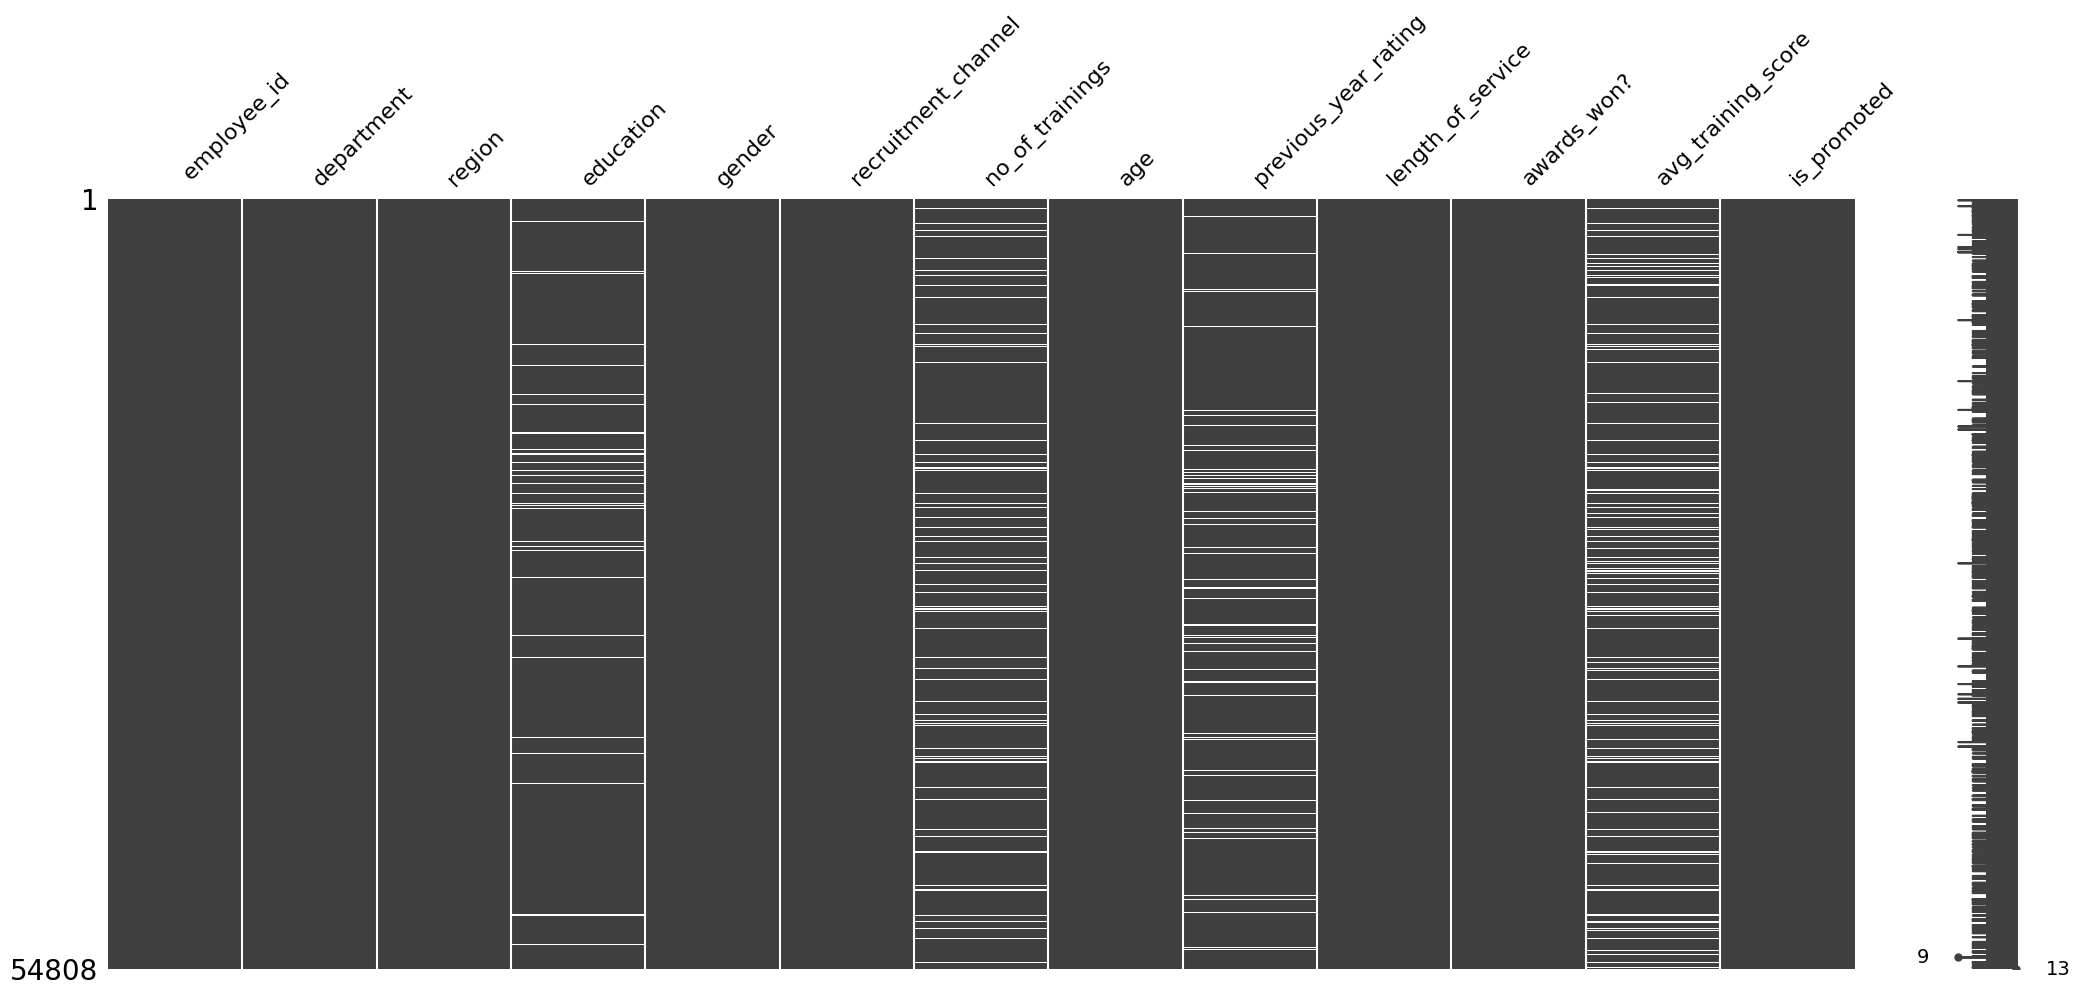

In [ ]:
msno.matrix(df)

Podemos ver que o dataset é consideravelmente grande e apresenta a necessidade de ser limpo, será um dos passos que colocarei na chain.

Basta isso de visualização, podemos ver que é um dataset nem muito fácil nem muito difícil.

###2: Load do dataset

In [ ]:
#loading do dataset de uma forma usável pela chain
loader = CSVLoader(file_path= path_csv,
                   csv_args={"delimiter": "|"})
dataset_principal = loader.load()
print(dataset_principal)

In [ ]:
dataset_principal

[Document(metadata={'source': '/content/drive/MyDrive/Cv/reduzido.csv', 'row': 0}, page_content='employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted: 29934,Technology,region_23,,m,sourcing,1.0,30,,1,0,77.0,0'),
 Document(metadata={'source': '/content/drive/MyDrive/Cv/reduzido.csv', 'row': 1}, page_content="employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted: 49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1.0,35,5.0,3,0,50.0,1"),
 Document(metadata={'source': '/content/drive/MyDrive/Cv/reduzido.csv', 'row': 2}, page_content="employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted: 60051,Sales & Marketing,region_4,Bachelor's,m,sourcing,1.0

In [ ]:
#Fazendo o embedding
embeddings_model = OpenAIEmbeddings()
#Usar embeddings para essa tarefa não é adequado, o objetivo não é fazer busca semântica, que não é a tarefa requirida aqui, já que preciso do dataset todo

In [ ]:
#Será q precisa de algum splitter? Será que existem splitters de csv?
#Tirar as colunas inuteis para gastar menos tokens

In [ ]:
'''embeddings = embeddings_model.embed_documents(dataset_principal)
len(embeddings), len(embeddings[0])
#Agora com os embeddings vamos partir para o primeiro vector store'''

In [ ]:
#Faiss é um vector store disponibilizado pelo facebook
'''store = LocalFileStore("./cache/")
cached_embedder_principal = CacheBackedEmbeddings.from_bytes_store(
    embeddings_model, store, namespace=embeddings_model.model
)
%%time
db_dataset_principal = FAISS.from_texts(dataset_principal, cached_embedder_principal)
list(store.yield_keys())[:5]
'''

###3: iniciando com uns testes e tal

In [ ]:
#Hiperparemetros do modelo
model = 'gpt-4o-mini-2024-07-18'
temperatura = 0.2
max_tokens = None

In [ ]:
modelo = ChatOpenAI(model = model, temperature = temperatura, max_tokens = max_tokens )

In [ ]:
type(modelo)

langchain_openai.chat_models.base.ChatOpenAI

In [ ]:
#primeiro setando o prompt geral do sistema
#Vou fazer em ingles pq normalmente o resultado é melhor, porém pode muito bem ser feito em portugues tbm



acao1 = 'You will be given a dataset and, sometimes, the user will tell some part of the dataset to you generate a code that can analyse it.'     #quando for pra codar
acao2 = 'You will be given a image or the output of a code, that you have to analyse.'     #quando for analisar um grafico
sis_prompt = "You will act like a data science specialist analyzing a dataset given to you. The things you do will be used report presentation for the team, so you need to do good and clear analysis and a well documented code. {action} The prompt has examples of the way you should do it, and you will have memory to do a complete relatory. "
sis_template = SystemMessagePromptTemplate.from_template(sis_prompt)
sis_template, type(sis_template), sis_template.format(action = acao2)

(SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['action'], template='You will act like a data science specialist analyzing a dataset given to you. The things you do will be used report presentation for the team, so you need to do good and clear analysis and a well documented code. {action} The prompt has examples of the way you should do it, and you will have memory to do a complete relatory. ')),
 langchain_core.prompts.chat.SystemMessagePromptTemplate,
 SystemMessage(content='You will act like a data science specialist analyzing a dataset given to you. The things you do will be used report presentation for the team, so you need to do good and clear analysis and a well documented code. You will be given a image or the output of a code, that you have to analyse. The prompt has examples of the way you should do it, and you will have memory to do a complete relatory. '))

In [ ]:
type(dataset_principal)

list

In [ ]:
prompt_dataset = "Here is your dataset: {dataset}"

####ação 1

In [ ]:
valido = False
while (valido == False):
  permitidos = ['Full', 'some features', 'one feature','one line']
  escolha = input("Choose what type of analysis do you want: Full, some features, one feature or one line: ")
  if escolha not in permitidos:
      print("Invalid choice! Please choose one of the following: 'Full', 'some features', 'one feature', or 'one line'.")
  else:
    valido = True

Choose what type of analysis do you want: Full, some features, one feature or one line: one feature


In [ ]:
if escolha == "Full":
  human_prompt = "Analyse my dataset {type_of_analysis}: \n" + prompt_dataset
if escolha == 'some features':
  human_prompt = "Analyse my features: {features} \n {type_of_analysis}: \n" + prompt_dataset
if escolha == 'one feature':
  human_prompt = "Analyse my feature: {feature} \n {type_of_analysis}: \n" + prompt_dataset
if escolha == 'one line':
  human_prompt = "Analyse my dataset: {line} \n {type_of_analysis}: \n" + prompt_dataset

In [ ]:
human_template1 = HumanMessagePromptTemplate.from_template(human_prompt)
type(human_template1)

langchain_core.prompts.chat.HumanMessagePromptTemplate

In [ ]:
prompt_final = ChatPromptTemplate.from_messages(
      [sis_template, human_template1]
  )
prompt_final

ChatPromptTemplate(input_variables=['action', 'dataset', 'feature', 'type_of_analysis'], messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['action'], template='You will act like a data science specialist analyzing a dataset given to you. The things you do will be used report presentation for the team, so you need to do good and clear analysis and a well documented code. {action} The prompt has examples of the way you should do it, and you will have memory to do a complete relatory. ')), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['dataset', 'feature', 'type_of_analysis'], template='Analyse my feature: {feature} \n {type_of_analysis}: \nHere is your dataset: {dataset}'))])

In [ ]:
'''
if acao1:
  prompt_final = ChatPromptTemplate.from_messages(
      [sis_template, human_template1]
  )
else:
  prompt_final = ChatPromptTemplate.from_messages(
      [sis_template, human_template2]
  )
  '''

Chain final

In [ ]:
prompt_final.format(**{
        "action": acao1,
        "dataset": dataset_principal,
        "feature": "education",
        "type_of_analysis": "What can I do to clean this feature, give a graphic to visualize this after the code for cleaning"
    })

'System: You will act like a data science specialist analyzing a dataset given to you. The things you do will be used report presentation for the team, so you need to do good and clear analysis and a well documented code. You will be given a dataset and, sometimes, the user will tell some part of the dataset to generate a code that can analyse it. The prompt has examples of the way you should do it, and you will have memory to do a complete relatory. \nHuman: Analyse my feature: education \n What can I do to clean this feature, give a graphic to visualize this after the code for cleaning: \nHere is your dataset: [Document(metadata={\'source\': \'/content/drive/MyDrive/Cv/reduzido.csv\', \'row\': 0}, page_content=\'employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted: 29934,Technology,region_23,,m,sourcing,1.0,30,,1,0,77.0,0\'), Document(metadata={\'source\': \'/content/dr

In [ ]:
chain = (
    prompt_final
    | modelo
    | StrOutputParser()
)

In [ ]:
%%time
with get_openai_callback() as cb:
    output = chain.invoke({
        "action": acao1,
        "dataset": dataset_principal,
        "feature": "education",
        "type_of_analysis": "What can I do to clean this feature, give a graphic to visualize this after the code for cleaning"
    }
)
    print(cb)

Tokens Used: 51802
	Prompt Tokens: 51092
	Completion Tokens: 710
Successful Requests: 1
Total Cost (USD): $0.0080898


In [ ]:
print(output)

To clean the `education` feature in your dataset, we need to address the following issues:

1. **Missing Values**: There are several rows where the `education` field is empty.
2. **Inconsistent Entries**: Variations in capitalization (e.g., "MALE", "male", "fEMALE") and potential typos or unexpected values (e.g., "eu sou homem hetero homossexual!") need to be standardized or removed.
3. **Categorization**: We can categorize the education levels into broader categories for better analysis.

### Steps for Cleaning the `education` Feature

1. **Identify and Handle Missing Values**: We can either fill them with a placeholder (like "Unknown") or drop those rows.
2. **Standardize Entries**: Convert all entries to a consistent format (e.g., title case).
3. **Categorize Education Levels**: Group similar education levels into broader categories (e.g., "Below Secondary", "Bachelor's", "Master's & above").
4. **Remove Invalid Entries**: Any entries that do not fit into the defined categories shou

Para melhorar o output vou ter que fazer prompts de exemplo

Tokens Used: 51323
	Prompt Tokens: 51125
	Completion Tokens: 198
Successful Requests: 1
Total Cost (USD): $0.007787549999999999


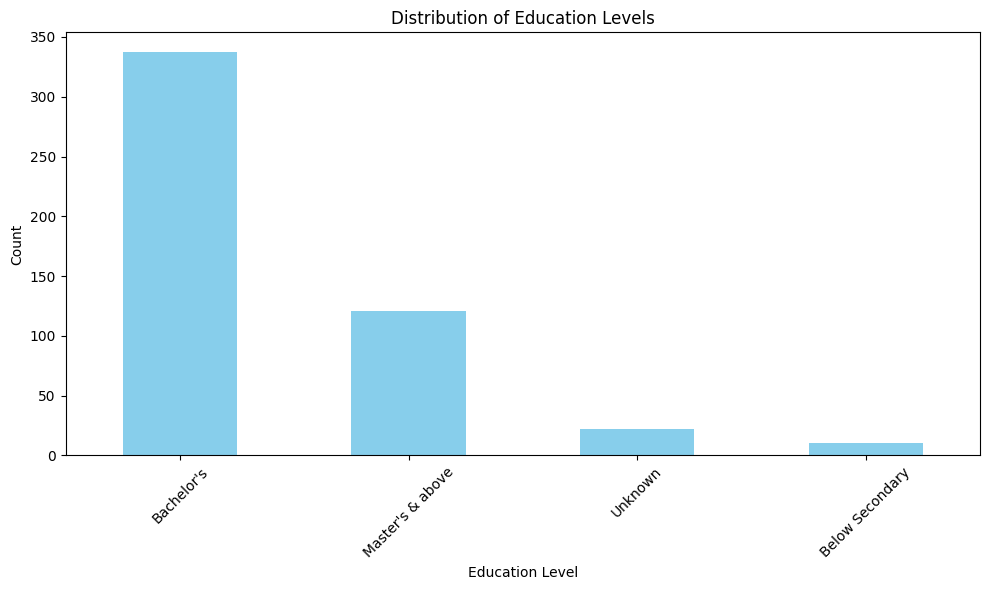

CPU times: user 673 ms, sys: 76.5 ms, total: 750 ms
Wall time: 9.16 s


In [ ]:
%%time
with get_openai_callback() as cb:
    output = chain.invoke({
        "action": acao1,
        "dataset": dataset_principal,
        "feature": "education",
        "type_of_analysis": "In python, what can I do to clean this feature, give a graphic to visualize this after the code for cleaning, give me a executable code, don't write any explanation, don't write ```python in the top. save the image in '/content/seno_plot.png'"
    }
)
    print(cb)
exec(output)

In [ ]:
print(output)

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')

# Clean the 'education' feature
data['education'] = data['education'].str.strip()  # Remove leading/trailing whitespace
data['education'] = data['education'].replace('', pd.NA)  # Replace empty strings with NaN
data['education'] = data['education'].fillna('Unknown')  # Fill NaN with 'Unknown'

# Count the occurrences of each education level
education_counts = data['education'].value_counts()

# Plot the cleaned data
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/seno_plot.png')
plt.show()


In [ ]:
pegar_caminho = 'I will give you a code, in it will have a path to a image, just pick up this path and return me, nothing more, just the path \n code: {codigo}'
template_path = HumanMessagePromptTemplate.from_template(pegar_caminho)
prompt_path = ChatPromptTemplate.from_messages([template_path])
chain_path = (
    prompt_path
    | modelo
    | StrOutputParser()
)
img_output_path = chain_path.invoke({
    'codigo': output
})

In [ ]:
img_output_path

"'/content/seno_plot.png'"

Tentar fazer isso com os parsers, economiza tokens e tempo na execução

####ação 2

In [ ]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')
def load_image(inputs: dict) -> dict:
    """Load image from file and encode it as base64."""
    image_path = inputs["image_path"]
    image_base64 = encode_image(image_path)
    return {"image": image_base64}

In [ ]:
load_image_chain = TransformChain(
    input_variables=["image_path"],
    output_variables=["image"],
    transform=load_image
)

In [ ]:

#Ver, entender e explicar melhor o que é esse pydantic, base Model e Field

class ImageInformation(BaseModel):
 """Info que queremos sobre a imagem"""
 image_description: str = Field(description="a description of the graphic, which is the type, the features in the axes and etc")
 interpretation_conclusion: str = Field(description="Write your interpretation and conclusions about the graphic image")


 #Pensar em mais coisas para "perguntar"

In [ ]:
# tirar ou colocar verbose
globals.set_debug(False)

#Ver o que é isso exatamente:
# @chain
def image_model(inputs: dict) -> str | list[str] | dict:
 """Invoke model with image and prompt."""
 sis_prompt = "You will act like a data science specialist analyzing a dataset given to you. The things you do will be used report presentation for the team, so you need to do good and clear analysis and a well documented code. You will be given a image or the output of a code, that you have to analyse  "
 model = ChatOpenAI(temperature=0.5, model="gpt-4o-mini")
 msg = model.invoke(
             [HumanMessage(
             content=[
             {"type": "text", "text": inputs["prompt"]},
             {"type": "text", "text": parser.get_format_instructions()},
             {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{inputs['image']}"}},
             ])]
             )
 return msg.content

In [ ]:
parser = JsonOutputParser(pydantic_object=ImageInformation)
def get_image_informations(image_path: str):
   vision_user_prompt = """
   Given the image, provide the following information:
   - a description of the graphic, which is the type, the features in the axes and etc
   - Write your interpretation and conclusions about the graphic image
   """
   vision_chain = load_image_chain | image_model | parser
   with get_openai_callback() as cb:
    result = vision_chain.invoke({'image_path': f'{image_path}',
                               'prompt': vision_prompt})
    preço = cb
   return result, cb

In [ ]:
result, cb = get_image_informations("/content/education_vs_avg_training_score.png")
print(result)

{'image_description': "A box plot illustrating the influence of education levels on average training scores. The x-axis represents different education levels (Bachelor's, Master's & above, Below secondary), while the y-axis shows the average training score ranging from 40 to 100. Each box shows the interquartile range, median, and potential outliers.", 'interpretation_conclusion': "The box plot indicates that individuals with a Bachelor's degree tend to have higher average training scores compared to those with a Master's degree and above, and significantly higher than those below secondary education. This suggests a positive correlation between education level and training performance."}


In [ ]:
cb

Tokens Used: 37242
	Prompt Tokens: 37109
	Completion Tokens: 133
Successful Requests: 1
Total Cost (USD): $0.005646149999999999

In [ ]:
result

{'image_description': "A box plot illustrating the influence of education on average training scores. The x-axis represents different education levels: Bachelor's, Master's & above, and Below secondary. The y-axis shows the average training score, ranging from 40 to 100.",
 'interpretation_conclusion': "The box plot indicates that individuals with a Bachelor's degree have a higher average training score compared to those with a Master's and above, and significantly higher than those with below secondary education. This suggests that higher education levels are associated with better training performance."}

In [ ]:
result['image_description']

"A box plot illustrating the influence of education on average training scores. The x-axis represents different education levels: Bachelor's, Master's & above, and Below secondary. The y-axis shows the average training score, ranging from 40 to 100."

####Adcionando loop inicial com "memória":

Tokens Used: 51319
	Prompt Tokens: 51125
	Completion Tokens: 194
Successful Requests: 1
Total Cost (USD): $0.007785149999999999


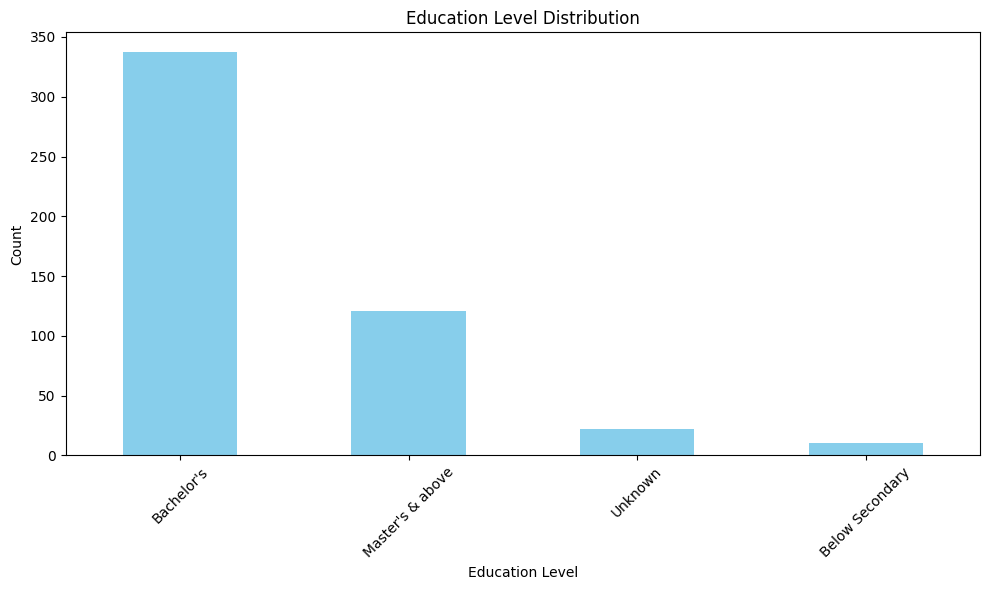

In [ ]:
#chain 1, a de fazer o código
prompt_final = ChatPromptTemplate.from_messages(
      [sis_template, human_template1]
  )
chain1 = (
    prompt_final
    | modelo
    | StrOutputParser()
)
history= ChatMessageHistory()

with get_openai_callback() as cb:
    output = chain1.invoke({
        "action": acao1,
        "dataset": dataset_principal,
        "feature": "education",
        "type_of_analysis": "In python, what can I do to clean this feature, give a graphic to visualize this after the code for cleaning, give me a executable code, don't write any explanation, don't write ```python in the top. save the image in '/content/seno_plot.png'"
    }
)
    print(cb)
history.add_ai_message(output)
exec(output)

In [ ]:
#chain de pegar a imagem
pegar_caminho = 'I will give you a code, in it will have a path to a image, just pick up this path and return me, nothing more, just the path with no "" or '' \n code: {codigo}'
template_path = HumanMessagePromptTemplate.from_template(pegar_caminho)
prompt_path = ChatPromptTemplate.from_messages([template_path])
chain_path = (
    prompt_path
    | modelo
    | StrOutputParser()
)
img_output_path = chain_path.invoke({
    'codigo': history.messages
})

In [ ]:
img_output_path

'/content/seno_plot.png'

In [ ]:
result

{'image_description': "A bar graph titled 'Education Level Distribution' showing counts of different education levels: Bachelor's, Master's & above, Unknown, and Below Secondary. The bars are colored light blue, with the highest count for Bachelor's at around 350, followed by Master's & above with a lower count, and both Unknown and Below Secondary having very low counts.",
 'interpretation_conclusion': "The graph indicates that the majority of individuals in the dataset have a Bachelor's degree, while there are significantly fewer individuals with Master's degrees or lower education levels. The 'Unknown' category also represents a small portion, suggesting that most education levels are accounted for."}

In [ ]:
#função com a chain de analisar a imagem
result, cb = get_image_informations(img_output_path)
result['image_description'], result['interpretation_conclusion']

("A bar chart titled 'Education Level Distribution' displaying counts for different education levels: Bachelor's, Master's & above, Unknown, and Below Secondary. The bars are colored light blue, with the Bachelor's category having the highest count, followed by Master's & above, and very few counts for Unknown and Below Secondary. The x-axis is labeled 'Education Level' and the y-axis is labeled 'Count'.",
 "The chart indicates that the majority of individuals have a Bachelor's degree, with a significant drop in those holding a Master's degree or higher. The categories for Unknown and Below Secondary have minimal representation, suggesting that most respondents have at least a Bachelor's degree.")

In [ ]:
cb #isso da ultima chain

Tokens Used: 25922
	Prompt Tokens: 25775
	Completion Tokens: 147
Successful Requests: 1
Total Cost (USD): $0.003954449999999999

Tokens Used: 51294
	Prompt Tokens: 51124
	Completion Tokens: 170
Successful Requests: 1
Total Cost (USD): $0.007770599999999999


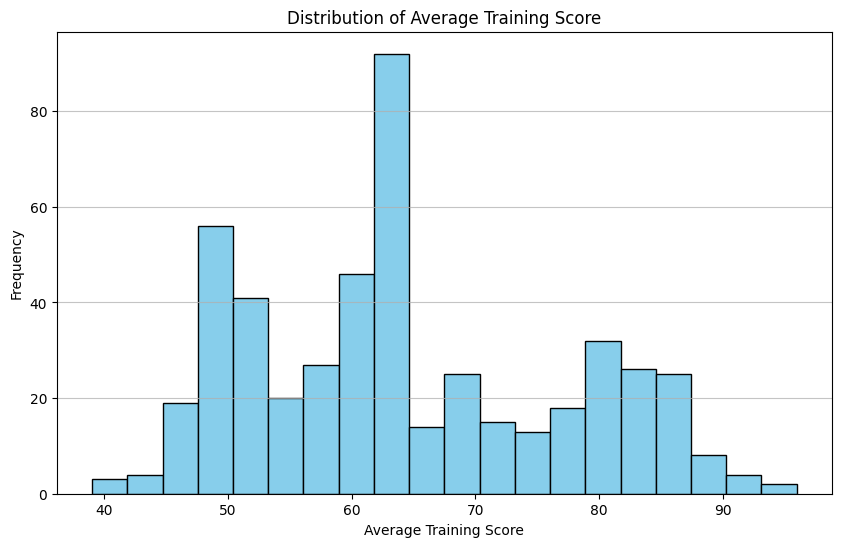

In [ ]:
#chain 1, a de fazer o código
prompt_final = ChatPromptTemplate.from_messages(
      [sis_template, human_template1]
  )
chain1 = (
    prompt_final
    | modelo
    | StrOutputParser()
)
history= ChatMessageHistory()

with get_openai_callback() as cb:
    output = chain1.invoke({
        "action": acao1,
        "dataset": dataset_principal,
        "feature": "avg_training_score",
        "type_of_analysis": "In python, what can I do to clean this feature, give a graphic to visualize this after the code for cleaning, give me a executable code, don't write any explanation, don't write ```python in the top. save the image in /content/..."
    }
)
    print(cb)
history.add_ai_message(output)
exec(output)

In [ ]:
print(output)

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')

# Clean the avg_training_score feature
data['avg_training_score'] = pd.to_numeric(data['avg_training_score'], errors='coerce')
data['avg_training_score'].fillna(data['avg_training_score'].mean(), inplace=True)

# Visualize the cleaned avg_training_score
plt.figure(figsize=(10, 6))
plt.hist(data['avg_training_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Training Score')
plt.xlabel('Average Training Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.savefig('/content/avg_training_score_distribution.png')
plt.show()


In [ ]:
#chain de pegar a imagem
pegar_caminho = 'I will give you a code, in it will have a path to a image, just pick up this path and return me, nothing more, just the path with no "" or '' \n code: {codigo}'
template_path = HumanMessagePromptTemplate.from_template(pegar_caminho)
prompt_path = ChatPromptTemplate.from_messages([template_path])
chain_path = (
    prompt_path
    | modelo
    | StrOutputParser()
)
img_output_path = chain_path.invoke({
    'codigo': history.messages
})

In [ ]:
img_output_path

'/content/avg_training_score_distribution.png'

In [ ]:
#função com a chain de analisar a imagem
result, cb = get_image_informations(img_output_path)
result['image_description'], result['interpretation_conclusion']

('A histogram displaying the distribution of average training scores. The x-axis represents the average training score ranging from 40 to 90, while the y-axis indicates the frequency of scores. The bars are colored light blue with black outlines, showing a peak around the score of 60.',
 'The histogram indicates that the majority of average training scores cluster around the 60 mark, suggesting a common performance level among the subjects. There are fewer scores at the extremes, indicating less variability in lower and higher scores.')

In [ ]:
cb #isso da ultima chain

Tokens Used: 25894
	Prompt Tokens: 25775
	Completion Tokens: 119
Successful Requests: 1
Total Cost (USD): $0.003937649999999999

#### Prompt para conclusão

In [ ]:
#Construindo prompt de conclusão da análise
sis_prompt_conc = '''You are an expert data science analyst. I will provide you with a series of detailed analyses and descriptions of various graphics from a dataset, all generated by a partner who has thoroughly examined these visuals. Your task is to synthesize these analyses into a comprehensive, well-structured report, some instructions about the report will be passed by the user.

Ensure that the report:

1. **Integrates Information**: Seamlessly combines all provided analyses, identifying common themes, trends, and significant insights across the different graphics.
2. **Provides Context**: Adds context where necessary, explaining the importance of the findings and how they relate to the overall dataset.
3. **Uses Clear Language**: Writes in clear, concise language suitable for both technical and non-technical audiences.
4. **Structures the Report Logically**: Organizes the report with a clear introduction, body (with sections for each key finding or group of findings), and a conclusion that summarizes the main insights and suggests potential next steps.
5. **Ensures Accuracy**: Maintains the accuracy and integrity of the original analyses while ensuring the report is error-free.
6. **Highlights Key Insights**: Emphasizes the most significant findings from the analyses, making sure they stand out in the report.
7. **Considers Visuals**: Suggests or incorporates any necessary visuals (such as tables, charts, or bullet points) that can enhance the understanding of the report.

Your final output should be a polished, professional report that effectively communicates the insights derived from the dataset.'''  #Ver se tiro ou coloco coisas aqui, posso deixar os números como input variables

sis_template_conc = SystemMessagePromptTemplate.from_template(sis_prompt_conc)

#fazendo cada prompt para cada tipo de foco

human_prompt_conc = '''Hello partner, the boss ask you for {instruções}, and he said that the report need to have {tamanho}

here is my analysis, use them:
{histórico}
'''
human_template_conc = HumanMessagePromptTemplate.from_template(human_prompt_conc)
prompt_final = ChatPromptTemplate.from_messages(
  [sis_template_conc, human_template_conc]
)
chain_conc = (
prompt_final
| modelo
| StrOutputParser()
)
with get_openai_callback() as cb:
  conc = chain_conc.invoke({
      "instruções": "Do the report as you usually do",
      "tamanho": "something like 2 pages",
      "histórico": historia_analise, #peguei essa história num uso lá embaixo
  }
)
print(conc)

# Comprehensive Report on Gender Disparities in Ratings and Training Scores

## Introduction

This report synthesizes analyses derived from two box plots that examine the distribution of Previous Year Ratings and Average Training Scores, categorized by gender. The findings reveal significant insights into gender disparities in both ratings and training performance, highlighting potential areas for further investigation and action. 

## Key Findings

### 1. Previous Year Ratings by Gender

The first graphic analyzed is a box plot that illustrates the distribution of Previous Year Ratings categorized by gender. The key observations from this analysis are as follows:

- **Gender Categories**: The x-axis represents three gender categories: 'f' for female, 'm' for male, and an additional 'male' category, which may indicate a specific subgroup.
- **Median Ratings**: The median rating for females ('f') is the highest among the groups, suggesting that female respondents generally provided high

In [ ]:
cb

Tokens Used: 1534
	Prompt Tokens: 755
	Completion Tokens: 779
Successful Requests: 1
Total Cost (USD): $0.0005806499999999999

In [ ]:
from IPython.display import display, Markdown

display(Markdown(conc))

# Comprehensive Report on Gender Disparities in Ratings and Training Scores

## Introduction

This report synthesizes analyses derived from two box plots that examine the distribution of Previous Year Ratings and Average Training Scores, categorized by gender. The findings reveal significant insights into gender disparities in both ratings and training performance, highlighting potential areas for further investigation and action. 

## Key Findings

### 1. Previous Year Ratings by Gender

The first graphic analyzed is a box plot that illustrates the distribution of Previous Year Ratings categorized by gender. The key observations from this analysis are as follows:

- **Gender Categories**: The x-axis represents three gender categories: 'f' for female, 'm' for male, and an additional 'male' category, which may indicate a specific subgroup.
- **Median Ratings**: The median rating for females ('f') is the highest among the groups, suggesting that female respondents generally provided higher ratings compared to their male counterparts.
- **Variability**: The box plot indicates that the 'f' category exhibits less variability in ratings, as evidenced by a narrower interquartile range (IQR). In contrast, the 'm' category shows a wider range of ratings, with a lower median, indicating more inconsistency in male ratings.
- **Outliers**: Potential outliers are marked as individual points, which may warrant further investigation to understand the reasons behind these extreme values.

This visualization suggests a notable gender disparity in ratings, where females tend to rate higher and more consistently than males. Understanding the underlying factors contributing to this disparity could provide valuable insights for future initiatives aimed at improving engagement and satisfaction across genders.

### 2. Average Training Scores by Gender

The second graphic is another box plot that represents the average training scores categorized by gender. The findings from this analysis include:

- **Gender Categories**: The x-axis is labeled 'Gender' with two categories: Male and Female.
- **Median Scores**: Males have a higher median average training score compared to females, indicating that male participants generally performed better in training assessments.
- **Variability**: The interquartile range for males is larger, suggesting greater variability in their training scores. This contrasts with females, who show a narrower range of scores, indicating more consistency in their training performance.
- **Outliers**: Similar to the previous analysis, outliers are represented as individual points beyond the whiskers, which may indicate exceptional cases that require further exploration.

The disparity in training performance between genders raises important questions about the factors influencing these outcomes. It may be beneficial to investigate the training methods, engagement levels, and support systems in place for both genders to identify potential areas for improvement.

## Conclusion

The analyses of the box plots reveal significant gender disparities in both Previous Year Ratings and Average Training Scores. Females tend to provide higher and more consistent ratings, while males exhibit higher average training scores with greater variability. These findings suggest that there may be underlying factors contributing to these differences, warranting further investigation.

### Recommendations for Next Steps

1. **Further Research**: Conduct qualitative research to explore the reasons behind the observed gender disparities in ratings and training scores.
2. **Training Programs**: Review and potentially revise training programs to ensure they are equitable and effectively support both genders.
3. **Engagement Strategies**: Develop targeted engagement strategies to enhance participation and satisfaction among male respondents, aiming to reduce variability in their ratings.

By addressing these areas, organizations can work towards fostering a more inclusive and equitable environment that supports the success of all individuals, regardless of gender. 

### Visuals

To enhance understanding, it is recommended to include the box plots as visuals in the report, clearly labeled with legends and annotations to highlight the key findings discussed. This will provide a visual representation of the data, making it easier for both technical and non-technical audiences to grasp the insights derived from the analyses.

###Testes:

####Teste do fewshot template ser passado antes, com pergunta do tipo vindo primeiro

In [ ]:
#Criar fewshot, com um exemplo do que é pra ser feito

In [ ]:
prompt_exemplo = ChatPromptTemplate.from_messages(
    [
        ("human", "{input}"),
        ("ai", "{output}"),
    ]
)

In [ ]:
exemplos = [
    {
        "input": "Analyse my feature: education \n What can I do to clean this feature, give a graphic to visualize this after the code for cleaning", "output": "import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Load the dataset\ndata = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')\n\n# Clean the 'education' feature\ndata['education'] = data['education'].str.strip()  # Remove leading/trailing whitespace\ndata['education'] = data['education'].replace('', pd.NA)  # Replace empty strings with NaN\ndata['education'] = data['education'].fillna('Unknown')  # Fill NaN with 'Unknown'\n\n# Count the occurrences of each education level\neducation_counts = data['education'].value_counts()\n\n# Plot the cleaned data\nplt.figure(figsize=(10, 6))\neducation_counts.plot(kind='bar', color='skyblue')\nplt.title('Distribution of Education Levels')\nplt.xlabel('Education Level')\nplt.ylabel('Count')\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.savefig('/content/seno_plot.png')\nplt.show()"
    },
    {
        "input": "Analyse the correlation between the features: age and income \n Provide a visualization to show the correlation.", "output": "import pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Load the dataset\ndata = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')\n\n# Calculate the correlation\ncorrelation = data['age'].corr(data['income'])\n\n# Create a scatter plot to visualize the correlation\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x='age', y='income', data=data)\nplt.title(f'Correlation between Age and Income: {correlation:.2f}')\nplt.xlabel('Age')\nplt.ylabel('Income')\nplt.tight_layout()\nplt.savefig('/content/age_income_correlation.png')\nplt.show()"
    },
    {
        "input": "Visualize the feature: income over time \n Show a line graph of the average income per year.", "output": "import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Load the dataset\ndata = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')\n\n# Convert the date column to datetime format and extract the year\ndata['date'] = pd.to_datetime(data['date'])\ndata['year'] = data['date'].dt.year\n\n# Calculate the average income per year\navg_income_per_year = data.groupby('year')['income'].mean()\n\n# Plot the average income over time\nplt.figure(figsize=(10, 6))\navg_income_per_year.plot(kind='line', color='blue')\nplt.title('Average Income Over Time')\nplt.xlabel('Year')\nplt.ylabel('Average Income')\nplt.tight_layout()\nplt.savefig('/content/avg_income_over_time.png')\nplt.show()"
    },
    {
        "input": "Analyze the influence of the feature: education on the target: salary \n Provide a visualization to show the impact.", "output": "import pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Load the dataset\ndata = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')\n\n# Create a boxplot to visualize the influence of education on salary\nplt.figure(figsize=(12, 6))\nsns.boxplot(x='education', y='salary', data=data, palette='Set3')\nplt.title('Influence of Education on Salary')\nplt.xlabel('Education Level')\nplt.ylabel('Salary')\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.savefig('/content/education_vs_salary.png')\nplt.show()"
    },
    {
        "input": "Visualize the distribution of the feature: hours_per_week \n Create a histogram to show the frequency of different working hours.", "output": "import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Load the dataset\ndata = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')\n\n# Plot the histogram of hours per week\nplt.figure(figsize=(10, 6))\nplt.hist(data['hours_per_week'], bins=20, color='green', edgecolor='black')\nplt.title('Distribution of Hours Per Week')\nplt.xlabel('Hours Per Week')\nplt.ylabel('Frequency')\nplt.tight_layout()\nplt.savefig('/content/hours_per_week_histogram.png')\nplt.show()"
    },
    {
        "input": "Visualize the distribution of the feature: job \n Create a bar chart to show the count of each job category.", "output": "import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Load the dataset\ndata = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')\n\n# Count the occurrences of each job category\njob_counts = data['job'].value_counts()\n\n# Plot the bar chart of job categories\nplt.figure(figsize=(12, 6))\njob_counts.plot(kind='bar', color='purple')\nplt.title('Distribution of Job Categories')\nplt.xlabel('Job Category')\nplt.ylabel('Count')\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.savefig('/content/job_distribution_bar_chart.png')\nplt.show()"
    }
]
#Ver se vou precisar de mais exemplos


In [ ]:
for exemplo in exemplos:
    if not isinstance(exemplo['input'], str):
        print(f"Input não é uma string: {exemplo['input']}")
    if not isinstance(exemplo['output'], str):
        print(f"Output não é uma string: {exemplo['output']}")

In [ ]:
example_selector = SemanticSimilarityExampleSelector.from_examples(
    exemplos,
    OpenAIEmbeddings(), #os embeddings
    Chroma,#O vectorstore, será detalhado mais a frente
    k=2, #n de exemplos a escolher
)

In [ ]:
fewshot_prompt = FewShotChatMessagePromptTemplate(
    example_selector=example_selector,
    example_prompt=ChatPromptTemplate(
        input_variables=['input', 'output'],
        messages=[
            HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template='{input}')),
            AIMessagePromptTemplate(prompt=PromptTemplate(input_variables=['output'], template="{output}"))
        ]
    )
)
fewshot_prompt

FewShotChatMessagePromptTemplate(example_selector=SemanticSimilarityExampleSelector(vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x795fbe1f2e00>, k=2, example_keys=None, input_keys=None, vectorstore_kwargs=None), example_prompt=ChatPromptTemplate(input_variables=['input', 'output'], messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template='{input}')), AIMessagePromptTemplate(prompt=PromptTemplate(input_variables=['output'], template='{output}'))]))

In [ ]:
try:
    fewshot_prompt = FewShotChatMessagePromptTemplate(
        example_selector=example_selector,
        example_prompt=ChatPromptTemplate(
            input_variables=['input', 'output'],
            messages=[
                HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template='{input}')),
                AIMessagePromptTemplate(prompt=PromptTemplate(input_variables=['output'], template="{output}"))
            ]
        )
    )
    print("FewShotChatMessagePromptTemplate criado com sucesso.")
except Exception as e:
    print("Erro ao criar FewShotChatMessagePromptTemplate:", e)

FewShotChatMessagePromptTemplate criado com sucesso.


In [ ]:
print(fewshot_prompt.format(input="What is the correlation between the score and the promotion?"))

Human: Analyze the influence of the feature: education on the target: salary 
 Provide a visualization to show the impact.
AI: import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')

# Create a boxplot to visualize the influence of education on salary
plt.figure(figsize=(12, 6))
sns.boxplot(x='education', y='salary', data=data, palette='Set3')
plt.title('Influence of Education on Salary')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/education_vs_salary.png')
plt.show()
Human: Analyze the influence of the feature: education on the target: salary 
 Provide a visualization to show the impact.
AI: import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')

# Create a boxplot to visualize the influence of education on salary
plt

In [ ]:
exemplos = "\n here are some examples of the way the input and output have to be like, do not write nothing under or upper the code, neither '''python in the output.: \n"

In [ ]:
tipo_prompt = input(str("Tell the type of analysis that you want llm to do: "))

Tell the type of analysis that you want llm to do: What is the correlation between the features avg training score and education in the dataset?


In [ ]:
tipo_prompt

'What is the correlation between the features avg training score and education in the dataset?'

In [ ]:
exemplos_prompt = fewshot_prompt.format(input= tipo_prompt)
def escapar_chaves(text):
    return text.replace("{", "{{").replace("}", "}}")
exemplos_prompt = escapar_chaves(exemplos_prompt)

In [ ]:
print(exemplos_prompt)

Human: Analyze the influence of the feature: education on the target: salary 
 Provide a visualization to show the impact.
AI: import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')

# Create a boxplot to visualize the influence of education on salary
plt.figure(figsize=(12, 6))
sns.boxplot(x='education', y='salary', data=data, palette='Set3')
plt.title('Influence of Education on Salary')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/education_vs_salary.png')
plt.show()
Human: Analyze the influence of the feature: education on the target: salary 
 Provide a visualization to show the impact.
AI: import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')

# Create a boxplot to visualize the influence of education on salary
plt

In [ ]:
prompt_final = ChatPromptTemplate.from_messages(
      [sis_template, human_template1, exemplos, exemplos_prompt]
  )

In [ ]:
prompt_final

ChatPromptTemplate(input_variables=['action', 'dataset', 'feature', 'type_of_analysis'], messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['action'], template='You will act like a data science specialist analyzing a dataset given to you. The things you do will be used report presentation for the team, so you need to do good and clear analysis and a well documented code. {action} The prompt has examples of the way you should do it, and you will have memory to do a complete relatory. ')), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['dataset', 'feature', 'type_of_analysis'], template='Analyse my feature: {feature} \n {type_of_analysis}: \nHere is your dataset: {dataset}')), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template="\n here are some examples of the way the input and output have to be like, do not write nothing under or upper the code, neither '''python in the output.: \n")), HumanMessagePromptTemplate(pro

In [ ]:
chain = (
    prompt_final
    | modelo
    | StrOutputParser()
)

In [ ]:
%%time
with get_openai_callback() as cb:
    output = chain.invoke({
        "action": acao1,
        "dataset": dataset_principal,
        "feature": "education",
        "type_of_analysis": tipo_prompt
    }
)
    print(cb)

Tokens Used: 51576
	Prompt Tokens: 51438
	Completion Tokens: 138
Successful Requests: 1
Total Cost (USD): $0.0077985
CPU times: user 103 ms, sys: 5.29 ms, total: 109 ms
Wall time: 7.05 s


In [ ]:
print(output)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')

# Create a boxplot to visualize the influence of education on avg training score
plt.figure(figsize=(12, 6))
sns.boxplot(x='education', y='avg_training_score', data=data, palette='Set3')
plt.title('Influence of Education on Average Training Score')
plt.xlabel('Education Level')
plt.ylabel('Average Training Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/education_vs_avg_training_score.png')
plt.show()


<string>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



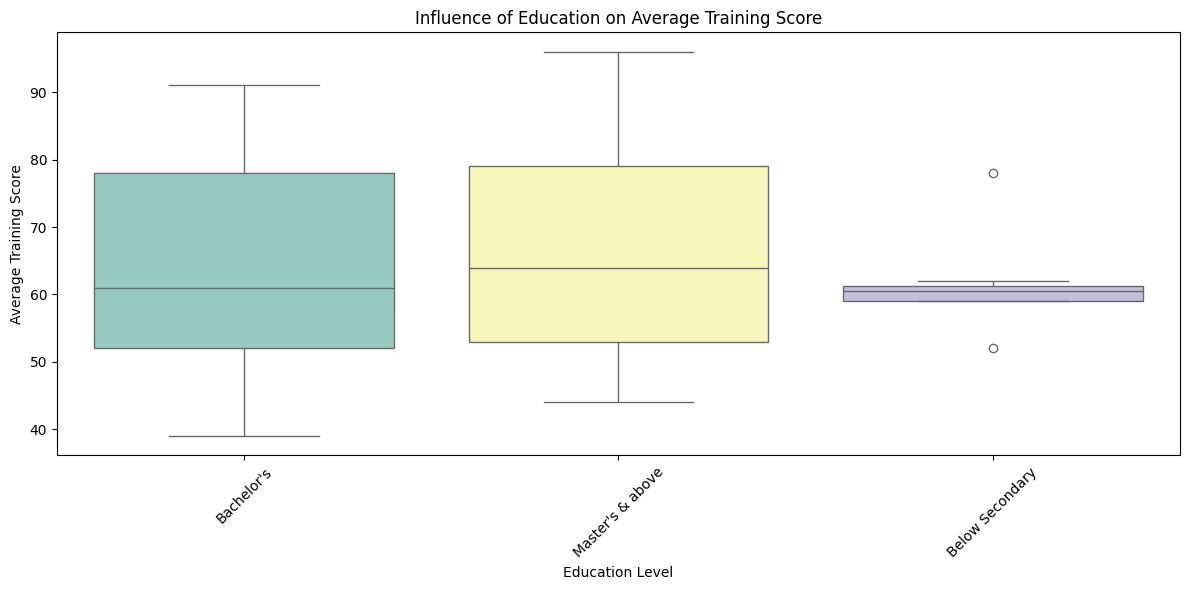

In [ ]:
exec(output)

Meio que funcionou kkkkkk, mas foi um puta trampo pra não funcionar bem e posso só alterar o prompt inicial lá, coisa que basicamente tive que fazer também, não aplicar

#### Agente:

Criar o agente de pesquisa no github e no google normal


In [ ]:
!pip install langchain_experimental

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 9.7 MB/s eta 0:00:00


In [ ]:
def clean_data(query):
    global df
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    return "Data cleaned successfully."

def analyze_data(query):
    global df
    if "summary statistics" in query.lower():
        summary = df.describe().to_string()
        return f"Summary Statistics:\n{summary}"
    elif "correlation matrix" in query.lower():
        corr_matrix = df.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
        plt.title("Correlation Matrix")
        plt.savefig('correlation_matrix.png')
        return "Correlation matrix generated and saved as 'correlation_matrix.png'."
    elif "t-test" in query.lower():
        words = query.split()
        try:
            idx = words.index('between')
            col1 = words[idx + 1]
            col2 = words[idx + 3]
            t_stat, p_value = stats.ttest_ind(df[col1], df[col2])
            return f"T-test between {col1} and {col2}:\nT-statistic = {t_stat}, P-value = {p_value}"
        except (ValueError, IndexError):
            return "Please specify two columns for the t-test, e.g., 't-test between column1 and column2'."
    else:
        return "I'm sorry, I didn't understand your request. Please try again."

def visualize_data(query):
    global df
    if "distribution of" in query.lower():
        words = query.split()
        try:
            idx = words.index('of')
            col = words[idx + 1]
            plt.figure(figsize=(6, 4))
            sns.histplot(df[col], kde=True)
            plt.title(f"Distribution of {col}")
            plt.savefig(f'{col}_distribution.png')
            return f"Distribution plot saved as '{col}_distribution.png'."
        except (ValueError, IndexError):
            return "Please specify the column to visualize, e.g., 'Show distribution of column_name'."
    else:
        return "Visualization type not recognized. Please try again."

def graphic(query):
    global df

    prompt_dataset = "Here is your dataset: {dataset}"
    sis_prompt = (
        "You will act like a data science specialist analyzing a dataset given to you. "
        "The things you do will be used for a report presentation for the team, so you need to do insightful, visual, aesthetic, creative and well-documented code. "
        "You will be given a dataset and, sometimes, the user will tell you which part of the dataset to analyze or generate a code that can improve the dataset or analyze it with a graphic. "
        "Before writing the code of the plot, ensure that nothing in the dataset will generate an error and correct it if necessary. "
        "Give me executable code, don't write any explanation, don't write ```python at the top and never end with plt.close(). "
        "In code to call the dataframe use the {path_data}. Save the image of the graphic in '/content/xxx.png' where xxx has to be the name of the graphic."
    )
    sis_template = SystemMessagePromptTemplate.from_template(sis_prompt)

    human_prompt = "Analyze my dataset {type_of_analysis}: \n" + prompt_dataset
    human_template = HumanMessagePromptTemplate.from_template(human_prompt)

    prompt_final = ChatPromptTemplate.from_messages(
        [sis_template, human_template]
    )
    chain = LLMChain(
        prompt=prompt_final,
        llm=modelo,
        output_parser=StrOutputParser(),
    )

    with get_openai_callback() as cb:
        output = chain.run({
            "path_data": path_geral,
            "dataset": df.head().to_string(),
            "type_of_analysis": query
        })

    return output

tools = [
    Tool(
        name="Clean Data",
        func=clean_data,
        description="Use this tool to clean the dataset. Example usage: 'Clean the data.'"
    ),
    Tool(
        name="Analyze Data",
        func=analyze_data,
        description="Use this tool to perform statistical analysis on the dataset. Example usage: 'Provide summary statistics.'"
    ),
    Tool(
        name="Visualize Data",
        func=visualize_data,
        description="Use this tool to create visualizations from the dataset. Example usage: 'Show distribution of age.'"
    ),
    Tool(
        name="generate code",
        func=graphic,
        description="Use this tool to create code to visualize graphics of the data. Example usage: 'Show me a code for visualize th data.'"
    )
]

llm = OpenAI(temperature=0)
memory = ConversationBufferMemory(memory_key="chat_history")

agent = initialize_agent(
    tools,
    llm,
    agent="conversational-react-description",
    verbose=True,
    memory=memory
)

print("Welcome to the Data Analysis Agent!")

while True:
    user_input = input("You: ")
    if user_input.lower() in ["exit", "quit"]:
        print("Agent: Goodbye!")
        break
    response = agent.invoke({user_input})
    print("Agent:", response)

Welcome to the Data Analysis Agent!
You: Hi, can tou clean my dataset?


> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? Yes
Action: Clean Data
Action Input: the dataset
Observation: Data cleaned successfully.
Thought: Do I need to use a tool? No
AI: Sure, I can clean your dataset for you. Just provide me with the dataset and I'll take care of it.

> Finished chain.
Agent: {'input': {'Hi, can tou clean my dataset?'}, 'chat_history': '', 'output': "Sure, I can clean your dataset for you. Just provide me with the dataset and I'll take care of it."}
You: can you generate a code to visualize my dataset that I give to you?


> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? Yes
Action: generate code
Action Input: the dataset
Observation: import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Cv/datasetEmpresa.csv')

# Check for missing values and data types
df.info()

<Axes: >

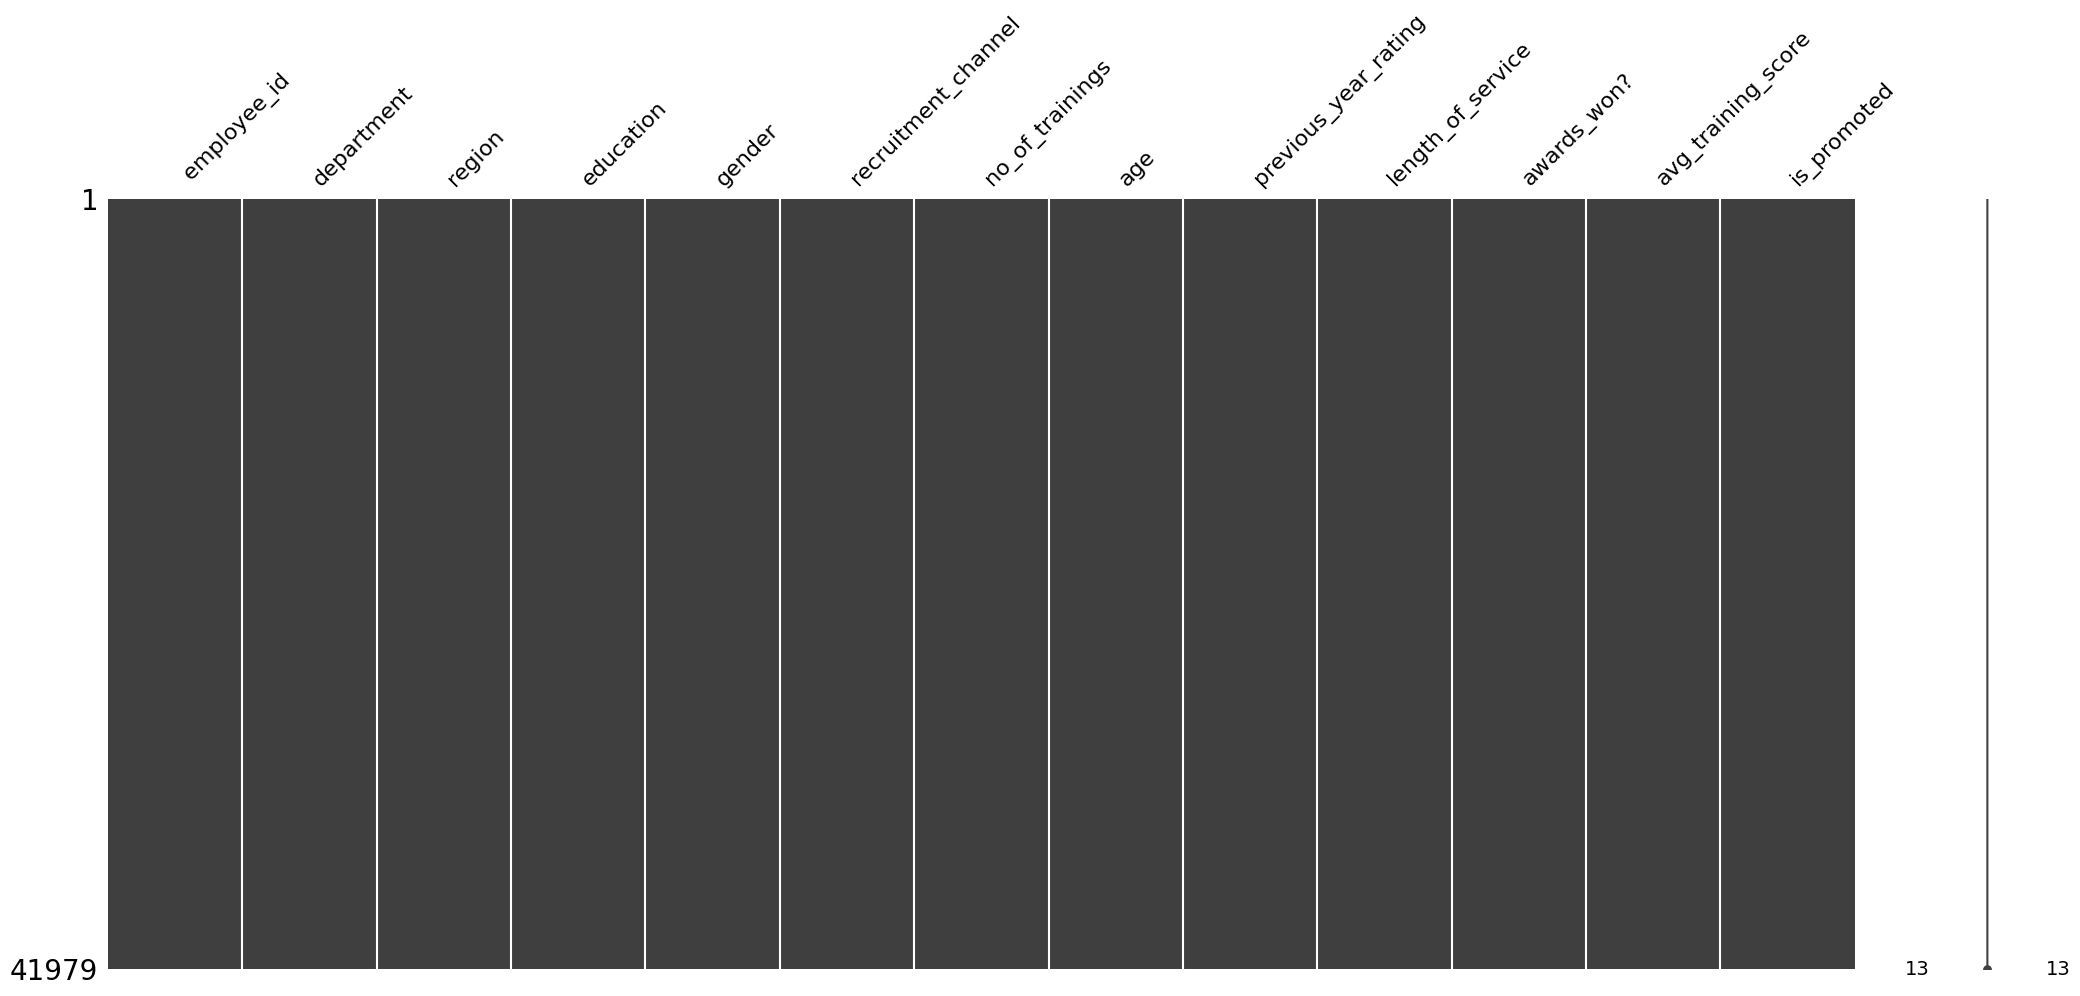

In [ ]:
msno.matrix(df)

###4: Código arrumado  

Melhorando o código após os testes, abarcando todas os tipos de "ação" e encapsulando tudo em funções.

#### gerando os gráficos

In [ ]:
#Hiperparemetros do modelo
model = 'gpt-4o-mini'
temperatura = 0.2
max_tokens = None

In [ ]:
modelo = ChatOpenAI(model = model, temperature = temperatura, max_tokens = max_tokens )

In [ ]:
def gera_grafico(modelo, foco: str, tipo_analise: str, dataset_usado, path_df, objeto_de_analise = None):  #objeto_de_analise é opcional e é um parâmetro que pede oq do dataset pode ser analisado

  permitidos = ['Full', 'some features', 'one feature','one line']
  if foco not in permitidos:
    raise ValueError("O foco não pode ser feito, escolha um entre: Full, some features, one feature, one line")

  history= ChatMessageHistory()
  prompt_dataset = "Here is your dataset: {dataset}"
  #Premeiro setando o prompt do sistema
  sis_prompt = "You will act like a data science specialist analyzing a dataset given to you. The things you do will be used report presentation for the team, so you need to do insightful, visual, aesthetic, creative and a well documented code. You will be given a dataset and, sometimes, the user will tell some part of the dataset to you generate a code that can improve the dataset or analyse it with a graphic. Before write the code of the plot, assure that nothing in the dataset will generate a error and correct if necessary. Give me a executable code, don't write any explanation, don't write ```python in the top and never end with plt.close(). In code to call the dataframe use the {path_data}. save the image of the graphic in '/content/xxx.png' xxx have to be the name of the graphic. "
  sis_template = SystemMessagePromptTemplate.from_template(sis_prompt)

  #fazendo cada prompt para cada tipo de foco
  if foco == "Full":
    human_prompt = "Analyse my dataset {type_of_analysis}: \n" + prompt_dataset
    human_template = HumanMessagePromptTemplate.from_template(human_prompt)
    prompt_final = ChatPromptTemplate.from_messages(
      [sis_template, human_template]
    )
    chain = (
    prompt_final
    | modelo
    | StrOutputParser()
    )
    with get_openai_callback() as cb:
      output = chain.invoke({
          "path_data": path_df,
          "dataset": dataset_usado,
          "type_of_analysis": tipo_analise
      }
  )

  elif foco == 'some features':
    human_prompt = "Analyse my features: {features} \n {type_of_analysis}: \n" + prompt_dataset
    human_template = HumanMessagePromptTemplate.from_template(human_prompt)
    prompt_final = ChatPromptTemplate.from_messages(
      [sis_template, human_template]
    )
    chain = (
    prompt_final
    | modelo
    | StrOutputParser()
    )
    with get_openai_callback() as cb:
      output = chain.invoke({
          "path_data": path_df,
          "dataset": dataset_usado,
          "features": objeto_de_analise,
          "type_of_analysis": tipo_analise
      }
  )


  elif foco == 'one feature':
    human_prompt = "Analyse my feature: {feature} \n {type_of_analysis}: \n" + prompt_dataset
    human_template = HumanMessagePromptTemplate.from_template(human_prompt)
    prompt_final = ChatPromptTemplate.from_messages(
      [sis_template, human_template]
    )
    chain = (
    prompt_final
    | modelo
    | StrOutputParser()
    )
    with get_openai_callback() as cb:
      output = chain.invoke({
          "path_data": path_df,
          "dataset": dataset_usado,
          "feature": objeto_de_analise,
          "type_of_analysis": tipo_analise
      }
  )

  else:
    human_prompt = "Analyse my dataset: {line} \n {type_of_analysis}: \n" + prompt_dataset
    human_template = HumanMessagePromptTemplate.from_template(human_prompt)
    prompt_final = ChatPromptTemplate.from_messages(
      [sis_template, human_template1]
    )
    chain = (
    prompt_final
    | modelo
    | StrOutputParser()
    )
    with get_openai_callback() as cb:
      output = chain.invoke({
          "path_data": path_df,
          "dataset": dataset_usado,
          "line": objeto_de_analise,
          "type_of_analysis": tipo_analise
      }
  )
  history.add_ai_message(output)
  #Retorna o output gerado pela llm e o custo disso (tenho que alterar pra só pedir cb se usar openai)
  return output, cb, history

In [ ]:
tipo_analise = 'Please I want a comprehensive overview of a given dataset.'
output, cb, history = gera_grafico(modelo = modelo, foco ="Full" , tipo_analise = tipo_analise , dataset_usado = dataset_principal)

In [ ]:
print(output)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')

# Data cleaning
data['education'].fillna('Unknown', inplace=True)
data['gender'].replace({'m': 'male', 'f': 'female', 'MALE': 'male', 'fEMALE': 'female'}, inplace=True)
data['avg_training_score'].fillna(data['avg_training_score'].mean(), inplace=True)
data['previous_year_rating'].fillna(data['previous_year_rating'].mean(), inplace=True)
data['length_of_service'].fillna(data['length_of_service'].mean(), inplace=True)

# Overview of the dataset
overview = data.describe(include='all')

# Plotting the distribution of average training scores by department
plt.figure(figsize=(12, 6))
sns.boxplot(x='department', y='avg_training_score', data=data)
plt.xticks(rotation=45)
plt.title('Distribution of Average Training Scores by Department')
plt.xlabel('Department')
plt.ylabel('Average Training Score')
plt.tight_layout()
plt.savefig('/content/av

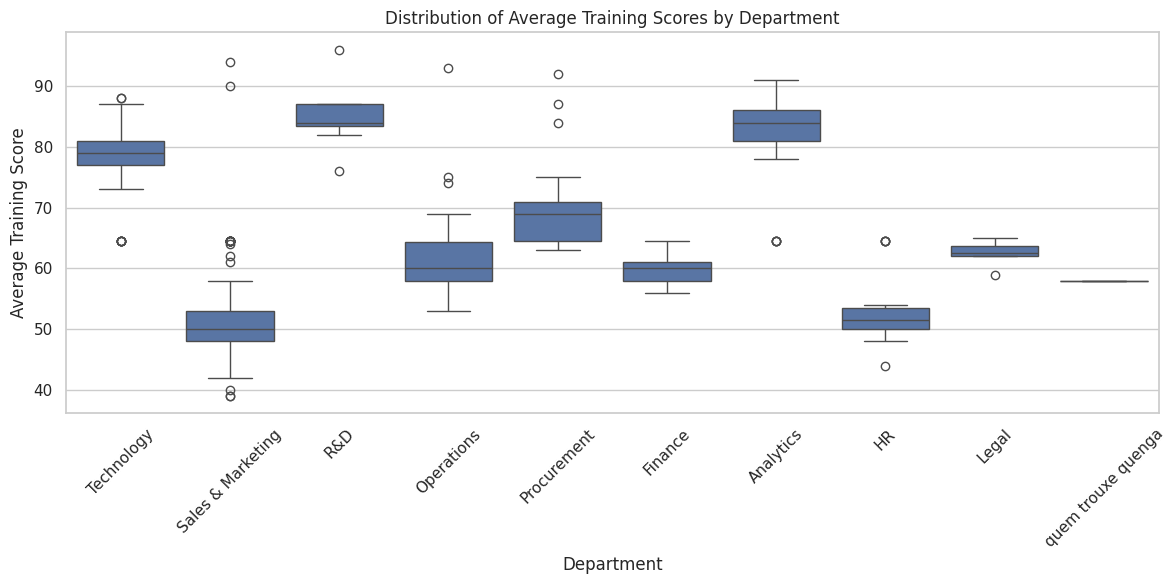

In [ ]:
exec(output)

In [ ]:
tipo_analise = 'Please I want a general overview of this feature in the given dataset.'
output, cb, history = gera_grafico(modelo = modelo, foco ="one feature" , tipo_analise = tipo_analise , dataset_usado = dataset_principal, objeto_de_analise = "is_prometed")

In [ ]:
print(output)

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')

# Check for missing values in 'is_promoted' column
data['is_promoted'] = data['is_promoted'].fillna(0).astype(int)

# Count the occurrences of each class in 'is_promoted'
promotion_counts = data['is_promoted'].value_counts()

# Plotting the distribution of the 'is_promoted' feature
plt.figure(figsize=(8, 5))
promotion_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Promotions', fontsize=16)
plt.xlabel('Is Promoted', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Not Promoted', 'Promoted'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('/content/promotion_distribution.png')


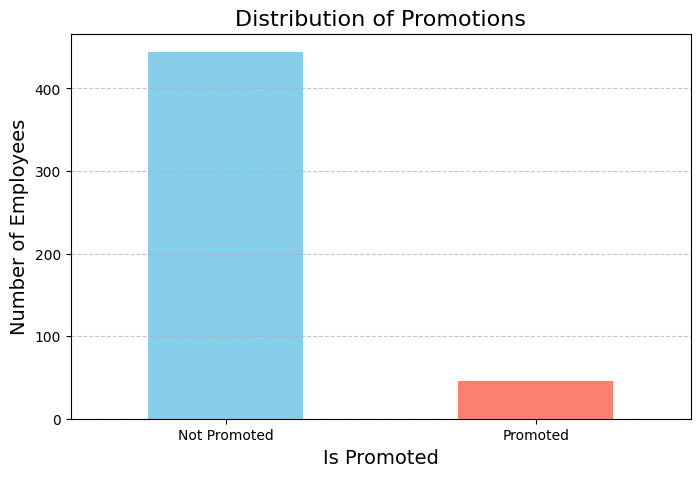

In [ ]:
exec(output)

####Pegando o path:

In [ ]:
def pegar_path(modelo, history):
  pegar_caminho = 'I will give you a code, in it will have a path to a image, just pick up this path and return me, nothing more, just the path with no "" or '' \n code: {codigo}'
  template_path = HumanMessagePromptTemplate.from_template(pegar_caminho)
  prompt_path = ChatPromptTemplate.from_messages([template_path])
  chain_path = (
      prompt_path
      | modelo
      | StrOutputParser()
  )
  img_output_path = chain_path.invoke({
      'codigo': history.messages
  })
  img_output_path = img_output_path.strip('"\'')
  return img_output_path

In [ ]:
img_path = pegar_path(modelo = modelo, history = history)
img_path

'/content/promotion_distribution.png'

#### analisando o gráfico

In [ ]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')
def load_image(inputs: dict) -> dict:
    """Load image from file and encode it as base64."""
    image_path = inputs["image_path"]
    image_base64 = encode_image(image_path)
    return {"image": image_base64}

In [ ]:
load_image_chain = TransformChain(
    input_variables=["image_path"],
    output_variables=["image"],
    transform=load_image
)

In [ ]:

#Ver, entender e explicar melhor o que é esse pydantic, base Model e Field

class ImageInformation(BaseModel):
 """Info que queremos sobre a imagem"""
 image_description: str = Field(description="a description of the graphic, which is the type, the features in the axes and etc")
 interpretation_conclusion: str = Field(description="Write your interpretation and conclusions about the graphic image")


 #Pensar em mais coisas para "perguntar"

In [ ]:
# tirar ou colocar verbose
globals.set_debug(False)

#Ver o que é isso exatamente:
def image_model(inputs: dict) -> str | list[str] | dict:
 """Invoke model with image and prompt."""
 sis_prompt = "You will act like a data science specialist analyzing a dataset given to you. The things you do will be used report presentation for the team, so you need to do good and clear analysis and a well documented code. You will be given a image or the output of a code, that you have to analyse  "
 sis_template = SystemMessagePromptTemplate.from_template(sis_prompt)
 model = ChatOpenAI(temperature=0.5, model="gpt-4o-mini")
 msg = model.invoke(
             [SystemMessage(content=[
             {"type": "text", "text": sis_prompt}]),
              HumanMessage(
             content=[
             {"type": "text", "text": inputs["prompt"]},
             {"type": "text", "text": parser.get_format_instructions()},
             {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{inputs['image']}"}},
             ])]
             )
 return msg.content

In [ ]:
parser = JsonOutputParser(pydantic_object=ImageInformation)
user_prompt_padrao = """
   Given the image, provide the following information:
   - a description of the graphic, which is the type, the features in the axes and etc
   - Write your interpretation and conclusions about the graphic image
   """
def get_image_informations(image_path: str, prompt_user: str = user_prompt_padrao):
   vision_chain = load_image_chain | image_model | parser
   with get_openai_callback() as cb:
    result = vision_chain.invoke({'image_path': f'{image_path}',
                               'prompt': prompt_user})
    a = result['image_description']
    b =  result['interpretation_conclusion']
    analise = a+b
    #se pa tenho que retornar as mensagens a e b e depois sim adicionar a uma memória inicializada antes

   return cb, analise #result

NameError: name 'JsonOutputParser' is not defined

In [ ]:
result, cb  = get_image_informations(img_path)
result

{'image_description': "The graphic is a bar chart titled 'Distribution of Promotions'. The x-axis represents the promotion status with two categories: 'Not Promoted' and 'Promoted'. The y-axis indicates the number of employees, ranging from 0 to over 400. The bars are color-coded, with a light blue bar representing the number of employees who were not promoted and a reddish-orange bar for those who were promoted. The blue bar is significantly taller than the red bar, indicating a higher number of employees not promoted compared to those who were.",
 'interpretation_conclusion': 'The chart clearly illustrates a disparity in the number of promotions within the organization. With over 400 employees not promoted compared to a much smaller number represented by the red bar, it suggests that the majority of employees have not received promotions. This may indicate a need for the organization to review its promotion criteria or processes, as a significant portion of the workforce appears to b

Unindo tudo numa única célula

<string>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



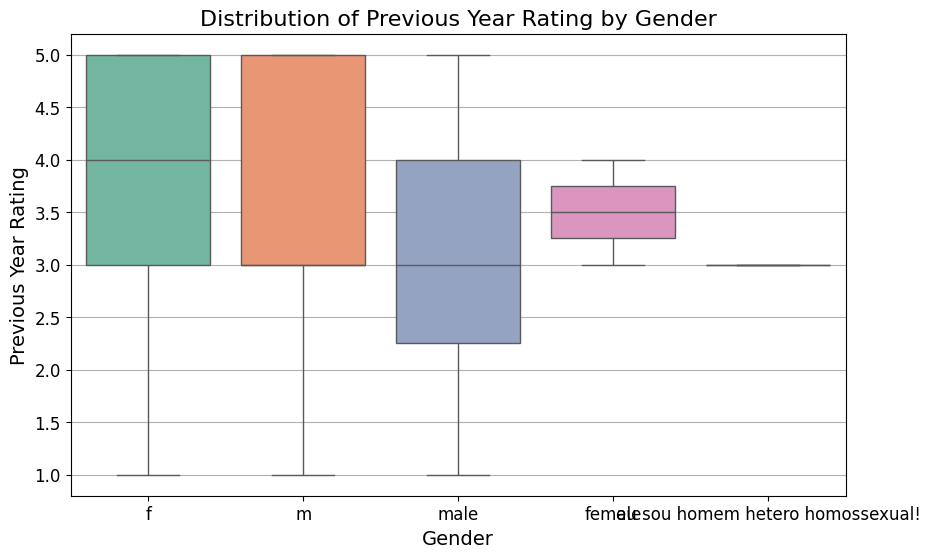

In [ ]:
tipo_analise = 'Please I want a general overview of the correlation between this features in the given dataset.'
output, cb1, history = gera_grafico(modelo = modelo, foco ="some features" , tipo_analise = tipo_analise , dataset_usado = dataset_principal, objeto_de_analise = "previous_year_rating and gender")
img_path = pegar_path(modelo = modelo, history = history)
exec(output) #tem que vir antes pra salvar a imagem
historia_analise= ChatMessageHistory()
result, cb2, analise = get_image_informations(img_path)
historia_analise.add_ai_message(analise)

In [ ]:
def trata_cb(cb):
  cb = str(cb)
  custo_str = cb.split("Total Cost (USD): $")[1]
  custo_float = float(custo_str)
  return custo_float

In [ ]:
print(f"código: \n {output}")
print("\n \n")
result['image_description'], result['interpretation_conclusion']

código: 
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')

# Clean the gender column for consistency
data['gender'] = data['gender'].str.lower().str.strip()

# Drop rows with missing values in 'previous_year_rating' and 'gender'
data = data.dropna(subset=['previous_year_rating', 'gender'])

# Convert 'previous_year_rating' to numeric
data['previous_year_rating'] = pd.to_numeric(data['previous_year_rating'], errors='coerce')

# Create a boxplot to visualize the distribution of previous_year_rating by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='previous_year_rating', data=data, palette='Set2')
plt.title('Distribution of Previous Year Rating by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Previous Year Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')

# Save the plot
plt.savefig('/content/previous_year_r

("The graphic is a box plot displaying the distribution of Previous Year Ratings categorized by Gender. The x-axis represents different gender categories, labeled as 'f' for female, 'm' for male, and 'male' again, which may indicate a specific subgroup. The y-axis represents the Previous Year Rating, ranging from 1 to 5. Each box plot shows the median (the line inside the box), the interquartile range (the box itself), and the whiskers indicate variability outside the upper and lower quartiles, with potential outliers marked as individual points.",
 "The box plot indicates that females ('f') have the highest median rating, followed by males ('m'), while the 'male' category shows a wider range of ratings with a lower median. The 'f' category has less variability compared to the other categories, suggesting more consistent ratings among females. This visualization suggests a potential gender disparity in ratings, with females generally rating higher than their male counterparts.")

In [ ]:
custo = trata_cb(cb1) + trata_cb(cb2)
print(f"Custo total de uma chamada em dolares : {custo}$")

Custo total de uma chamada em dolares : 0.01182285$


In [ ]:
historia_analise

InMemoryChatMessageHistory(messages=[AIMessage(content="The graphic is a box plot displaying the distribution of Previous Year Ratings categorized by Gender. The x-axis represents different gender categories, labeled as 'f' for female, 'm' for male, and 'male' again, which may indicate a specific subgroup. The y-axis represents the Previous Year Rating, ranging from 1 to 5. Each box plot shows the median (the line inside the box), the interquartile range (the box itself), and the whiskers indicate variability outside the upper and lower quartiles, with potential outliers marked as individual points.The box plot indicates that females ('f') have the highest median rating, followed by males ('m'), while the 'male' category shows a wider range of ratings with a lower median. The 'f' category has less variability compared to the other categories, suggesting more consistent ratings among females. This visualization suggests a potential gender disparity in ratings, with females generally rat

####adcionando memória nas analises e prompt de conclusão

In [ ]:
# Testar colocando memória nos outputs de análise, ver se colocar os códigos é algo positivo ou desnecessário
#Basta só ir adicionando na historia analise outras chamadas, mesma coisa posso fazer com o custo:

<string>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



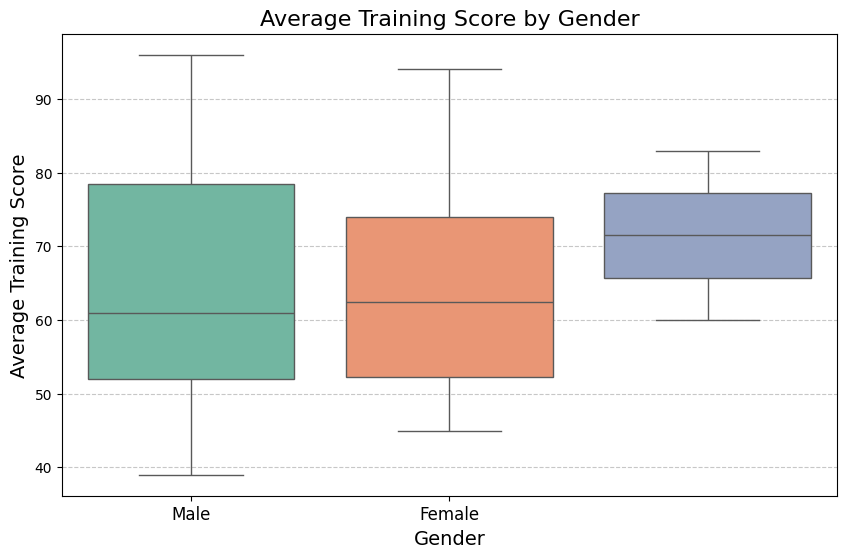

In [ ]:
tipo_analise = 'Please I want a general overview of the correlation between this features in the given dataset.'
output, cb3, history = gera_grafico(modelo = modelo, foco ="some features" , tipo_analise = tipo_analise , dataset_usado = dataset_principal, objeto_de_analise = "avg_training_score and gender")
img_path = pegar_path(modelo = modelo, history = history)
exec(output) #tem que vir antes pra salvar a imagem
result, cb4, analise2 = get_image_informations(img_path)
historia_analise.add_ai_message(analise2)

In [ ]:
analise2, historia_analise

("The graphic is a box plot representing the average training scores categorized by gender (Male and Female). The x-axis is labeled 'Gender' with two categories: Male and Female. The y-axis is labeled 'Average Training Score', ranging from 40 to 90. Each box represents the interquartile range (IQR) of the scores, with the line inside the box indicating the median score. The whiskers extend to the minimum and maximum scores within 1.5 times the IQR from the lower and upper quartiles, respectively. Outliers may be represented as individual points beyond the whiskers.The box plot shows that males have a higher median average training score compared to females. The interquartile range for males is also larger, indicating greater variability in their scores. Females have a narrower range of scores, suggesting more consistency among their training scores. Overall, this indicates a potential disparity in training performance between genders, warranting further investigation into the factors c

In [ ]:
custo += trata_cb(cb3) + trata_cb(cb4)
print(f"Custo total de duas chamadas em dolares : {custo}$")

Custo total de duas chamadas em dolares : 0.023649899999999998$


In [ ]:
def conclusao(historia, instrucs = "Do the report as you usually do", tamanho = "something like 2 pages",):
  sis_prompt_conc = '''You are an expert data science analyst. I will provide you with a series of detailed analyses and descriptions of various graphics from a dataset, all generated by a partner who has thoroughly examined these visuals. Your task is to synthesize these analyses into a comprehensive, well-structured report, some instructions about the report will be passed by the user.

  Ensure that the report:

  1. **Integrates Information**: Seamlessly combines all provided analyses, identifying common themes, trends, and significant insights across the different graphics.
  2. **Provides Context**: Adds context where necessary, explaining the importance of the findings and how they relate to the overall dataset.
  3. **Uses Clear Language**: Writes in clear, concise language suitable for both technical and non-technical audiences.
  4. **Structures the Report Logically**: Organizes the report with a clear introduction, body (with sections for each key finding or group of findings), and a conclusion that summarizes the main insights and suggests potential next steps.
  5. **Ensures Accuracy**: Maintains the accuracy and integrity of the original analyses while ensuring the report is error-free.
  6. **Highlights Key Insights**: Emphasizes the most significant findings from the analyses, making sure they stand out in the report.
  7. **Considers Visuals**: Suggests or incorporates any necessary visuals (such as tables, charts, or bullet points) that can enhance the understanding of the report.

  Your final output should be a polished, professional report that effectively communicates the insights derived from the dataset.'''  #Ver se tiro ou coloco coisas aqui, posso deixar os números como input variables

  sis_template_conc = SystemMessagePromptTemplate.from_template(sis_prompt_conc)

  #fazendo cada prompt para cada tipo de foco

  human_prompt_conc = '''Hello partner, the boss ask you for {instruções}, and he said that the report need to have {tamanho}

  here is my analysis, use them:
  {histórico}
  '''
  human_template_conc = HumanMessagePromptTemplate.from_template(human_prompt_conc)
  prompt_final = ChatPromptTemplate.from_messages(
    [sis_template_conc, human_template_conc]
  )
  chain_conc = (
  prompt_final
  | modelo
  | StrOutputParser()
  )
  with get_openai_callback() as cb:
    conc = chain_conc.invoke({
        "instruções": instrucs,
        "tamanho": tamanho,
        "histórico": historia,
    }
  )
  custo_conc = trata_cb(cb)
  display(Markdown(conc)) #posso tirar isso e só chamar depois né
  return conc, custo_conc

In [ ]:
historia_analise

InMemoryChatMessageHistory(messages=[AIMessage(content="The graphic is a box plot displaying the distribution of Previous Year Ratings categorized by Gender. The x-axis represents different gender categories, labeled as 'f' for female, 'm' for male, and 'male' again, which may indicate a specific subgroup. The y-axis represents the Previous Year Rating, ranging from 1 to 5. Each box plot shows the median (the line inside the box), the interquartile range (the box itself), and the whiskers indicate variability outside the upper and lower quartiles, with potential outliers marked as individual points.The box plot indicates that females ('f') have the highest median rating, followed by males ('m'), while the 'male' category shows a wider range of ratings with a lower median. The 'f' category has less variability compared to the other categories, suggesting more consistent ratings among females. This visualization suggests a potential gender disparity in ratings, with females generally rat

In [ ]:
c, cust_conc = conclusao(historia = historia_analise)
print(f"custo da conclusão: {cust_conc}$")

# Comprehensive Report on Gender Disparities in Ratings and Training Scores

## Introduction

This report synthesizes the analyses of two box plots that explore gender disparities in two key performance metrics: Previous Year Ratings and Average Training Scores. The insights derived from these visualizations highlight significant trends and potential areas for further investigation regarding gender differences in evaluations and training outcomes.

## Key Findings

### 1. Previous Year Ratings by Gender

The first box plot illustrates the distribution of Previous Year Ratings categorized by gender. The analysis reveals the following key insights:

- **Median Ratings**: Females ('f') exhibit the highest median rating, followed by males ('m'). The 'male' subgroup shows a notably lower median rating, indicating a potential disparity in how different genders evaluate performance.
  
- **Variability**: The box plot demonstrates that the female category has less variability in ratings compared to the male categories. This suggests that female ratings are more consistent, while the male subgroup displays a wider range of ratings, indicating differing perspectives or experiences among male evaluators.

- **Outliers**: The presence of outliers in the male categories may suggest that some individuals rated significantly higher or lower than their peers, warranting further exploration into the reasons behind these discrepancies.

### 2. Average Training Scores by Gender

The second box plot focuses on Average Training Scores, again categorized by gender. The findings from this analysis include:

- **Median Scores**: Males have a higher median average training score compared to females. This indicates that, on average, male participants performed better in training assessments.

- **Interquartile Range**: The interquartile range for males is larger, suggesting greater variability in their training scores. In contrast, females exhibit a narrower range of scores, indicating more consistent performance across the group.

- **Implications**: The observed disparity in training performance between genders raises questions about the underlying factors contributing to these differences. It may be beneficial to investigate the training methods, engagement levels, and support systems available to each gender.

## Context and Importance of Findings

The insights derived from these analyses are critical for understanding gender dynamics within the dataset. The higher ratings and training scores for males, contrasted with the more consistent but lower performance of females, suggest systemic issues that may require attention. Addressing these disparities could lead to improved training programs and evaluation processes that are more equitable and supportive of all participants.

## Conclusion

In summary, the analyses of the box plots reveal significant gender disparities in Previous Year Ratings and Average Training Scores. Females tend to rate higher but with less variability, while males exhibit higher average training scores with greater variability. These findings highlight the need for further investigation into the factors influencing these outcomes, as well as potential interventions to promote equity in training and evaluation processes.

### Next Steps

1. **Further Analysis**: Conduct qualitative research to understand the reasons behind the observed disparities in ratings and training scores.
  
2. **Training Program Review**: Evaluate the current training programs to identify any biases or barriers that may affect performance based on gender.

3. **Monitoring and Reporting**: Establish a monitoring system to track gender performance metrics over time, ensuring that any interventions lead to measurable improvements.

### Visuals

To enhance understanding, it is recommended to include the box plots as visuals in the report. These visuals will provide a clear representation of the data distributions and support the insights discussed.

---

This report aims to provide a comprehensive overview of the findings while maintaining clarity and accessibility for both technical and non-technical audiences. The insights presented here are crucial for fostering a more equitable environment in training and evaluation practices.

custo da conclusão: 0.0005504999999999999


#### Colocando um agente:

In [ ]:
''' Ideias de agente com possível utilidade:
1 - caça código na net
2 - Sugestão de Modelos de Machine Learning com busca na net
3 - Identificação de Padrões e Anomalias:
    Explicação: Um agente pode analisar o dataset para identificar padrões ou anomalias que poderiam ser significativas para uma análise mais aprofundada.
    Utilidade Prática: Permite a detecção precoce de problemas ou oportunidades em dados, útil em contextos como análise de risco ou detecção de fraudes.
4 -

pesquisar no google agentes usados em rag, minha mente ta muito fechada para pesquisas na net

Caso se mostrar realmente útil, usar no script final
'''

####Teste simples de memória com prompt de conclução

In [ ]:
# Uma chain que vai passar toda o chat memorizado

#### Loop pelas features com prompt de conclusão

In [ ]:
first_row = dataset_principal[0].page_content

# Encontrar o índice onde terminam os nomes das colunas (após "is_promoted")
# e a linha de dados começa (após o primeiro ":")
first_line = first_row.split('\n')[0]

# Separar a linha em duas partes: nomes das colunas e primeiro registro de dados
parts = first_line.split(':')

# A primeira parte contém os nomes das colunas, então separamos por vírgula
features = parts[0].split(',')

# Remover espaços em branco extra nas features
features = [feature.strip() for feature in features]

# Printar ou retornar a lista de features
print(features)

['employee_id', 'department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score', 'is_promoted']


In [ ]:
features= features[3:]
features

['education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

In [ ]:
lista_features[:len(lista_features)]

In [ ]:
tipo_analise_feature = 'Please I want a general overview of this feature in the given dataset.'
tipo_analise_geral = 'Please I want a comprehensive overview of a given dataset.'

In [ ]:
def loop_inicio_e_feature_individual(lista_features, tipo_analise_feature,tipo_analise_geral, modelo_para_geral, modelo_para_feature, dataset, historia_analise = None):   #posso passar alguma história se já houver
#Colocar pra passar o path em cima?
  if historia_analise == None:
    historia_analise = ChatMessageHistory()
  custo = 0.0
  imagens = []
  #fazer uma analise primeira do geral, ver se faço uma ou 2 sla:
  output, cb, history = gera_grafico(modelo = modelo_para_geral, foco ="Full" , path_df = path_csv, tipo_analise = tipo_analise_geral , dataset_usado = dataset)
  custo += trata_cb(cb)
  #print(output)
  exec(output)
  img_path = pegar_path(modelo = modelo_para_geral, history = history)
  #print(img_path)
  cb, analise = get_image_informations(img_path)
  custo += trata_cb(cb)
  historia_analise.add_ai_message(str(analise))
  print(analise)

  #fazer uma analise primeira feature a feature:
  for feature in lista_features:
    output, cb, history = gera_grafico(modelo = modelo_para_feature, foco ="one feature" , path_df = path_geral, tipo_analise = tipo_analise_feature , dataset_usado = dataset, objeto_de_analise = feature)
    custo += trata_cb(cb)
    #print(output)
    exec(output)
    img_path = pegar_path(modelo = modelo_para_geral, history = history)
    #print(img_path)
    imagens.append(img_path)
    cb, analise = get_image_informations(img_path)
    custo += trata_cb(cb)
    historia_analise.add_ai_message(str(analise))
    print(analise)
    #printo a analise msm?
  return historia_analise, custo, imagens



 Falar sobre o problema que tive com, por algum motivo, ele parar de pagar o path certo e tentar gerar o proprio dataset o que acabava com o tempo de exec e os tokens, debugar e prompt engenering são ultra importantes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')

# Data cleaning
df['education'].fillna('Unknown', inplace=True)
df['previous_year_rating'].fillna(df['previous_year_rating'].mean(), inplace=True)
df['avg_training_score'].fillna(df['avg_training_score'].mean(), inplace=True)
df['length_of_service'].fillna(df['length_of_service'].mean(), inplace=True)

# Convert categorical columns to category type
categorical_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel', 'awards_won?']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Overview of the dataset
overview = df.describe(include='all')

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='department', hue='is_promoted', palette='Set2')
plt.title('Promotion Count by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Promoted', 

<string>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



/content/gender_distribution.png
The graphic is a bar chart titled 'Gender Distribution in the Dataset'. The x-axis represents different gender categories, including 'm' (male), 'f' (female), and a small segment labeled 'homosexual'. The y-axis indicates the count of individuals in each category, ranging from 0 to 350. The bars for 'm' and 'f' are colored blue and orange respectively, with the blue bar for 'm' significantly taller than the orange bar for 'f', indicating a higher count of males in the dataset. The 'homosexual' category shows a very minimal count, almost negligible in comparison.The bar chart indicates a substantial gender imbalance in the dataset, with males ('m') significantly outnumbering females ('f'). The near-zero count for the 'homosexual' category suggests that this demographic is either underrepresented or not included in the dataset. This could imply a need for more inclusive data collection practices to better represent all gender identities.
import pandas as 

FileNotFoundError: [Errno 2] No such file or directory: '/content/xxx'

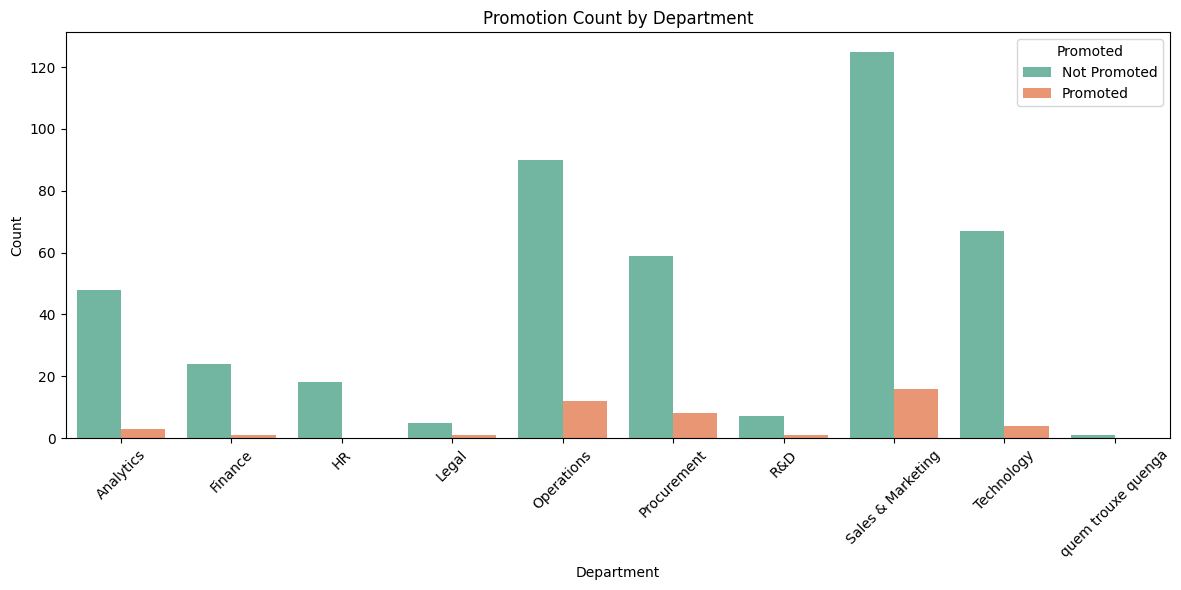

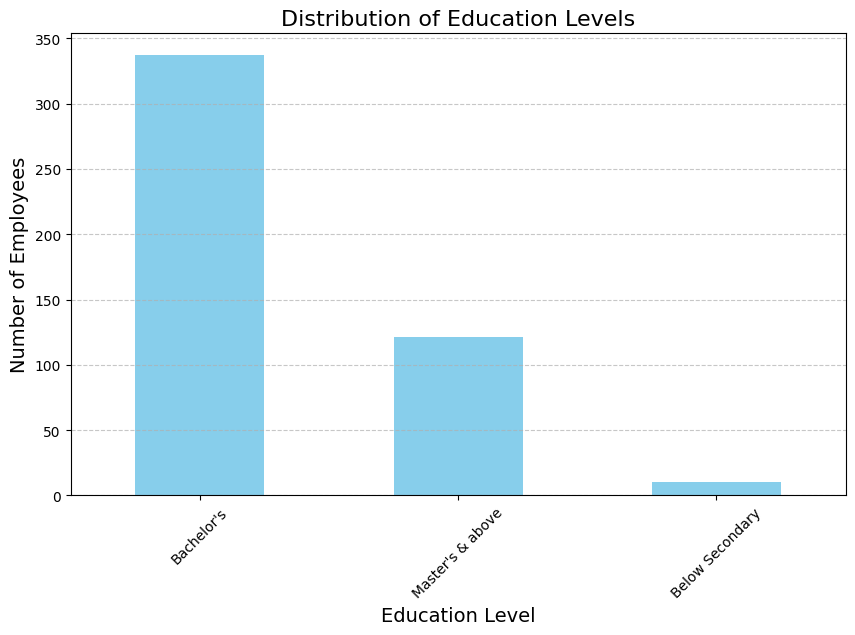

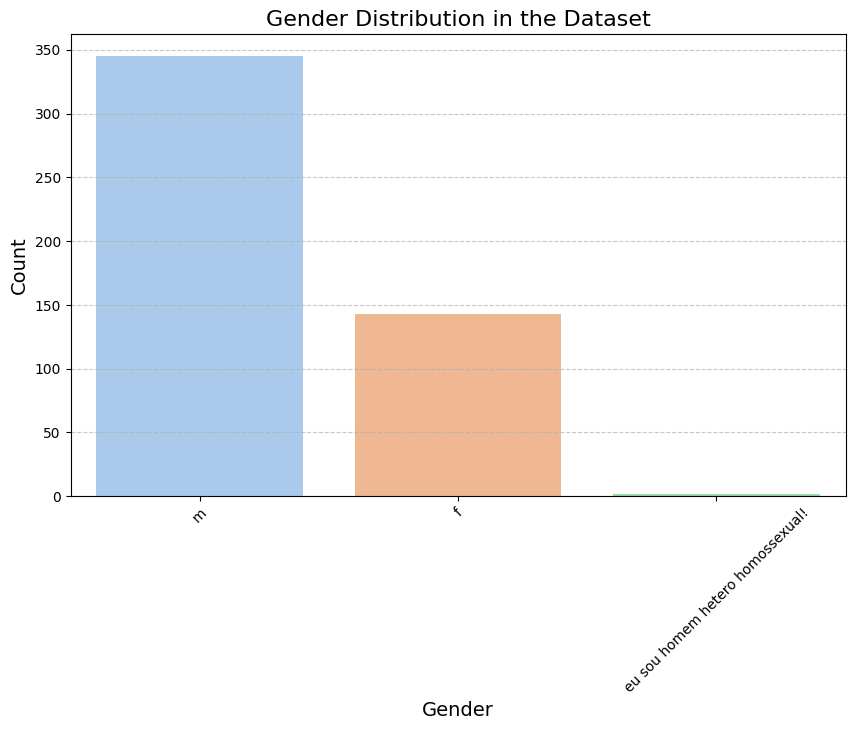

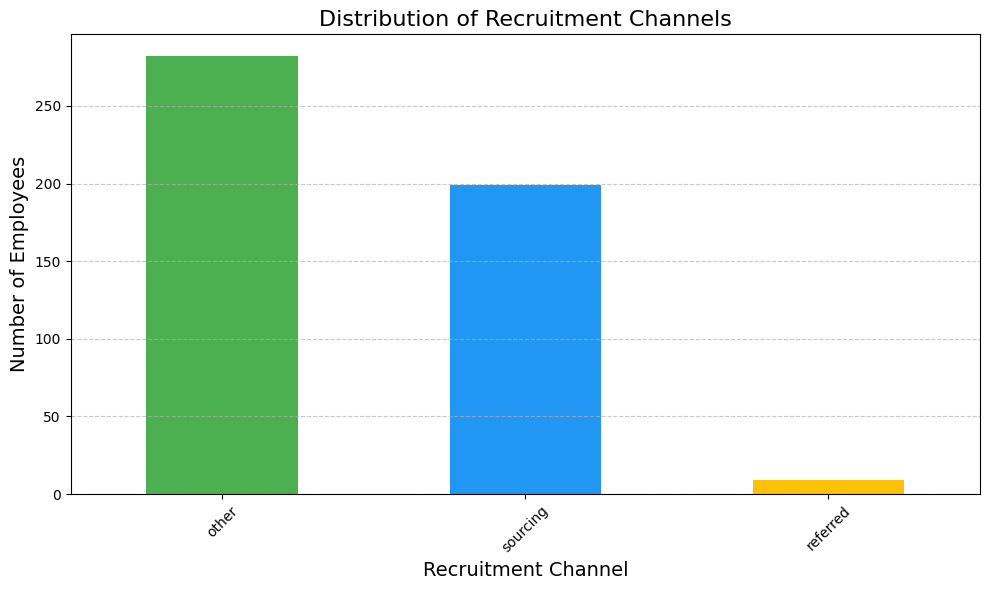

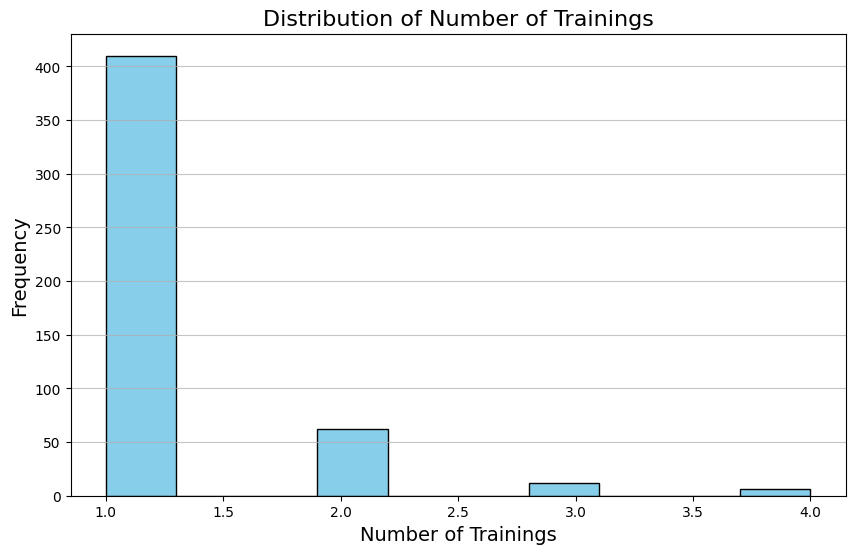

In [ ]:
import time
start_time = time.time()
h, custo = loop_inicio_e_feature_individual(
    lista_features=features,
    tipo_analise_feature=tipo_analise_feature,
    tipo_analise_geral=tipo_analise_geral,
    modelo_para_geral=modelo,
    modelo_para_feature=modelo,
    dataset=dataset_principal,
    historia_analise=None
)
end_time = time.time()
execution_time = end_time - start_time

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')

# Data cleaning
df['education'].fillna('Unknown', inplace=True)
df['previous_year_rating'].fillna(df['previous_year_rating'].mean(), inplace=True)
df['avg_training_score'].fillna(df['avg_training_score'].mean(), inplace=True)
df['awards_won?'].fillna(0, inplace=True)

# Convert 'gender' to a consistent format
df['gender'] = df['gender'].str.lower().replace({'male': 'm', 'female': 'f'})

# Overview of the dataset
overview = df.describe(include='all')

# Plotting the distribution of average training scores by department
plt.figure(figsize=(12, 6))
df.groupby('department')['avg_training_score'].mean().sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Training Score by Department', fontsize=16)
plt.xlabel('Average Training Score', fontsize=14)
plt.ylabel('Department', fontsize=14)
plt.grid(axis='x')

# Save the plot
plt.savefig('/content/over

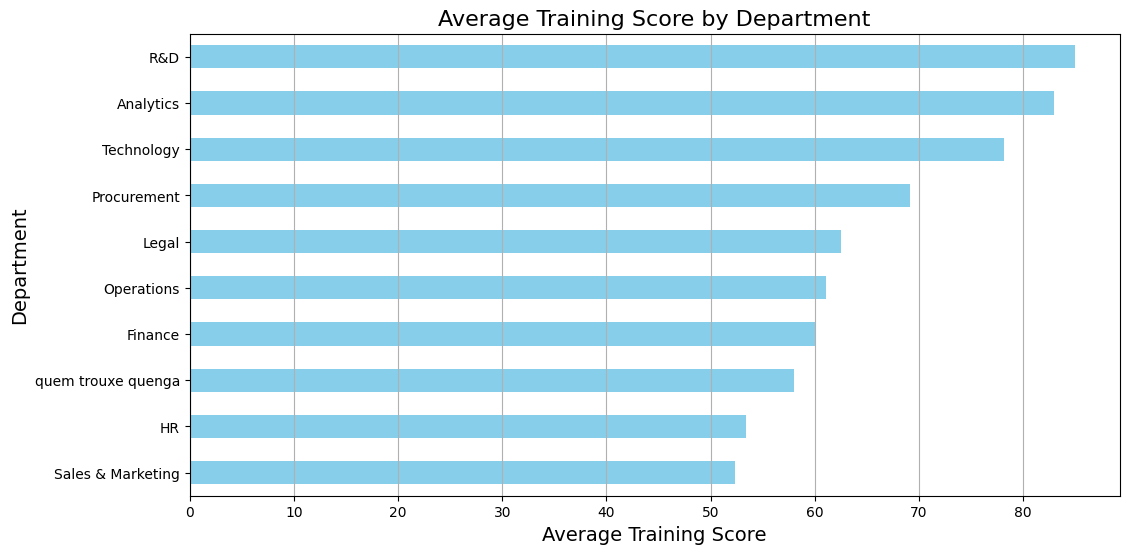

/content/overview_plot.png
The graphic is a horizontal bar chart titled 'Average Training Score by Department'. The x-axis represents the 'Average Training Score', ranging from 0 to 80, while the y-axis lists various departments including R&D, Analytics, Technology, Procurement, Legal, Operations, Finance, HR, and Sales & Marketing. Each department has a corresponding bar indicating its average training score, with the bars colored in light blue.The chart indicates that the R&D department has the highest average training score, followed closely by Analytics and Technology. In contrast, Sales & Marketing has the lowest score, suggesting potential areas for improvement in training effectiveness. The distribution of scores highlights disparities in training outcomes across departments, which may warrant further investigation into the training programs and their relevance to departmental needs.
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/conte

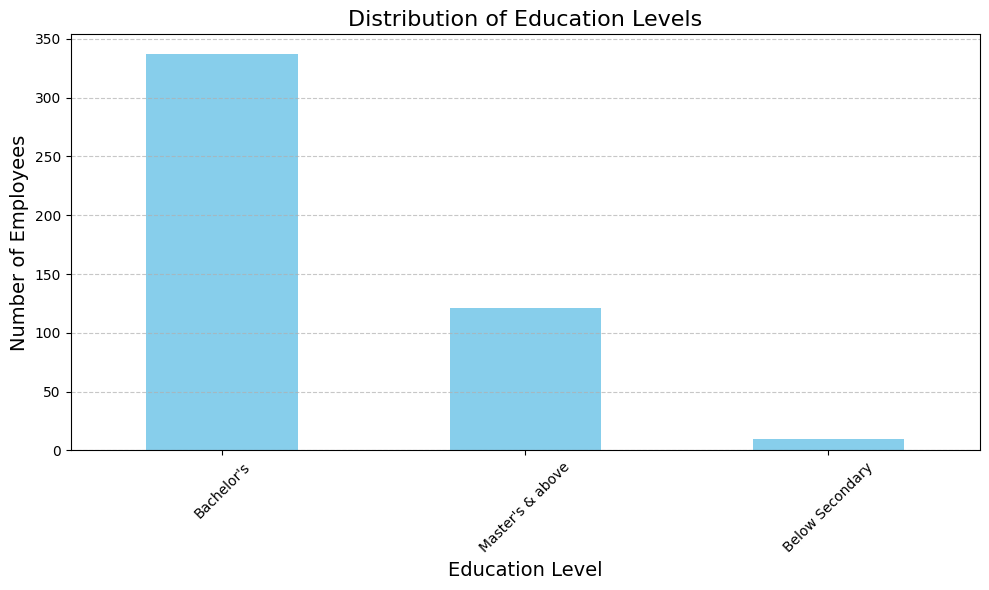

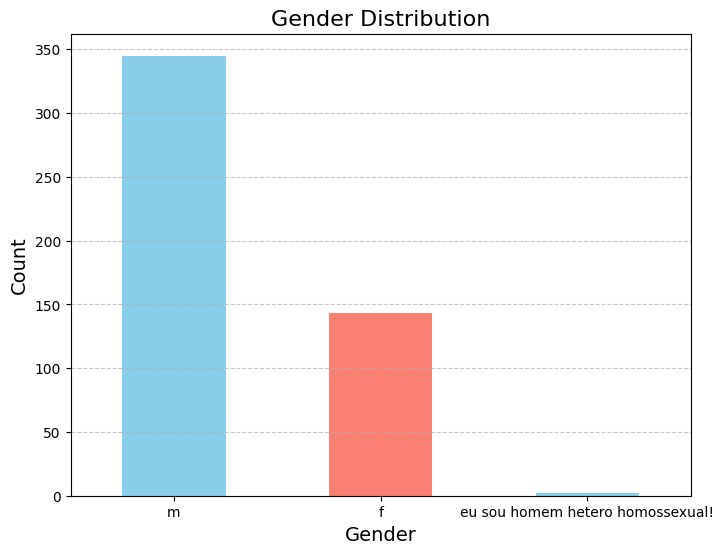

/content/gender_distribution.png
The graphic is a bar chart titled 'Gender Distribution.' The x-axis represents gender categories, labeled 'm' for male and 'f' for female, with an additional label that appears to be a statement in Portuguese. The y-axis indicates the count of individuals, ranging from 0 to 350. The bars are colored blue for males and red for females, showing a significantly higher count for males compared to females.The bar chart indicates a strong gender imbalance in the dataset, with males (m) significantly outnumbering females (f). The count for males is over 350, while females are just under 150. The additional label on the x-axis may suggest a personal statement that could indicate a specific context or demographic aspect related to the data. Overall, this chart highlights the predominance of males in the dataset.
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')

# Check for missing 

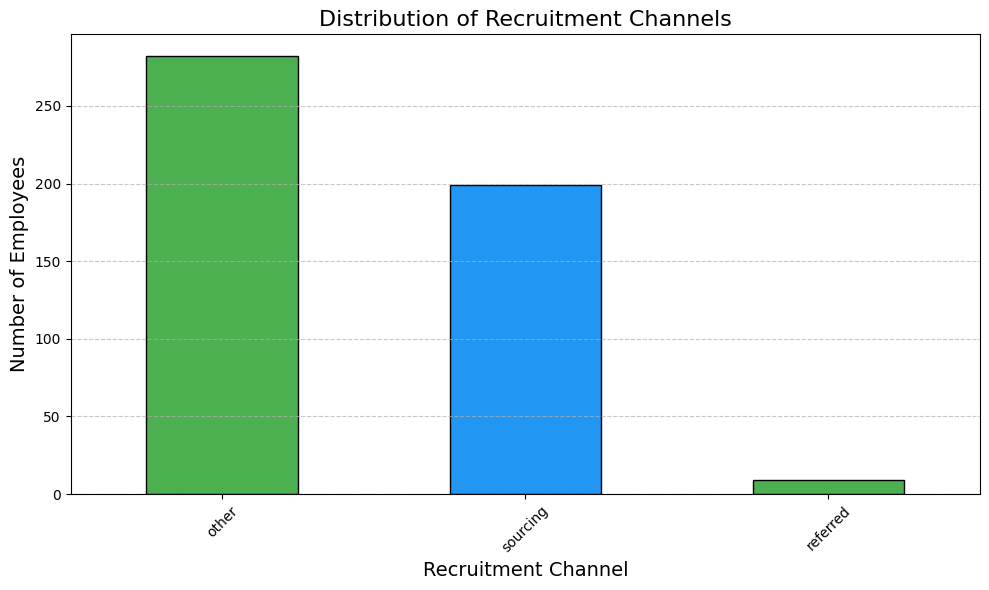

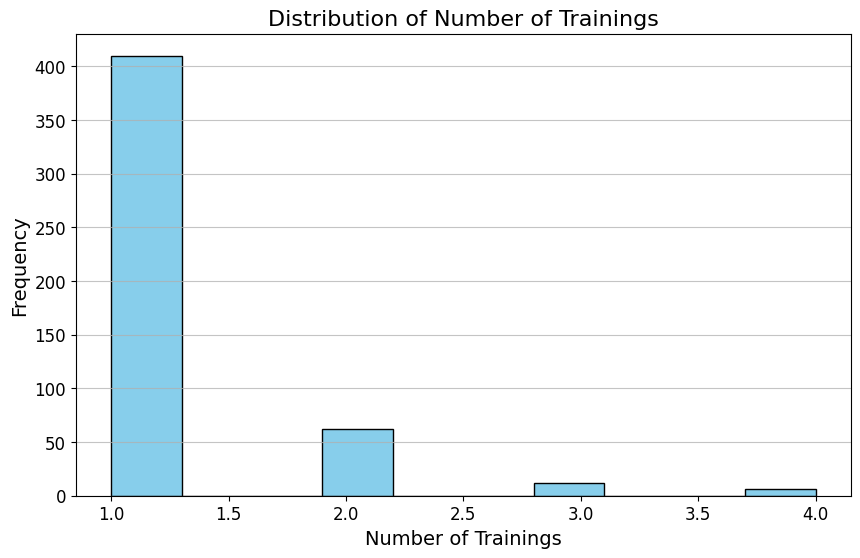

/content/xxx.png
The graphic is a histogram titled 'Distribution of Number of Trainings'. The x-axis represents the 'Number of Trainings' with values ranging from 1.0 to 4.0, while the y-axis shows 'Frequency', indicating how many instances correspond to each number of trainings. The bars are colored light blue, with the first bar (for 1.0 trainings) significantly taller than the others, indicating a frequency of around 400. The subsequent bars for 1.5, 2.0, 3.0, and 4.0 trainings have much lower frequencies, with the tallest of these at approximately 50.The histogram indicates that the majority of instances have a frequency of 1.0 training, suggesting that this is the most common occurrence in the dataset. The sharp decline in frequency for 1.5 trainings and beyond shows that higher numbers of trainings are rare. This could imply a preference or a limitation in the number of trainings conducted, or it may reflect the nature of the dataset being analyzed.
import pandas as pd
import mat

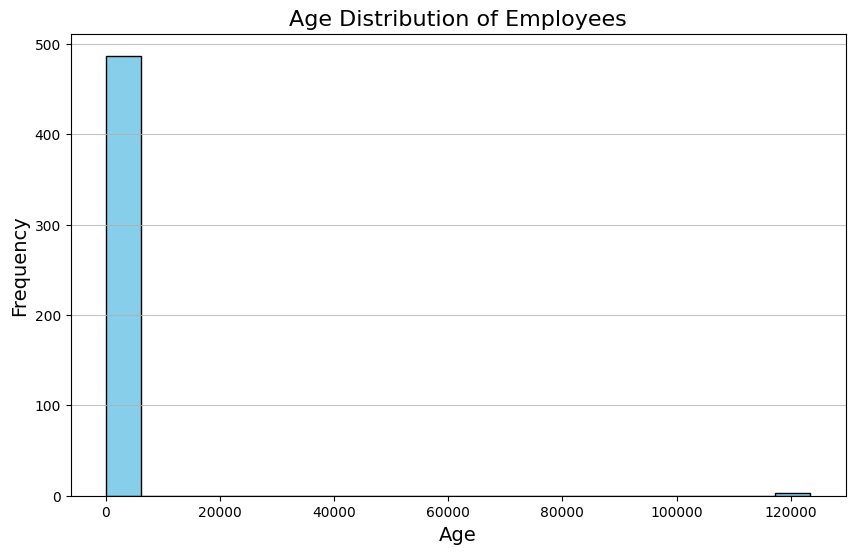

/content/age_distribution.png
The graphic is a histogram titled 'Age Distribution of Employees'. The x-axis represents 'Age' with values ranging from 0 to 120,000, while the y-axis represents 'Frequency', indicating the number of employees within each age range. The histogram shows a significant peak at the age of 0, with very few entries in the higher age ranges, suggesting an abnormal distribution.The histogram indicates that the majority of the age data may be skewed or incorrectly recorded, as there is an overwhelming frequency of employees listed at age 0. This could imply data entry errors or missing values in the dataset. Further investigation is needed to clean the data and accurately represent the age distribution of employees.
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')

# Clean the 'previous_year_rating' column
df['previous_year_rating'] = pd.to_numeric(df['previous_year_rating'], errors='

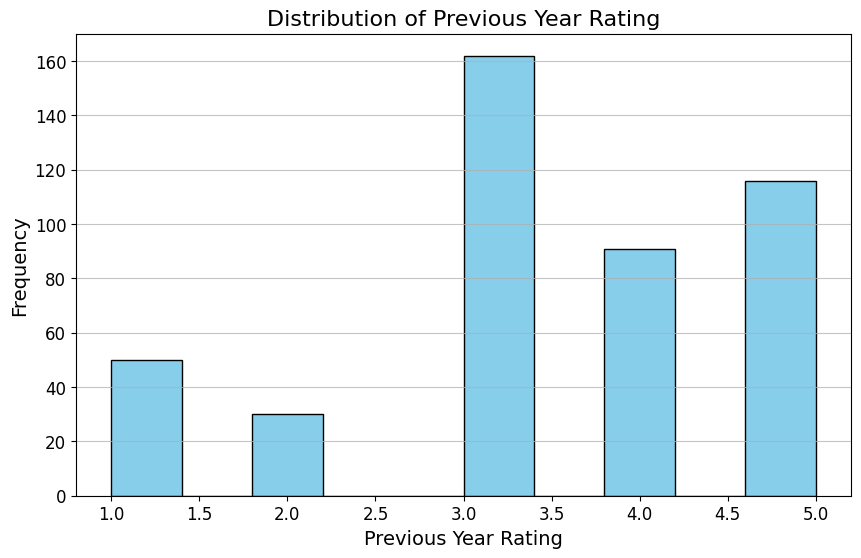

/content/previous_year_rating_distribution.png
The graphic is a bar chart titled 'Distribution of Previous Year Rating'. The x-axis represents the 'Previous Year Rating' with values ranging from 1.0 to 5.0, divided into intervals of 0.5. The y-axis represents 'Frequency', indicating the count of occurrences for each rating. The bars are colored light blue with black borders, showing varying heights corresponding to the frequency of each rating category.The bar chart indicates that the majority of ratings clustered around 3.0, which has the highest frequency, suggesting that many individuals rated their experience as average. Ratings of 1.0 and 2.0 have lower frequencies, while ratings of 4.0 and 5.0 are moderately represented. This distribution implies a tendency towards neutral to slightly positive ratings, with a significant number of respondents feeling average about their experience.
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/

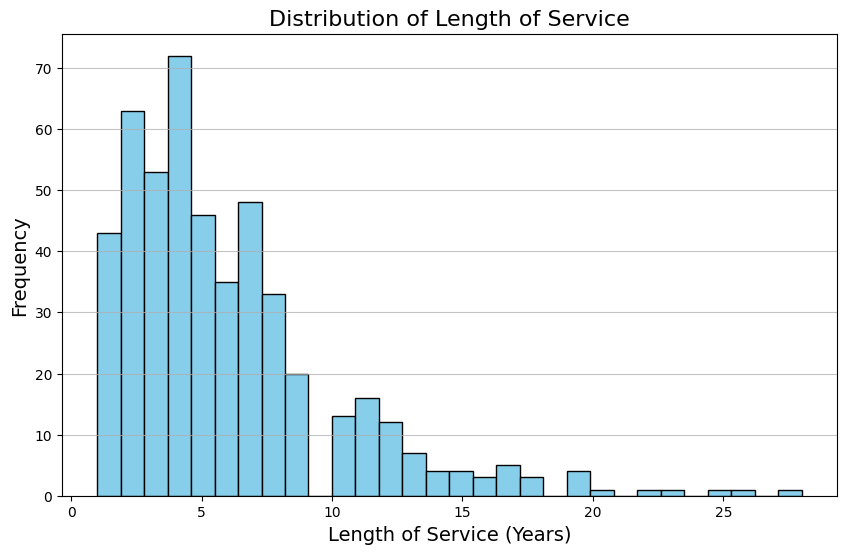

/content/length_of_service_distribution.png
The graphic is a histogram titled 'Distribution of Length of Service'. The x-axis represents 'Length of Service (Years)' ranging from 0 to 25 years, while the y-axis indicates 'Frequency', showing the count of occurrences for each length of service interval. The bars are colored light blue and display varying heights, with the tallest bars appearing between 0 and 5 years of service, indicating a concentration of employees in that range.The histogram suggests that most employees have a relatively short length of service, with the highest frequency occurring in the 0 to 5 years category. This could indicate a high turnover rate or a workforce that is predominantly new. As the length of service increases, the frequency decreases significantly, suggesting fewer employees stay with the organization for longer periods. Organizations may want to investigate the reasons behind this trend to improve retention.
import pandas as pd
import matplotlib.pyp

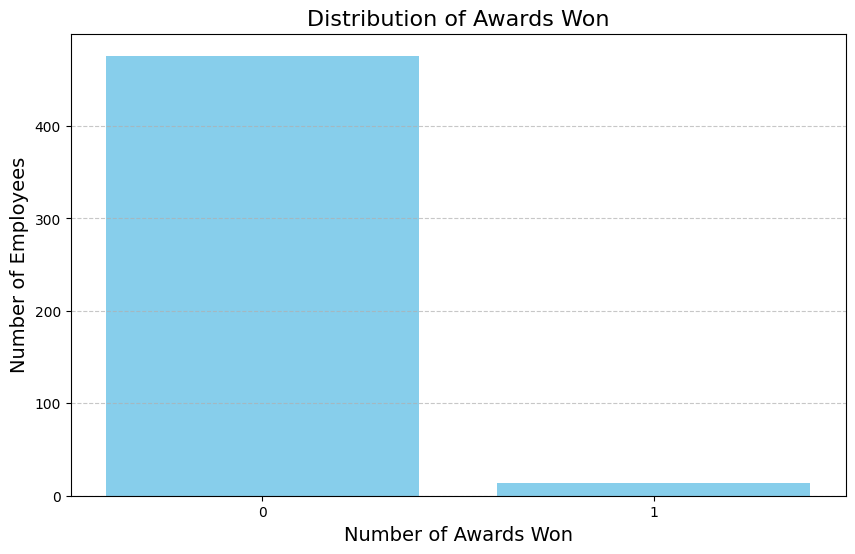

/content/awards_distribution.png
The graphic is a bar chart titled 'Distribution of Awards Won'. The x-axis represents the 'Number of Awards Won', with two categories: 0 and 1. The y-axis indicates the 'Number of Employees', ranging from 0 to 500. The bar corresponding to 0 awards won is significantly taller, indicating a large number of employees (approximately 400), while the bar for 1 award won is much shorter, suggesting only a few employees have won an award.The chart illustrates that the majority of employees have not won any awards, with around 400 out of 500 employees falling into the '0 awards' category. This implies that awards are not commonly received among the employees, which may indicate a need for improved recognition programs or that the criteria for winning awards are stringent.
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')

# Clean the avg_training_score column
df['avg_training_score

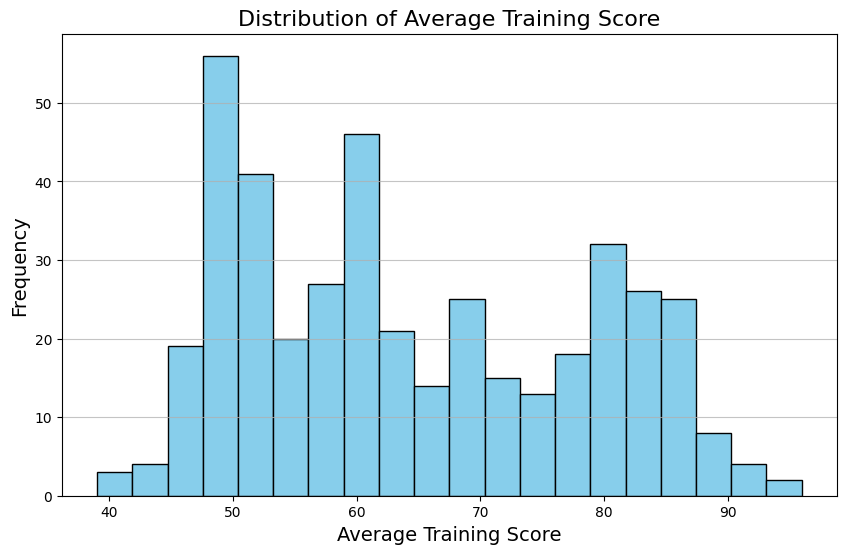

/content/avg_training_score_distribution.png
The graphic is a histogram titled 'Distribution of Average Training Score'. The x-axis represents 'Average Training Score' ranging from 40 to 90, while the y-axis indicates 'Frequency', showing the count of occurrences for each score range. The bars are colored light blue with black outlines, and the histogram displays several peaks, particularly around the scores of 50, 60, and 80.The histogram indicates a bimodal distribution with significant frequencies at average training scores of 50 and 60, suggesting that many participants scored around these values. There is also a noticeable peak at 80, indicating a secondary group of higher scores. This distribution may reflect differing levels of training effectiveness or participant engagement. The presence of lower scores could indicate areas for improvement in training methods.
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Cv/re

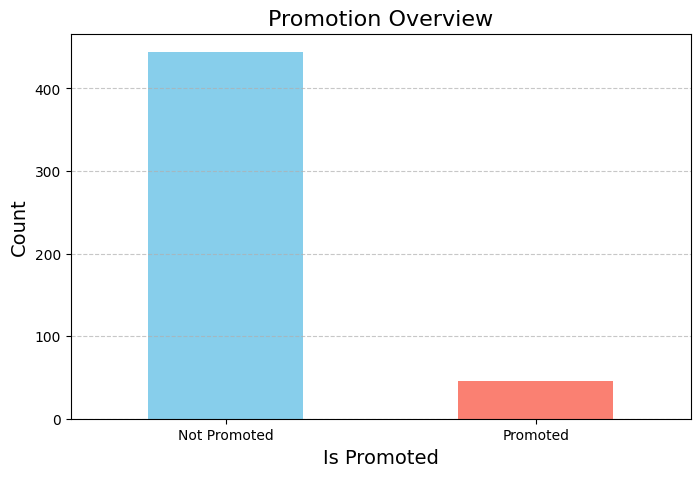

/content/xxx.png
The graphic is a bar chart titled 'Promotion Overview'. The x-axis represents two categories: 'Not Promoted' and 'Promoted'. The y-axis shows the count of occurrences, ranging from 0 to 500. The bar for 'Not Promoted' is significantly taller, indicating a count of over 400, while the bar for 'Promoted' is much shorter, with a count of around 50. The colors used are light blue for 'Not Promoted' and light red for 'Promoted'.The chart clearly indicates that a vast majority of the subjects are not promoted compared to those who are. This suggests that promotions are relatively rare in the dataset being analyzed. Organizations may need to investigate the criteria for promotions or consider strategies to increase the number of promotions if they aim for a more balanced distribution.


In [ ]:
import time
start_time = time.time()
h, custo = loop_inicio_e_feature_individual(
    lista_features=features,
    tipo_analise_feature=tipo_analise_feature,
    tipo_analise_geral=tipo_analise_geral,
    modelo_para_geral=modelo,
    modelo_para_feature=modelo,
    dataset=dataset_principal,
    historia_analise=None
)
end_time = time.time()
execution_time = end_time - start_time

In [ ]:
imagens= ['/content/age_distribution.png', '/content/xxx.png', '/content/education_distribution.png'  ]

In [ ]:
print(f"custo: {custo}$ e o tempo foi de: {execution_time/60}min")

custo: 0.12960449999999998$ e o tempo foi de: 3.3171337763468425min


In [ ]:
h

InMemoryChatMessageHistory(messages=[AIMessage(content="The graphic is a horizontal bar chart titled 'Average Training Score by Department'. The x-axis represents the 'Average Training Score', ranging from 0 to 80, while the y-axis lists various departments including R&D, Analytics, Technology, Procurement, Legal, Operations, Finance, HR, and Sales & Marketing. Each department has a corresponding bar indicating its average training score, with the bars colored in light blue.The chart indicates that the R&D department has the highest average training score, followed closely by Analytics and Technology. In contrast, Sales & Marketing has the lowest score, suggesting potential areas for improvement in training effectiveness. The distribution of scores highlights disparities in training outcomes across departments, which may warrant further investigation into the training programs and their relevance to departmental needs."), AIMessage(content="The graphic is a bar chart titled 'Distributi

In [ ]:
c, cust_conc = conclusao(historia = h)
print(f"custo da conclusão: {cust_conc}$")

# Comprehensive Report on Employee Data Analysis

## Introduction

This report synthesizes a series of analyses derived from various graphical representations of employee data. The insights gained from these graphics provide a comprehensive overview of key workforce characteristics, including training effectiveness, education levels, gender distribution, recruitment channels, employee ratings, length of service, awards recognition, and promotion rates. By identifying trends and disparities across these dimensions, organizations can better understand their workforce dynamics and make informed decisions to enhance employee engagement and performance.

## Key Findings

### 1. Training Effectiveness

The **Average Training Score by Department** reveals significant disparities in training outcomes across departments. The R&D department leads with the highest average training score, followed closely by Analytics and Technology. In contrast, Sales & Marketing exhibits the lowest score, indicating potential areas for improvement in training effectiveness. This disparity suggests that training programs may need to be tailored to meet the specific needs of each department, ensuring that all employees receive relevant and impactful training.

### 2. Education Levels

The **Distribution of Education Levels** chart indicates that the majority of employees hold a Bachelor's degree, with approximately 350 individuals in this category. In comparison, only around 100 employees possess a Master's degree or higher, while less than 50 have education levels below secondary. This predominance of undergraduate qualifications suggests a potential area for workforce development, as organizations may benefit from strategies aimed at recruiting or developing employees with advanced degrees.

### 3. Gender Distribution

The **Gender Distribution** graphic highlights a significant gender imbalance within the workforce, with males outnumbering females by a substantial margin (over 350 males compared to just under 150 females). This disparity raises important questions about diversity and inclusion within the organization, prompting a need for strategies to promote gender equity in hiring and retention practices.

### 4. Recruitment Channels

The **Distribution of Recruitment Channels** indicates that the 'other' recruitment channel is the most significant source of new hires, accounting for over 250 employees. The 'sourcing' channel follows with around 200 recruits, while the 'referred' channel is notably less effective, contributing only a minimal number of hires. This finding suggests that organizations may need to enhance their referral programs to leverage existing employees' networks for recruitment.

### 5. Employee Ratings

The **Distribution of Previous Year Rating** shows that most employees rated their experiences around the average score of 3.0, with fewer ratings at the extremes (1.0 and 2.0 being lower, and 4.0 and 5.0 being moderately represented). This clustering around the average rating implies a general sense of neutrality among employees regarding their experiences, which could indicate areas for improvement in employee satisfaction and engagement initiatives.

### 6. Length of Service

The **Distribution of Length of Service** reveals that most employees have a relatively short tenure, with the highest frequency occurring in the 0 to 5 years category. This trend may suggest a high turnover rate or a workforce predominantly composed of newer employees. Organizations should investigate the underlying reasons for this trend to enhance employee retention strategies.

### 7. Awards Recognition

The **Distribution of Awards Won** indicates that a significant majority of employees (approximately 400 out of 500) have not received any awards. This lack of recognition may point to a need for improved employee recognition programs or a reevaluation of the criteria for awards to ensure that achievements are acknowledged and celebrated.

### 8. Promotion Rates

The **Promotion Overview** chart clearly illustrates that promotions are relatively rare, with over 400 employees categorized as 'Not Promoted' compared to only around 50 who have been promoted. This imbalance suggests that organizations may need to review their promotion criteria and consider strategies to increase promotion opportunities, fostering a more equitable advancement process.

## Conclusion

The analyses presented in this report highlight several critical insights into the workforce dynamics of the organization. Key areas for improvement include training effectiveness, gender diversity, employee recognition, and promotion rates. By addressing these issues, organizations can enhance employee satisfaction, retention, and overall performance. 

### Next Steps

1. **Investigate Training Programs**: Conduct a thorough review of training programs to ensure they meet departmental needs and improve effectiveness, particularly in underperforming areas like Sales & Marketing.
2. **Enhance Recruitment Strategies**: Develop targeted recruitment strategies to attract candidates with advanced degrees and improve referral programs to leverage employee networks.
3. **Promote Gender Equity**: Implement initiatives aimed at increasing gender diversity within the workforce, ensuring equitable hiring and retention practices.
4. **Review Recognition and Promotion Criteria**: Reevaluate the criteria for employee awards and promotions to foster a culture of recognition and advancement.

By taking these steps, organizations can create a more engaged, diverse, and high-performing workforce.

custo da conclusão: 0.0009061499999999999$


In [ ]:
def loop_relacao_features(lista_features, tipo_analise_feature, modelo_para_feature, dataset, historia_analise = None):
  #Fazer a mesma coisa que a função de cima mas relacionando as features todas
  if historia_analise == None:
    historia_analise = ChatMessageHistory()
  custo = 0.0
  imagens = []
  #não precisa da analise geral
  #pra não fazer n quadrado analises que seria demorado e caro
  target = lista_features[-1]
  lista_feature = lista_features[:len(lista_features)]

  for feature in lista_features:
    objeto_de_analise = f'{feature} and {target}'
    output, cb, history = gera_grafico(modelo = modelo_para_feature, foco ="some features" , path_df = path_geral, tipo_analise = tipo_analise_feature , dataset_usado = dataset, objeto_de_analise = objeto_de_analise)
    custo += trata_cb(cb)
    #print(output)
    exec(output)
    img_path = pegar_path(modelo = modelo_para_feature, history = history)
    #print(img_path)
    imagens.append(img_path)
    cb, analise = get_image_informations(img_path)
    custo += trata_cb(cb)
    historia_analise.add_ai_message(str(analise))
    print(analise)
    #printo a analise msm?
  return historia_analise, custo, imagens


In [ ]:
tipo_analise_feature = 'Please I want a general overview of the correlation between this features in the given dataset.'

In [ ]:
import time
start_time = time.time()
h2, custo2, imgs2 = loop_relacao_features(
    lista_features=features,
    tipo_analise_feature=tipo_analise_feature,
    modelo_para_feature=modelo,
    dataset=dataset_principal,
    historia_analise=None
)
end_time = time.time()
execution_time = end_time - start_time

In [ ]:
def analise_total(historia_total): #acho que não precisa disso, ia demorar muito pra rodar e pode dar problema, deixar as 3 funções: feature a feature, relações e conclusão dps visu final

#### def de visualização geral e bontinha

In [ ]:
his = h.messages[:3]


In [ ]:
len(his)

3

Tenho que fazer algo para ter certeza de que não tenha imagens com mesmos path, colocar algo no prompt inicial do sistema lá na gera_grafico

In [ ]:
def visu_geral(imagens, historia_analises, imagens2, historia_analises2, conclusao):
  hist = historia_analises.messages
  hist2 = historia_analises2.messages
  if len(imagens) != len(hist):
    raise ValueError("O número de imagens deve ser igual ao número de análises.")
  for img_path, analise in zip(imagens, hist):
      img = mpimg.imread(img_path)
      plt.figure(figsize=(8, 6))
      plt.imshow(img)
      plt.axis('off')
      plt.show()

      display(Markdown(analise.content))
  for img_path2, analise2 in zip(imagens2, hist2):
    img = mpimg.imread(img_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    display(Markdown(analise2.content))

  display(Markdown(conclusao))
  '''arrumar isso aqui certinho depois'''

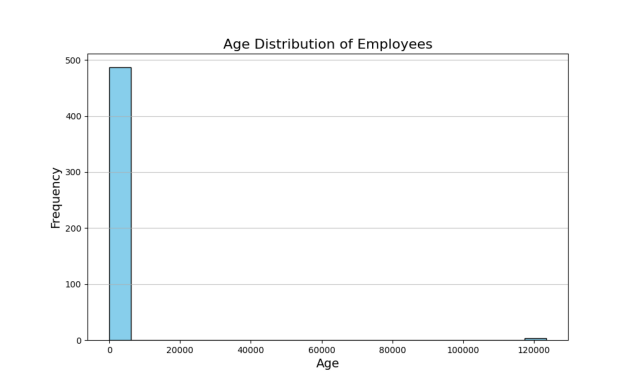

The graphic is a horizontal bar chart titled 'Average Training Score by Department'. The x-axis represents the 'Average Training Score', ranging from 0 to 80, while the y-axis lists various departments including R&D, Analytics, Technology, Procurement, Legal, Operations, Finance, HR, and Sales & Marketing. Each department has a corresponding bar indicating its average training score, with the bars colored in light blue.The chart indicates that the R&D department has the highest average training score, followed closely by Analytics and Technology. In contrast, Sales & Marketing has the lowest score, suggesting potential areas for improvement in training effectiveness. The distribution of scores highlights disparities in training outcomes across departments, which may warrant further investigation into the training programs and their relevance to departmental needs.

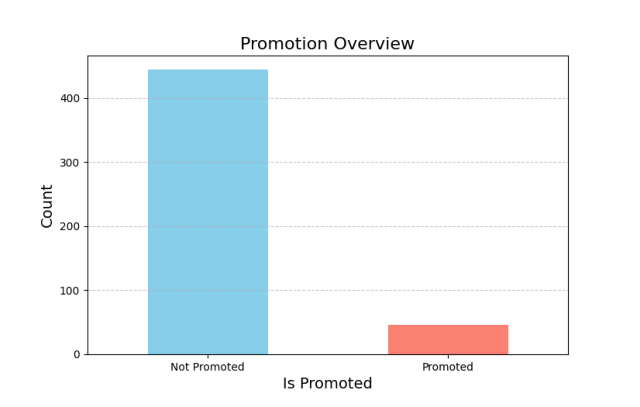

The graphic is a bar chart titled 'Distribution of Education Levels'. The x-axis represents different education levels: 'Below Secondary', 'Bachelor's', and 'Master's & above'. The y-axis indicates the number of employees, ranging from 0 to 350. The bars are colored light blue, with the tallest bar representing 'Bachelor's' with approximately 350 employees, followed by 'Master's & above' with around 100 employees, and 'Below Secondary' with less than 50 employees.The chart clearly shows that the majority of employees have a Bachelor's degree, significantly outnumbering those with higher education levels or below secondary education. This suggests a workforce that is predominantly composed of individuals with undergraduate qualifications, indicating a potential area for workforce development or recruitment strategies targeting higher education qualifications.

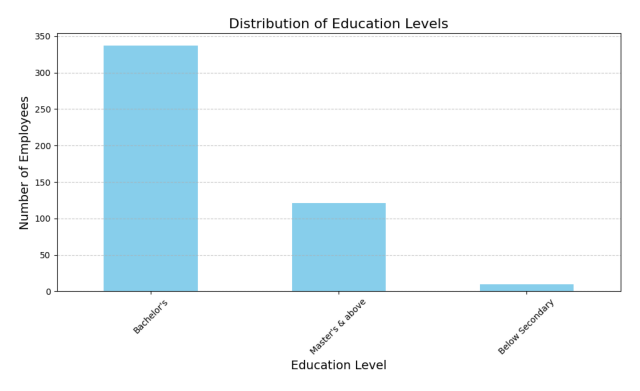

The graphic is a bar chart titled 'Gender Distribution.' The x-axis represents gender categories, labeled 'm' for male and 'f' for female, with an additional label that appears to be a statement in Portuguese. The y-axis indicates the count of individuals, ranging from 0 to 350. The bars are colored blue for males and red for females, showing a significantly higher count for males compared to females.The bar chart indicates a strong gender imbalance in the dataset, with males (m) significantly outnumbering females (f). The count for males is over 350, while females are just under 150. The additional label on the x-axis may suggest a personal statement that could indicate a specific context or demographic aspect related to the data. Overall, this chart highlights the predominance of males in the dataset.

# Comprehensive Report on Employee Data Analysis

## Introduction

This report synthesizes a series of analyses derived from various graphical representations of employee data. The insights gained from these graphics provide a comprehensive overview of key workforce characteristics, including training effectiveness, education levels, gender distribution, recruitment channels, employee ratings, length of service, awards recognition, and promotion rates. By identifying trends and disparities across these dimensions, organizations can better understand their workforce dynamics and make informed decisions to enhance employee engagement and performance.

## Key Findings

### 1. Training Effectiveness

The **Average Training Score by Department** reveals significant disparities in training outcomes across departments. The R&D department leads with the highest average training score, followed closely by Analytics and Technology. In contrast, Sales & Marketing exhibits the lowest score, indicating potential areas for improvement in training effectiveness. This disparity suggests that training programs may need to be tailored to meet the specific needs of each department, ensuring that all employees receive relevant and impactful training.

### 2. Education Levels

The **Distribution of Education Levels** chart indicates that the majority of employees hold a Bachelor's degree, with approximately 350 individuals in this category. In comparison, only around 100 employees possess a Master's degree or higher, while less than 50 have education levels below secondary. This predominance of undergraduate qualifications suggests a potential area for workforce development, as organizations may benefit from strategies aimed at recruiting or developing employees with advanced degrees.

### 3. Gender Distribution

The **Gender Distribution** graphic highlights a significant gender imbalance within the workforce, with males outnumbering females by a substantial margin (over 350 males compared to just under 150 females). This disparity raises important questions about diversity and inclusion within the organization, prompting a need for strategies to promote gender equity in hiring and retention practices.

### 4. Recruitment Channels

The **Distribution of Recruitment Channels** indicates that the 'other' recruitment channel is the most significant source of new hires, accounting for over 250 employees. The 'sourcing' channel follows with around 200 recruits, while the 'referred' channel is notably less effective, contributing only a minimal number of hires. This finding suggests that organizations may need to enhance their referral programs to leverage existing employees' networks for recruitment.

### 5. Employee Ratings

The **Distribution of Previous Year Rating** shows that most employees rated their experiences around the average score of 3.0, with fewer ratings at the extremes (1.0 and 2.0 being lower, and 4.0 and 5.0 being moderately represented). This clustering around the average rating implies a general sense of neutrality among employees regarding their experiences, which could indicate areas for improvement in employee satisfaction and engagement initiatives.

### 6. Length of Service

The **Distribution of Length of Service** reveals that most employees have a relatively short tenure, with the highest frequency occurring in the 0 to 5 years category. This trend may suggest a high turnover rate or a workforce predominantly composed of newer employees. Organizations should investigate the underlying reasons for this trend to enhance employee retention strategies.

### 7. Awards Recognition

The **Distribution of Awards Won** indicates that a significant majority of employees (approximately 400 out of 500) have not received any awards. This lack of recognition may point to a need for improved employee recognition programs or a reevaluation of the criteria for awards to ensure that achievements are acknowledged and celebrated.

### 8. Promotion Rates

The **Promotion Overview** chart clearly illustrates that promotions are relatively rare, with over 400 employees categorized as 'Not Promoted' compared to only around 50 who have been promoted. This imbalance suggests that organizations may need to review their promotion criteria and consider strategies to increase promotion opportunities, fostering a more equitable advancement process.

## Conclusion

The analyses presented in this report highlight several critical insights into the workforce dynamics of the organization. Key areas for improvement include training effectiveness, gender diversity, employee recognition, and promotion rates. By addressing these issues, organizations can enhance employee satisfaction, retention, and overall performance. 

### Next Steps

1. **Investigate Training Programs**: Conduct a thorough review of training programs to ensure they meet departmental needs and improve effectiveness, particularly in underperforming areas like Sales & Marketing.
2. **Enhance Recruitment Strategies**: Develop targeted recruitment strategies to attract candidates with advanced degrees and improve referral programs to leverage employee networks.
3. **Promote Gender Equity**: Implement initiatives aimed at increasing gender diversity within the workforce, ensuring equitable hiring and retention practices.
4. **Review Recognition and Promotion Criteria**: Reevaluate the criteria for employee awards and promotions to foster a culture of recognition and advancement.

By taking these steps, organizations can create a more engaged, diverse, and high-performing workforce.

In [ ]:
visu_geral(imagens, his, c)

Usar sim, fica bonito

Testar com outros modelos é ultra necessário ag

### Script final analise de dados:  

Melhorando o código após os testes, abarcando todas os tipos de "ação" e encapsulando tudo em funções.

###### gerando os gráficos

In [ ]:
#Hiperparemetros do modelo
model = 'gpt-4o-mini'
temperatura = 0.2
max_tokens = None

In [ ]:
modelo = ChatOpenAI(model = model, temperature = temperatura, max_tokens = max_tokens )

In [ ]:
def gera_grafico(modelo, foco: str, tipo_analise: str, dataset_usado, path_df, objeto_de_analise = None):  #objeto_de_analise é opcional e é um parâmetro que pede oq do dataset pode ser analisado

  permitidos = ['Full', 'some features', 'one feature','one line']
  if foco not in permitidos:
    raise ValueError("O foco não pode ser feito, escolha um entre: Full, some features, one feature, one line")

  history= ChatMessageHistory()
  prompt_dataset = "Here is your dataset: {dataset}"
  #Premeiro setando o prompt do sistema
  sis_prompt = "You will act like a data science specialist analyzing a dataset given to you. The things you do will be used report presentation for the team, so you need to do insightful, visual, aesthetic, creative and a well documented code. You will be given a dataset and, sometimes, the user will tell some part of the dataset to you generate a code that can improve the dataset or analyse it with a graphic. Before write the code of the plot, assure that nothing in the dataset will generate a error and correct if necessary. Give me a executable code, don't write any explanation, don't write ```python in the top and never end with plt.close(). In code to call the dataframe use the {path_data}. save the image of the graphic in '/content/xxx.png' xxx have to be the name of the graphic. "
  sis_template = SystemMessagePromptTemplate.from_template(sis_prompt)

  #fazendo cada prompt para cada tipo de foco
  if foco == "Full":
    human_prompt = "Analyse my dataset {type_of_analysis}: \n" + prompt_dataset
    human_template = HumanMessagePromptTemplate.from_template(human_prompt)
    prompt_final = ChatPromptTemplate.from_messages(
      [sis_template, human_template]
    )
    chain = (
    prompt_final
    | modelo
    | StrOutputParser()
    )
    with get_openai_callback() as cb:
      output = chain.invoke({
          "path_data": path_df,
          "dataset": dataset_usado,
          "type_of_analysis": tipo_analise
      }
  )

  elif foco == 'some features':
    human_prompt = "Analyse my features: {features} \n {type_of_analysis}: \n" + prompt_dataset
    human_template = HumanMessagePromptTemplate.from_template(human_prompt)
    prompt_final = ChatPromptTemplate.from_messages(
      [sis_template, human_template]
    )
    chain = (
    prompt_final
    | modelo
    | StrOutputParser()
    )
    with get_openai_callback() as cb:
      output = chain.invoke({
          "path_data": path_df,
          "dataset": dataset_usado,
          "features": objeto_de_analise,
          "type_of_analysis": tipo_analise
      }
  )


  elif foco == 'one feature':
    human_prompt = "Analyse my feature: {feature} \n {type_of_analysis}: \n" + prompt_dataset
    human_template = HumanMessagePromptTemplate.from_template(human_prompt)
    prompt_final = ChatPromptTemplate.from_messages(
      [sis_template, human_template]
    )
    chain = (
    prompt_final
    | modelo
    | StrOutputParser()
    )
    with get_openai_callback() as cb:
      output = chain.invoke({
          "path_data": path_df,
          "dataset": dataset_usado,
          "feature": objeto_de_analise,
          "type_of_analysis": tipo_analise
      }
  )

  else:
    human_prompt = "Analyse my dataset: {line} \n {type_of_analysis}: \n" + prompt_dataset
    human_template = HumanMessagePromptTemplate.from_template(human_prompt)
    prompt_final = ChatPromptTemplate.from_messages(
      [sis_template, human_template1]
    )
    chain = (
    prompt_final
    | modelo
    | StrOutputParser()
    )
    with get_openai_callback() as cb:
      output = chain.invoke({
          "path_data": path_df,
          "dataset": dataset_usado,
          "line": objeto_de_analise,
          "type_of_analysis": tipo_analise
      }
  )
  history.add_ai_message(output)
  #Retorna o output gerado pela llm e o custo disso (tenho que alterar pra só pedir cb se usar openai)
  return output, cb, history

######Pegando o path:

In [ ]:
def pegar_path(modelo, history):
  pegar_caminho = 'I will give you a code, in it will have a path to a image, just pick up this path and return me, nothing more, just the path with no "" or '' or any space in the start \n code: {codigo}'
  template_path = HumanMessagePromptTemplate.from_template(pegar_caminho)
  prompt_path = ChatPromptTemplate.from_messages([template_path])
  chain_path = (
      prompt_path
      | modelo
      | StrOutputParser()
  )
  img_output_path = chain_path.invoke({
      'codigo': history.messages
  })
  img_output_path = img_output_path.strip()
  img_output_path = img_output_path.strip('"\'')
  return img_output_path

In [ ]:
img_path = pegar_path(modelo = modelo, history = history)
img_path

###### analisando o gráfico

In [ ]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')
def load_image(inputs: dict) -> dict:
    """Load image from file and encode it as base64."""
    image_path = inputs["image_path"]
    image_base64 = encode_image(image_path)
    return {"image": image_base64}

In [ ]:
load_image_chain = TransformChain(
    input_variables=["image_path"],
    output_variables=["image"],
    transform=load_image
)

In [ ]:

#Ver, entender e explicar melhor o que é esse pydantic, base Model e Field

class ImageInformation(BaseModel):
 """Info que queremos sobre a imagem"""
 image_description: str = Field(description="a description of the graphic, which is the type, the features in the axes and etc")
 interpretation_conclusion: str = Field(description="Write your interpretation and conclusions about the graphic image")


 #Pensar em mais coisas para "perguntar"

In [ ]:
# tirar ou colocar verbose
globals.set_debug(False)

#Ver o que é isso exatamente:
def image_model(inputs: dict) -> str | list[str] | dict:
 """Invoke model with image and prompt."""
 sis_prompt = "You will act like a data science specialist analyzing a dataset given to you. The things you do will be used report presentation for the team, so you need to do good and clear analysis and a well documented code. You will be given a image or the output of a code, that you have to analyse  "
 sis_template = SystemMessagePromptTemplate.from_template(sis_prompt)
 model = ChatOpenAI(temperature=0.5, model="gpt-4o-mini")
 msg = model.invoke(
             [SystemMessage(content=[
             {"type": "text", "text": sis_prompt}]),
              HumanMessage(
             content=[
             {"type": "text", "text": inputs["prompt"]},
             {"type": "text", "text": parser.get_format_instructions()},
             {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{inputs['image']}"}},
             ])]
             )
 return msg.content

In [ ]:
parser = JsonOutputParser(pydantic_object=ImageInformation)
user_prompt_padrao = """
   Given the image, provide the following information:
   - a description of the graphic, which is the type, the features in the axes and etc
   - Write your interpretation and conclusions about the graphic image
   """
def get_image_informations(image_path: str, prompt_user: str = user_prompt_padrao):
   vision_chain = load_image_chain | image_model | parser
   with get_openai_callback() as cb:
    result = vision_chain.invoke({'image_path': f'{image_path}',
                               'prompt': prompt_user})
    analise = str(result)
    #se pa tenho que retornar as mensagens a e b e depois sim adicionar a uma memória inicializada antes

   return cb, analise #result

In [ ]:
a, b = get_image_informations('/content/previous_year_rating_distribution.png')
print(b)

'{\'image_description\': "The graphic is a histogram titled \'Distribution of Previous Year Rating\'. The x-axis represents the \'Previous Year Rating\' with values ranging from 1.0 to 5.0, divided into increments of 0.5. The y-axis represents the \'Frequency\' of each rating, with values ranging from 0 to 17500. The bars are colored light blue, with varying heights indicating the frequency of each rating. The highest frequency is observed at a rating of 3.0.", \'interpretation_conclusion\': \'The histogram shows a clear distribution of ratings from the previous year, with a significant peak at a rating of 3.0, indicating that this was the most common rating given. Ratings of 1.0 and 2.0 also have notable frequencies, while ratings of 4.0 and 5.0 are less common. This suggests that the majority of respondents rated their experience around the middle of the scale, which may imply a moderate level of satisfaction.\'}'

#### Prompt Conclusão

In [ ]:
def trata_cb(cb):
  cb = str(cb)
  custo_str = cb.split("Total Cost (USD): $")[1]
  custo_float = float(custo_str)
  return custo_float

In [ ]:
def conclusao(historia, instrucs = "Do the report as you usually do", tamanho = "something like 2 pages",):
  sis_prompt_conc = '''You are an expert data science analyst. I will provide you with a series of detailed analyses and descriptions of various graphics from a dataset, all generated by a partner who has thoroughly examined these visuals. Your task is to synthesize these analyses into a comprehensive, well-structured report, some instructions about the report will be passed by the user.

  Ensure that the report:

  1. **Integrates Information**: Seamlessly combines all provided analyses, identifying common themes, trends, and significant insights across the different graphics.
  2. **Provides Context**: Adds context where necessary, explaining the importance of the findings and how they relate to the overall dataset.
  3. **Uses Clear Language**: Writes in clear, concise language suitable for both technical and non-technical audiences.
  4. **Structures the Report Logically**: Organizes the report with a clear introduction, body (with sections for each key finding or group of findings), and a conclusion that summarizes the main insights and suggests potential next steps.
  5. **Ensures Accuracy**: Maintains the accuracy and integrity of the original analyses while ensuring the report is error-free.
  6. **Highlights Key Insights**: Emphasizes the most significant findings from the analyses, making sure they stand out in the report.
  7. **Considers Visuals**: Suggests or incorporates any necessary visuals (such as tables, charts, or bullet points) that can enhance the understanding of the report.

  Your final output should be a polished, professional report that effectively communicates the insights derived from the dataset.'''  #Ver se tiro ou coloco coisas aqui, posso deixar os números como input variables

  sis_template_conc = SystemMessagePromptTemplate.from_template(sis_prompt_conc)

  #fazendo cada prompt para cada tipo de foco

  human_prompt_conc = '''Hello partner, the boss ask you for {instruções}, and he said that the report need to have {tamanho}

  here is my analysis, use them:
  {histórico}
  '''
  human_template_conc = HumanMessagePromptTemplate.from_template(human_prompt_conc)
  prompt_final = ChatPromptTemplate.from_messages(
    [sis_template_conc, human_template_conc]
  )
  chain_conc = (
  prompt_final
  | modelo
  | StrOutputParser()
  )
  with get_openai_callback() as cb:
    conc = chain_conc.invoke({
        "instruções": instrucs,
        "tamanho": tamanho,
        "histórico": historia,
    }
  )
  custo_conc = trata_cb(cb)
  #display(Markdown(conc)) #posso tirar isso e só chamar depois né
  return conc, custo_conc

#### Loop pelas features com prompt de conclusão

In [ ]:
first_row = dataset_principal[0].page_content
first_line = first_row.split('\n')[0]
parts = first_line.split(':')
features = parts[0].split(',')
features = [feature.strip() for feature in features]
print(features)

['employee_id', 'department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score', 'is_promoted']


In [ ]:
features= features[3:]
features

['education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

In [ ]:
tipo_analise_feature = 'Please I want a general overview of this feature in the given dataset.'
tipo_analise_geral = 'Please I want a comprehensive overview of a given dataset.'

In [ ]:
def loop_inicio_e_feature_individual(lista_features, tipo_analise_feature,tipo_analise_geral, modelo_para_geral, modelo_para_feature, dataset, historia_analise = None):   #posso passar alguma história se já houver
#Colocar pra passar o path em cima?
  if historia_analise == None:
    historia_analise = ChatMessageHistory()
  custo = 0.0
  imagens = []
  #fazer uma analise primeira do geral, ver se faço uma ou 2 sla:
  output, cb, history = gera_grafico(modelo = modelo_para_geral, foco ="Full" , path_df = path_csv, tipo_analise = tipo_analise_geral , dataset_usado = dataset)
  custo += trata_cb(cb)
  print(output)
  exec(output)
  img_path = pegar_path(modelo = modelo_para_geral, history = history)
  #print(img_path)
  cb, analise = get_image_informations(img_path)
  custo += trata_cb(cb)
  historia_analise.add_ai_message(str(analise))
  print(analise)

  #fazer uma analise primeira feature a feature:
  for feature in lista_features:
    output, cb, history = gera_grafico(modelo = modelo_para_feature, foco ="one feature" , path_df = path_geral, tipo_analise = tipo_analise_feature , dataset_usado = dataset, objeto_de_analise = feature)
    custo += trata_cb(cb)
    print(output)
    exec(output)
    img_path = pegar_path(modelo = modelo_para_geral, history = history)
    #print(img_path)
    imagens.append(img_path)
    cb, analise = get_image_informations(img_path)
    custo += trata_cb(cb)
    historia_analise.add_ai_message(str(analise))
    print(analise)
    #printo a analise msm?
  return historia_analise, custo, imagens



import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Cv/reduzido.csv')

# Data cleaning
df['education'].fillna('Unknown', inplace=True)
df['gender'].replace({'m': 'Male', 'f': 'Female', 'MALE': 'Male', 'fEMALE': 'Female'}, inplace=True)
df['avg_training_score'].fillna(df['avg_training_score'].mean(), inplace=True)
df['previous_year_rating'].fillna(df['previous_year_rating'].mean(), inplace=True)

# Overview of the dataset
overview = df.describe(include='all')

# Plotting the distribution of average training scores
plt.figure(figsize=(10, 6))
plt.hist(df['avg_training_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Training Scores', fontsize=16)
plt.xlabel('Average Training Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.savefig('/content/avg_training_score_distribution.png')
{'image_description': "The graphic is a histogram titled 'Distributi

<string>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



{'image_description': "The graphic is a bar chart titled 'Gender Distribution in the Dataset'. The x-axis represents different gender categories, including 'm' for male, 'f' for female, and a very small representation for 'non-binary'. The y-axis shows the count of individuals in each gender category, ranging from 0 to 40000. The bars are colored blue for males and orange for females, with a very minimal representation for the non-binary category, indicated by a green bar.", 'interpretation_conclusion': 'The bar chart clearly indicates a significant gender imbalance in the dataset, with males (m) being the predominant group at over 35,000 individuals, while females (f) are represented by approximately 20,000 individuals. The non-binary category has an extremely low count, suggesting that this gender identity is underrepresented in the dataset. This information may highlight a need for more inclusive data collection methods to better represent diverse gender identities.'}
import pandas 

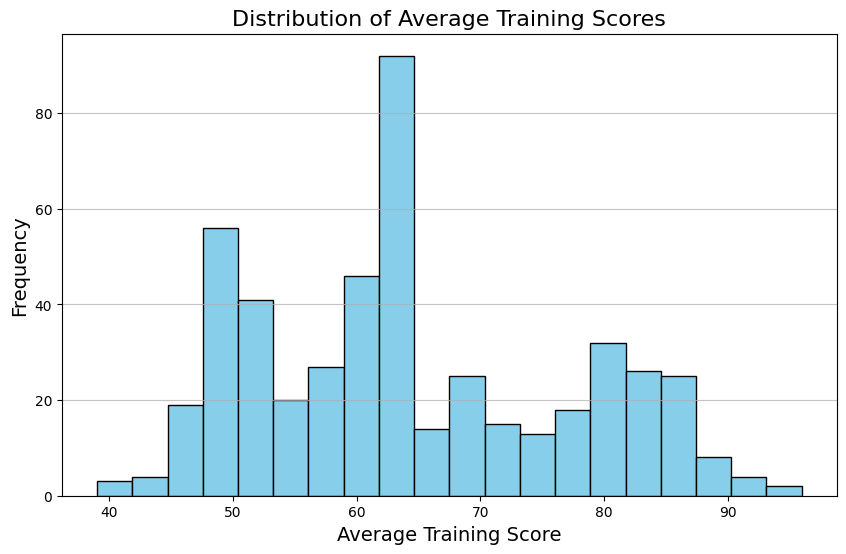

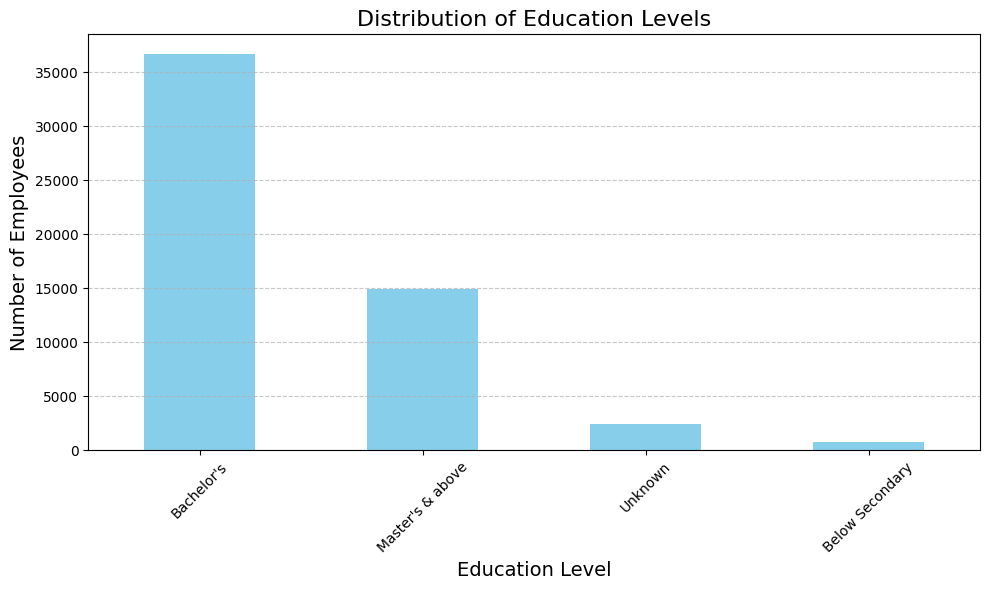

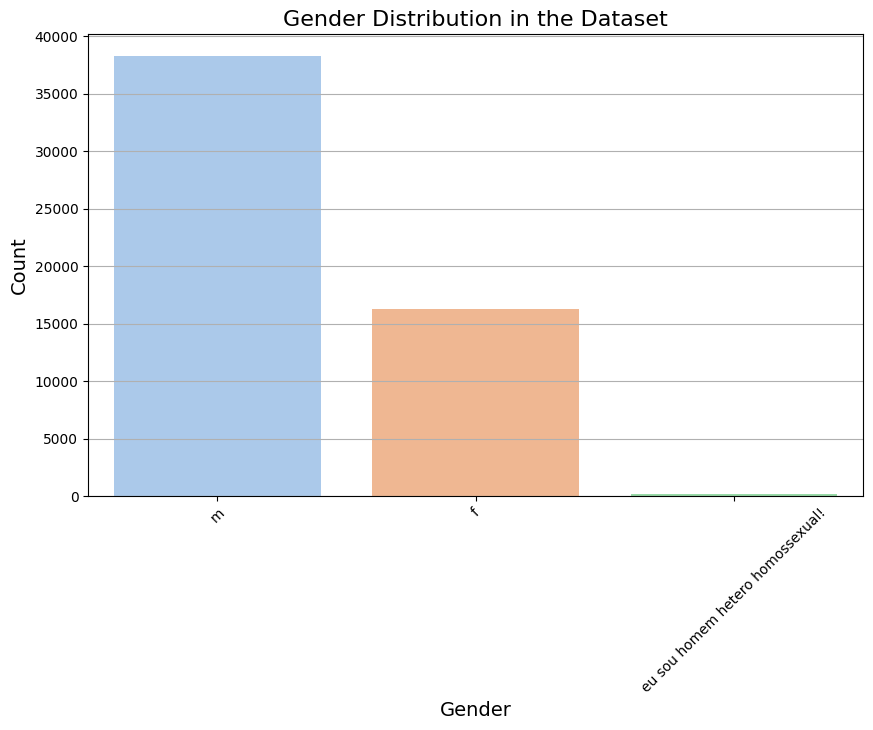

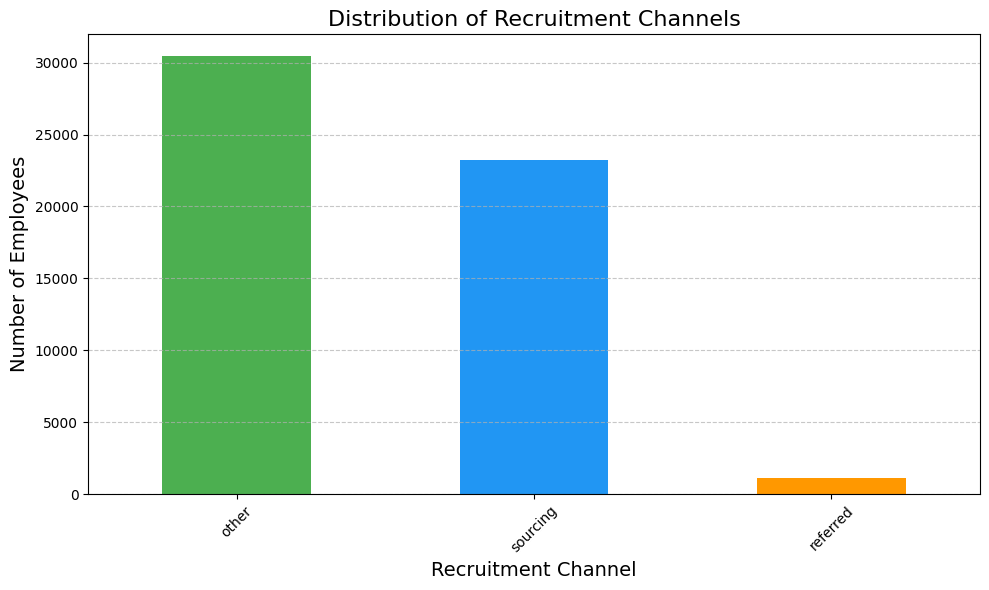

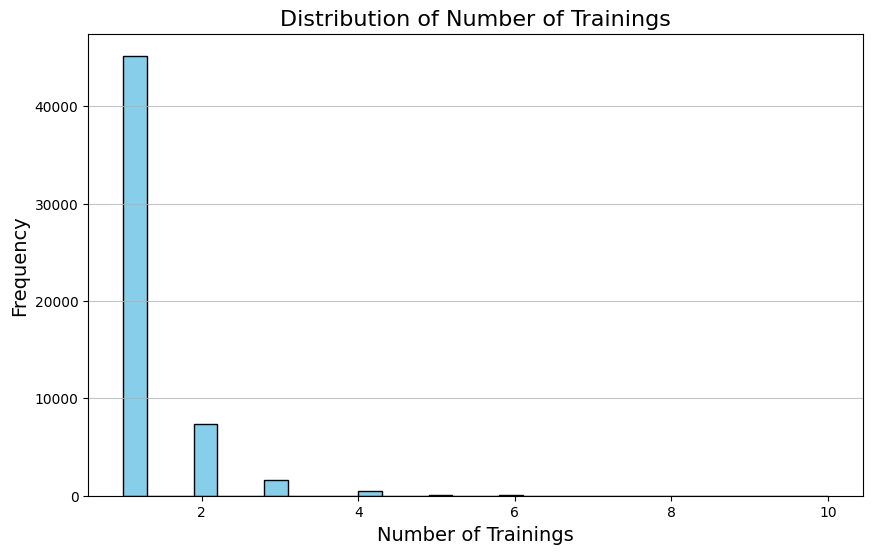

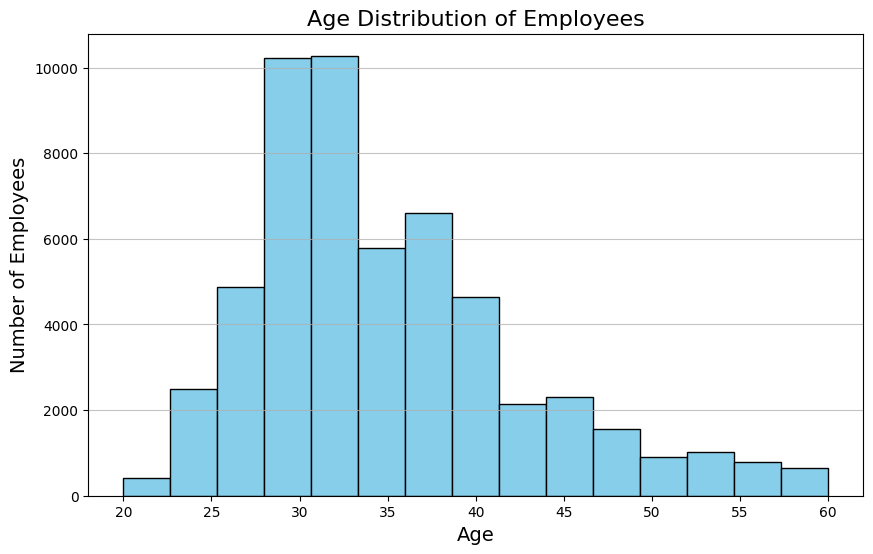

{'image_description': "The graphic is a histogram titled 'Age Distribution of Employees'. The x-axis represents the age of employees, ranging from 20 to 60 years, while the y-axis indicates the number of employees, with values ranging from 0 to 10,000. The histogram is composed of several bars, with the height of each bar representing the count of employees within specific age ranges. The bars are colored light blue and outlined in black.", 'interpretation_conclusion': 'The histogram reveals that the majority of employees are concentrated in the age range of 30 to 35 years, with the highest peak reaching over 10,000 employees. There is a gradual decline in the number of employees as age increases beyond 35, indicating a potential trend of younger employees in the workforce. This could suggest a youthful demographic in the organization, which may have implications for workforce planning and succession strategies.'}
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset


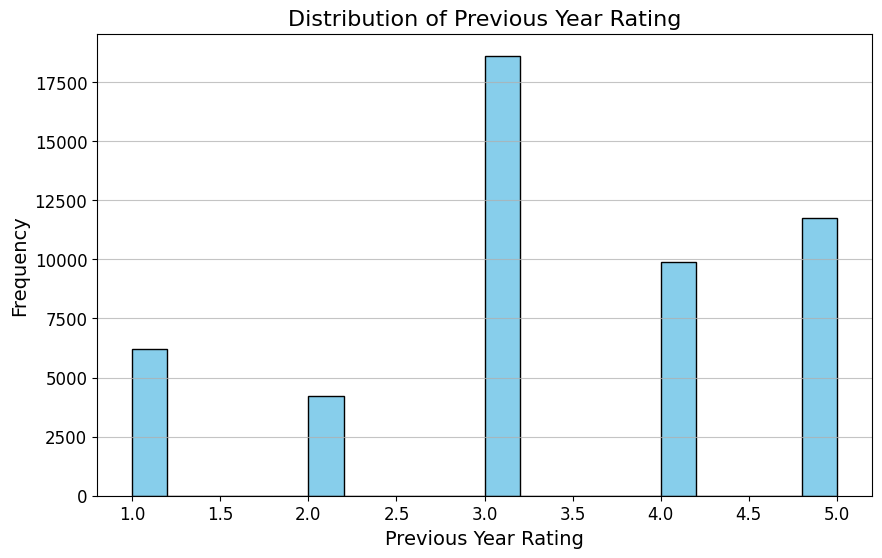

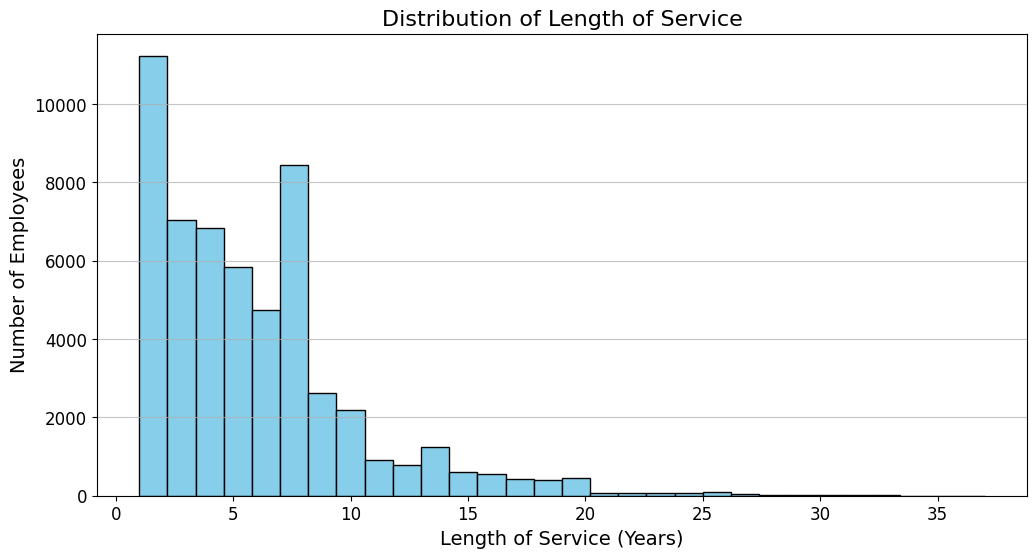

{'description': 'Info que queremos sobre a imagem', 'properties': {'image_description': 'The graphic is a histogram displaying the distribution of the length of service of employees. The x-axis represents the length of service in years, ranging from 0 to 35 years, while the y-axis indicates the number of employees, with values ranging from 0 to 10,000. The bars are colored light blue and show a right-skewed distribution, with higher frequencies of employees having shorter lengths of service.', 'interpretation_conclusion': 'The histogram indicates that a significant number of employees have a short length of service, particularly between 0 and 5 years. The frequency decreases as the length of service increases, suggesting a high turnover rate or that many employees are relatively new. This could imply potential challenges in employee retention or indicate growth and hiring trends within the organization.'}, 'required': ['image_description', 'interpretation_conclusion']}
import pandas as

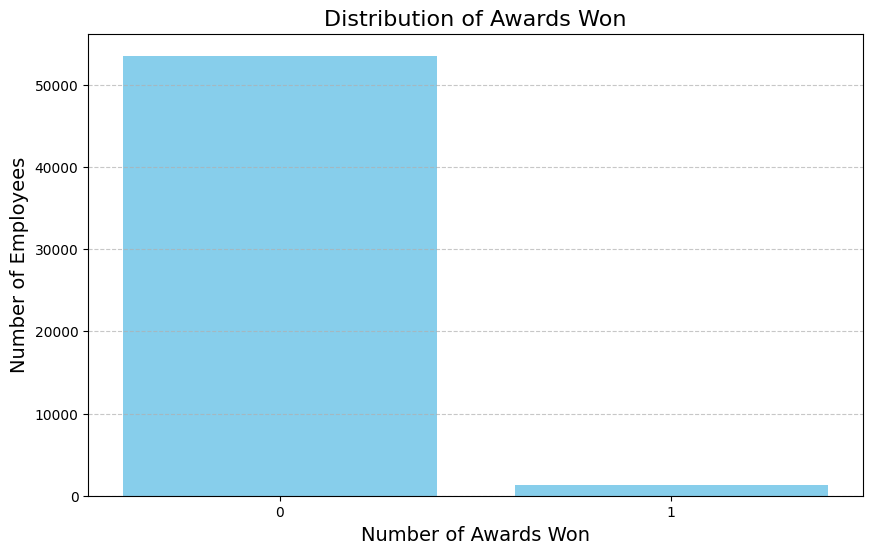

{'image_description': "The graphic is a bar chart titled 'Distribution of Awards Won'. The x-axis represents the 'Number of Awards Won', with values ranging from 0 to 1. The y-axis indicates the 'Number of Employees', with values ranging from 0 to 60,000. The bar for '0 Awards Won' is significantly taller, reaching over 50,000 employees, while the bar for '1 Award Won' is much shorter, indicating a very small number of employees.", 'interpretation_conclusion': 'The chart illustrates a clear disparity in the distribution of awards among employees. The overwhelming majority of employees have not won any awards, while only a few have won one award. This suggests that awards may be rare or that the criteria for receiving awards are stringent, resulting in a low number of award recipients.'}
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Cv/datasetEmpresa.csv')

# Check for missing values in avg_training_score and fill them w

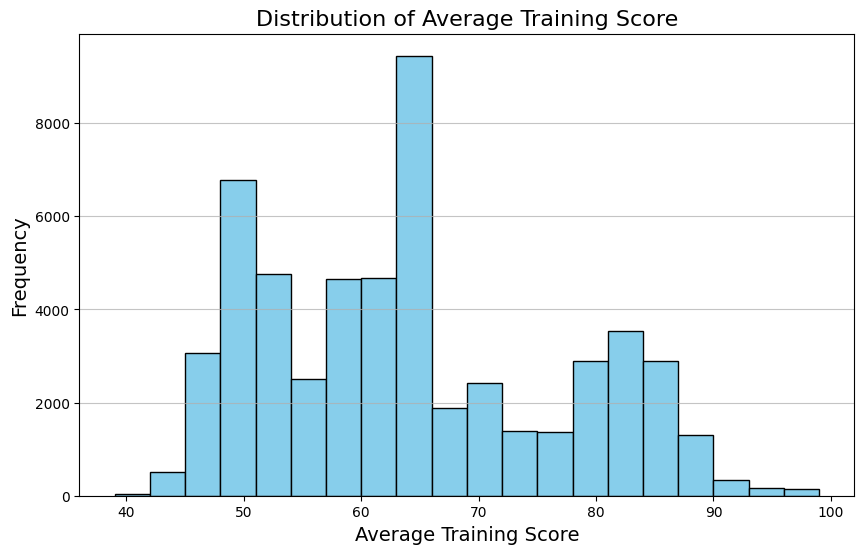

{'image_description': "The graphic is a histogram titled 'Distribution of Average Training Score'. The x-axis represents 'Average Training Score' ranging from 40 to 100, while the y-axis represents 'Frequency', indicating the number of occurrences for each score range. The bars are colored light blue, with varying heights showing the frequency of scores within specific intervals. The histogram displays a clear peak around the 60-70 score range, with a noticeable drop-off for scores above 80.", 'interpretation_conclusion': 'The histogram indicates that the majority of average training scores cluster between 50 and 70, with the highest frequency at around 60. This suggests that most participants scored in the lower to middle range, indicating potential areas for improvement in training effectiveness. The decrease in frequency for higher scores suggests that fewer individuals achieved scores above 80, pointing to a need for further analysis on the factors influencing training outcomes.'}


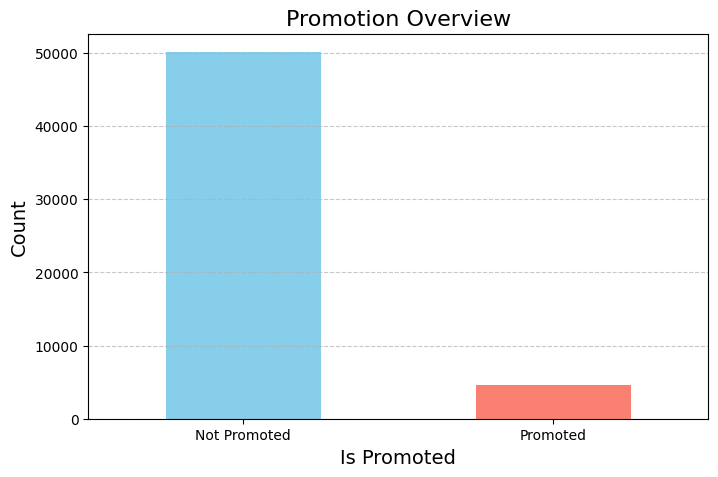

In [ ]:
import time
start_time = time.time()
h, custo, imgs = loop_inicio_e_feature_individual(
    lista_features=features,
    tipo_analise_feature=tipo_analise_feature,
    tipo_analise_geral=tipo_analise_geral,
    modelo_para_geral=modelo,
    modelo_para_feature=modelo,
    dataset=dataset_principal,
    historia_analise=None
)
end_time = time.time()
execution_time = end_time - start_time

In [ ]:
print(f"custo: {custo}$ e o tempo foi de: {execution_time/60}min")

custo: 0.12972809999999999$ e o tempo foi de: 3.1807915568351746min


In [ ]:
def loop_relacao_features(lista_features, tipo_analise_feature, modelo_para_feature, dataset, historia_analise = None):
  #Fazer a mesma coisa que a função de cima mas relacionando as features todas
  if historia_analise == None:
    historia_analise = ChatMessageHistory()
  else:
    historia_anlise2 = historia_analise
  custo = 0.0
  imagens = []
  #não precisa da analise geral
  #pra não fazer n quadrado analises que seria demorado e caro
  target = lista_features[-1]
  lista_feature = lista_features[:len(lista_features)-2]

  for feature in lista_features:
    objeto_de_analise = f'{feature} and {target}'
    output, cb, history = gera_grafico(modelo = modelo_para_feature, foco ="some features" , path_df = path_geral, tipo_analise = tipo_analise_feature , dataset_usado = dataset, objeto_de_analise = objeto_de_analise)
    custo += trata_cb(cb)
    print(output)
    exec(output)
    img_path = pegar_path(modelo = modelo_para_feature, history = history)
    #print(img_path)
    imagens.append(img_path)
    cb, analise = get_image_informations(img_path)
    custo += trata_cb(cb)
    historia_anlise2.add_ai_message(str(analise))
    print(analise)
    #printo a analise msm?
  return historia_anlise2, custo, imagens


In [ ]:
tipo_analise_feature = 'Please I want a general overview of the correlation between the features and the target, which is the "is_promoted" in the given dataset, never try to generate a correlation_matrix .'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Cv/datasetEmpresa.csv')

# Clean the dataset
df['education'].fillna('Unknown', inplace=True)

# Create a count plot for education vs is_promoted
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', hue='is_promoted', palette='Set2')
plt.title('Promotion Count by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Is Promoted', loc='upper right', labels=['Not Promoted', 'Promoted'])
plt.tight_layout()

# Save the plot
plt.savefig('/content/education_vs_promotion.png')
{'image_description': "The graphic is a bar chart titled 'Promotion Count by Education Level'. The x-axis represents different education levels: 'Master's & above', 'Bachelor's', 'Unknown', and 'Below Secondary'. The y-axis shows the count of promotions, ranging from 0 to 35000. Eac

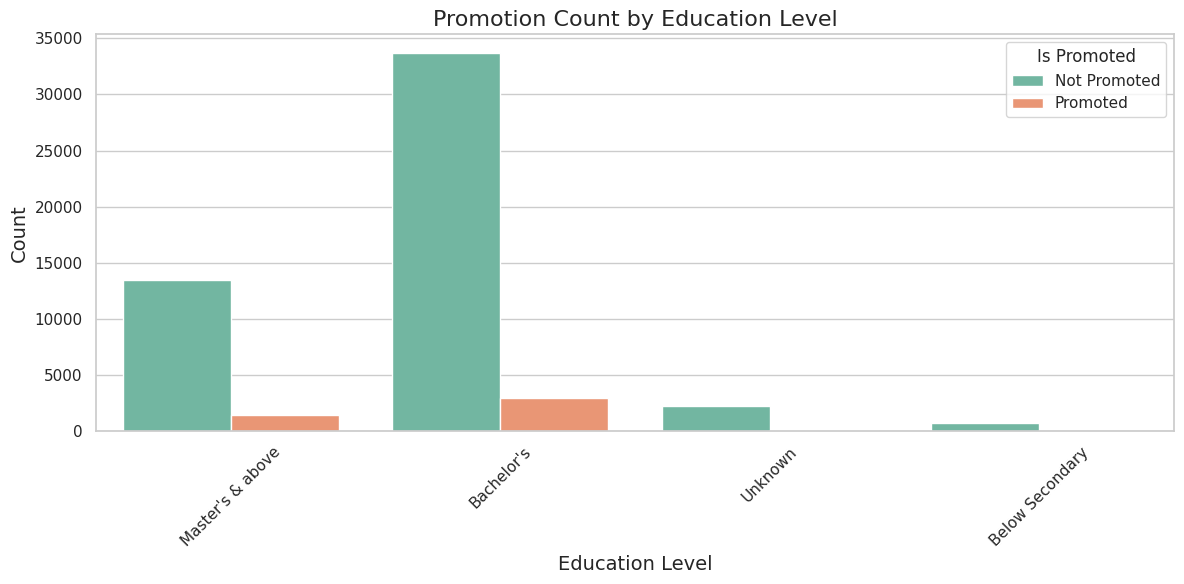

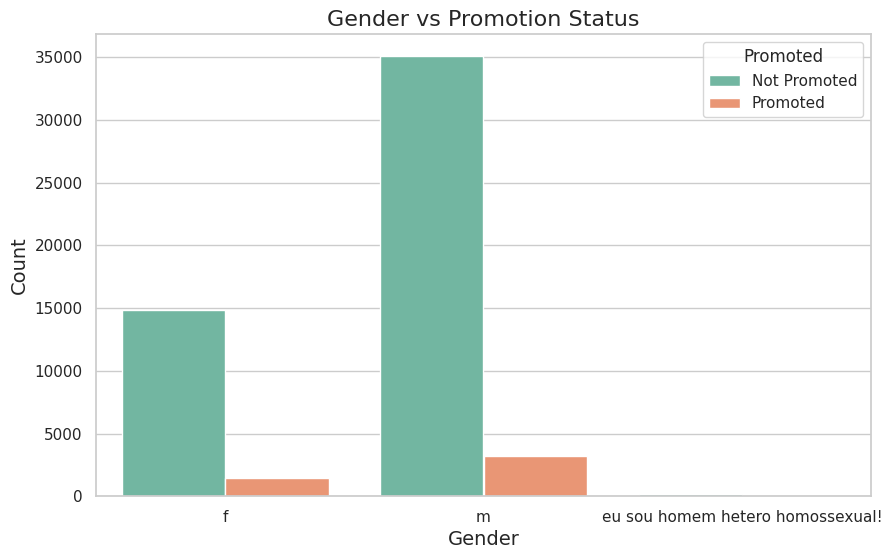

{'image_description': "The graphic is a bar chart illustrating the relationship between gender and promotion status. The x-axis represents gender with categories labeled 'f' (female), 'm' (male), and an additional label that appears to be a personal statement. The y-axis indicates the count of individuals in each category. There are two bars for each gender: one representing those who were promoted (shown in orange) and another for those who were not promoted (shown in teal). The chart is titled 'Gender vs Promotion Status'.", 'interpretation_conclusion': "The chart indicates a significant disparity in promotion status between genders. The male category ('m') shows a much higher count of individuals, particularly for those who were promoted, compared to the female category ('f'). This suggests a potential gender imbalance in promotion opportunities. The additional label on the x-axis may indicate an unrelated personal statement, which could distract from the primary analysis of gender 

<string>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



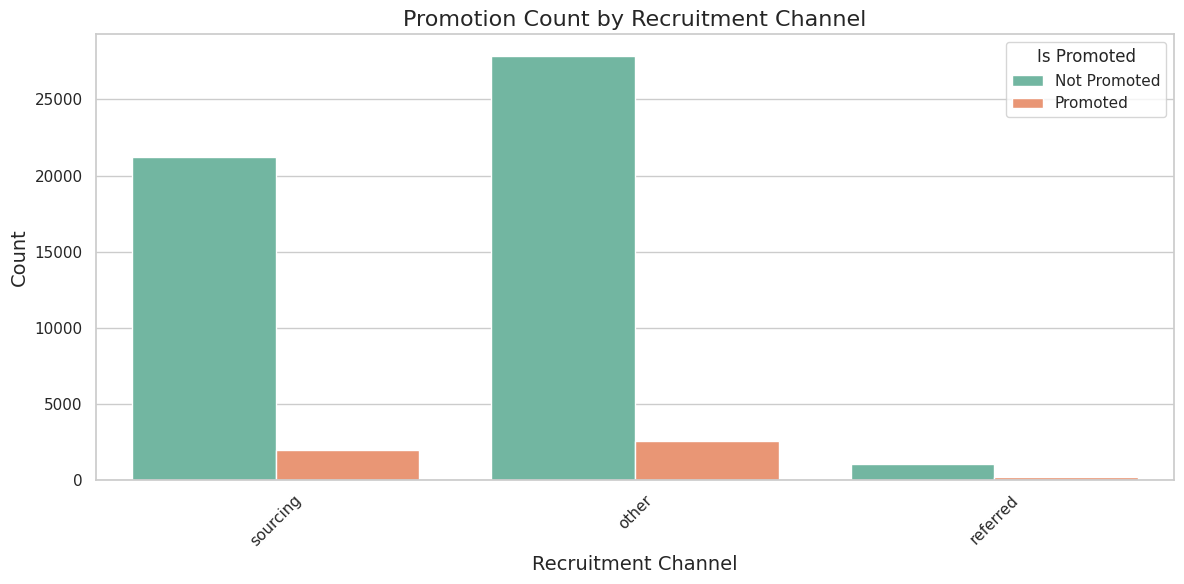

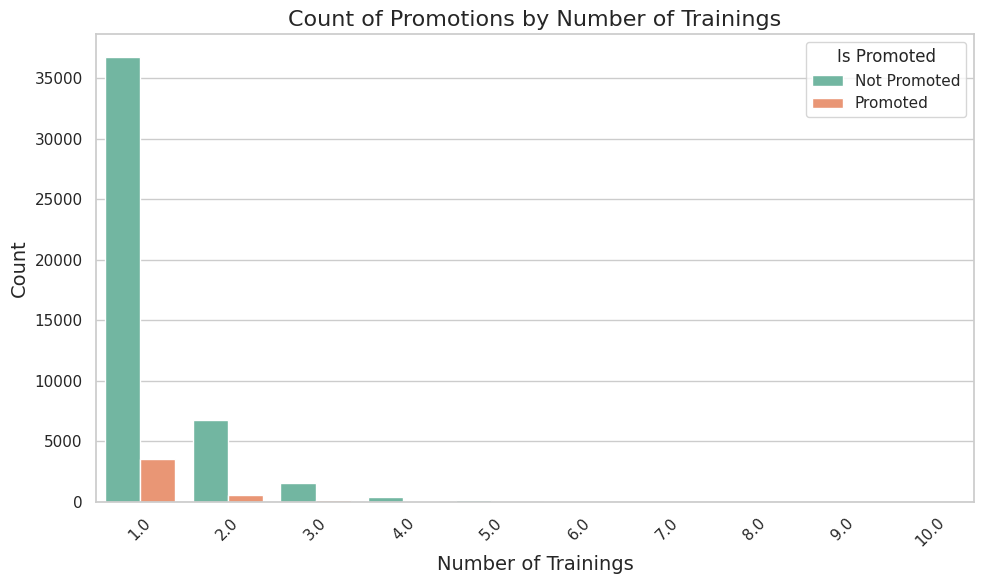

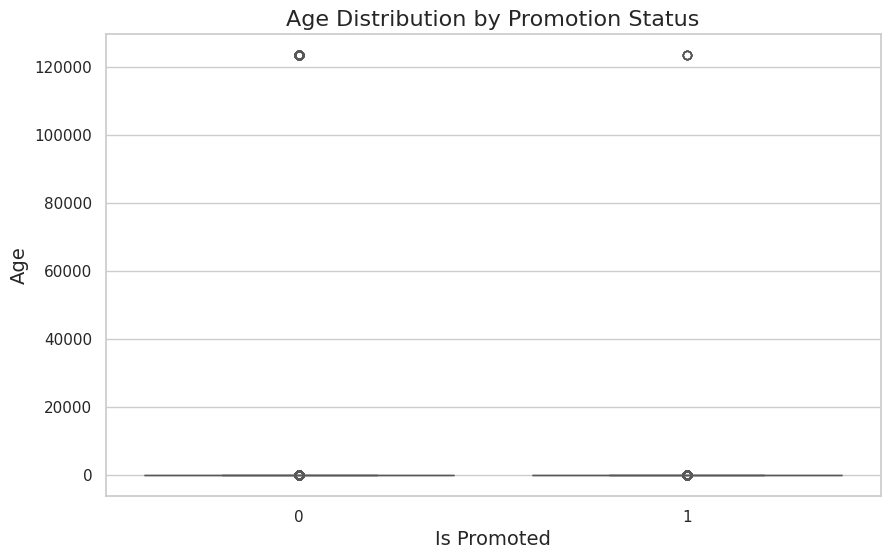

{'image_description': "The graphic is a box plot titled 'Age Distribution by Promotion Status'. The x-axis represents 'Is Promoted', with two categories: 0 (not promoted) and 1 (promoted). The y-axis represents 'Age', with values ranging from 0 to approximately 120,000. The plot displays the distribution of ages for individuals based on their promotion status, with the box indicating the interquartile range and the line within it representing the median age.", 'interpretation_conclusion': 'The box plot indicates that the majority of ages are clustered at the lower end of the scale, suggesting that most individuals, regardless of promotion status, are relatively young. The absence of significant variation in age for either promotion category implies that promotion status may not be strongly correlated with age. Further analysis may be needed to understand other factors influencing promotion.'}
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset


<string>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



{'image_description': "The graphic is a box plot comparing 'Previous Year Rating' against 'Is Promoted'. The x-axis represents the 'Is Promoted' variable, with two categories: 0 (not promoted) and 1 (promoted). The y-axis shows the 'Previous Year Rating' ranging from 1 to 5. Each box plot displays the median, quartiles, and potential outliers for the ratings of the two groups.", 'interpretation_conclusion': 'The box plot indicates that employees who were promoted (1) have a higher median rating (approximately 4.0) compared to those who were not promoted (0), whose median rating is around 3.5. The interquartile range (IQR) is also larger for the promoted group, suggesting greater variability in ratings. This may imply that promotions are associated with higher performance ratings, although further analysis would be needed to establish causation.'}
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Cv/dat

<string>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



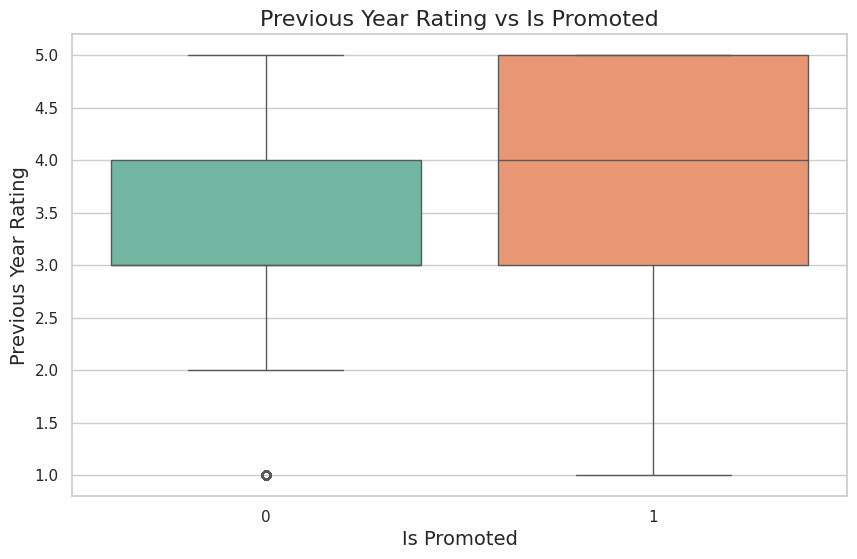

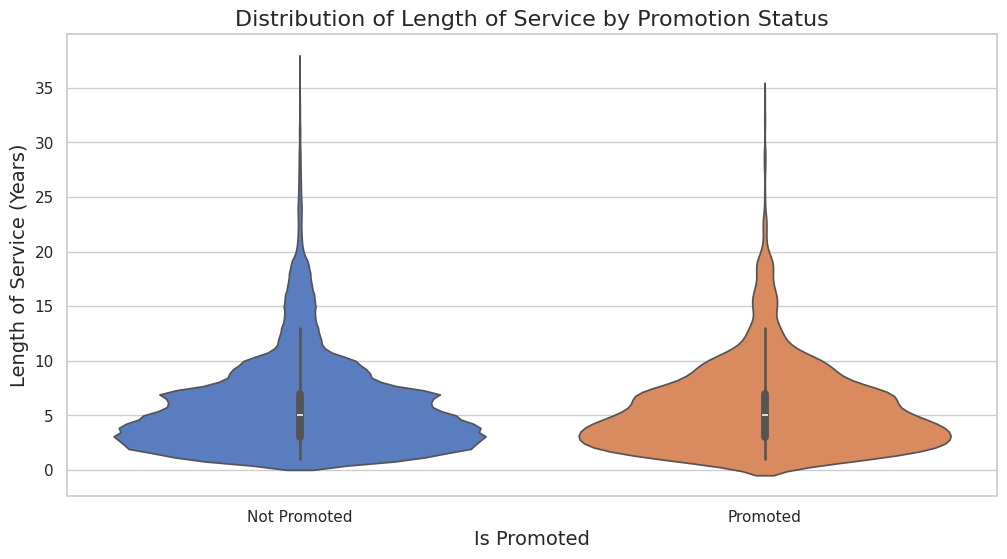

{'image_description': "The graphic is a violin plot displaying the distribution of 'Length of Service' (in years) based on 'Promotion Status'. The x-axis represents 'Is Promoted' with two categories: 'Not Promoted' (left) and 'Promoted' (right). The y-axis indicates 'Length of Service (Years)', ranging from 0 to 35. Each violin shape shows the density of data points, with wider sections indicating more data points at those lengths of service. The plot also includes box plots within each violin to indicate the median and interquartile ranges.", 'interpretation_conclusion': "The violin plot illustrates a notable difference in the length of service between promoted and not promoted employees. The distribution for 'Not Promoted' employees is wider and more spread out, suggesting a greater variability in years of service. In contrast, the 'Promoted' group shows a more concentrated distribution around the lower range of service years. This may indicate that promotions are more common among e

<string>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



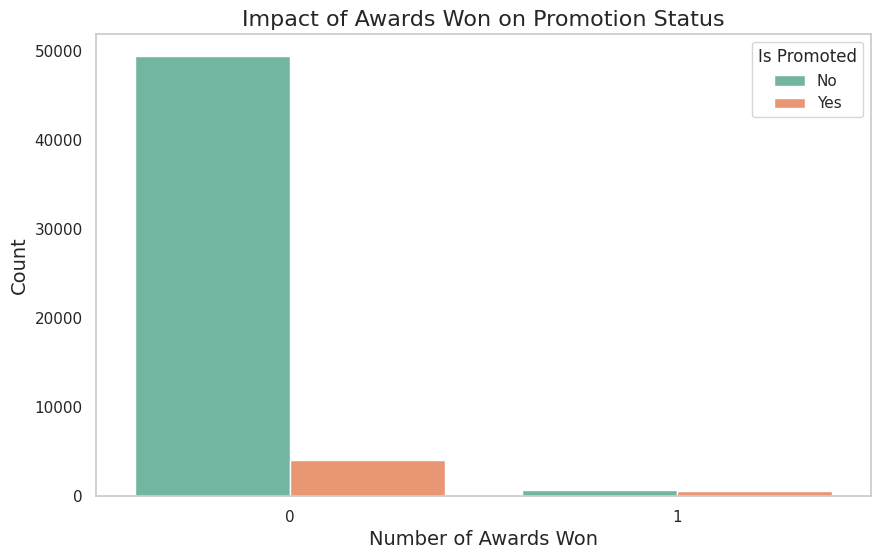

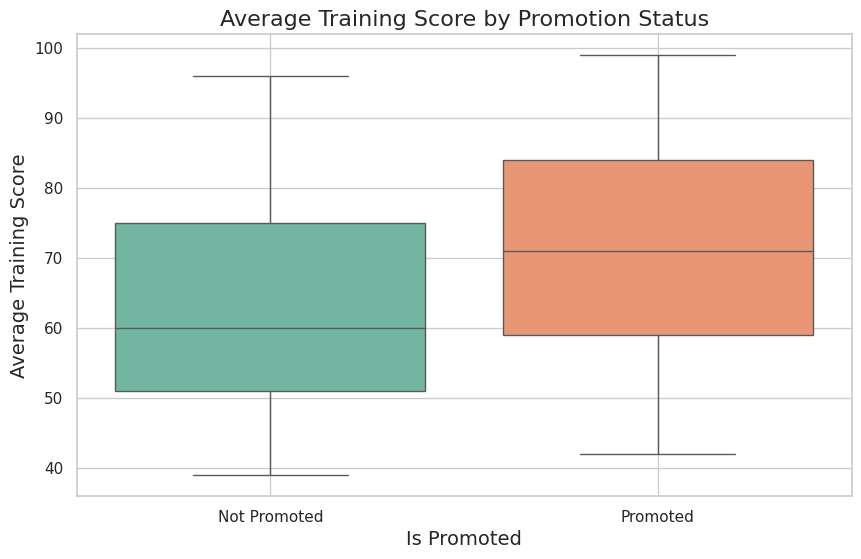

{'image_description': "The graphic is a box plot representing the average training scores categorized by promotion status. The x-axis shows two categories: 'Not Promoted' and 'Promoted'. The y-axis indicates the average training score, ranging from 40 to 100. Each box represents the interquartile range (IQR) of the scores, with a line inside the box indicating the median score. The whiskers extend to the minimum and maximum scores within 1.5 times the IQR.", 'interpretation_conclusion': "The box plot reveals that individuals who are promoted tend to have higher average training scores compared to those who are not promoted. The median score for the 'Promoted' group is noticeably higher than that of the 'Not Promoted' group, suggesting a positive correlation between promotion status and training performance. Additionally, the spread of scores for the 'Not Promoted' group is wider, indicating more variability in training scores among those not promoted."}
import pandas as pd
import matpl

<string>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



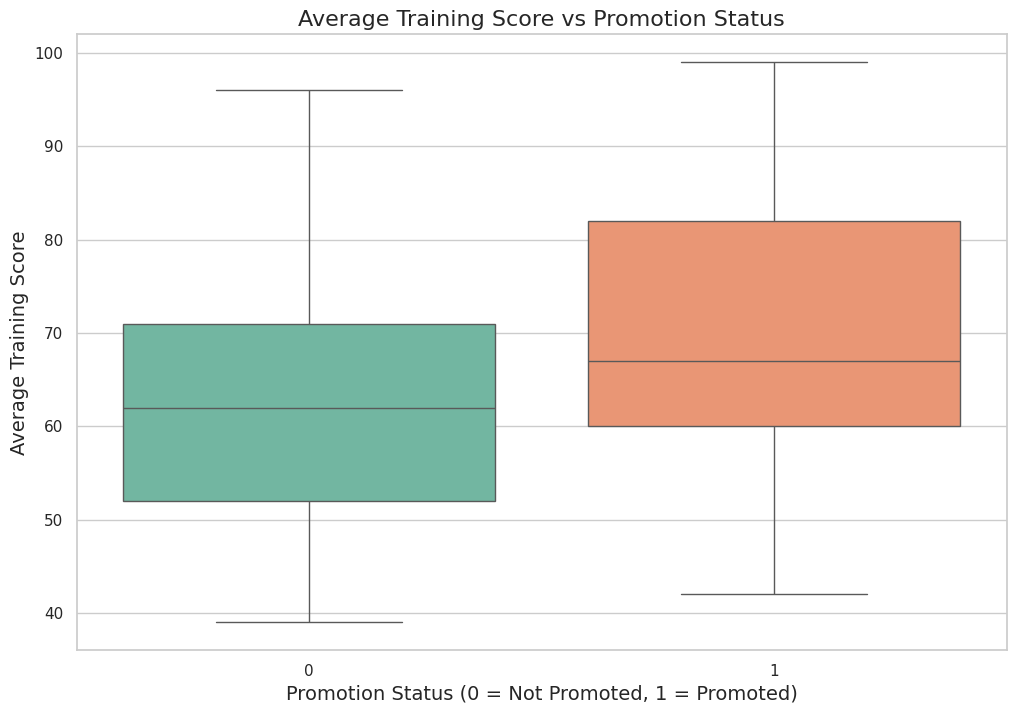

{'image_description': "The graphic is a box plot comparing the average training scores based on promotion status. The x-axis represents the promotion status, with '0' indicating not promoted and '1' indicating promoted. The y-axis shows the average training score, ranging from 40 to 100. Each box represents the interquartile range (IQR) of scores for each promotion status, with the line inside each box indicating the median score. The whiskers extend to the minimum and maximum scores within 1.5 times the IQR from the quartiles.", 'interpretation_conclusion': 'The box plot indicates that employees who were promoted (1) have a higher average training score compared to those who were not promoted (0). The median score for the promoted group is visibly higher than that of the non-promoted group. Additionally, the range of scores for both groups shows that the promoted group has less variability in scores, suggesting a more consistent performance among those who were promoted. This could im

In [ ]:
import time
start_time = time.time()
h2, custo2, imgs2 = loop_relacao_features(
    lista_features=features,
    tipo_analise_feature=tipo_analise_feature,
    modelo_para_feature=modelo,
    dataset=dataset_principal,
    historia_analise=h
)
end_time = time.time()
execution_time = end_time - start_time

In [ ]:
print(f"custo: {custo2}$ e o tempo foi de: {execution_time/60}min")

custo: 0.12481064999999998$ e o tempo foi de: 2.937804174423218min


In [ ]:
hist = h.messages[:10]
hist2 = h2.messages[len(hist):]
len(hist), len(hist2)

(10, 10)

In [ ]:
def visu_geral(imagens, historia_analises, imagens2, historia_analises2, conclusao):
  hist = historia_analises.messages[:10]
  hist2 = historia_analises2.messages[len(hist):]
  if len(imagens) != len(hist):
    raise ValueError("O número de imagens deve ser igual ao número de análises.")
  if len(imagens2) != len(hist2):
    raise ValueError("O número de imagens deve ser igual ao número de análises 2.")
  for img_path, analise in zip(imagens, hist):
      img = mpimg.imread(img_path)
      plt.figure(figsize=(8, 6))
      plt.imshow(img)
      plt.axis('off')
      plt.show()

      display(Markdown(analise.content))
  for img_path2, analise2 in zip(imagens2, hist2):
    img = mpimg.imread(img_path2)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    display(Markdown(analise2.content))

  display(Markdown(conclusao))
  '''arrumar isso aqui certinho depois'''

In [ ]:
c, cust_conc = conclusao(historia = h2)
print(f"custo da conclusão: {cust_conc}$")

custo da conclusão: 0.0012158999999999998$


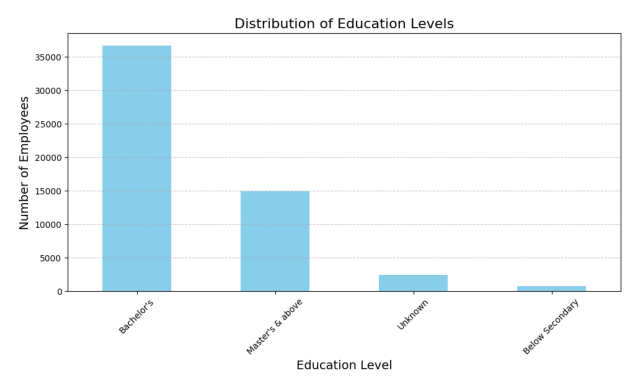

{'image_description': "The graphic is a histogram titled 'Distribution of Average Training Scores'. The x-axis represents 'Average Training Score' ranging from 40 to 90, while the y-axis represents 'Frequency' ranging from 0 to 100. The histogram consists of several bars, with varying heights indicating the frequency of scores within specific ranges. Notably, there is a peak around the score of 60, indicating a high frequency of scores in that range.", 'interpretation_conclusion': 'The histogram reveals that the majority of average training scores cluster around the 60 mark, suggesting that many participants scored in this range. The distribution appears slightly skewed, with fewer scores in the lower (40-50) and higher (80-90) ranges. This indicates that while most participants performed moderately, there are some outliers with both low and high scores. Overall, the data suggests a need for further analysis to understand the factors contributing to the average performance.'}

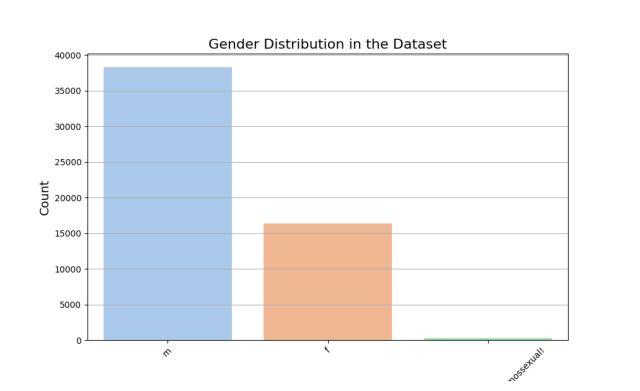

{'image_description': "The graphic is a bar chart titled 'Distribution of Education Levels'. The x-axis represents different education levels, including 'Bachelor's', 'Master's & above', 'Unknown', and 'Below Secondary'. The y-axis indicates the 'Number of Employees', ranging from 0 to 35000. Each bar is colored light blue, with the tallest bar corresponding to 'Bachelor's' education level, followed by 'Master's & above', while 'Unknown' and 'Below Secondary' have significantly shorter bars.", 'interpretation_conclusion': "The bar chart clearly shows that the majority of employees have a Bachelor's degree, with over 35,000 individuals in this category. The second highest group is those with a Master's degree or higher, with a substantial but lesser number of employees. The 'Unknown' and 'Below Secondary' education levels represent a very small fraction of the total employee count, indicating that most employees have at least a Bachelor's degree. This could suggest a trend towards higher educational attainment in the workforce."}

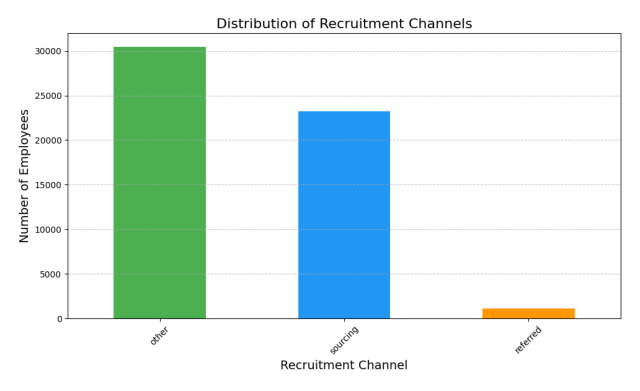

{'image_description': "The graphic is a bar chart titled 'Gender Distribution in the Dataset'. The x-axis represents different gender categories, including 'm' for male, 'f' for female, and a very small representation for 'non-binary'. The y-axis shows the count of individuals in each gender category, ranging from 0 to 40000. The bars are colored blue for males and orange for females, with a very minimal representation for the non-binary category, indicated by a green bar.", 'interpretation_conclusion': 'The bar chart clearly indicates a significant gender imbalance in the dataset, with males (m) being the predominant group at over 35,000 individuals, while females (f) are represented by approximately 20,000 individuals. The non-binary category has an extremely low count, suggesting that this gender identity is underrepresented in the dataset. This information may highlight a need for more inclusive data collection methods to better represent diverse gender identities.'}

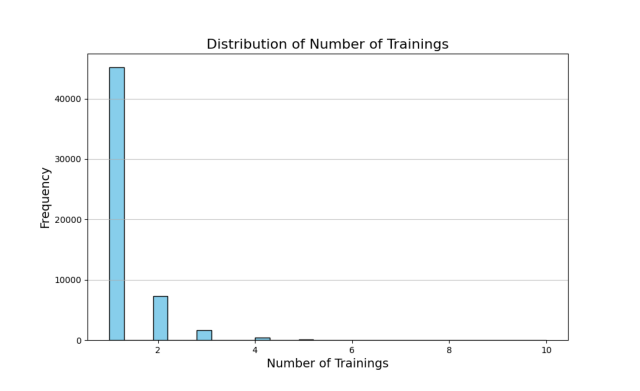

{'image_description': "The graphic is a bar chart titled 'Distribution of Recruitment Channels'. The x-axis represents different recruitment channels labeled as 'other', 'sourcing', and 'referred'. The y-axis indicates the number of employees, ranging from 0 to 30,000. The bars are colored green for 'other', blue for 'sourcing', and orange for 'referred'. The 'other' channel has the highest number of employees, followed by 'sourcing', with 'referred' showing a significantly lower count.", 'interpretation_conclusion': "The bar chart illustrates a clear dominance of the 'other' recruitment channel, which accounts for the majority of employees. 'Sourcing' follows as a secondary channel, while 'referred' represents a minimal portion of the total. This suggests that alternative recruitment methods are far more effective or utilized than referrals. Organizations may want to explore and enhance their referral programs to balance the distribution of recruitment channels."}

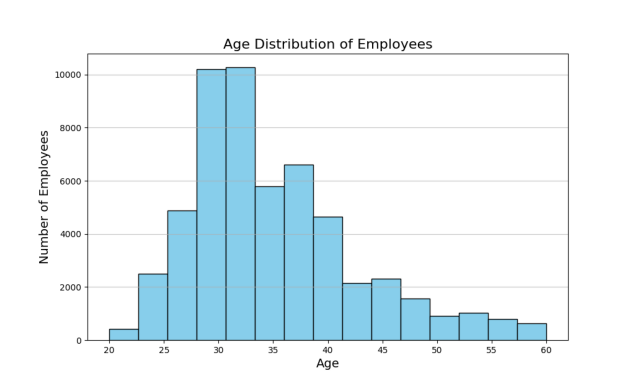

{'image_description': "The graphic is a histogram titled 'Distribution of Number of Trainings'. The x-axis represents the 'Number of Trainings', ranging from 0 to 10, while the y-axis shows the 'Frequency', indicating how many occurrences there are for each number of trainings. The histogram bars are light blue, with the tallest bar at the 2 trainings mark, reaching a frequency of over 40,000. The frequency decreases significantly for higher numbers of trainings, with very few occurrences beyond 4 trainings.", 'interpretation_conclusion': 'The histogram indicates that the majority of the data points are concentrated around 2 trainings, suggesting that this is the most common number of trainings observed. There is a rapid decline in frequency as the number of trainings increases, indicating that very few instances have more than 2 or 3 trainings. This distribution suggests a potential preference or limitation in the number of trainings undertaken, which could be important for understanding training behaviors or constraints in the dataset.'}

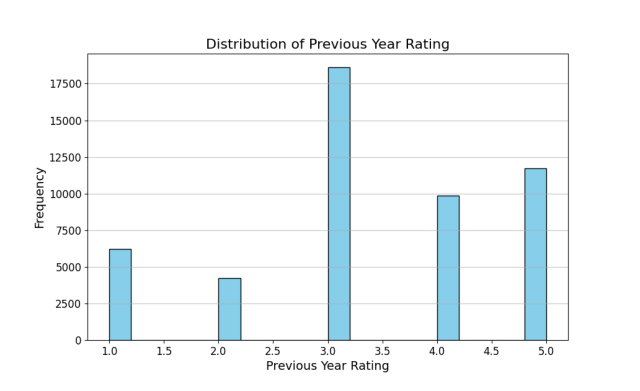

{'image_description': "The graphic is a histogram titled 'Age Distribution of Employees'. The x-axis represents the age of employees, ranging from 20 to 60 years, while the y-axis indicates the number of employees, with values ranging from 0 to 10,000. The histogram is composed of several bars, with the height of each bar representing the count of employees within specific age ranges. The bars are colored light blue and outlined in black.", 'interpretation_conclusion': 'The histogram reveals that the majority of employees are concentrated in the age range of 30 to 35 years, with the highest peak reaching over 10,000 employees. There is a gradual decline in the number of employees as age increases beyond 35, indicating a potential trend of younger employees in the workforce. This could suggest a youthful demographic in the organization, which may have implications for workforce planning and succession strategies.'}

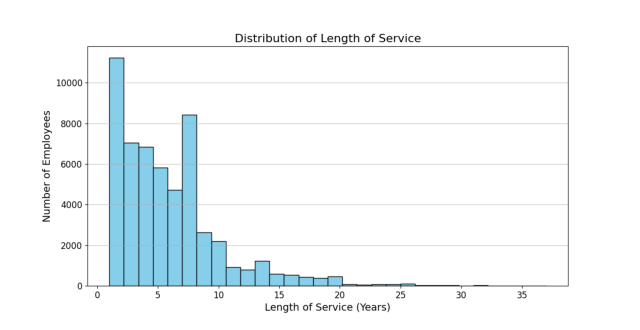

{'image_description': "The graphic is a histogram titled 'Distribution of Previous Year Rating'. The x-axis represents the 'Previous Year Rating' with values ranging from 1.0 to 5.0, marked at intervals of 0.5. The y-axis represents 'Frequency', indicating the number of occurrences for each rating. The bars are colored light blue, with varying heights corresponding to the frequency of each rating. The highest frequency is observed at a rating of 3.0, followed by lower frequencies at other ratings.", 'interpretation_conclusion': 'The histogram indicates that the majority of ratings for the previous year clustered around 3.0, suggesting a neutral perception among respondents. Ratings of 1.0 and 2.0 show lower frequencies, while ratings of 4.0 and 5.0 also have moderate frequencies. This distribution may imply that while there are some positive ratings, a significant portion of the responses are centered around a middle rating, indicating potential areas for improvement.'}

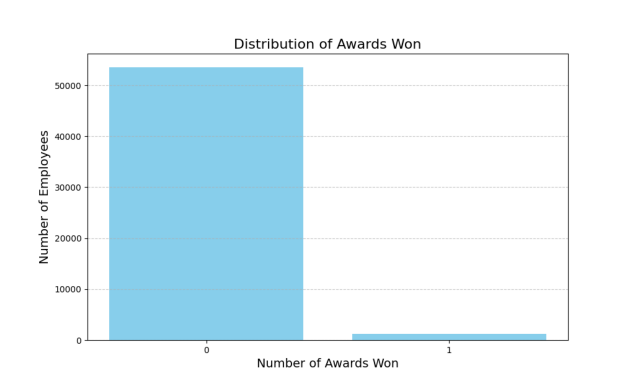

{'description': 'Info que queremos sobre a imagem', 'properties': {'image_description': 'The graphic is a histogram displaying the distribution of the length of service of employees. The x-axis represents the length of service in years, ranging from 0 to 35 years, while the y-axis indicates the number of employees, with values ranging from 0 to 10,000. The bars are colored light blue and show a right-skewed distribution, with higher frequencies of employees having shorter lengths of service.', 'interpretation_conclusion': 'The histogram indicates that a significant number of employees have a short length of service, particularly between 0 and 5 years. The frequency decreases as the length of service increases, suggesting a high turnover rate or that many employees are relatively new. This could imply potential challenges in employee retention or indicate growth and hiring trends within the organization.'}, 'required': ['image_description', 'interpretation_conclusion']}

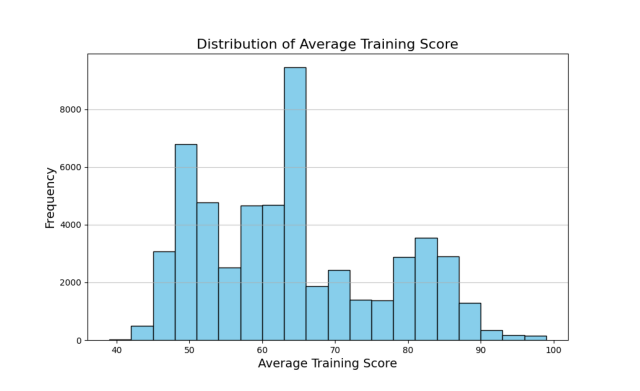

{'image_description': "The graphic is a bar chart titled 'Distribution of Awards Won'. The x-axis represents the 'Number of Awards Won', with values ranging from 0 to 1. The y-axis indicates the 'Number of Employees', with values ranging from 0 to 60,000. The bar for '0 Awards Won' is significantly taller, reaching over 50,000 employees, while the bar for '1 Award Won' is much shorter, indicating a very small number of employees.", 'interpretation_conclusion': 'The chart illustrates a clear disparity in the distribution of awards among employees. The overwhelming majority of employees have not won any awards, while only a few have won one award. This suggests that awards may be rare or that the criteria for receiving awards are stringent, resulting in a low number of award recipients.'}

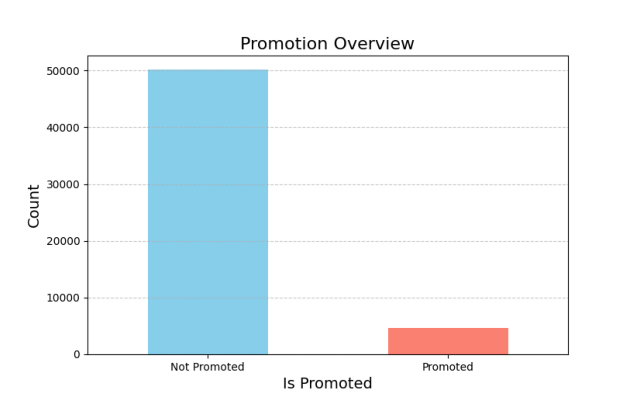

{'image_description': "The graphic is a histogram titled 'Distribution of Average Training Score'. The x-axis represents 'Average Training Score' ranging from 40 to 100, while the y-axis represents 'Frequency', indicating the number of occurrences for each score range. The bars are colored light blue, with varying heights showing the frequency of scores within specific intervals. The histogram displays a clear peak around the 60-70 score range, with a noticeable drop-off for scores above 80.", 'interpretation_conclusion': 'The histogram indicates that the majority of average training scores cluster between 50 and 70, with the highest frequency at around 60. This suggests that most participants scored in the lower to middle range, indicating potential areas for improvement in training effectiveness. The decrease in frequency for higher scores suggests that fewer individuals achieved scores above 80, pointing to a need for further analysis on the factors influencing training outcomes.'}

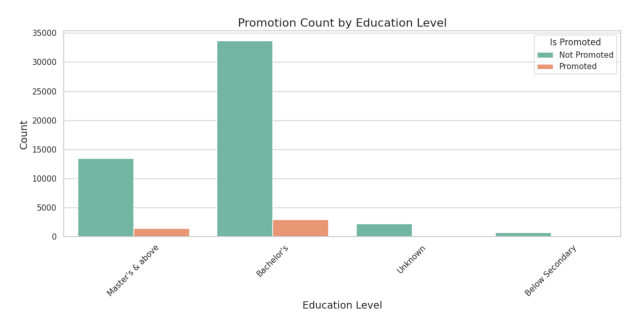

{'image_description': "The graphic is a bar chart titled 'Promotion Count by Education Level'. The x-axis represents different education levels: 'Master's & above', 'Bachelor's', 'Unknown', and 'Below Secondary'. The y-axis shows the count of promotions, ranging from 0 to 35000. Each education level has two bars: one for 'Promoted' (shown in light orange) and one for 'Not Promoted' (shown in light green). The bars for 'Bachelor's' education level are significantly taller than the others, indicating a higher count of promotions.", 'interpretation_conclusion': "The bar chart indicates a strong correlation between education level and promotion count, with individuals holding a Bachelor's degree being the most likely to be promoted. The data suggests that higher educational attainment (Master's & above) also leads to promotions, but the count is notably lower than that of Bachelor's. The 'Unknown' and 'Below Secondary' categories show minimal promotions, highlighting the importance of educational qualifications in career advancement."}

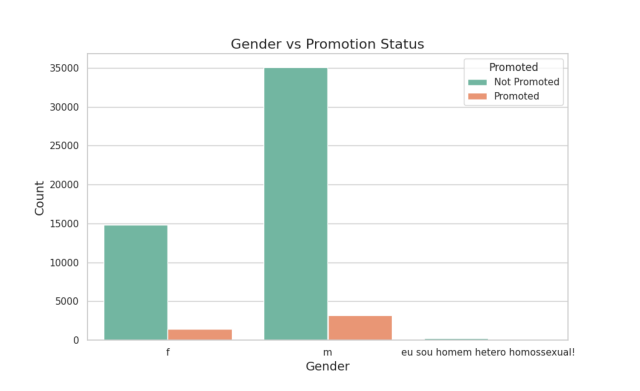

{'image_description': "The graphic is a bar chart illustrating the relationship between gender and promotion status. The x-axis represents gender with categories labeled 'f' (female), 'm' (male), and an additional label that appears to be a personal statement. The y-axis indicates the count of individuals in each category. There are two bars for each gender: one representing those who were promoted (shown in orange) and another for those who were not promoted (shown in teal). The chart is titled 'Gender vs Promotion Status'.", 'interpretation_conclusion': "The chart indicates a significant disparity in promotion status between genders. The male category ('m') shows a much higher count of individuals, particularly for those who were promoted, compared to the female category ('f'). This suggests a potential gender imbalance in promotion opportunities. The additional label on the x-axis may indicate an unrelated personal statement, which could distract from the primary analysis of gender and promotion status."}

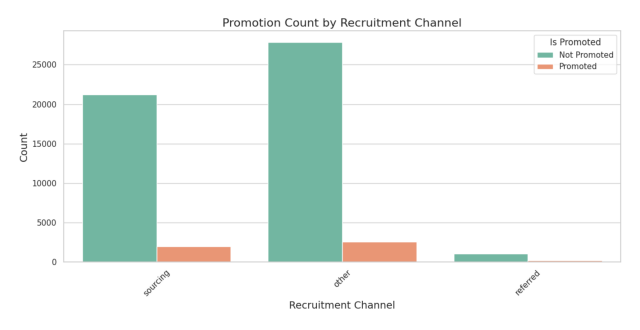

{'image_description': "The graphic is a bar chart displaying the count of promotions categorized by recruitment channel. The x-axis represents different recruitment channels: 'sourcing', 'other', and 'referred'. The y-axis indicates the count of promotions, ranging from 0 to over 25000. Two colors are used to differentiate between the promotion status: 'Not Promoted' (orange) and 'Promoted' (green). The bar for 'sourcing' is the tallest, indicating the highest count of promotions, while 'referred' shows the lowest counts.", 'interpretation_conclusion': "The chart indicates that the majority of promotions come from the 'sourcing' recruitment channel, significantly outpacing the other channels. This suggests that sourcing is an effective recruitment strategy for promotions, while 'referred' channels contribute minimally. Organizations may want to focus on enhancing their sourcing strategies to maximize promotion opportunities."}

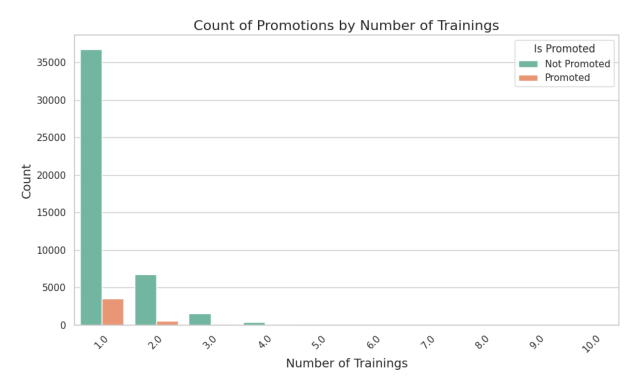

{'image_description': "The graphic is a bar chart titled 'Count of Promotions by Number of Trainings'. The x-axis represents the 'Number of Trainings', ranging from 0 to 10, while the y-axis indicates the 'Count' of individuals, with values ranging from 0 to 35000. The chart features two categories: 'Promoted' (shown in orange) and 'Not Promoted' (shown in light green), illustrating the count of promotions based on the number of trainings attended.", 'interpretation_conclusion': 'The chart indicates a strong correlation between the number of trainings and the likelihood of promotion. Most individuals have attended only one training, with a significantly higher count of those not promoted compared to those promoted. As the number of trainings increases, the count of promoted individuals remains relatively low, suggesting that attending more trainings does not necessarily lead to higher promotion rates. This could imply that other factors may influence promotions beyond just training attendance.'}

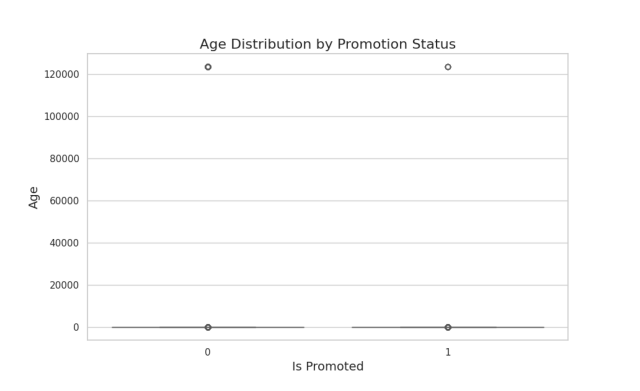

{'image_description': "The graphic is a box plot titled 'Age Distribution by Promotion Status'. The x-axis represents 'Is Promoted', with two categories: 0 (not promoted) and 1 (promoted). The y-axis represents 'Age', with values ranging from 0 to approximately 120,000. The plot displays the distribution of ages for individuals based on their promotion status, with the box indicating the interquartile range and the line within it representing the median age.", 'interpretation_conclusion': 'The box plot indicates that the majority of ages are clustered at the lower end of the scale, suggesting that most individuals, regardless of promotion status, are relatively young. The absence of significant variation in age for either promotion category implies that promotion status may not be strongly correlated with age. Further analysis may be needed to understand other factors influencing promotion.'}

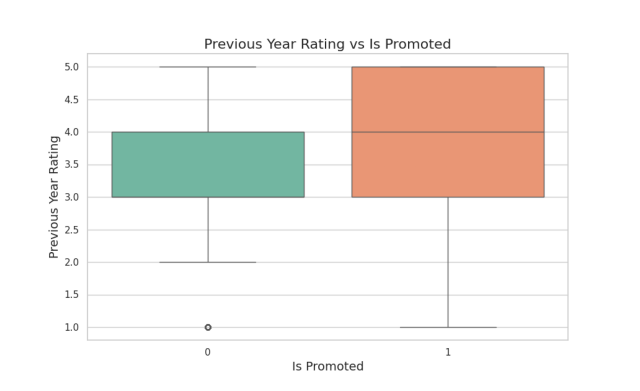

{'image_description': "The graphic is a box plot comparing 'Previous Year Rating' against 'Is Promoted'. The x-axis represents the 'Is Promoted' variable, with two categories: 0 (not promoted) and 1 (promoted). The y-axis shows the 'Previous Year Rating' ranging from 1 to 5. Each box plot displays the median, quartiles, and potential outliers for the ratings of the two groups.", 'interpretation_conclusion': 'The box plot indicates that employees who were promoted (1) have a higher median rating (approximately 4.0) compared to those who were not promoted (0), whose median rating is around 3.5. The interquartile range (IQR) is also larger for the promoted group, suggesting greater variability in ratings. This may imply that promotions are associated with higher performance ratings, although further analysis would be needed to establish causation.'}

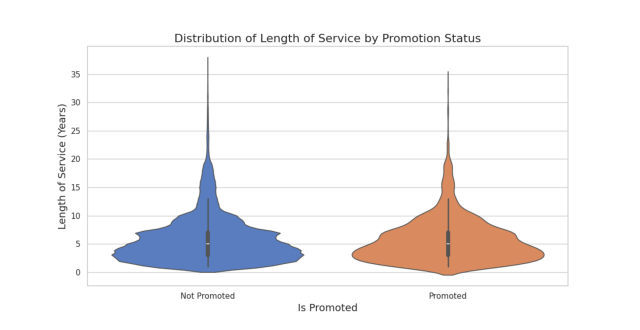

{'image_description': "The graphic is a violin plot displaying the distribution of 'Length of Service' (in years) based on 'Promotion Status'. The x-axis represents 'Is Promoted' with two categories: 'Not Promoted' (left) and 'Promoted' (right). The y-axis indicates 'Length of Service (Years)', ranging from 0 to 35. Each violin shape shows the density of data points, with wider sections indicating more data points at those lengths of service. The plot also includes box plots within each violin to indicate the median and interquartile ranges.", 'interpretation_conclusion': "The violin plot illustrates a notable difference in the length of service between promoted and not promoted employees. The distribution for 'Not Promoted' employees is wider and more spread out, suggesting a greater variability in years of service. In contrast, the 'Promoted' group shows a more concentrated distribution around the lower range of service years. This may indicate that promotions are more common among employees with fewer years of service, potentially reflecting a trend where newer employees are recognized for their contributions earlier in their careers."}

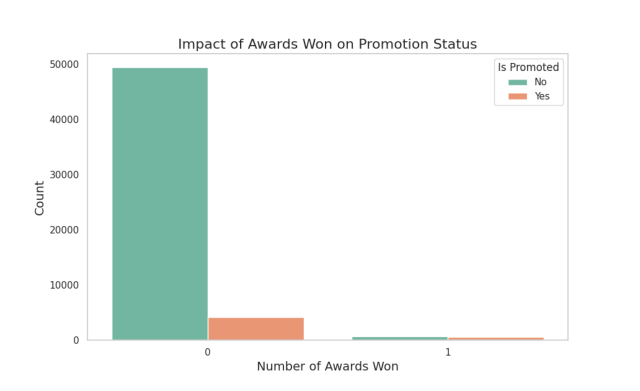

{'description': 'Info que queremos sobre a imagem', 'image_description': "The graphic is a bar chart titled 'Impact of Awards Won on Promotion Status'. The x-axis represents the 'Number of Awards Won' with values ranging from 0 to 1, while the y-axis indicates the 'Count' of individuals. There are two bars: one for individuals who were not promoted (shown in a teal color) and a smaller bar for those who were promoted (shown in an orange color). The chart shows a significant majority of individuals with zero awards who were not promoted, while very few individuals with awards were promoted.", 'interpretation_conclusion': 'The chart suggests that the majority of individuals in the dataset did not receive promotions, as indicated by the high count of individuals with zero awards. The minimal count of promoted individuals suggests that winning awards may have a limited impact on promotion status, or that promotions are influenced by other factors beyond awards won.'}

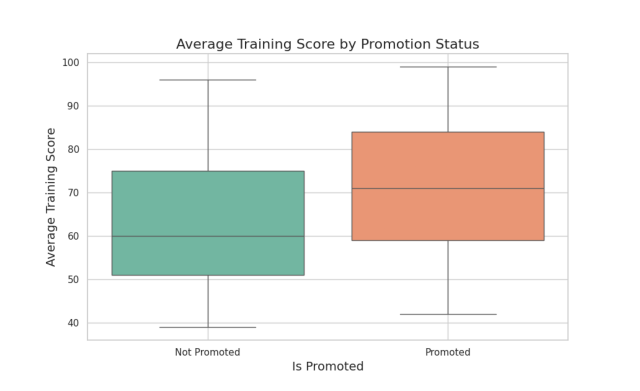

{'image_description': "The graphic is a box plot representing the average training scores categorized by promotion status. The x-axis shows two categories: 'Not Promoted' and 'Promoted'. The y-axis indicates the average training score, ranging from 40 to 100. Each box represents the interquartile range (IQR) of the scores, with a line inside the box indicating the median score. The whiskers extend to the minimum and maximum scores within 1.5 times the IQR.", 'interpretation_conclusion': "The box plot reveals that individuals who are promoted tend to have higher average training scores compared to those who are not promoted. The median score for the 'Promoted' group is noticeably higher than that of the 'Not Promoted' group, suggesting a positive correlation between promotion status and training performance. Additionally, the spread of scores for the 'Not Promoted' group is wider, indicating more variability in training scores among those not promoted."}

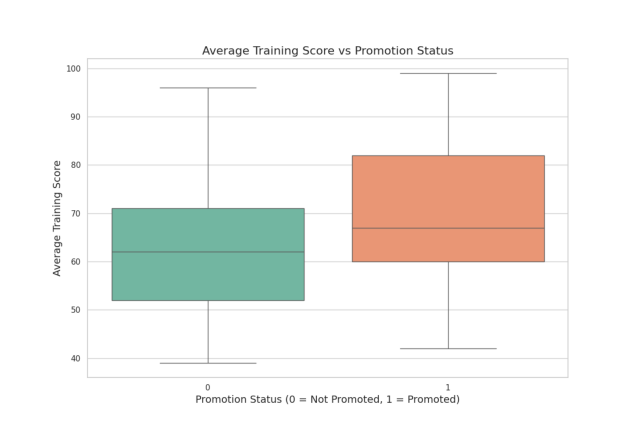

{'image_description': "The graphic is a box plot comparing the average training scores based on promotion status. The x-axis represents the promotion status, with '0' indicating not promoted and '1' indicating promoted. The y-axis shows the average training score, ranging from 40 to 100. Each box represents the interquartile range (IQR) of scores for each promotion status, with the line inside each box indicating the median score. The whiskers extend to the minimum and maximum scores within 1.5 times the IQR from the quartiles.", 'interpretation_conclusion': 'The box plot indicates that employees who were promoted (1) have a higher average training score compared to those who were not promoted (0). The median score for the promoted group is visibly higher than that of the non-promoted group. Additionally, the range of scores for both groups shows that the promoted group has less variability in scores, suggesting a more consistent performance among those who were promoted. This could imply a correlation between training performance and the likelihood of promotion.'}

# Comprehensive Report on Employee Dataset Analysis

## Introduction

This report synthesizes the analyses of various graphics derived from the employee dataset, focusing on key metrics such as training scores, education levels, gender distribution, recruitment channels, promotions, and employee demographics. The insights drawn from these analyses aim to provide a clearer understanding of the workforce dynamics and performance indicators within the organization. 

## Key Findings

### 1. Training Performance

#### Distribution of Average Training Scores
The histogram titled **"Distribution of Average Training Scores"** reveals that the majority of participants scored around 60, indicating a moderate level of training effectiveness. The distribution is slightly skewed, with fewer scores in both the lower (40-50) and higher (80-90) ranges. This suggests a need for further investigation into the factors affecting training outcomes, as many employees are not achieving high scores.

#### Number of Trainings
The histogram **"Distribution of Number of Trainings"** shows that most employees attended only two trainings, with a significant drop-off for those attending more than three. This trend may indicate a preference for fewer training sessions or potential constraints limiting participation. Understanding these behaviors could help tailor training programs to better meet employee needs.

### 2. Employee Demographics

#### Education Levels
The bar chart **"Distribution of Education Levels"** indicates that a significant majority of employees possess a Bachelor's degree, with over 35,000 individuals in this category. This trend towards higher educational attainment suggests a well-qualified workforce, which may correlate with performance and promotion opportunities.

#### Age Distribution
The histogram **"Age Distribution of Employees"** highlights a youthful demographic, with the highest concentration of employees aged 30 to 35 years. This could have implications for workforce planning and succession strategies, as a younger workforce may require different management approaches and career development opportunities.

### 3. Gender Representation

The bar chart **"Gender Distribution in the Dataset"** illustrates a notable gender imbalance, with males significantly outnumbering females (over 35,000 males compared to approximately 20,000 females). The minimal representation of non-binary individuals suggests a need for more inclusive data collection methods to better reflect diverse gender identities within the organization.

### 4. Recruitment Channels

The bar chart **"Distribution of Recruitment Channels"** indicates that the 'other' recruitment channel is the most utilized, followed by 'sourcing' and 'referred'. This suggests that organizations may benefit from enhancing their referral programs to balance the recruitment strategies and potentially improve the quality of hires.

### 5. Promotions and Awards

#### Promotion Count by Education Level
The bar chart **"Promotion Count by Education Level"** shows a strong correlation between education level and promotion count, with Bachelor's degree holders being the most likely to be promoted. This highlights the importance of educational qualifications in career advancement.

#### Impact of Awards Won on Promotion Status
The bar chart **"Impact of Awards Won on Promotion Status"** reveals that most individuals did not receive promotions, with a significant majority having zero awards. This suggests that awards may not be a strong predictor of promotion status, indicating that other factors may play a more critical role.

### 6. Performance Ratings and Promotions

#### Previous Year Rating
The histogram **"Distribution of Previous Year Rating"** indicates that most ratings cluster around 3.0, suggesting a neutral perception among employees. This could highlight areas for improvement in employee satisfaction and performance management.

#### Age and Promotion Status
The box plot **"Age Distribution by Promotion Status"** shows that age does not significantly correlate with promotion status, as most employees, regardless of promotion, are relatively young. 

#### Training Scores and Promotions
The box plots comparing **"Average Training Scores by Promotion Status"** indicate that promoted employees tend to have higher training scores, suggesting a positive correlation between training performance and promotion likelihood. 

## Conclusion

The analyses of the employee dataset reveal several critical insights regarding training effectiveness, employee demographics, gender representation, recruitment strategies, and promotion dynamics. Key findings suggest a need for targeted improvements in training programs, inclusive recruitment practices, and performance management strategies to foster a more equitable and effective workforce.

### Next Steps
1. **Further Analysis**: Conduct deeper investigations into the factors influencing training outcomes and promotion opportunities.
2. **Training Programs**: Tailor training initiatives to address the observed preferences and constraints of employees.
3. **Diversity Initiatives**: Implement strategies to enhance gender diversity and inclusivity within the organization.
4. **Performance Management**: Review performance management practices to ensure they align with employee expectations and promote a culture of recognition and advancement.

By addressing these areas, the organization can enhance employee satisfaction, performance, and overall workforce effectiveness.

custo total: 0.25575465


In [ ]:
visu_geral(imagens= imgs, historia_analises= h, imagens2= imgs2, historia_analises2=h2, conclusao=c)
print(f'custo total: {custo + custo2 + cust_conc}')

###Teste de velocidade:

In [ ]:
model = 'gpt-4o-mini'
temperatura = 0.2
max_tokens = None
modelo = ChatOpenAI(model = model, temperature = temperatura, max_tokens = max_tokens )
sis_prompt = "You will act like a data science specialist analyzing a dataset given to you. The things you do will be used report presentation for the team, so you need to do insightful, visual, aesthetic, creative and a well documented code. You will be given a dataset and, sometimes, the user will tell some part of the dataset to you generate a code that can improve the dataset or analyse it with a graphic. Before write the code of the plot, assure that nothing in the dataset will generate a error and correct if necessary. Give me a executable code, don't write any explanation, don't write ```python in the top and never end with plt.close(). save the image of the graphic in '/content/xxx'. "
sis_template = SystemMessagePromptTemplate.from_template(sis_prompt)
tipo_analise = 'Please I want a comprehensive overview of a given dataset.'
#fazendo cada prompt para cada tipo de foco
prompt_dataset = "Here is your dataset: {dataset}"
human_prompt = "Analyse my dataset {type_of_analysis}: \n" + prompt_dataset
human_template = HumanMessagePromptTemplate.from_template(human_prompt)
prompt_final = ChatPromptTemplate.from_messages(
  [sis_template, human_template]
)

chain = (
prompt_final
| modelo
| StrOutputParser()
)
with get_openai_callback() as cb:
  output = chain.invoke({
      "dataset": dataset_principal,
      "type_of_analysis": tipo_analise
  }
)


<Figure size 1200x600 with 0 Axes>

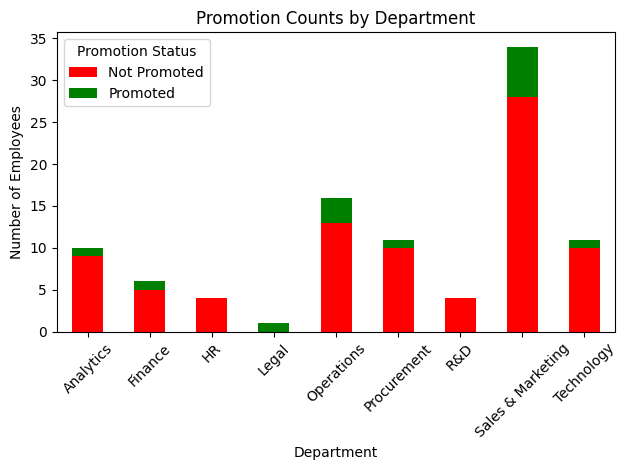

In [ ]:
exec(output)